## **MeerKLASS-SSINS  Algorithm Analysis Notebook**

The following notebook serves as a summary of the progress made to date in the MeerKLASS Radio Frequency Interference (RFI) detection project using the SSINS (Sky-Subtracted Incoherent Noise Spectra) framework.


The notebook evalutes and compares the various sky-subtraction methods that we have developed to date.  In this notebook we will evalute wether the sky removal methods has sufficiently removed the astrophysical sky from our data, we will also perform statistical checks on the residual data, this will allow us to understand the distribution of the residual data.  The comparison checks of the SSINS methodology in this notebook is done on data from observation block 1630519596. 



### **Table of Contents**
* [SSINS: Radio Frequency Interference (RFI) Flagging Software ](#SSINS)
    * [Sky- Subtraction Method : ABBA](#section_1_1)
    *  [Sky-Subtraction Method : 2 Channel Dithering](#section_1_2)
    * [Incoherent Noise Spectrum](#section_1_3)
  
    * [Z Score Distribution](#section_1_4)
    
        


#### **1. SSINS: Radio Frequency Interference (RFI) Flagging Software** <a class="anchor" id="SSINS"></a>

**SSINS** (**S**ky-**S**ubtracted **I**ncoherent **N**oise **S**pectra) is an RFI flagging software that was developed for the MWA (Murchison Widefield Array) Radio Interferometer. The software was created such that the SSINS algorithmn can be suitably adjusted and applied to any other radio telescope, on a premise that your goal is to address the challenge of detecting and removing faint RFI in radio telescope observations. Faint RFI lies below the single baseline sensitivity of an array and in the case of single-dish observing systems faint RFI will lie below the noise measurement of the dish. Due to magnitude level of fainter RFI these conaminants often go undetected by standard RFI Flaggers, such as AOFlagger. 

In this work we will apply the SSINS algorithm to MeerKLASS 2021 L-band data, in particular the raw, time-ordered autocorrelation data. The first level of data reduction in the meerklass pipeline involves the flagging of strong RFI spikes in the data at the raw time ordered data level. The first round of flagging uses SEEK (Signal Extraction and Emission Kartographer), which is an RFI flagging software. The SEEK RFI flagger is based of the tresholding algorithm. The raw time ordered data is broken up into 6 groups and the flagger is applied to each group seperately in 2 steps, the first step the flagger is applied to the entire frequncy range of the data to flag the strong RFI from statelite and communications and the second flagging process is applied to the science targert freqeuency bands only. 
Our current analysis steps invloves applying the  SSINS methods after the flagging of strong RFI, i.e we apply the algorithm to the raw data with level 1 masks applied on the data,  this is done becasue strong RFI will result in the skewing of the data mean and the residual data distribution, and will affect the iterative flaggers ability to detect weaker RFI emissions. 

We apply the following stages of the SSINS Algorithm to the data:

1. **S**ky-Subraction
   
*  ABBA (4 Neighbouring Time Channel Differencing)
* 2 Neighbouring Time Channel Differencing
   
3. **IN**coherent Averaging
   
5. Mean Subraction (z-score calculation)



In [1]:
import os
import sys
sys.path.append(os.path.abspath('.'))
import mkssins
from mkssins import *
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In the next cell we define the observation block and path to the specific level masks we are working with. In this case we using observation block : 1630519596 and Level 1 masks for the data.

In [2]:
fname = '1630519596' 
path = '/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/'
pol = 'h'

In [3]:
#just checking the mkssins.py module

ants = mkssins.ants_checked_L1(fname, path)
for ant in ants:
    print(ant)
 

['m000']
['m001']
['m002']
['m003']
['m004']
['m005']
['m006']
['m007']
['m008']
['m009']
['m010']
['m011']
['m012']
['m013']
['m014']
['m015']
['m016']
['m017']
['m018']
['m019']
['m020']
['m021']
['m023']
['m024']
['m025']
['m027']
['m029']
['m030']
['m031']
['m032']
['m033']
['m035']
['m036']
['m037']
['m038']
['m039']
['m040']
['m041']
['m042']
['m043']
['m044']
['m045']
['m046']
['m047']
['m048']
['m049']
['m050']
['m051']
['m052']
['m053']
['m054']
['m055']
['m056']
['m057']
['m058']
['m059']
['m061']
['m062']
['m063']


 In the next cell we  will loop over the ants in the list of antennas with masks and access the visData function from mkssins.py, we are storing the visibility products and the noise_diodes as seperate dictionaries, with 'ant' being the key for the values in the respective dictionaries. Also note we can add flags (SARAO Prior flags as well using the same approach)


In [4]:
%time

raw_vis_dict = {}
nd_flags_dict ={}
ps_flags_dict={}

for ant in ants:
    vis,nd_s0, ps = mkssins.visData(fname, ant[0] , pol) # replace ant[0] and remove loop for extracting the antenna as a string from the list
    raw_vis_dict[ant[0]] = vis
    nd_flags_dict[ant[0]] = nd_s0
    ps_flags_dict[ant[0]] = ps
    
    

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m000h' 'm000h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m001h' 'm001h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m002h' 'm002h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m003h' 'm003h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m004h' 'm004h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m005h' 'm005h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m006h' 'm006h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m007h' 'm007h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m008h' 'm008h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m009h' 'm009h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m010h' 'm010h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m011h' 'm011h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m012h' 'm012h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m013h' 'm013h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m014h' 'm014h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m015h' 'm015h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m016h' 'm016h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m017h' 'm017h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m018h' 'm018h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m019h' 'm019h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m020h' 'm020h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m021h' 'm021h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m023h' 'm023h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m024h' 'm024h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m025h' 'm025h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m027h' 'm027h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m029h' 'm029h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m030h' 'm030h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m031h' 'm031h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m032h' 'm032h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m033h' 'm033h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m035h' 'm035h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m036h' 'm036h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m037h' 'm037h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m038h' 'm038h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m039h' 'm039h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m040h' 'm040h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m041h' 'm041h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m042h' 'm042h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m043h' 'm043h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m044h' 'm044h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m045h' 'm045h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m046h' 'm046h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m047h' 'm047h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m048h' 'm048h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m049h' 'm049h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m050h' 'm050h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m051h' 'm051h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m052h' 'm052h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m053h' 'm053h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m054h' 'm054h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m055h' 'm055h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m056h' 'm056h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m057h' 'm057h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m058h' 'm058h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m059h' 'm059h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m061h' 'm061h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m062h' 'm062h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []
m063 is bad
# loaded data was saved in python2
['m063h' 'm063h']
edge number 0-374
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


In [171]:
raw_vis_dict.keys()  #checking the  raw vis  dictionaryf

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [ ]:
nd_flags_dict.keys() #checking the noise diode flags  dictionary

In [5]:
ps_flags_dict.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

 Similary in the next cell we can create a dictionary for the mask of the flags from the Level 1 folder. We use the try/except method to check for _mask2 / _mask flag masks for each receiver.

In [6]:

l1_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/')
for dish, (vis) in raw_vis_dict.items():
    
    try:
        with open(mask_dir / f'{fname}_{dish}_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print (f'mask2 loaded for dish {dish}')
    except(Exception):
        with open(mask_dir / f'{fname}_{dish}_mask', 'rb')as f:
            d3 = pickle.load(f)
            print (f'mask loaded for dish {dish}')
    mask_flags=d3['mask']
    l1_flags_dict[dish]  = mask_flags
    

    
   
    #print(dish)

mask loaded for dish m000
mask loaded for dish m001
mask2 loaded for dish m002
mask loaded for dish m003
mask loaded for dish m004
mask loaded for dish m005
mask2 loaded for dish m006
mask loaded for dish m007
mask2 loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
mask2 loaded for dish m013
mask loaded for dish m014
mask2 loaded for dish m015
mask loaded for dish m016
mask2 loaded for dish m017
mask2 loaded for dish m018
mask2 loaded for dish m019
mask2 loaded for dish m020
mask loaded for dish m021
mask2 loaded for dish m023
mask loaded for dish m024
mask loaded for dish m025
mask2 loaded for dish m027
mask2 loaded for dish m029
mask loaded for dish m030
mask2 loaded for dish m031
mask loaded for dish m032
mask loaded for dish m033
mask2 loaded for dish m035
mask loaded for dish m036
mask loaded for dish m037
mask loaded for dish m038
mask2 loaded for dish m039
mask loaded for dish m040
mask loaded for dish m0

In [173]:
l1_flags_dict.keys() #checking level1 flags dictionary

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [7]:
from collections import defaultdict #stackexchange suggestion

l1_flags = l1_flags_dict
raw_vis = raw_vis_dict
nd_flags = nd_flags_dict
ps_flags = ps_flags_dict

dd = defaultdict(list)

for d in (l1_flags, raw_vis, nd_flags, ps_flags): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[366.29751587,  62.51673126,  62.47373581, ...,   0.        ,
          0.        ,   0.        ],
       [378.96554565,  73.60748291,  73.96704102, ...,  87.94789124,
         88.41603851,  89.15293884],
       [366.03469849,  62.4033699 ,  62.65620041, ...,  78.47024536,
         79.04814911,  79.82781982],
       ...,
       [645.43511963,  71.5569458 ,  71.52669525, ...,  57.27457047,
         57.42282486,  58.23122787],
       [652.61529541,  72.38539886,  72.42293549, ...,  57.50582886,
         57.67279053,  58.55394745],
       [646.29705811,  71.72380829,  71.87686157, ...,  57.16184235,
 

In [175]:
dd.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [29]:

def MaskedArrayVisibilityFlags(vis, pipeline_flags, nd_s0, pointsource_flags=None):
    
    """This function applies masks to noise diodes and bright RFI flags, so that they are not time differenced in the TOD array. Ensures that we are performing correct neighbouring time channel subtractions
    
    Parameters:
    ----------
    visibility, flags and nd_s0 from the visData Fuction.

    Returns:
    --------
    Visibility-Flags Masked Array
    """
    #vis, flags, nd_s0 = visData(fname)
    data0 = vis.copy


    nd_flags = np.ones_like(vis, dtype=bool)      
    # Empty mask, where all values are set to true. True is flagged data
    nd_flags[nd_s0, :] = False                        # Set the data with noise diodes off to False so that this data is not flagged as bad data.  This is the scan only data.
    #other_flags = np.logical_or(flags_L0, flags_L1)   # All other flags from the visData function. Boolean value is True.
    
    old_flags =  np.logical_or(nd_flags, pipeline_flags)
    point_source_flags = pointsource_flags
    point_source_flags = np.ones_like(old_flags, dtype=bool)
    point_source_flags[pointsource_flags,:] = False 
    allflags = np.logical_or(~point_source_flags, old_flags) # Apply logical operator or to combine the noise diode flags, and visilibity data at a specific stage flags. 

    data_masked = np.ma.masked_array(vis, mask=allflags, fill_value = np.nan)

    return data_masked

In [30]:
masked_vis_dict = {}

for dish, (mask_flags, vis , nd_s0, ps_flags) in dd.items():
    masked_vis = MaskedArrayVisibilityFlags(vis, pipeline_flags=mask_flags, nd_s0=nd_s0, pointsource_flags=ps_flags)
    masked_vis_dict[dish] = masked_vis

In [31]:
masked_vis_dict.keys()


dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [32]:
for ant_value in masked_vis_dict.keys():
    print(ant_value)

m000
m001
m002
m003
m004
m005
m006
m007
m008
m009
m010
m011
m012
m013
m014
m015
m016
m017
m018
m019
m020
m021
m023
m024
m025
m027
m029
m030
m031
m032
m033
m035
m036
m037
m038
m039
m040
m041
m042
m043
m044
m045
m046
m047
m048
m049
m050
m051
m052
m053
m054
m055
m056
m057
m058
m059
m061
m062
m063


In [33]:
data = masked_vis_dict['m000'].filled()

<AxesSubplot:>

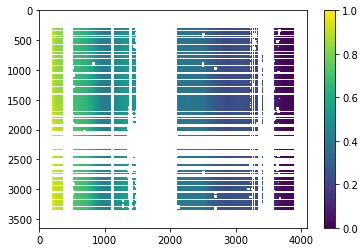

In [34]:
plot_waterfall(data, interpolation='nearest')

#### Waterfall Panel of the Raw Visibilities

[<AxesSubplot:title={'center':'Raw Visibilities m000'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m001'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m002'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m003'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m004'}>]

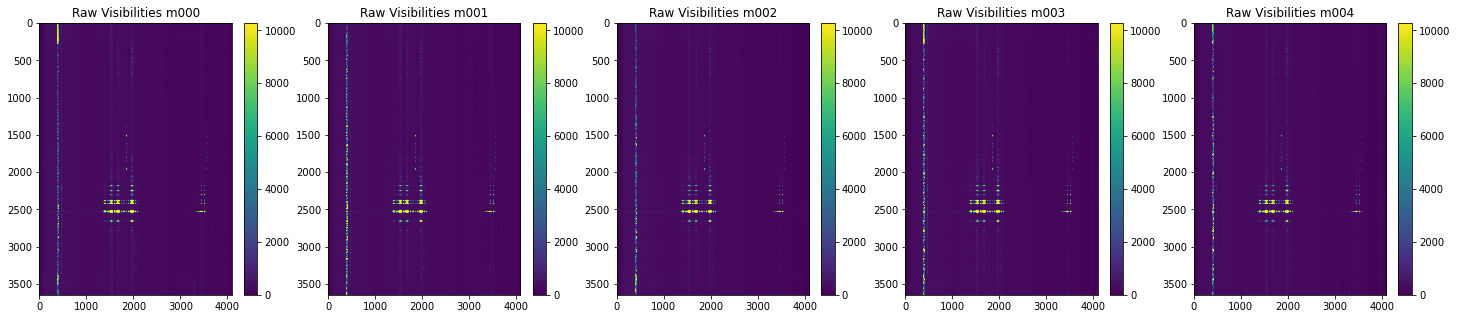

In [18]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(raw_vis_dict[ant_value], ax=ax, Title=f'Raw Visibilities {ant_value}', interpolation='nearest') for ant_value, ax in zip(raw_vis_dict, axes.flat) if ant_value in raw_vis_dict]

   

#### Waterfall Panel of the Raw Visibilities with Level 1 masks applied

[<AxesSubplot:title={'center':'vis+l1_flags m000'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m001'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m002'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m003'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m004'}>]

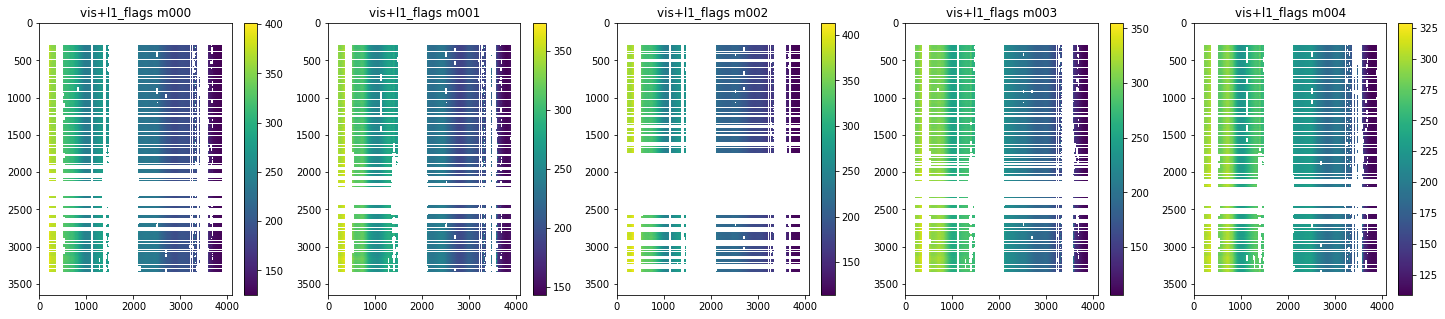

In [18]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(masked_vis_dict[ant_value].filled(), ax=ax, Title=f'vis+l1_flags {ant_value}', interpolation='nearest') for ant_value, ax in zip(masked_vis_dict, axes.flat) if ant_value in masked_vis_dict]

   

## **1.2. Sky-Sbtraction Method : ABBA**  <a class="anchor" id="section_1_2"></a>


Sky-Subtraction involves removing the bright astrophysical sky signal from observational data. This is done to promote sensitivity of the remaining/underlying signal of the data.By subtracting the bright sky signal we expect the residual components of the time ordered data to comprise of a slowly varying noise component and lowlying RFI. Note at this point the sky would be subtracted, and the residual distribution is noise and RFI. 

The distribution of the sky-subtracted amplitudes (noise+RFI) would have a non-zero mean distribution like the following illustration:



In this Section we will apply the ABBA method, which involves subtracting subsequent time-channels in the array, in this method our differencing is done over 4 channels in the TOD array.


In [35]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

ss_l1 = np.stack(list(abba_ss_dict.values()), axis=0)

In [36]:
SS_all_ants = ss_l1
SS_all_ants[:, 1010, 3000]


array([ 0.10440063,  0.49749756, -0.53220367,  0.4420929 ,  0.50080109,
        0.08312225, -0.01454163, -0.02896118,  0.17352295, -0.11354828,
       -0.02719116,  0.07865906,  0.46146393, -0.2743988 ,  0.11555481,
       -0.04315948,  0.13052368,  0.66606903, -0.29734039,  0.09573364,
       -0.65789032,  0.30224609,  0.14155579, -0.0015564 ,  0.75337219,
        0.63674164, -0.3247757 , -0.2259903 , -0.11962891,  0.08015442,
       -0.65194702, -0.02781677, -0.18045044,  0.53178406,  0.35009766,
       -0.28968811, -0.16461945,  0.05205536,  0.39360046, -0.24506378,
       -0.57910156, -0.48080444,  0.23654175,  0.26628876, -1.05133057,
        0.50328827, -0.27108002, -0.71530151, -0.30319977, -0.43953705,
       -0.63311005, -0.27664948,  0.22093201, -0.25360107, -0.3024292 ,
        0.37387085, -0.42728424, -0.14286041,  0.08470917])

### Bandpass plots of the ABBA Sky-Subtraction for each Receiver

The purpose of these bandpass plots is to help us identify badly behaved recievers that should be excluded from sky-subtraction spectrums

[<AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>]

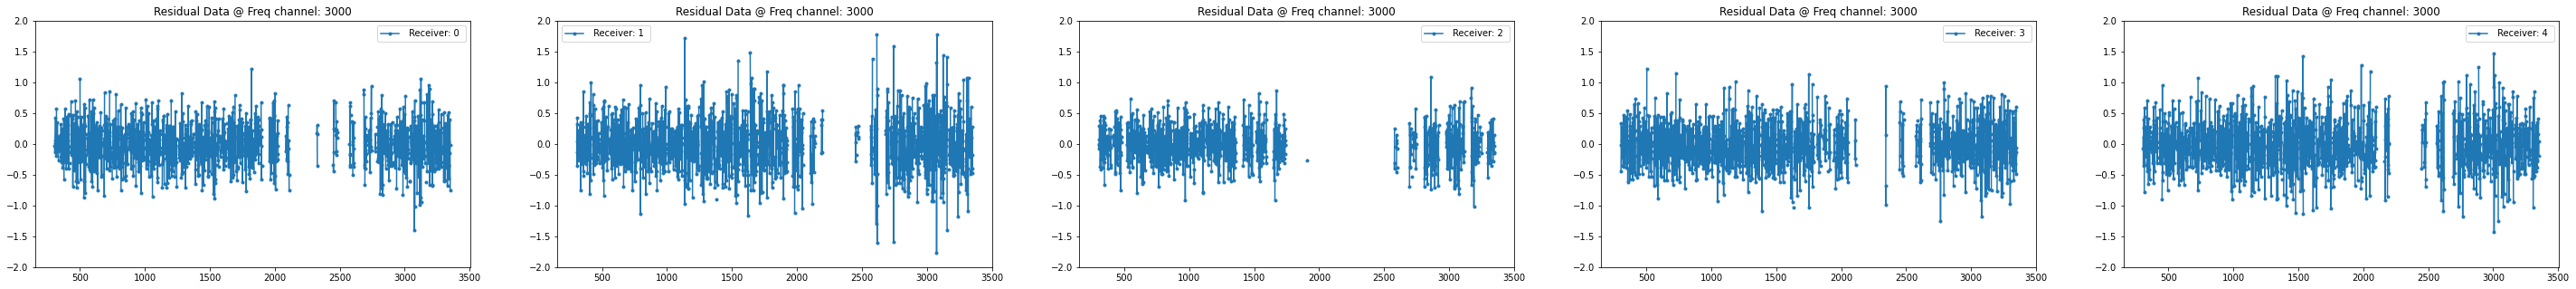

In [92]:
#Note this one is inspecting at one frequency channel (residual data plot)

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(SS_all_ants[i, :, 3000], ylim= (-2,2), label= f" Receiver: {i} ", Title='Residual Data @ Freq channel: 3000', ax=ax) for i, ax in zip(range(0, len(ant_trunc)), axes.flat)]

Bandpass plots for each receiver sky-subtraction, we want to check for the those strange spikes we see in the all antenna average, if its attributed to the averaging of the spectrums.

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice


[<AxesSubplot:title={'center':'Bandpass @ Receiver 0'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 1'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 2'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 3'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 4'}>]

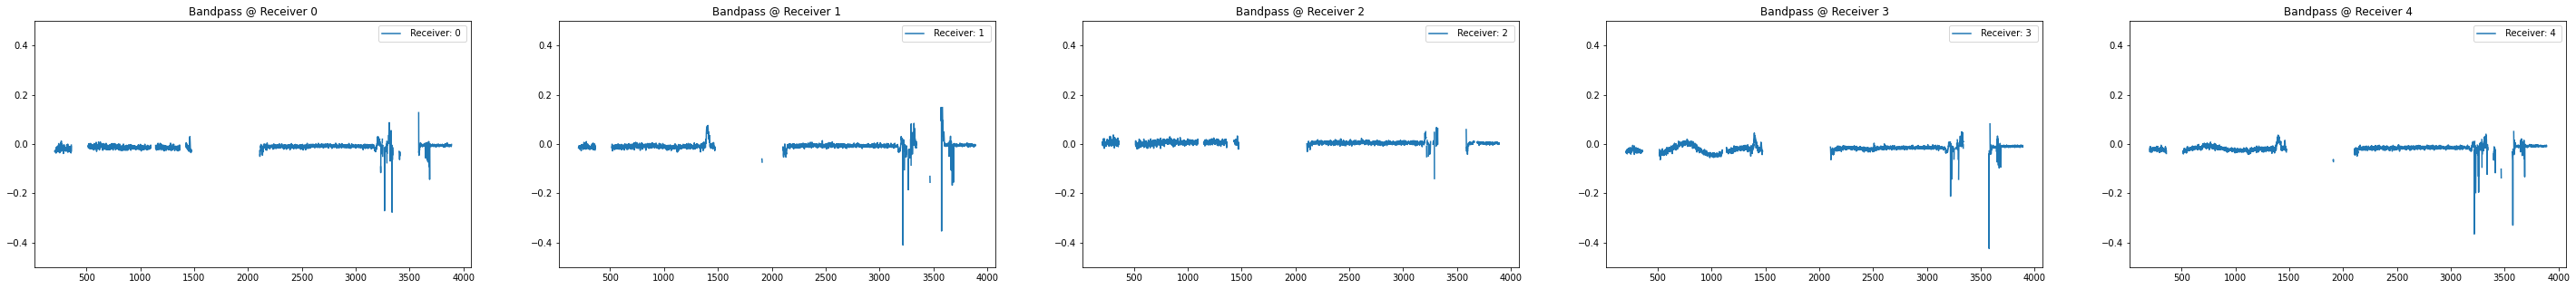

In [105]:
# Note this is the  ABBA SS Bandpass at each receiver
rows = 1 
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(np.nanmean(SS_all_ants[i, :, :], axis=0), ylim= (-0.5,0.5), label= f" Receiver: {i} ", Title= f'Bandpass @ Receiver {i}', ax=ax) for i, ax in zip(range(0, len(ants)), axes.flat)]



### Waterfall plots of the ABBA Sky-Subtraction for each Receiver

[<AxesSubplot:title={'center':'abba ss m000'}>,
 <AxesSubplot:title={'center':'abba ss m001'}>,
 <AxesSubplot:title={'center':'abba ss m002'}>,
 <AxesSubplot:title={'center':'abba ss m003'}>,
 <AxesSubplot:title={'center':'abba ss m004'}>]

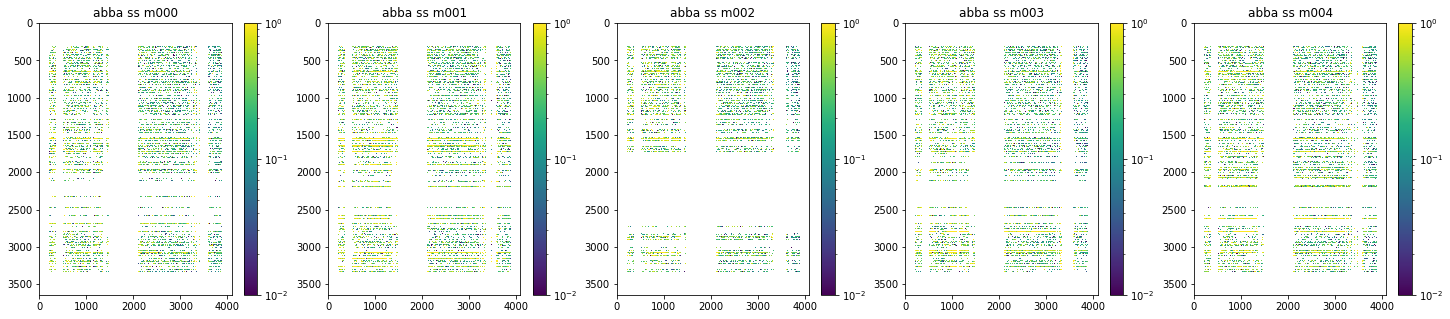

In [12]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=0.01, vmax=1)
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(abba_ss_dict[ant_value], ax=ax, Title=f'abba ss {ant_value}', interpolation='nearest', norm=norm) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]

   

### Bandpass plot of the Antenna Averaged ABBA Sky-Subtraction (SSINS)



[<AxesSubplot:title={'center':'Noise Spectrum at  a Specifc Freq Chan'}>,
 <AxesSubplot:title={'center':'Noise Spectrum at  a Specifc Freq Chan'}>,
 <AxesSubplot:title={'center':'Noise Spectrum at  a Specifc Freq Chan'}>,
 <AxesSubplot:title={'center':'Noise Spectrum at  a Specifc Freq Chan'}>,
 <AxesSubplot:title={'center':'Noise Spectrum at  a Specifc Freq Chan'}>]

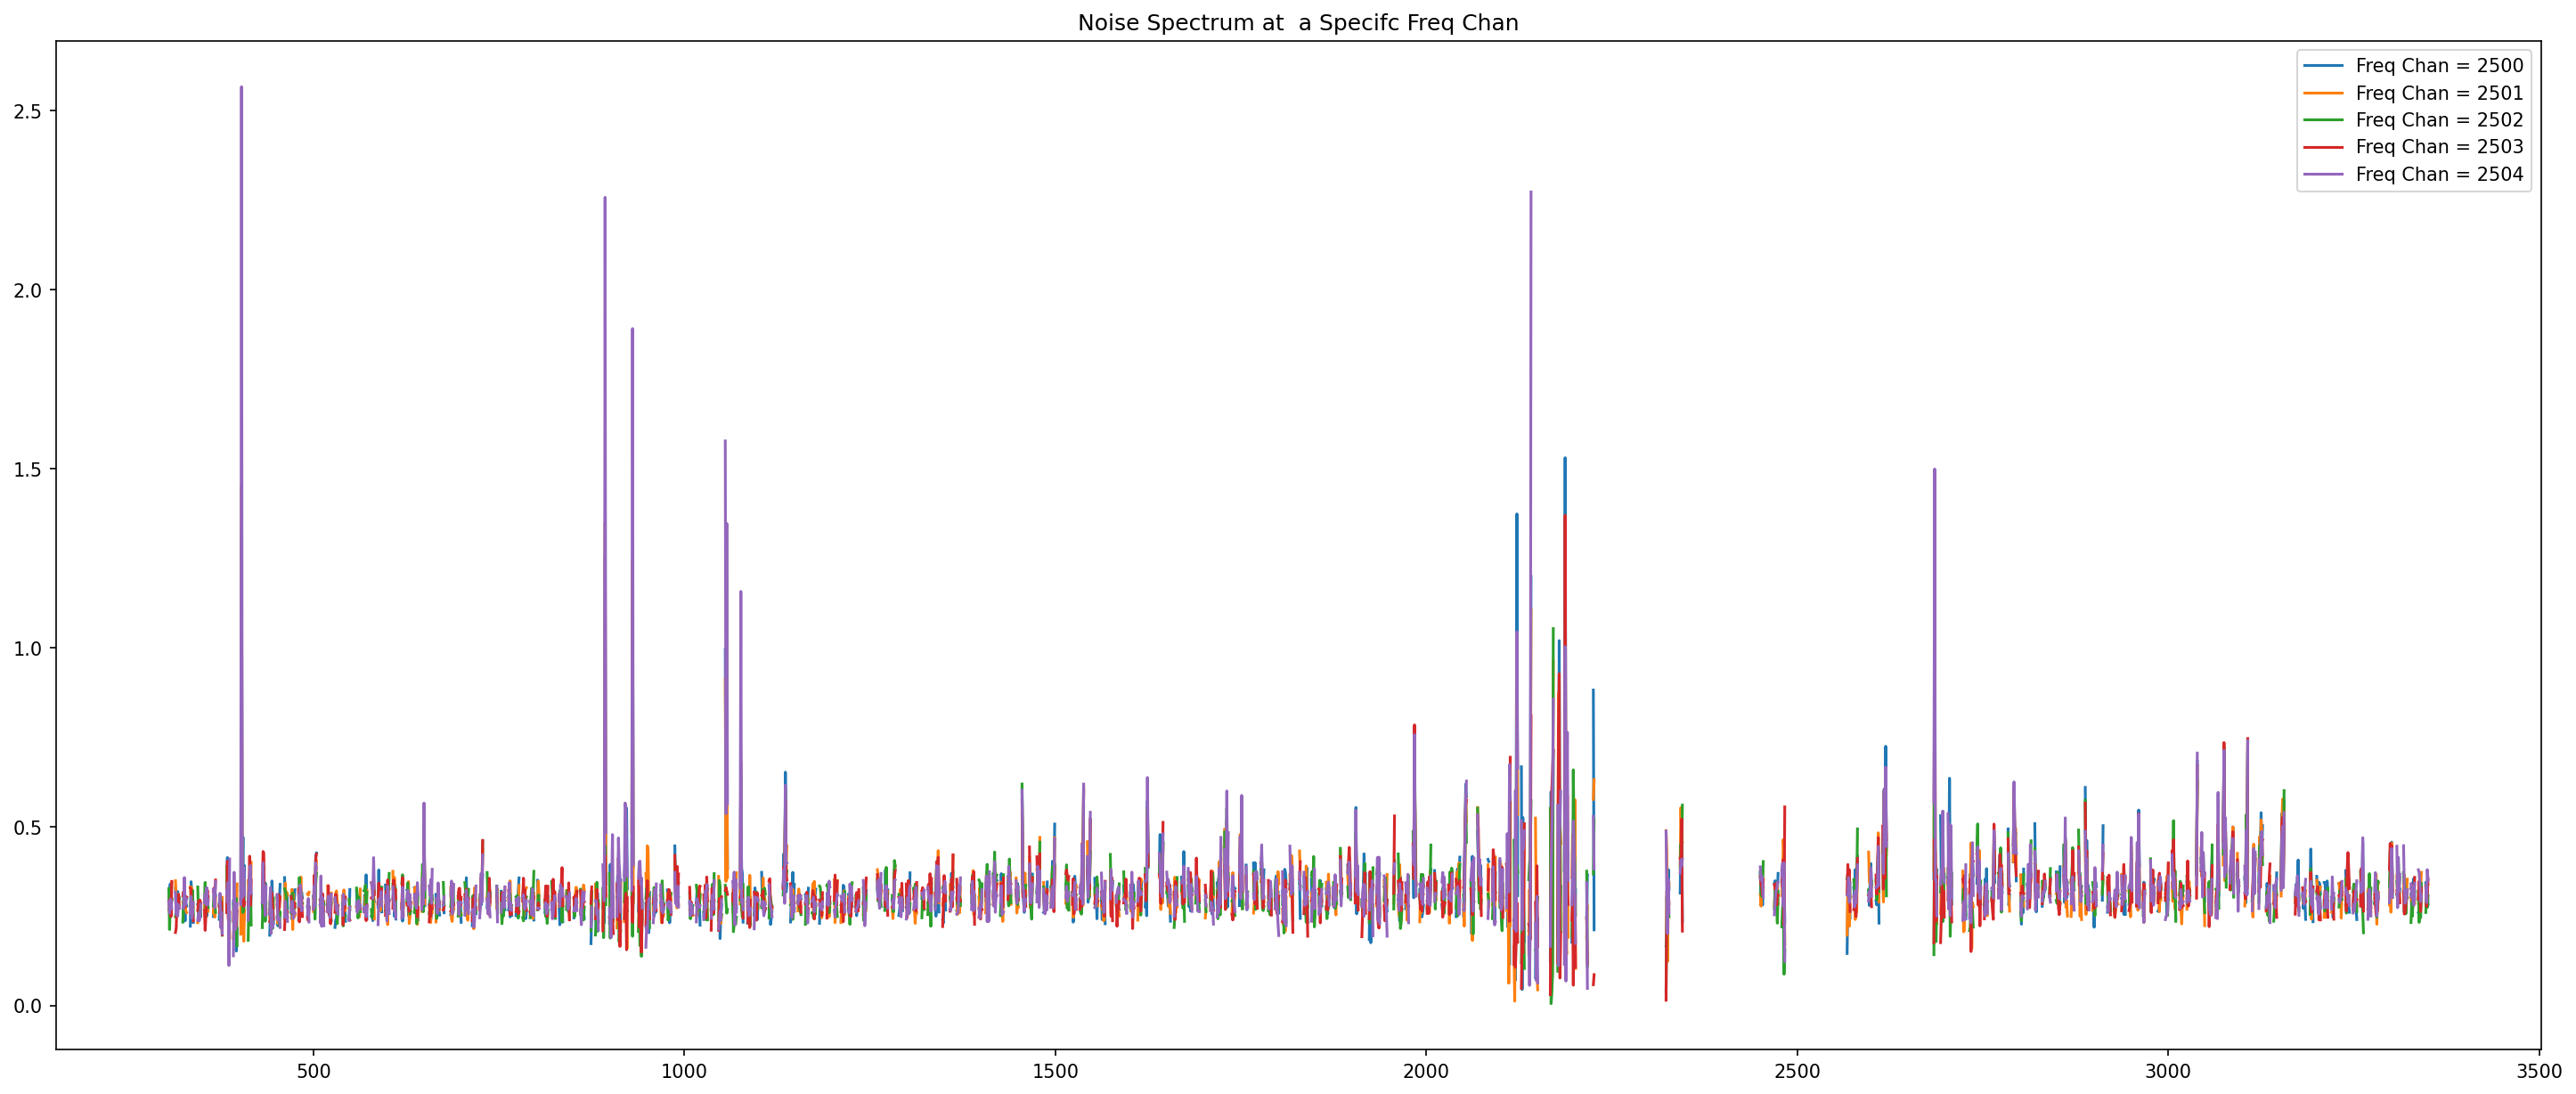

In [12]:
figure, ax = plt.subplots(1, 1 , figsize=(24, 10), dpi=150)

AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)

[plot(AbbaAllAnts[:,i], label= f'Freq Chan = {i}', Title='Noise Spectrum at  a Specifc Freq Chan', ax=ax) for i in range(2500, 2505)]

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Noise Spectrum Bandpass'}>

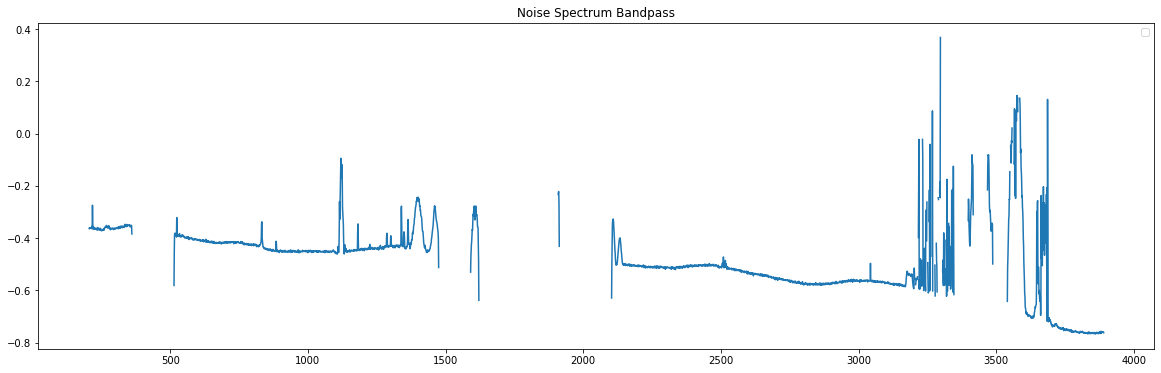

In [13]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot(np.nanmean(np.log10(AbbaAllAnts), axis=0), Title='Noise Spectrum Bandpass')

### Waterfall plot of the ABBA Sky-Subtraction Antenna Averaged (SSINS)

This is a waterfall plot of the Sky-subtracted Incoherently Averaged Visibilities, with level 1 flags applied on the data. What is important to note is at this stage we can't at first or even deeper inspection see the presence of fainter RFI, The reason for this is we simply are required to boost the contrast between the distributions that are 'mixed' in this spectrum. At this stage the spectrum is a mixture distributon of noise (folded gaussian distributed amplitudes) and RFI (of which fainter RFI amplitudes lie below the noise of this spectrum). The next step of the SSINS algorithm will be standardising each data point (t,f) in this waterfall map effectively creating a z-score waterfall map, the data transformation will contrast the underlying RFI distribution against the noise amplitides distribution.

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-2, vmax=1e1)

AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot_waterfall(AbbaAllAnts, interpolation='nearest', norm=norm, figsize=(20,12), Title= 'ABBA Noise Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

In [12]:
import katcali

In [22]:
ants = katcali.io.ant_list(data)

In [23]:
ants

array(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007',
       'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015',
       'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024',
       'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm034',
       'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042',
       'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050',
       'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058',
       'm059', 'm061', 'm062', 'm063'], dtype='<U4')

### RMS Statistics of the ABBA Sky-Subtractions

 RMS Statistics of the sky-subtractions, to determine the level of noise reduction, the signal reduction should correspond to 1 over the square of the antennas we did the average over. I have done the RMS for all receivers, see a lot of differences. 

In [48]:
# RMS calculated over all receivers
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
rms_all_ants = np.sqrt(np.nanmean(AbbaAllAnts**2)/AbbaAllAnts.shape[0])
print(f'The RMS from averaging over all the receivers is:{rms_all_ants}') 


The RMS from averaging over all the receivers is:0.007806002375344335


In [49]:
# This is calculates the RMS at a receiver level for all frequency and time, the RMS over the SS spectrum

def rms(ss_data):
    N = ss_data.shape[0]
    rms_all = np.sqrt(np.nanmean((ss_data)**2)/N)
    return rms_all

In [50]:
# This calculates the RMS at a receiver for a particular frequency in a Sky Subtraction Spectrum

def rms_mu(ss_data, mu):
    
    N = ss_data.shape[0]
    rms_mu = np.sqrt(np.nanmean((ss_data[:,mu])**2)/N)
    
    return rms_mu

In [232]:
rms_mu(abba_vis, mu=3000)

0.00585032853761648

In [24]:
rms_reduced_expected = 1/(np.sqrt(len(ants)))
print(f'The Expected Reduced RMS from averaging over all the receivers is: {rms_reduced_expected}') #Theoretical Value we expect


The Expected Reduced RMS from averaging over all the receivers is: 0.12909944487358055


In [25]:
# Expected RMS Values for each receiver
rms_array_expected = []
for ant_value, (abba_vis) in abba_ss_dict.items():

    rms_val =  rms(abba_vis)
    d_rms = rms_val - rms_reduced_expected
    
    #print(f'RMS for reciever {ant_value}  is : {rms_val}')
    #The Expected RMS difference between the Receiver RMS and all antenna average RMS : {d_rms}')


In [51]:
# RMS for all Recievers ABBA Sky Subtraction
rms_array = []
for ant_value, (abba_vis) in abba_ss_dict.items():
    rms_value =  rms(abba_vis)
    rms_array.append(rms_value)
    d_rms = rms_value - rms_all_ants
    #print(f'RMS for reciever {ant_value}  is : {rms_value}, The difference between the Receiver RMS and all antenna average RMS : {d_rms}')
rms_array = np.array(rms_array)


### Antenna RMS can help us evaluate the sky-subtractions done at each receiver, and again if a receiver is bad (ie, sky- rmoval hasnt worked very well) we can exclude them from the SSINS Algorithm

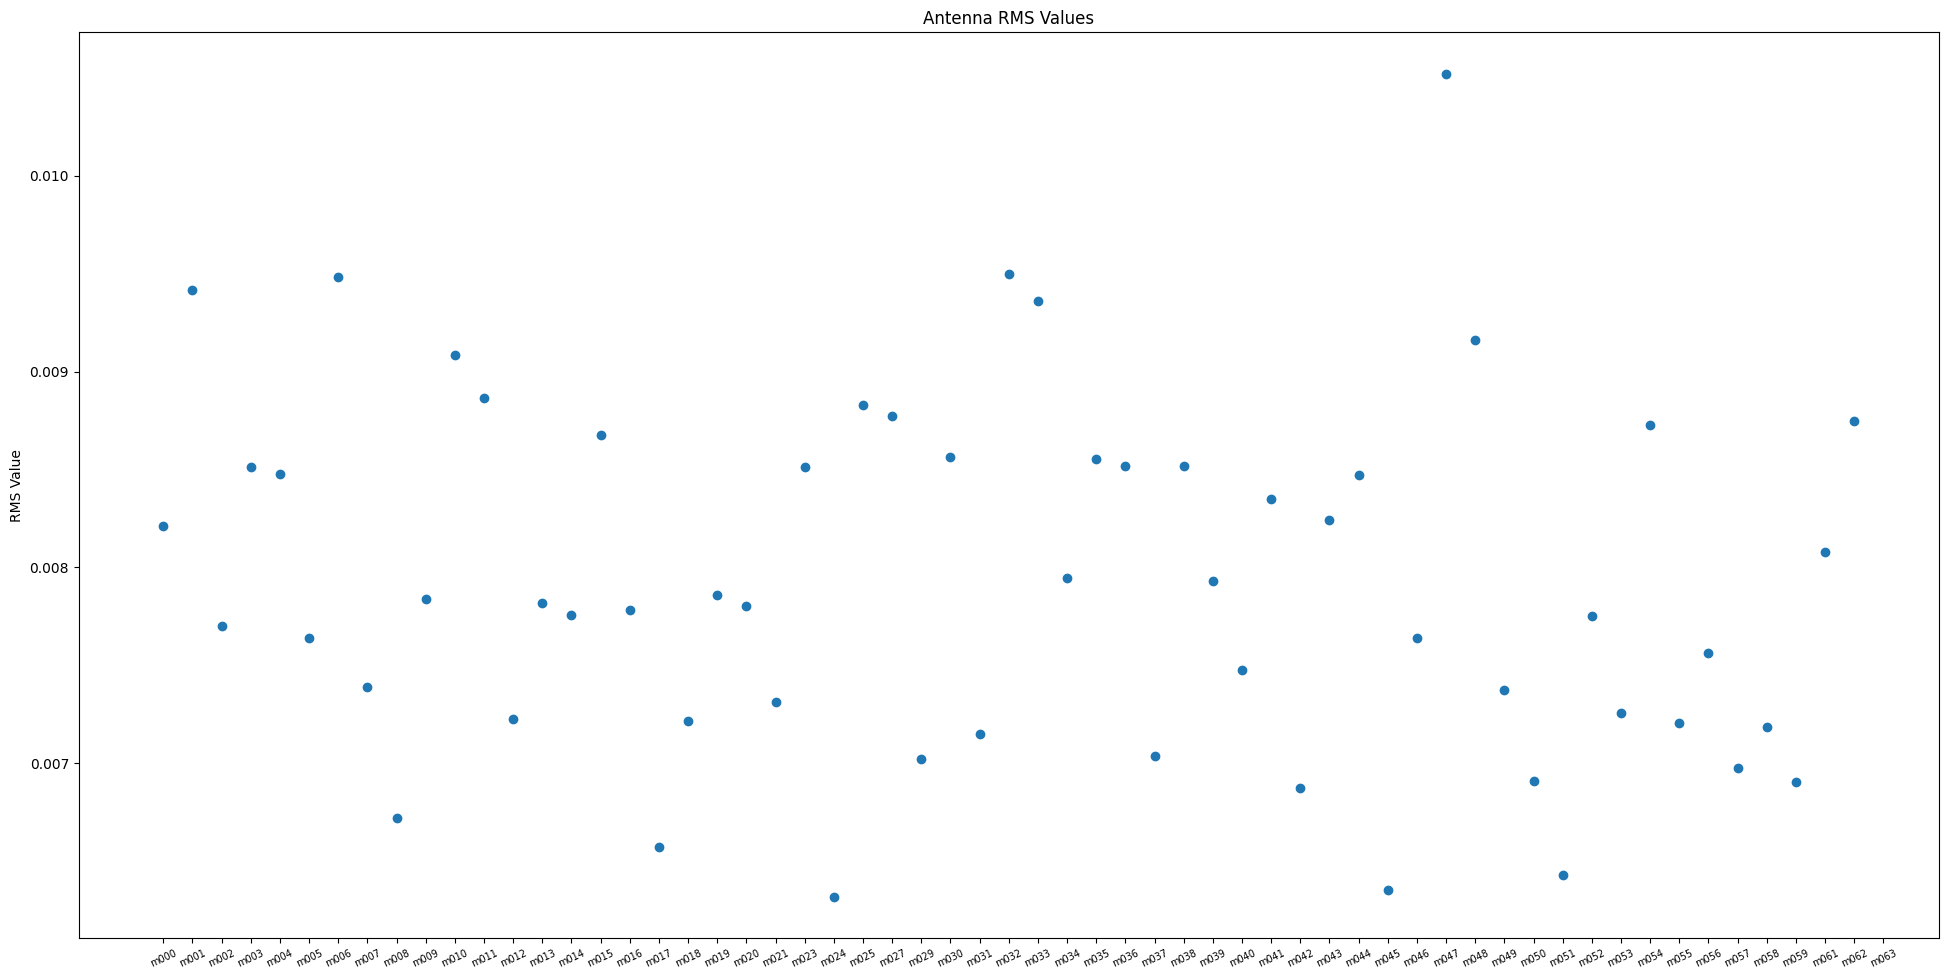

In [52]:
fig, ax = plt.subplots(1, figsize=(24,12), dpi=100)
plt.plot(rms_array, '.', markersize=12)
#plt.axhline(y=10, color='k')

plt.xticks(np.arange(len(ants)), ants)
plt.xticks(fontsize=7, rotation=25)
plt.title('Antenna RMS Values')
plt.ylabel('RMS Value')

plt.show()

 #### RMS Result Discussion:

### Histogram plots of the ABBA Sky-Subtraction Waterfalls

[<AxesSubplot:title={'center':'Histogram for Residual data of Receiver m000'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m001'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m002'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m003'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m004'}>]

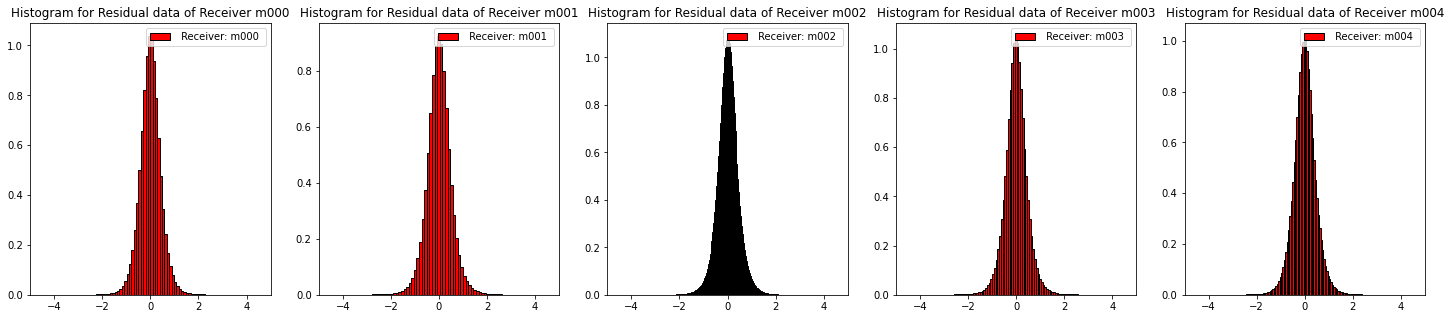

In [421]:
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_hist(np.ravel(abba_ss_dict[ant_value]),label= f" Receiver: {ant_value} ", Title=f'Histogram for Residual data of Receiver {ant_value}', bins=1000, xlim=(-5,5), ax=ax) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]
    
   

### Histogram plots of the ABBA Antenna Averaged Sky-Subtraction Waterfalls (SSINS)


In [ ]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)  # (t,f)
mean = np.nanmean(AbbaAllAnts)

fig, ax = plt.subplots(figsize=(20, 12))
plot_hist(np.ravel(AbbaAllAnts),label= " All Antenna Distribution", Title=f'All Antenna ABBA Noise Spectrum Distribution', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(mean, color='red', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean = {mean}')
ax.legend()

plt.show()

# Z- Score Calculation of the ABBA Incoherent Averaged Spectrum (SSINS)

In [76]:
def cal_zscore(SS_all_spectrums):

    """ This fuction calculates the z-scores.
    Parameters:
    ----------
    SS_all_spectrums: Array of all antenna sky subtraction spectrums, has the shape (no.Dishes, Time, Frequency)
    
    Returns:
    --------

    z_score: 2D array of the normalised Incoherent Spectrum.
    
    """
    
    IncoherentSpectrum = np.nanmean(np.abs(SS_all_spectrums), axis=0)
    no_dishes = SS_all_spectrums.shape[0]
    c_fold = np.pi / 2 - 1  #Auto C_fold Ratio
    meanEst = np.nanmean(IncoherentSpectrum, axis=0) #Time axis averaged MeanEstimate 
    std_sq = c_fold*meanEst**2 
  
    z_score = ((IncoherentSpectrum-meanEst))/np.sqrt(std_sq/no_dishes)
   
    
    return z_score  #returns 2D array of the z scores
    

In [18]:

z_score_map_abba = cal_zscore(SS_all_ants)
z_score_map_abba[3010:3050, 3001]

array([-0.96122782,         nan,         nan,         nan,         nan,
       -1.76194549, -1.4483216 , -0.40722976, -1.32063865, -0.41853075,
        0.31980659,         nan,         nan,         nan,         nan,
        0.42589906,  1.30892293, -0.78716767,  0.87060079,  0.24905068,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  0.93623924, 14.93942289,
               nan,         nan,         nan,         nan,  2.51749305,
        4.82618061,  1.54327554,  1.14266035, -0.44423013, -0.79627548])

In [19]:
min= np.nanmin(z_score_map_abba)
max = np.nanmax(z_score_map_abba)
mean =np.nanmean(z_score_map_abba)
median = np.nanmedian(z_score_map_abba)

print(f'z_score_map_abba minimum val is: {min}')
print(f'z_score_map_abba maximum val is: {max}')
print(f'z_score_map_abba mean val is: {mean}')
print(f'z_score_map_abba median val is: {median}')
print(f'z_score_map_abba range val is: {max-min}')

z_score_map_abba minimum val is: -10.166826704491546
z_score_map_abba maximum val is: 470.1916270337498
z_score_map_abba mean val is: -8.43242617399089e-18
z_score_map_abba median val is: -0.5860721165451335
z_score_map_abba range val is: 480.35845373824134


# Z-Score Waterfall : MeerKLASS-SSINS  Level 1
The z-score is a statistical relationship that describes the distribution, i.e deviation  of  data points from the mean value of the data. Mean Subtract  The idea is to transform the mixture distribution into a guassian like distribution, by    
In this z-score map of we have plotted the data using a discrete colobar, this is done to simply the visualisation of data points that lie at higher/lower deviations from the mean value of the data z-score.

<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

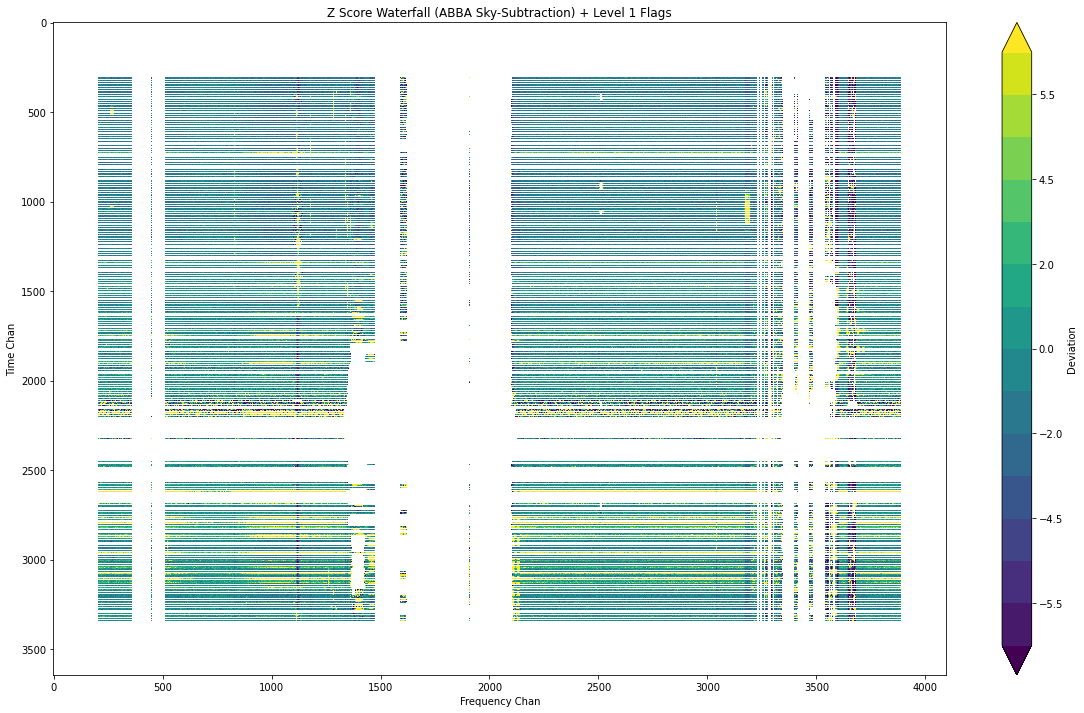

In [31]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(z_score_map_abba, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation') 

## Z-Score Waterfall : MeerKLASS-SSINS Level 4



In [35]:
l4_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level4/mask/')
for dish, (vis) in raw_vis_dict.items():
    try:
        with open(mask_dir / f'{fname}_{dish}_level4_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print(d3.keys())
    except(Exception):
        try:
            with open(mask_dir / f'{fname}_{dish}_level4_mask', 'rb') as f:
                d3 = pickle.load(f)
                print(f'mask loaded for dish {dish}')
    
        except FileNotFoundError:
            print(f'No mask file found for dish {dish}')
            
    mask_flags=d3['Inten_mask']
    l4_flags_dict[dish]  = mask_flags


mask loaded for dish m000
mask loaded for dish m001
mask loaded for dish m002
mask loaded for dish m003
mask loaded for dish m004
mask loaded for dish m005
mask loaded for dish m006
No mask file found for dish m007
mask loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
No mask file found for dish m013
No mask file found for dish m014
mask loaded for dish m015
mask loaded for dish m016
mask loaded for dish m017
mask loaded for dish m018
mask loaded for dish m019
mask loaded for dish m020
mask loaded for dish m021
mask loaded for dish m023
No mask file found for dish m024
mask loaded for dish m025
mask loaded for dish m027
mask loaded for dish m029
mask loaded for dish m030
mask loaded for dish m031
mask loaded for dish m032
No mask file found for dish m033
mask loaded for dish m035
mask loaded for dish m036
mask loaded for dish m037
mask loaded for dish m038
mask loaded for dish m039
mask loaded for dish m040
mas

In [20]:
from collections import defaultdict #stackexchange suggestion

d1 = l4_flags_dict
d2 = raw_vis_dict
d3 = nd_flags_dict

dd = defaultdict(list)

for d in (d1, d2, d3): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[366.29751587,  62.51673126,  62.47373581, ...,   0.        ,
          0.        ,   0.        ],
       [378.96554565,  73.60748291,  73.96704102, ...,  87.94789124,
         88.41603851,  89.15293884],
       [366.03469849,  62.4033699 ,  62.65620041, ...,  78.47024536,
         79.04814911,  79.82781982],
       ...,
       [645.43511963,  71.5569458 ,  71.52669525, ...,  57.27457047,
         57.42282486,  58.23122787],
       [652.61529541,  72.38539886,  72.42293549, ...,  57.50582886,
         57.67279053,  58.55394745],
       [646.29705811,  71.72380829,  71.87686157, ...,  57.16184235,
 

In [21]:
masked_vis_dict = {}

for dish, (mask_flags, vis , nd_s0) in dd.items():
    masked_vis = MaskedArrayVisibilityFlags(vis, mask_flags, nd_s0)
    masked_vis_dict[dish] = masked_vis

In [23]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

ss_l4 = np.stack(list(abba_ss_dict.values()), axis=0)

In [24]:
zscore_l4 = cal_zscore(ss_l4)


<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

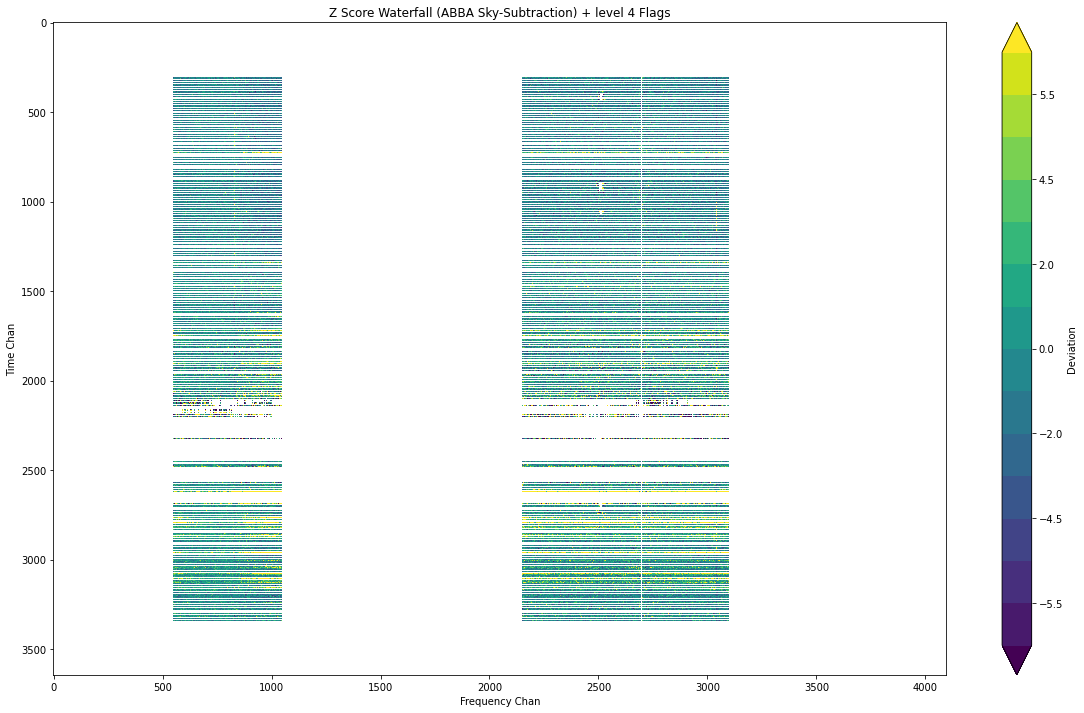

In [32]:
bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(zscore_l4, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Flags', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation' )

In [25]:
def stacked_flags(pipeline_flags):
    stacked_flags = np.stack(list(pipeline_flags.values()), axis=0)
    stacked_int_flags = stacked_flags.astype(int)
    stacked_score= np.sum(stacked_int_flags, axis=0)
    stacked_flag = ((stacked_score.astype(float) == 59)) 
    return stacked_flag



In [27]:
mask_l4 = stacked_flags(l4_flags_dict)

In [113]:
print(f'Z map data shape:{z_score_map_abba.shape}')
print(f'L4 mask data shape:{mask_l4.shape}')

#Shapes of the z map and mask_l4 are different, i have reshaped the masked_l4 array to match the z map data

Z map data shape:(3644, 4096)
L4 mask data shape:(3647, 4096)


In [28]:
z_data_shape = z_score_map_abba.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [29]:
z_map_abba_l4_masked = np.ma.masked_array(z_score_map_abba, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall Level 1 Flags  + level 4 Mask (Applied on the Z-score map of level1 flags)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

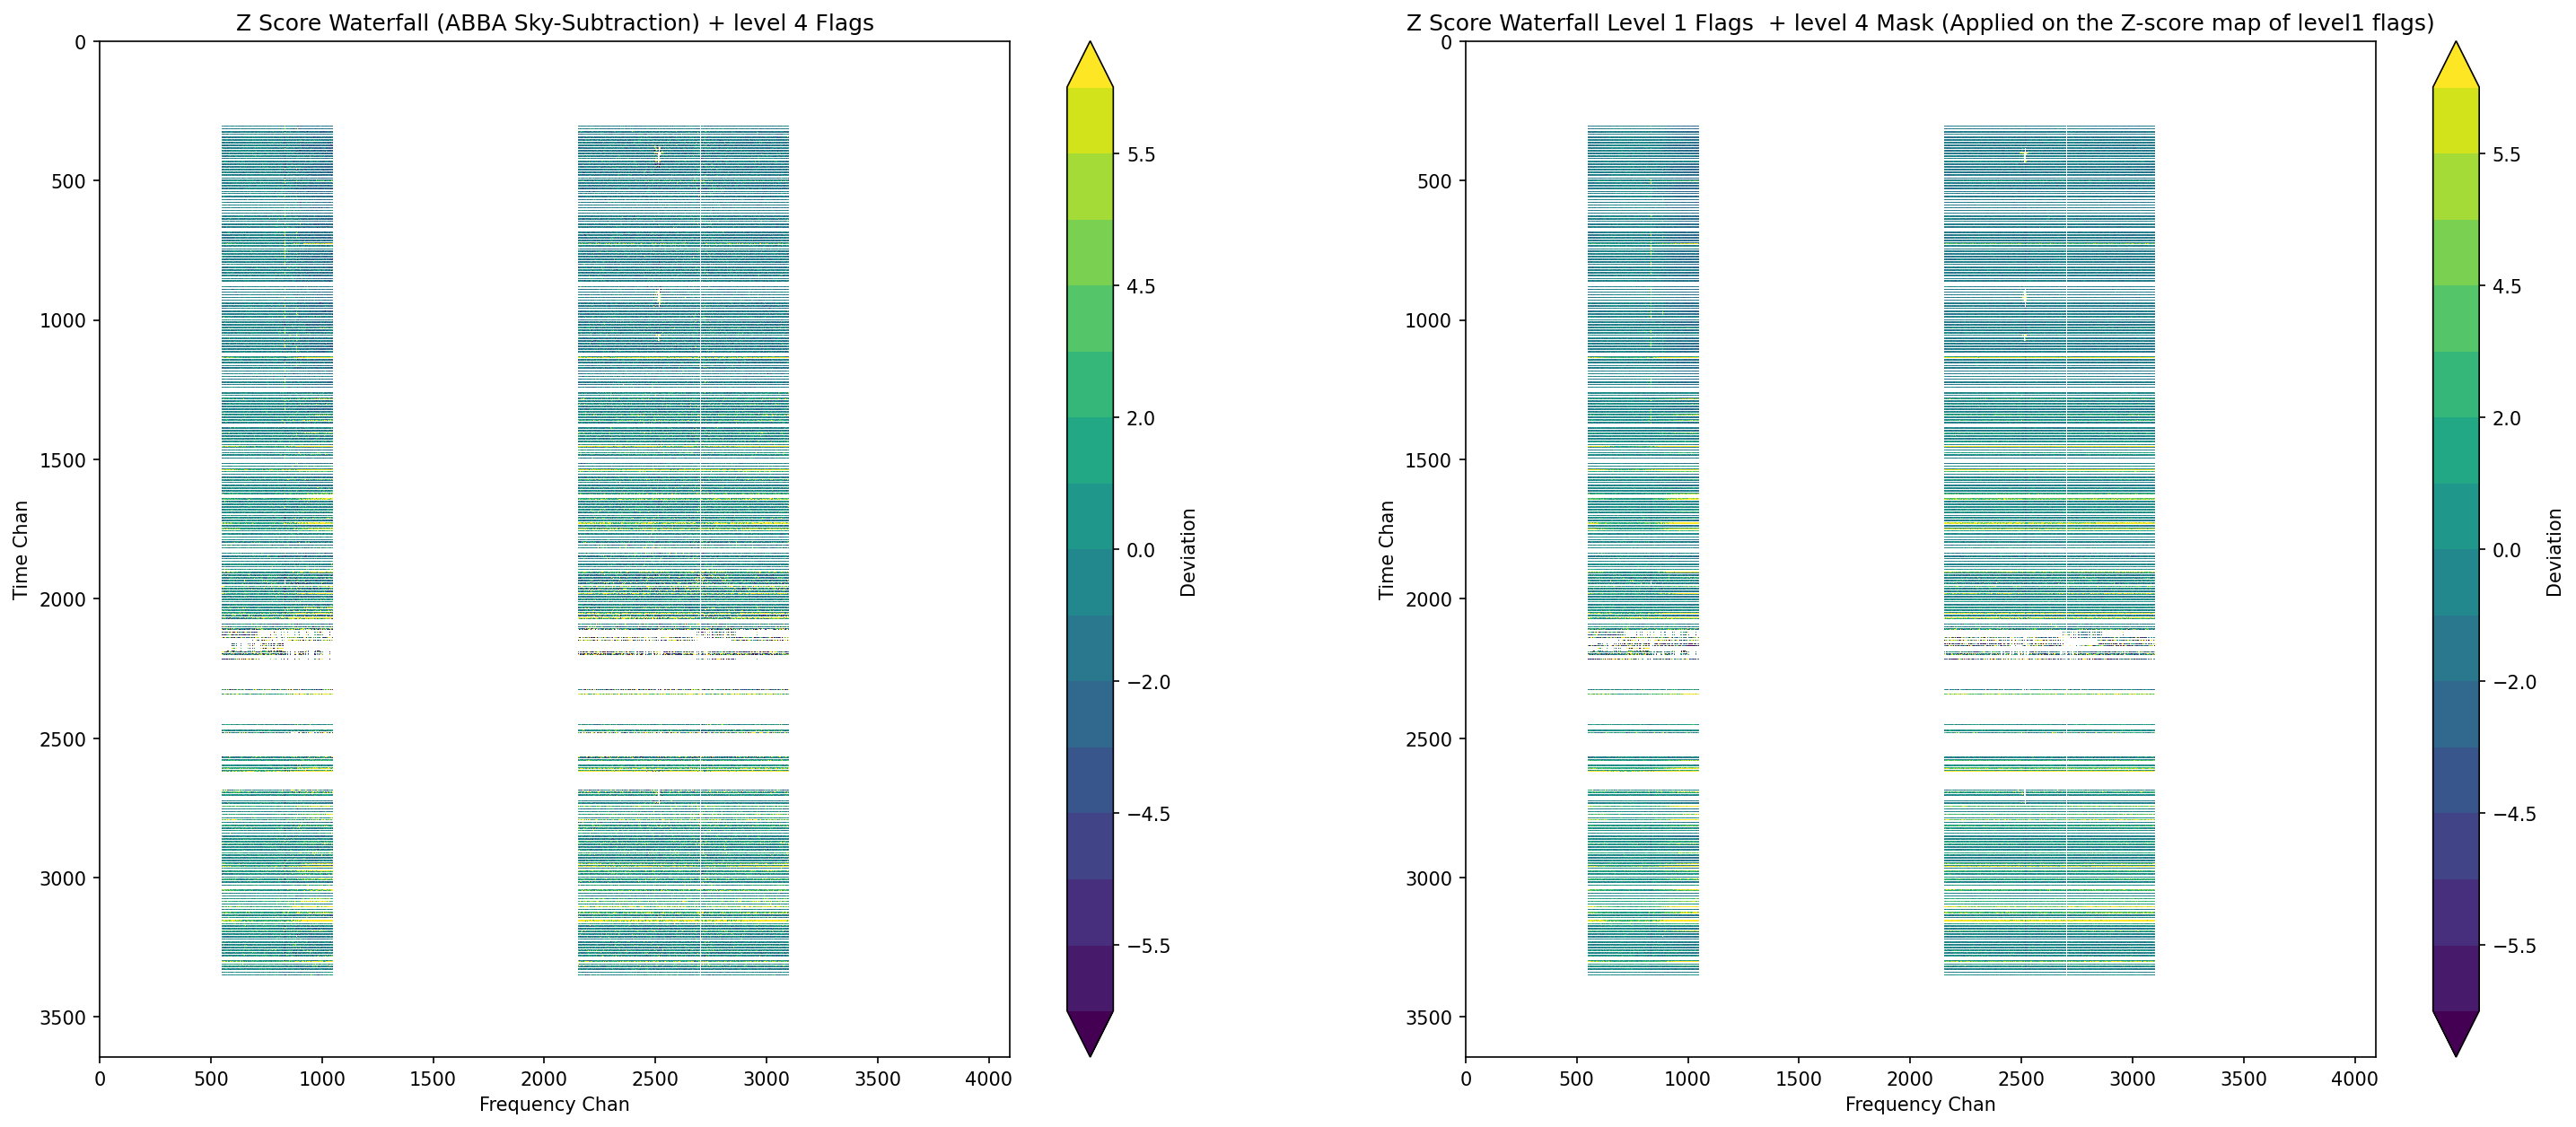

In [33]:
figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)


bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(zscore_l4, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Flags', figsize=(10,8), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation',  ax=ax[0])
plot_waterfall(z_map_abba_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall Level 1 Flags  + level 4 Mask (Applied on the Z-score map of level1 flags)', figsize=(10,8), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation',  ax=ax[1])

### Z-Score Distribution

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Z-Score Histogram Level 1'}, xlabel='Deviation', ylabel='Counts'>

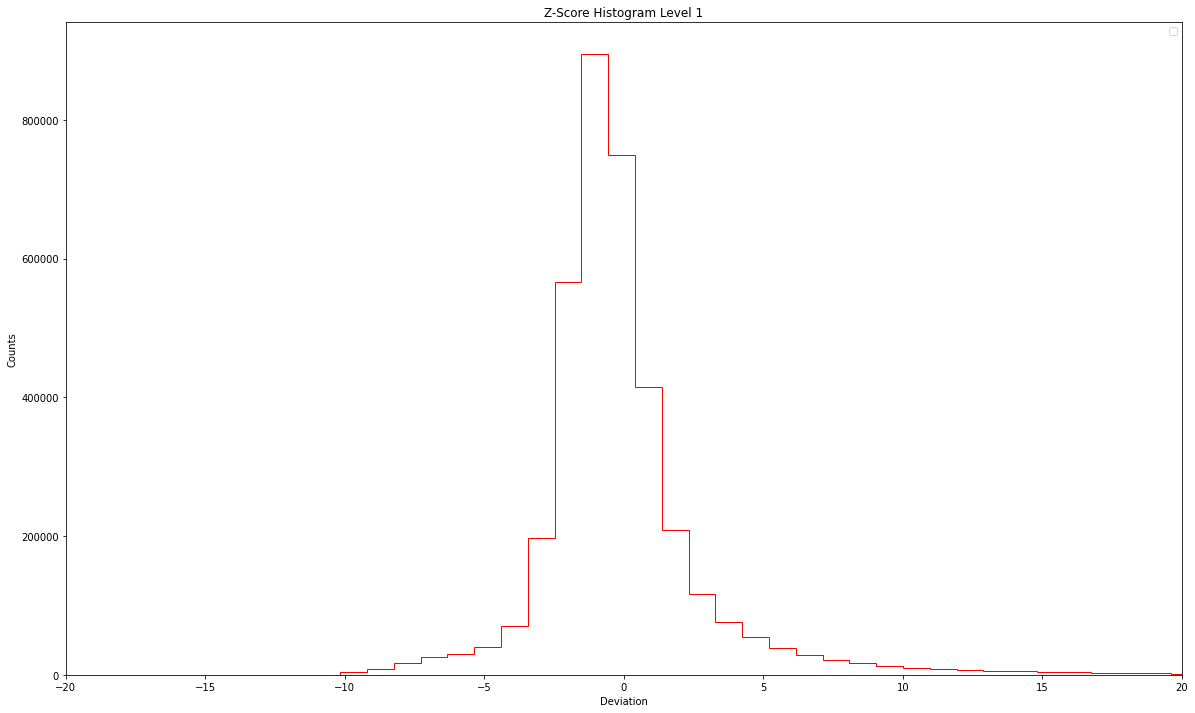

In [93]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_abba), Title='Z-Score Histogram Level 1', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


No handles with labels found to put in legend.


(-12.0, 15.0)

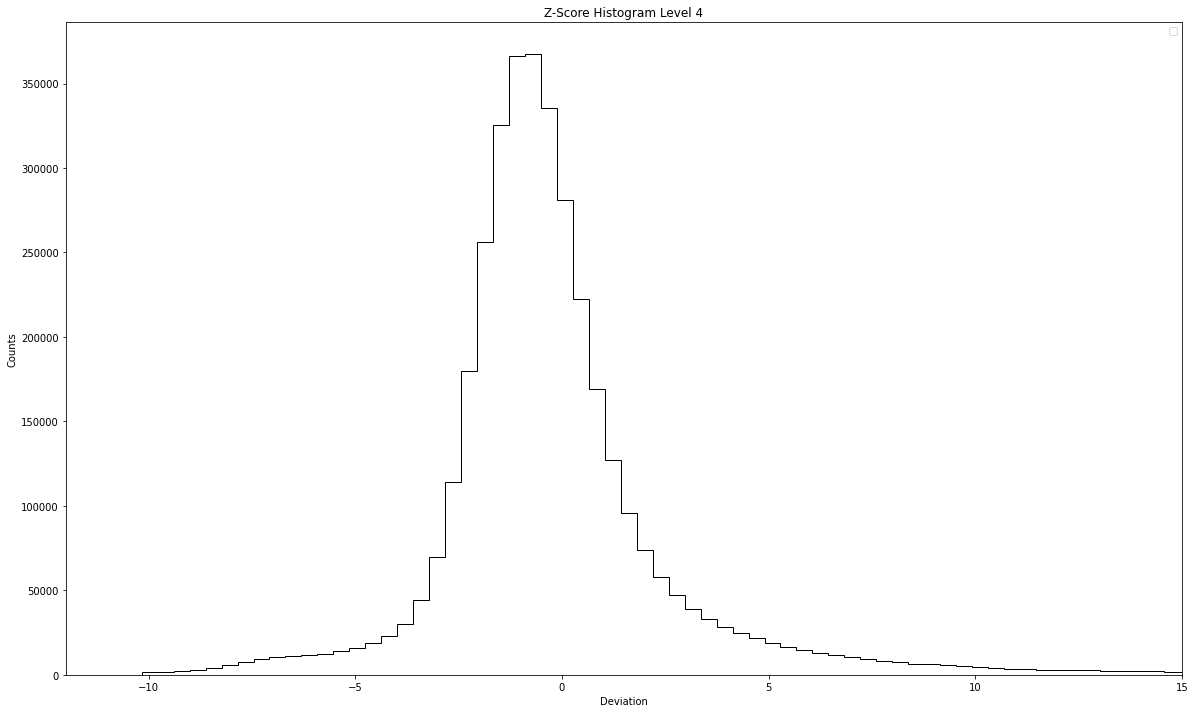

In [65]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(20, 12))


plot_hist(np.ravel(z_map_abba_l4_masked), Title=f'Z-Score Histogram Level 4', bins=500, xlim=(-10, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)
#ax.plot(bin_edges[:-1], model_y)
ax.set_xlim(-12,15)
#ax.set_ylim([np.amin(counts[counts > 0])*1e-3, np.amax(counts)]*1e-3)
    

<AxesSubplot:xlabel='Deviation', ylabel='Counts'>

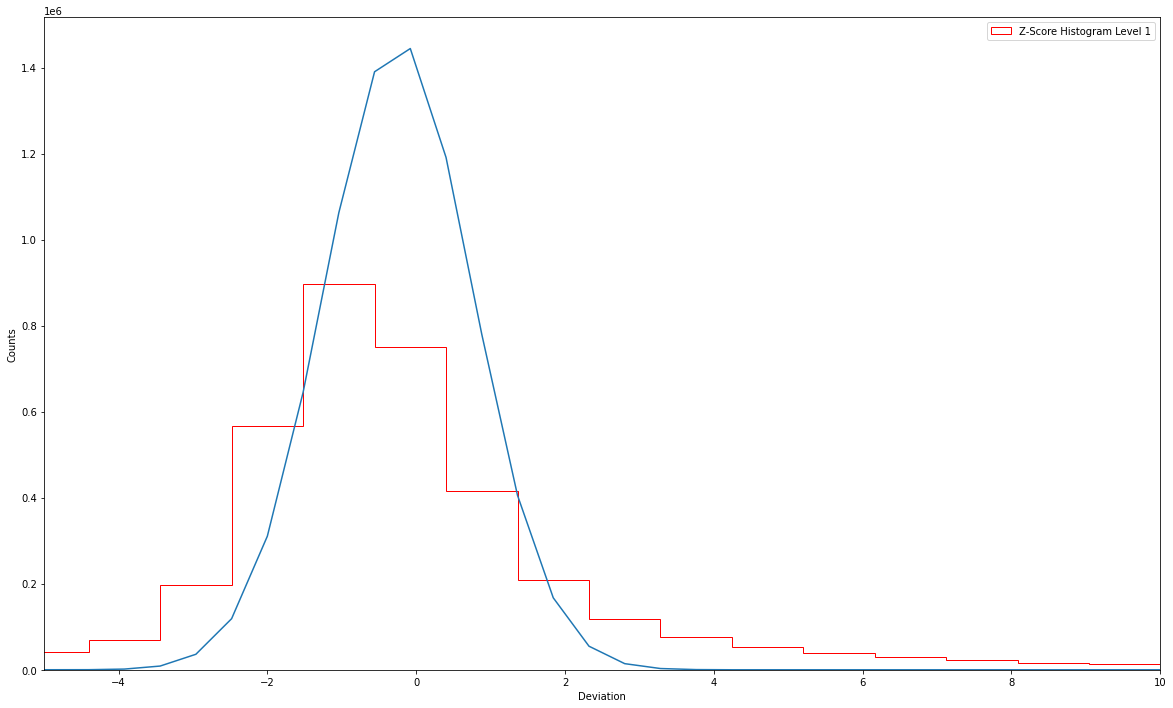

In [18]:

data = np.ravel(z_score_map_abba)

data1 = data[~np.isnan(data)]

counts, bin_edges = np.histogram(data1, bins=1000, density=False)

def model_func(bin_edges, mu, sigma):
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    model_values = np.exp(-0.5 * ((bin_centers - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    return model_values


model_prob = model_func(bin_edges, mu=0, sigma=1)
model_y = model_prob*np.sum(counts)
# or maybe
#model_y = model_y*np.sum(counts)


fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(bin_edges[:-1], model_y)
plot_hist(np.ravel(z_score_map_abba), label='Z-Score Histogram Level 1', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


In [ ]:
data = np.ravel(z_map_abba_l4_masked)



counts, bin_edges = np.histogram(data, bins=bins, density=False)

def model_func(bin_edges, mu, sigma):
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    model_values = np.exp(-0.5 * ((bin_centers - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    return model_values
model_prob = model_func(bin_edges, mu=0, sigma=1)
model_y = model_prob*np.sum(counts)
#model_y = model_y*np.sum(counts)

# Sky-Subtraction Method : 2 Channel Dithering

In [18]:
#After the masking of the data and the flags we apply the sky-subtraction function
SS_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    SS_data = SkySubtraction(masked_vis)
    SS_dict[ant_value] = SS_data


In [19]:
SS_dict.items()

dict_items([('m000', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m001', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m002', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m003', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,

In [20]:
ss_vis = np.stack(list(SS_dict.values()), axis=0)

In [21]:
ss_vis_AllAntsAve = np.nanmean(np.abs(ss_vis[:,:,:]), axis=0)


In [22]:
ss_vis_AllAntsAve.shape

(3646, 4096)

<AxesSubplot:title={'center':'2 channel Differencing SS Incoherent Averaged Spectrum'}, xlabel='Frequency Chan', ylabel='Time Chan'>

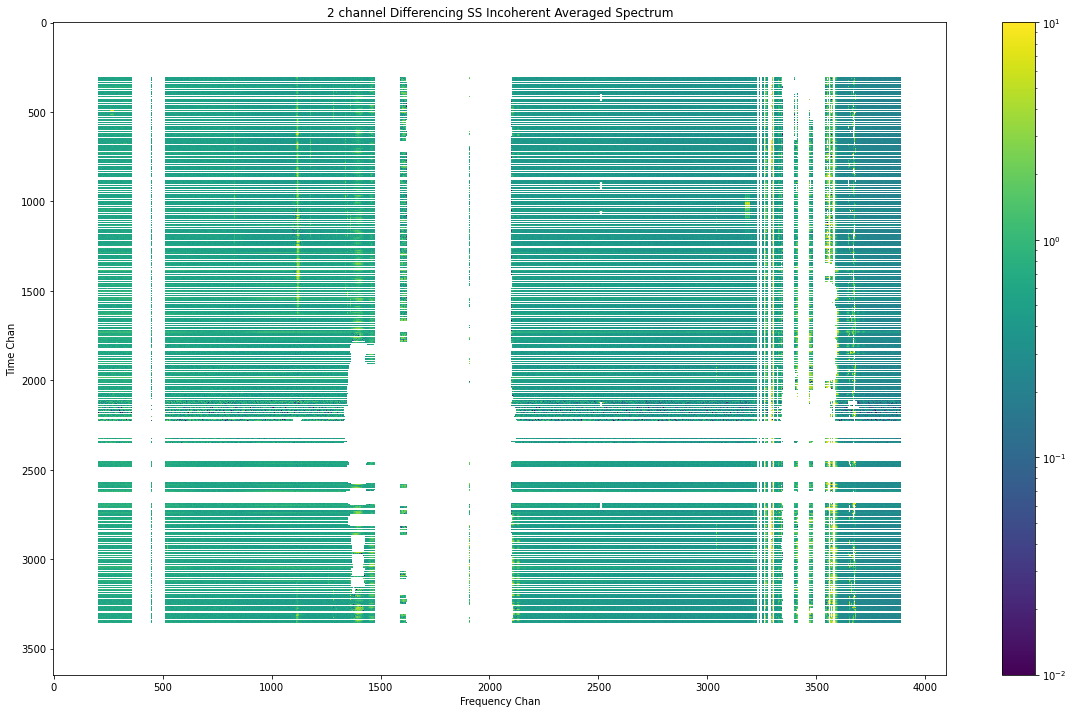

In [24]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-2, vmax=1e1)

plot_waterfall(ss_vis_AllAntsAve, interpolation='nearest', norm=norm, figsize=(20,12), Title= '2 channel Differencing SS Incoherent Averaged Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

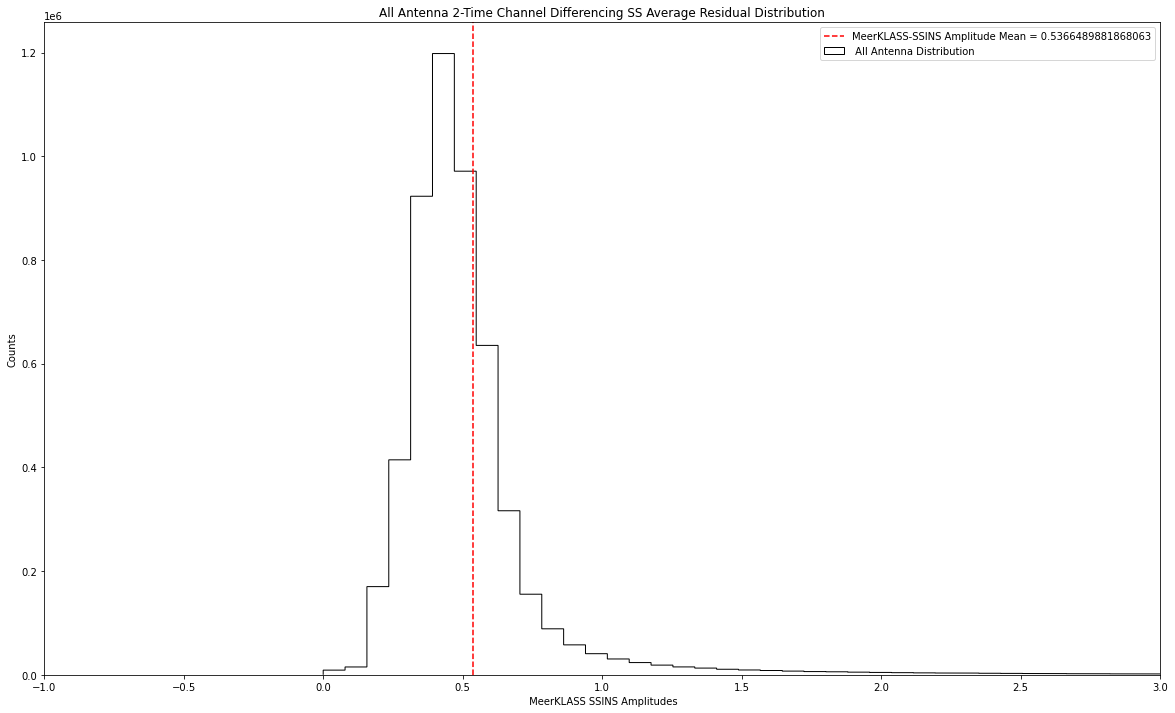

In [29]:


fig, ax = plt.subplots(figsize=(20, 12))
plot_hist(np.ravel(ss_vis_AllAntsAve),label= " All Antenna Distribution", Title=f'All Antenna 2-Time Channel Differencing SS Average Residual Distribution', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='step',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(np.nanmean(ss_vis_AllAntsAve), color='red', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean = {np.nanmean(ss_vis_AllAntsAve)}')
ax.legend()

plt.show()

In [48]:
z_score_map_ss = cal_zscore(ss_vis)

<AxesSubplot:title={'center':'Z Score Waterfall (2 time channel Sky-Subtraction)'}>

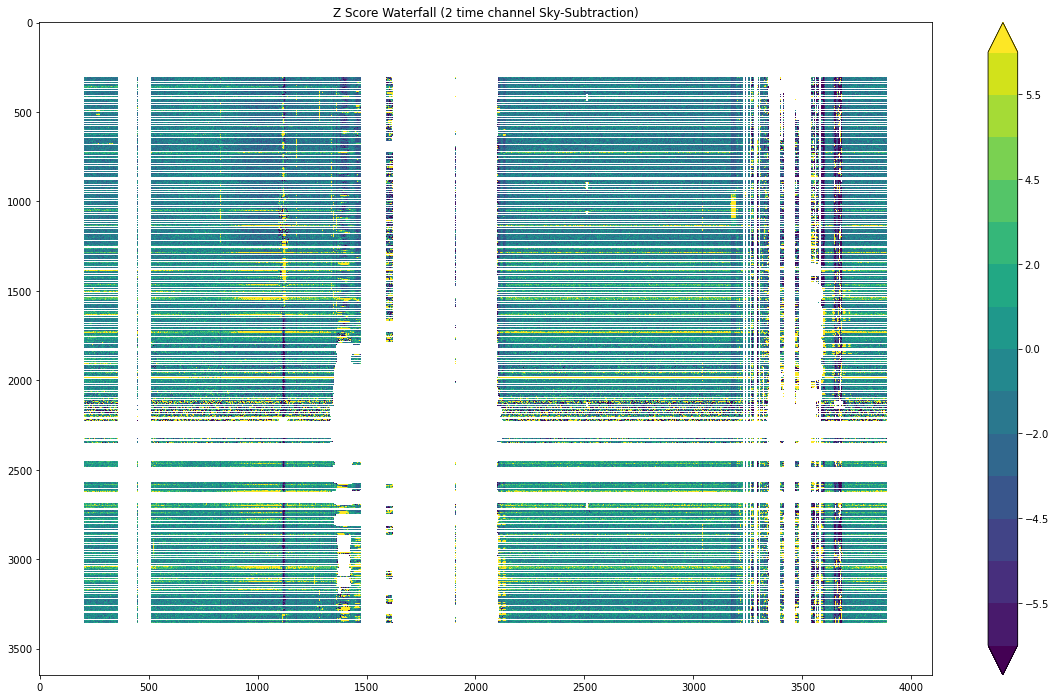

In [49]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_score_map_ss, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction)', figsize=(20,12) )

In [68]:
z_data_shape = z_score_map_ss.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [69]:
z_map_ss_l4_masked = np.ma.masked_array(z_score_map_ss, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask, applied on the level 1 Z-score map'}>

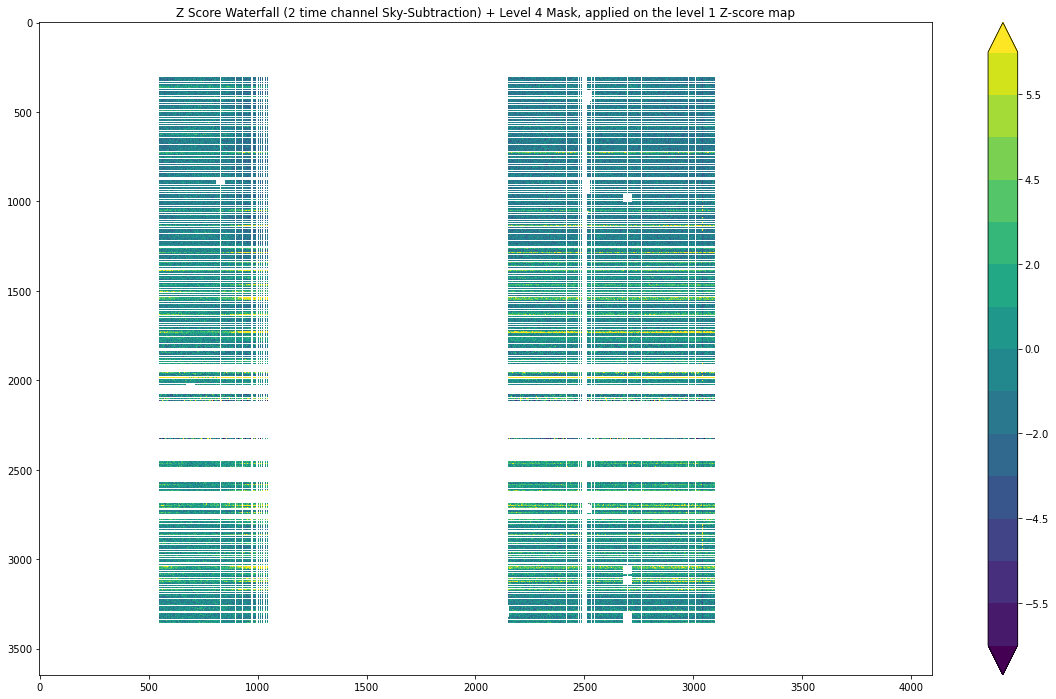

In [71]:

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_map_ss_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask, applied on the level 1 Z-score map', figsize=(20,12) )

In [41]:
l4_flags_dict.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

### Comparision plots of the sky subtacion with lower level flags

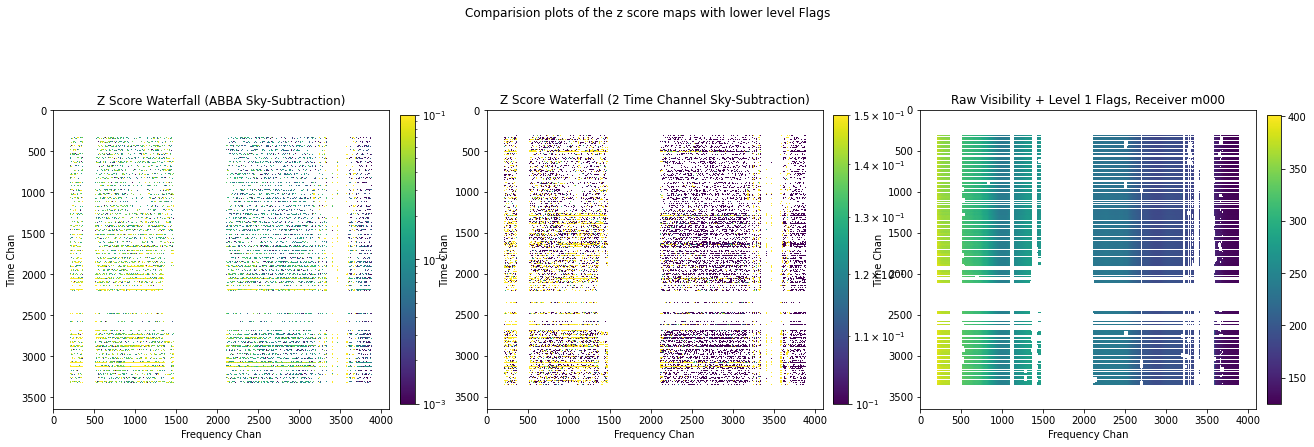

In [154]:
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1e-3, vmax=1e-1)
fig, axes = plt.subplots(1,3, figsize=(22,12))


im0 = axes[0].imshow(z_score_map_abba, interpolation='nearest', norm=norm )
axes[0].set_title('Z Score Waterfall (ABBA Sky-Subtraction)')
axes[0].set_xlabel('Frequency Chan')
axes[0].set_ylabel('Time Chan')

im1 = axes[1].imshow(z_score_map_ss, interpolation='nearest', norm=LogNorm(vmin=1e-1, vmax=1.5e-1))
axes[1].set_title('Z Score Waterfall (2 Time Channel Sky-Subtraction)')
axes[1].set_xlabel('Frequency Chan')
axes[1].set_ylabel('Time Chan')


im2 = axes[2].imshow(masked_vis_dict['m000'].filled(), interpolation='nearest')
axes[2].set_title('Raw Visibility + Level 1 Flags, Receiver m000')
axes[2].set_xlabel('Frequency Chan')
axes[2].set_ylabel('Time Chan')

for ax, im in zip(axes, [im0, im1, im2]):
    cbar = plt.colorbar(im, ax=ax,fraction=0.04, pad=0.03)
    #cbar.set_label('Colorbar Label')


fig.suptitle('Comparision plots of the z score maps with lower level Flags')
plt.subplots_adjust(top=1.25)
plt.savefig('Comparision plots of the z score maps with lower level Flags.png')

plt.show()

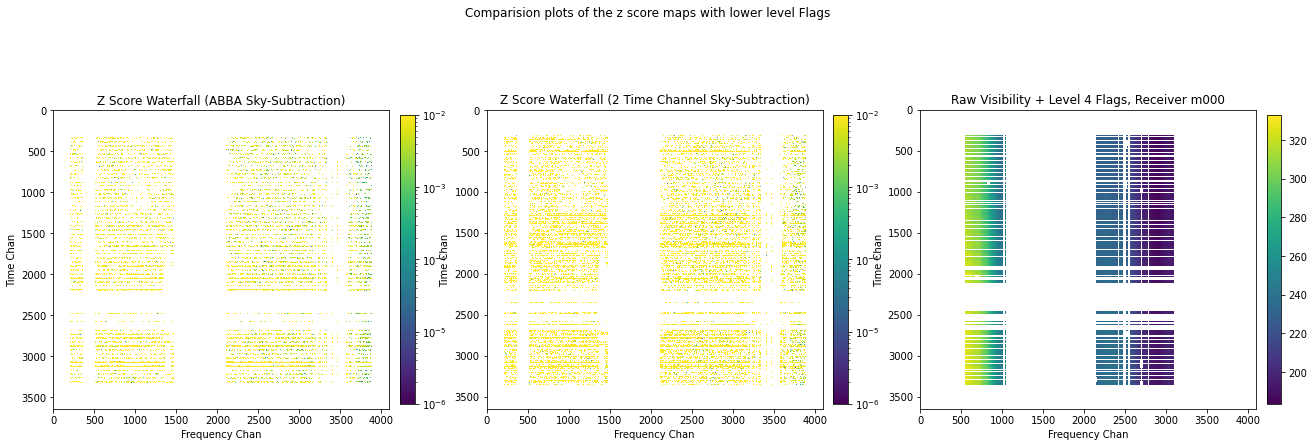

In [133]:
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1e-6, vmax=1e-2)
fig, axes = plt.subplots(1,3, figsize=(22,12))


im0 = axes[0].imshow(z_score_map_abba, interpolation='nearest', norm=norm )
axes[0].set_title('Z Score Waterfall (ABBA Sky-Subtraction)')
axes[0].set_xlabel('Frequency Chan')
axes[0].set_ylabel('Time Chan')

im1 =axes[1].imshow(z_score_map_ss, interpolation='nearest', norm=norm )
axes[1].set_title('Z Score Waterfall (2 Time Channel Sky-Subtraction)')
axes[1].set_xlabel('Frequency Chan')
axes[1].set_ylabel('Time Chan')


im2 = axes[2].imshow(l4_masked_data, interpolation='nearest')
axes[2].set_title('Raw Visibility + Level 4 Flags, Receiver m000')
axes[2].set_xlabel('Frequency Chan')
axes[2].set_ylabel('Time Chan')

for ax, im in zip(axes, [im0, im1, im2]):
    cbar = plt.colorbar(im, ax=ax,fraction=0.04, pad=0.03)
    #cbar.set_label('Colorbar Label')

 
fig.suptitle('Comparision plots of the z score maps with lower level Flags')
plt.subplots_adjust(top=1.25)
plt.savefig('Comparision plots of the z score maps with lower level Flags.png')
plt.show()

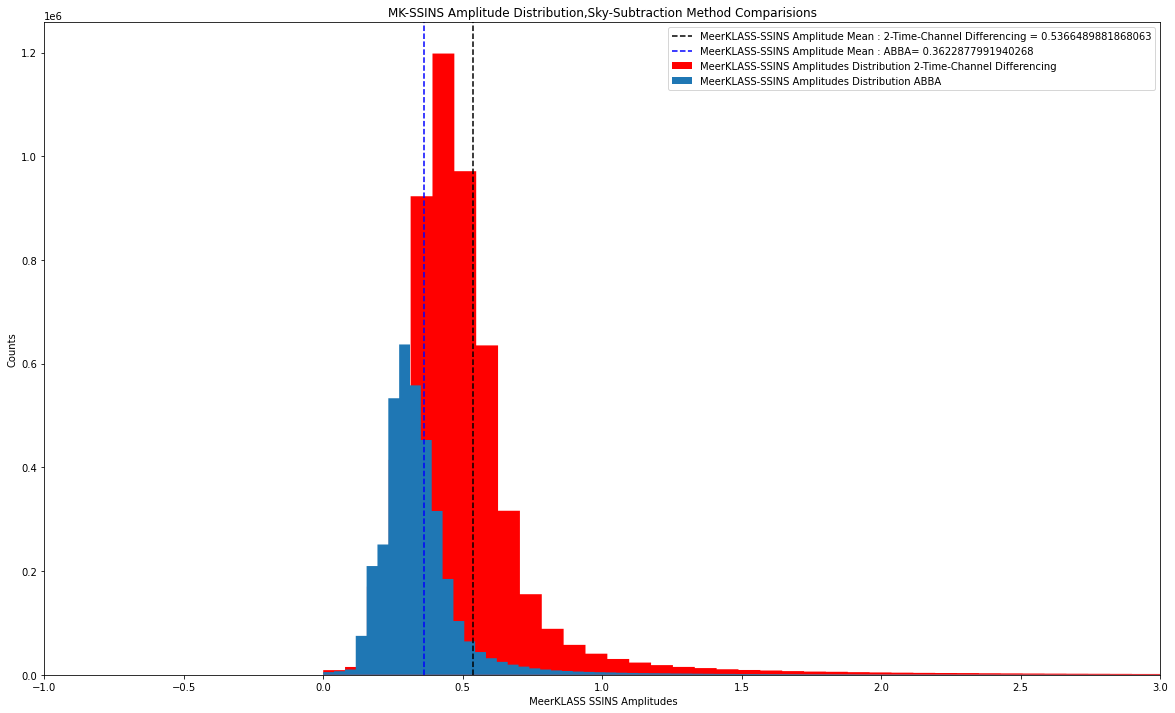

In [55]:
td_mean= np.nanmean(ss_vis_AllAntsAve)

fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(ss_vis_AllAntsAve),label= "MeerKLASS-SSINS Amplitudes Distribution 2-Time-Channel Differencing", bins=1000, xlim=(-1,3), figsize=(20,12), histtype='stepfilled',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', color= 'r', ax=ax)
ax.axvline(np.nanmean(ss_vis_AllAntsAve), color='k', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean : 2-Time-Channel Differencing = {td_mean}')
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot_hist(np.ravel(AbbaAllAnts),label= "MeerKLASS-SSINS Amplitudes Distribution ABBA", Title=f'MK-SSINS Amplitude Distribution,Sky-Subtraction Method Comparisions', bins=1000, xlim=(-1,3), figsize=(20,12), histtype='stepfilled',xlabel=' MeerKLASS SSINS Amplitudes', ylabel='Counts', ax=ax)
ax.axvline(mean, color='b', linestyle='--', label=f'MeerKLASS-SSINS Amplitude Mean : ABBA= {mean}')
ax.legend()

plt.show()

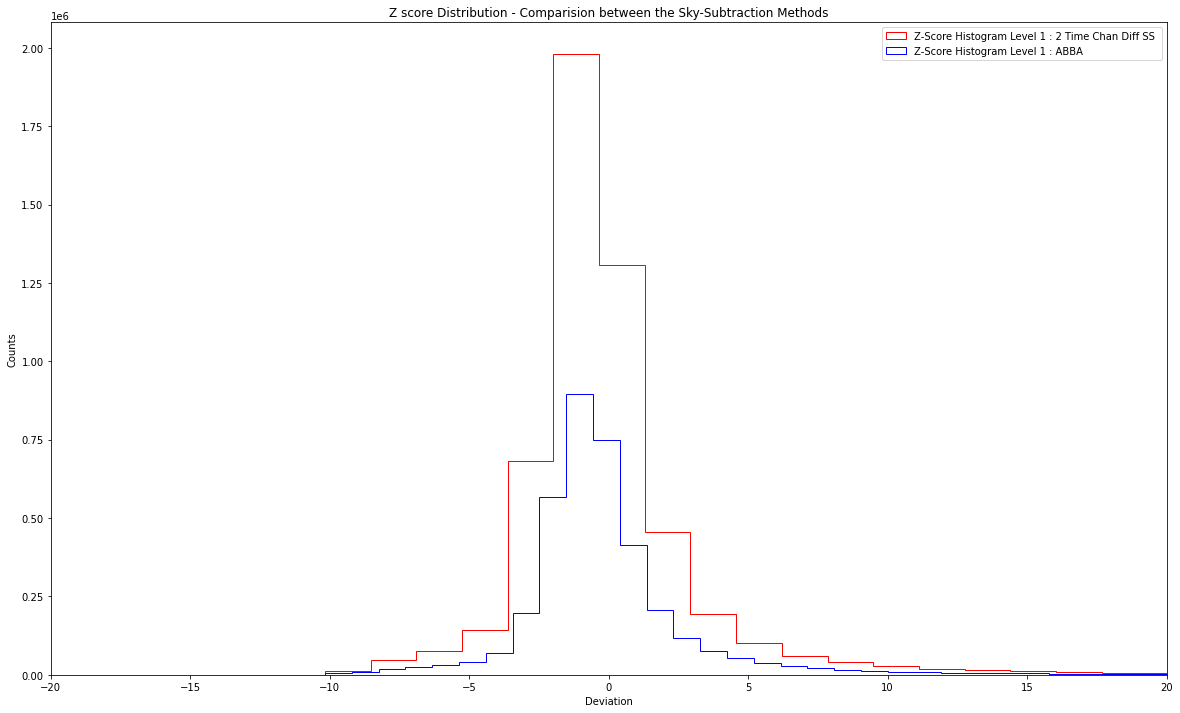

In [61]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_ss), label='Z-Score Histogram Level 1 : 2 Time Chan Diff SS ', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)

plot_hist(np.ravel(z_score_map_abba), label='Z-Score Histogram Level 1 : ABBA', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', Title= 'Z score Distribution - Comparision between the Sky-Subtraction Methods',ax=ax, edgecolor='b')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)
ax.legend()
plt.show()


In [9]:
N =128
B = N*(N-1)/2
B

8128.0

In [10]:
N = 53 

## 

## Creating stack of the Pipeline flags (To get the masks similar to SSINS calculation over all receivers  )
If flagging is done different at each receiver which is expected with the flagger, we expect to see a variation in the stacked scores, we will take the condition for the stacked score to be equal to the number of receivers in the observation in this test.

In [154]:
l1_flags_dict['m000'].dtype

dtype('bool')

In [69]:
stacked_level4_flags = np.stack(list(l4_flags_dict.values()), axis=0)

In [200]:
l1_flags_dict['m000']                                 #True is the Masked Data, i.e flagged data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [203]:
stacked_level1_flags.shape

(59, 3647, 4096)

In [8]:
stacked_int_flags = stacked_level4_flags.astype(int)

In [9]:
stacked_int_flags.shape

(59, 3647, 4096)

In [52]:
stacked_int_flags = stacked_level4_flags.astype(int)
stacked_score= np.sum(stacked_int_flags, axis=0)
stacked_score[1110:1120, 2900:2910].astype(float) #this tells us antennas have different flags at a (t,f) 

array([[39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [59., 59., 59., 59., 59., 59., 59., 59., 59., 59.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.]])

In [59]:

mask_flags = ((stacked_score[1110:1120, 2900:2910].astype(float) == 59))  #mask only if greater than 59, ie meaning all antennas have flagged this (t,f)

data_masked = np.ma.masked_array(stacked_score[1110:1120, 2900:2910].astype(float), mask=mask_flags, fill_value = np.nan)
data_masked.filled()

array([[39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.],
       [39., 33., 37., 35., 34., 36., 34., 36., 34., 35.]])

In [339]:

mask_flags_level4 = ((stacked_score.astype(float) == 59))  #mask only if greater than 59, ie meaning all antennas have flagged this (t,f)

data_masked = np.ma.masked_array(stacked_score.astype(float), mask=mask_flags, fill_value = np.nan)
x = data_masked.filled()

In [21]:
def stacked_flags(pipeline_flags):
    stacked_flags = np.stack(list(pipeline_flags.values()), axis=0)
    stacked_int_flags = stacked_flags.astype(int)
    stacked_score= np.sum(stacked_int_flags, axis=0)
    stacked_flag = ((stacked_score.astype(float) == 59)) 
    return stacked_flag
        

In [73]:
def plot_waterfall(x,label=None,  Title =None, ylim : tuple = None, figsize=None, ax=None, vmax=None,vmin=None, interpolation= None, norm=None, cmap=None, xlabel=None, ylabel=None, clabel=None):

    if ax is None:  # Create a new figure and axes if not being passed in as a parameter
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    im = ax.imshow(x, label=label, vmax=vmax, vmin=vmin, interpolation=interpolation, cmap='viridis', aspect='auto', norm=norm)
    ax.set_title(Title)
    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    #fig.colorbar(im, ax=ax) 
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, label=clabel) 
    
    if ylim is not None:
        ax.set_ylim(*ylim)
    return ax



<AxesSubplot:title={'center':'vis+ stacked mask'}>

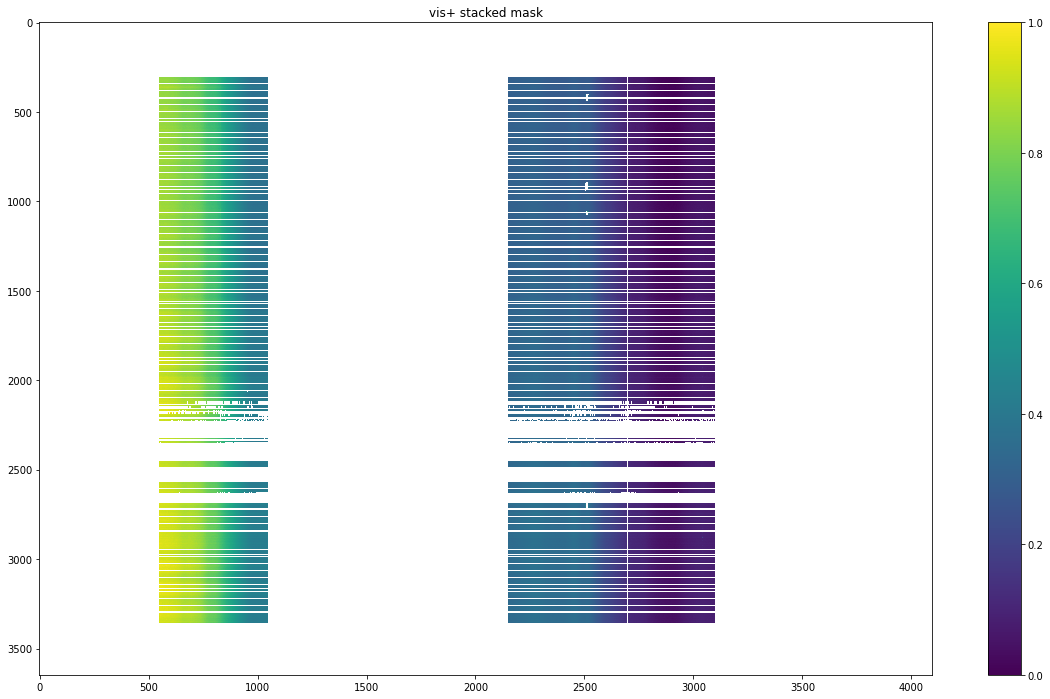

In [82]:
plot_waterfall(data_masked.filled(), interpolation='nearest', Title = 'Raw Visbility + Score-Mask (59 Antennas)', figsize=(20,12) )

<AxesSubplot:title={'center':'Raw Visbility + Score-Mask (>58 Score Antennas)'}>

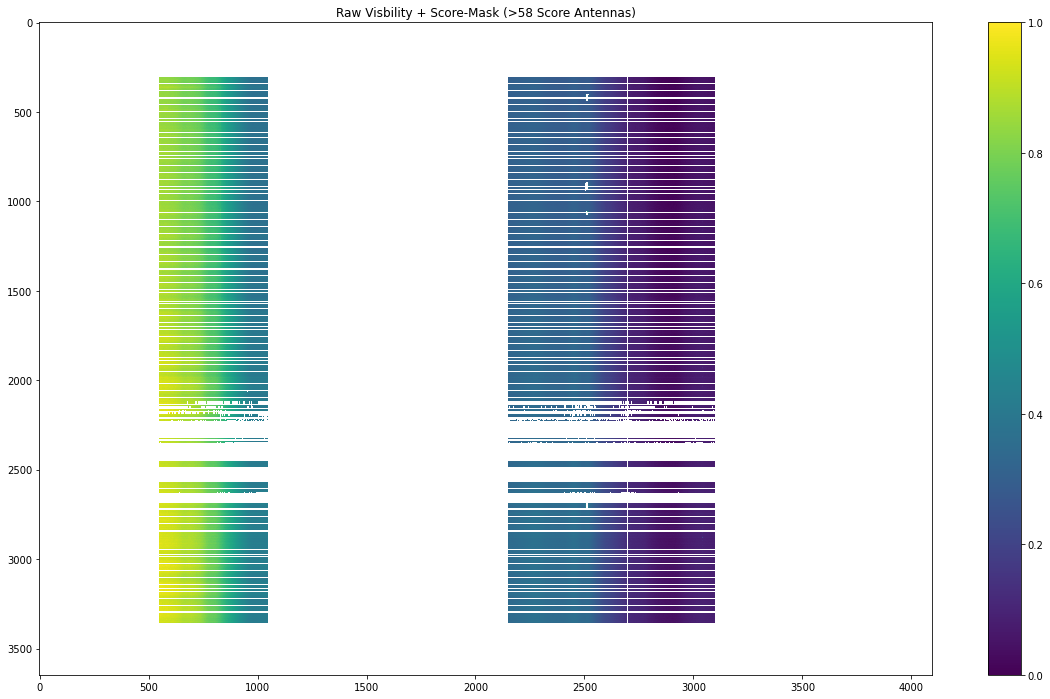

In [85]:
plot_waterfall(data_masked.filled(), interpolation='nearest', Title = 'Raw Visbility + Score-Mask (>58 Score Antennas)', figsize=(20,12) )

<AxesSubplot:title={'center':'Z Score Waterfall Level 1 Flags  + level 4 Mask (Applied on the Z-score map of level1 flags)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

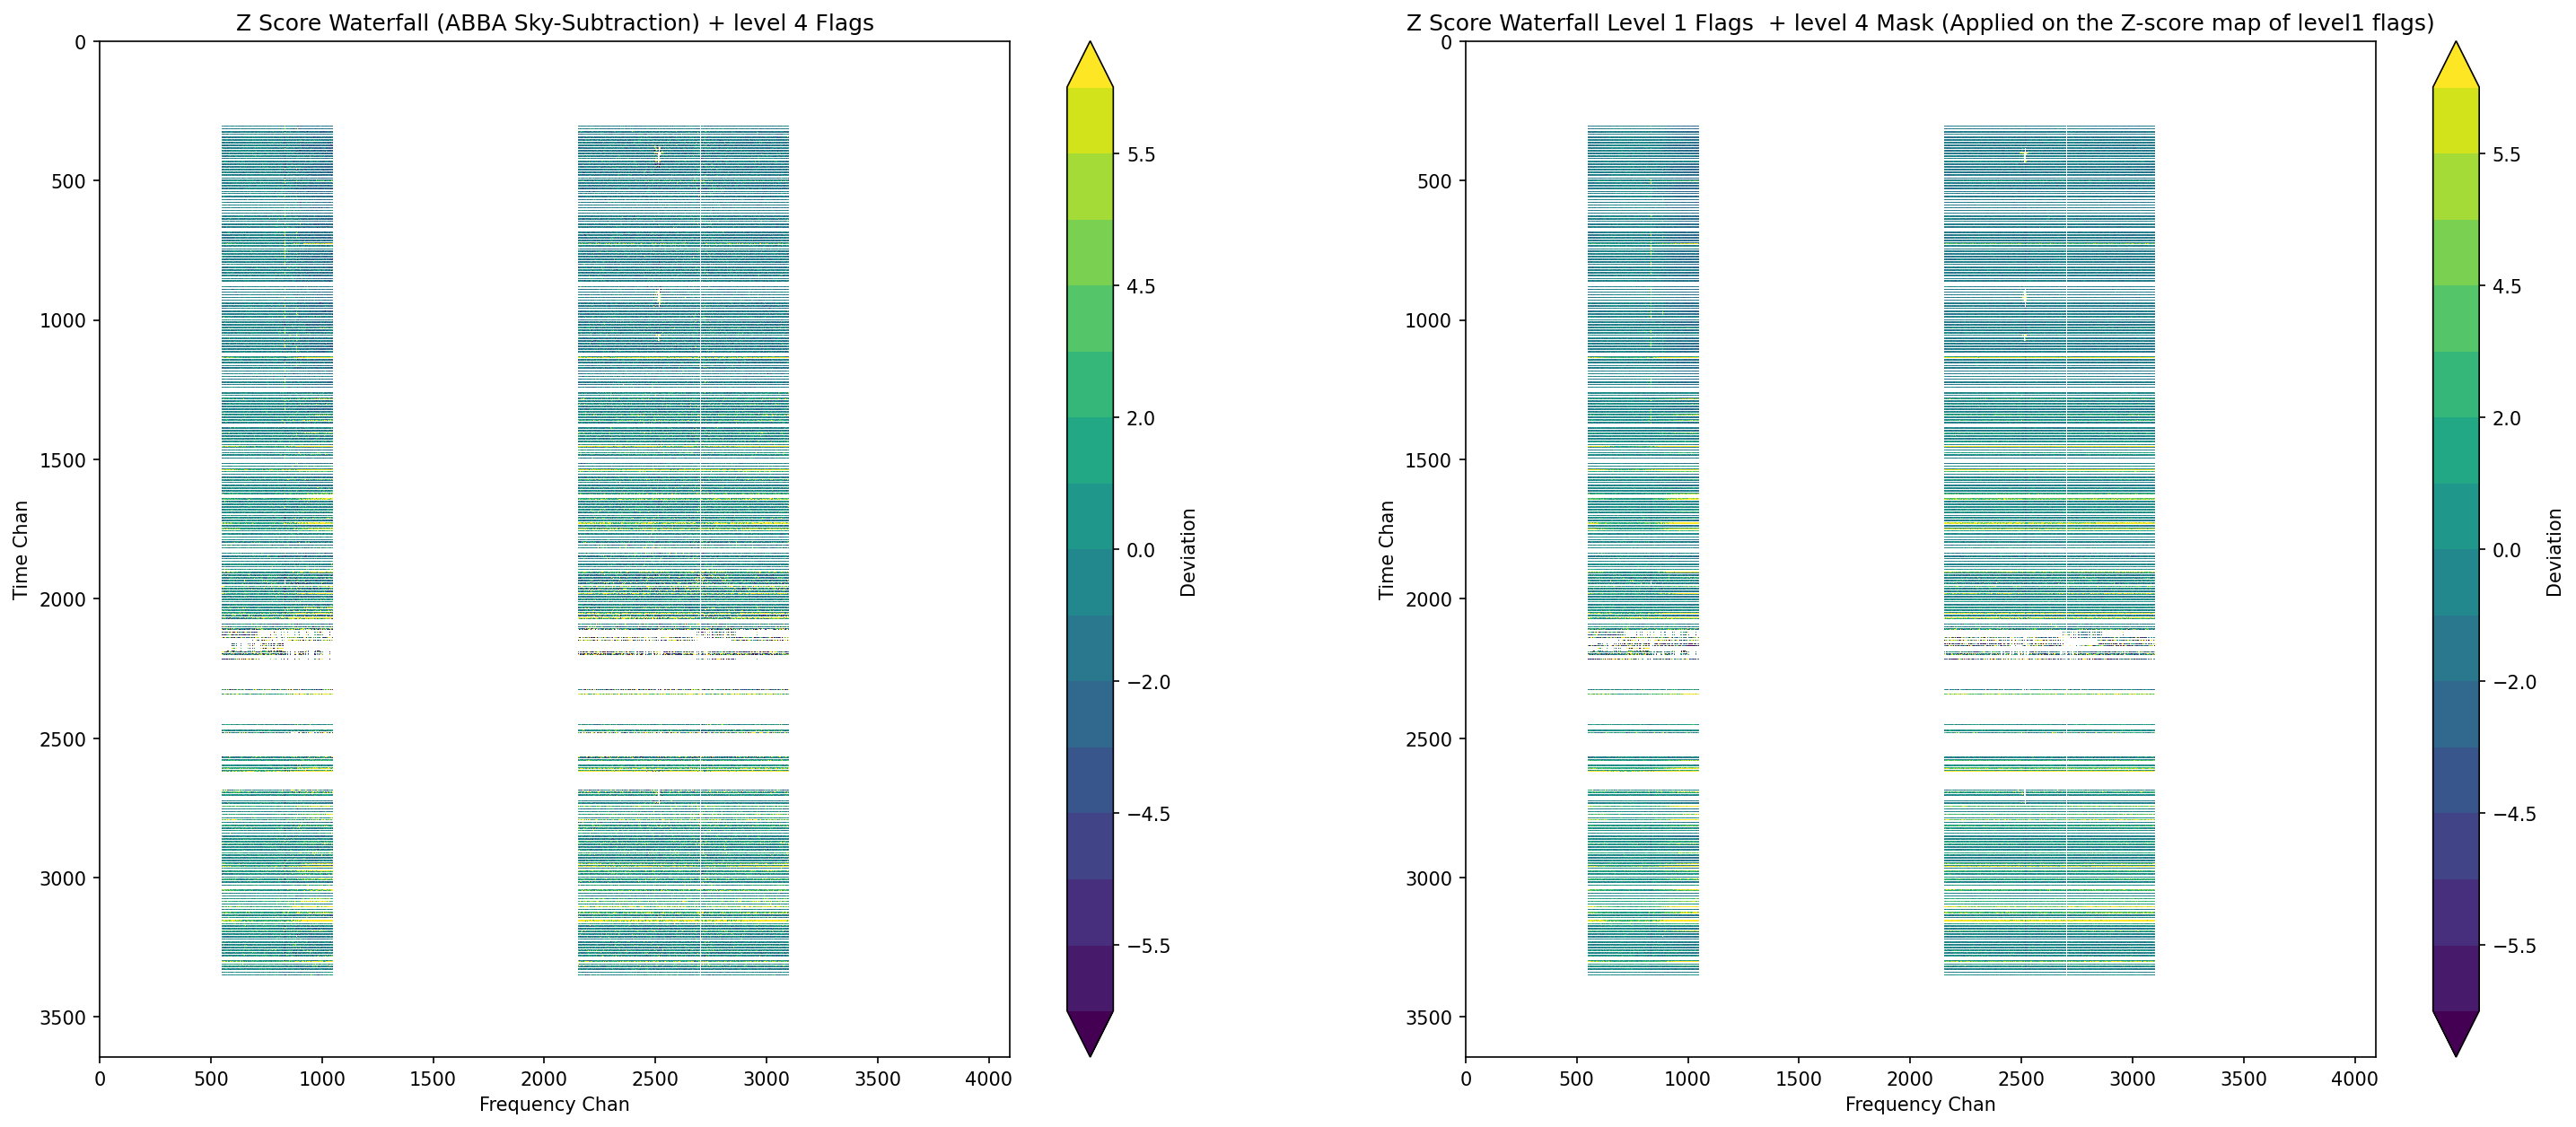

In [110]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)


bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(zscore_l4, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Flags', figsize=(10,8), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation',  ax=ax[0])
plot_waterfall(z_map_abba_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall Level 1 Flags  + level 4 Mask (Applied on the Z-score map of level1 flags)', figsize=(10,8), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation',  ax=ax[1])

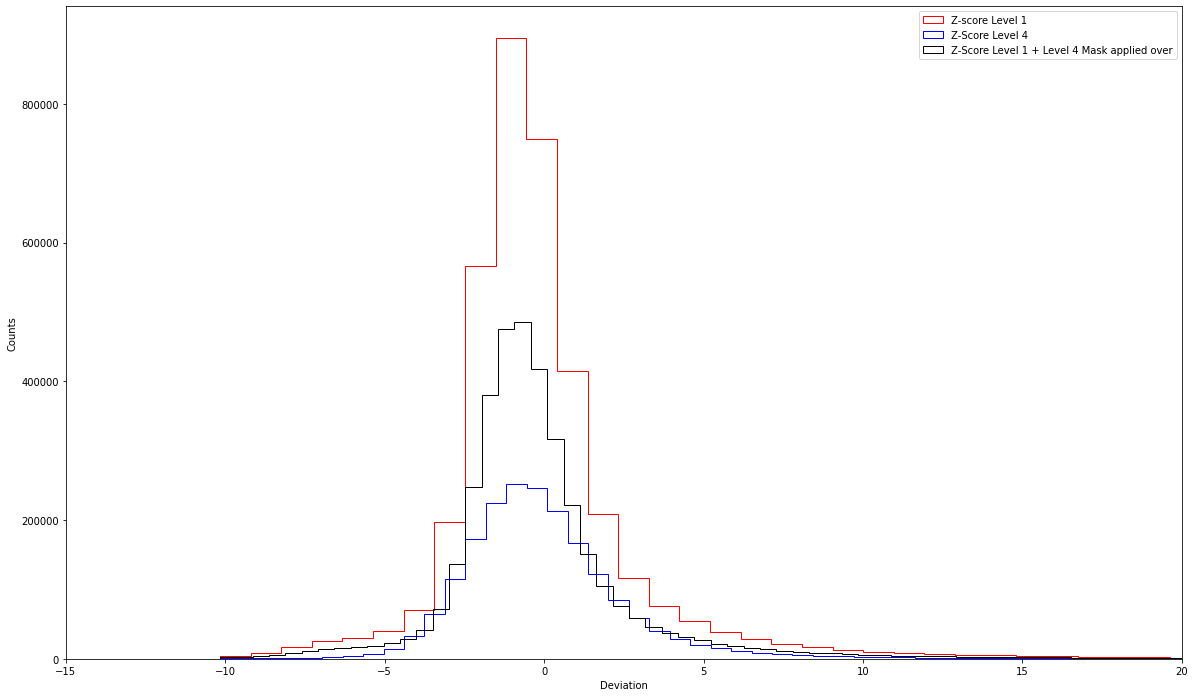

In [115]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_abba), label='Z-score Level 1 ', bins=500, xlim=(-15,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)

plot_hist(np.ravel(zscore_l4), label='Z-Score Level 4 ', bins=500, xlim=(-15,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', Title= 'Z score Distribution - Comparision between the Sky-Subtraction Methods',ax=ax, edgecolor='b')
plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Level 1 + Level 4 Mask applied over', bins=500, xlim=(-15, 20), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)
ax.legend()
plt.show()


# Propagating Masks to Flags

In [102]:
flags_shape = list(l1_flags_dict.values())

In [40]:
#z_score_map_abba_mask = ((z_score_map_abba.astype(float) < -5) ^ (z_score_map_abba.astype(float) > 5) )
z_score_map_abba_mask = ((z_score_map_abba.astype(float) < -4.5) ^ (z_score_map_abba.astype(float) > 4.5) )

zscore_l1_mask = z_score_map_abba_mask.copy()


In [64]:
zscore_l1_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [104]:
shape = list(zscore_l1_mask.shape)
shape  # current dimension is 3644, we need to extend the dimension to 3647


[3644, 4096]

In [ ]:
flags_new = np.zeros([shape[0] + 3] + shape[1:], dtype=bool)  #(t, f) ----> (3467, 4096)  # expanded the dims , default bool array 

In [105]:
flags_new.shape

(3647, 4096)

In [106]:
flags_new

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [114]:
flags_new[:-3] = zscore_l1_mask # update default bool array
flags_new[3:] = np.logical_or(flags_new[3:], flags_new[:-3])

In [145]:
nd= nd_flags_dict['m000']
flag_old = mask_flags_level
nd_flags = np.ones_like(data_vis, dtype=bool)
nd_flags[nd,:] = False #unmasked data
allflags =  np.logical_or(nd_flags, flag_old)

In [147]:
union_new_flags = np.logical_or(flags_new, allflags)

In [116]:
flags_new.shape

(3647, 4096)

In [121]:
flags_new[3:].shape

(3644, 4096)

In [23]:
#This function will return the flags for the raw data 

def mask_to_flags(zscore_mask, nd_flags, pipeline_flags=None):
    
    shape = list(zscore_mask.shape)
    flags_new = np.zeros([shape[0] + 3] + shape[1:], dtype=bool)  #(t, f) ----> (3467, 4096)  # expanded the dims
    flags_new[:-3] = zscore_mask
    flags_new[3:] = np.logical_or(flags_new[3:], flags_new[:-3])
    
    if nd_flags is None and pipeline_flags is None:
        return flags_new

    else:
        
        nd_flags= stacked_flags(nd_flags)
        nd_flags = np.ones_like(flags_new, dtype=bool)
        nd_flags[nd_s0, :] = False 
        
        pipeline_flags= stacked_flags(pipeline_flags)
        
        allflags =  np.logical_or(nd_flags, pipeline_flags)
        new_flags = np.logical_or(flags_new, allflags)
            
        
        
    
    return new_flags
        


In [32]:
def pipeline_flags(nd_flags, pipeline):
    pipeline_flags= stacked_flags(pipeline)
    nd_flags= stacked_flags(nd_flags)
    nd_flags = np.ones_like(pipeline_flags, dtype=bool)
    nd_flags[nd_s0, :] = False 
    
    pipeline_flags= stacked_flags(pipeline)
    
    pipeline_flags =  np.logical_or(nd_flags, pipeline_flags)
    return pipeline_flags
    

In [84]:
z_score_flags

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [58]:
with open('zscore_level_1.pkl', 'wb') as f:
    pickle.dump(z_score_map_abba, f)

In [70]:
with open('zscore_level_4.pkl', 'wb') as f:
    pickle.dump(zscore_l4, f)

In [53]:
data_vis = raw_vis_dict['m000']

In [202]:
flag_old = l1_flags_dict['m000']

In [134]:
data = masked_vis_dict['m000']

<AxesSubplot:title={'center':'Raw Visibility + Old Level 1 Flags @ m000'}, xlabel='Frequency Chan', ylabel='Time Chan'>

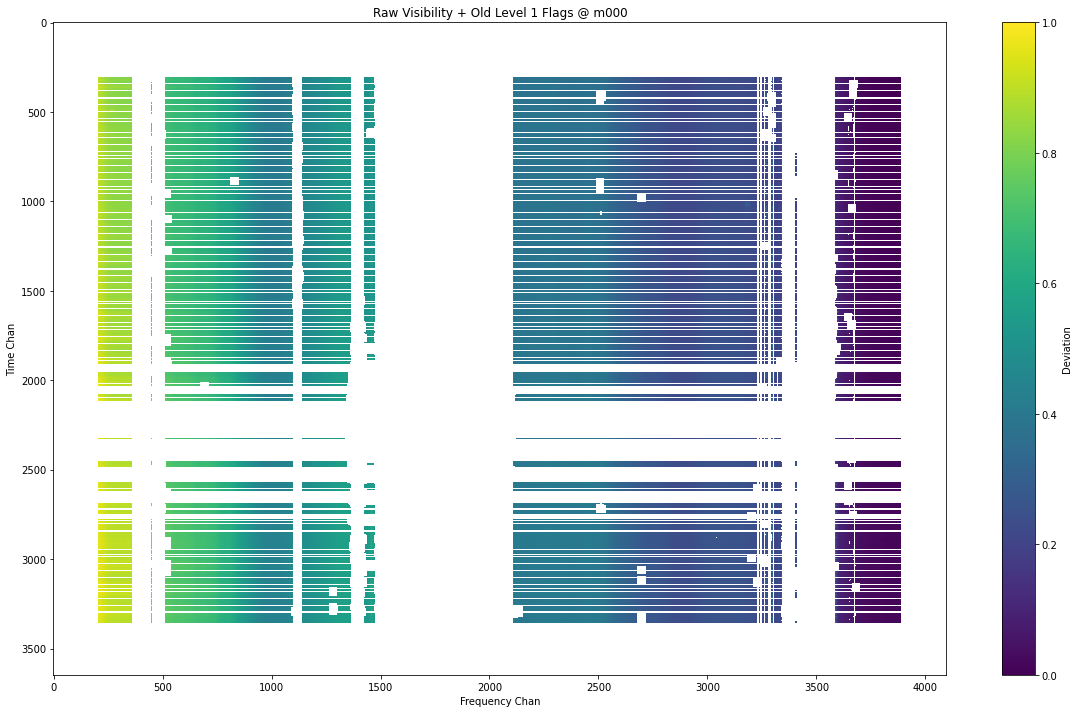

In [135]:
plot_waterfall(data, Title = 'Raw Visibility + Old Level 1 Flags @ m000', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation') 

In [119]:
data_new_flags = np.ma.masked_array(data_vis, mask=z_score_flags, fill_value=np.nan)

<AxesSubplot:title={'center':'Raw Visibility + New Flags Zscore (L1) TOD'}, xlabel='Frequency Chan', ylabel='Time Chan'>

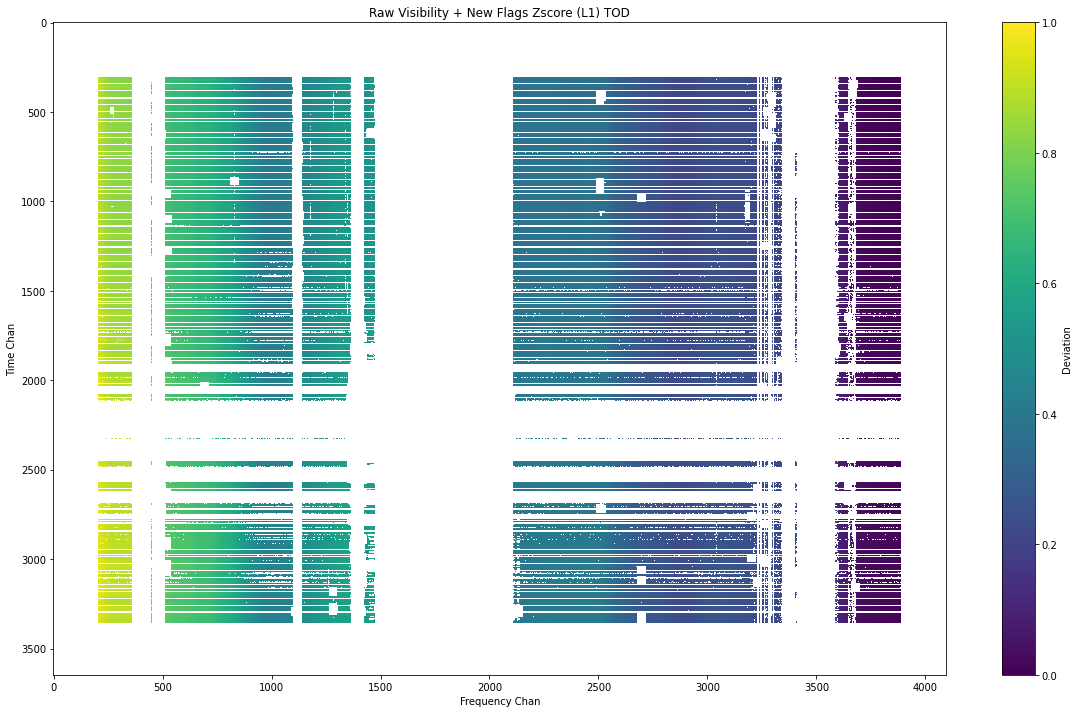

In [120]:
plot_waterfall(data_new_flags, Title = 'Raw Visibility + New Flags Zscore (L1) TOD', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation') 

<AxesSubplot:title={'center':'New flags in TOD'}, xlabel='Frequency Chan', ylabel='Time Chan'>

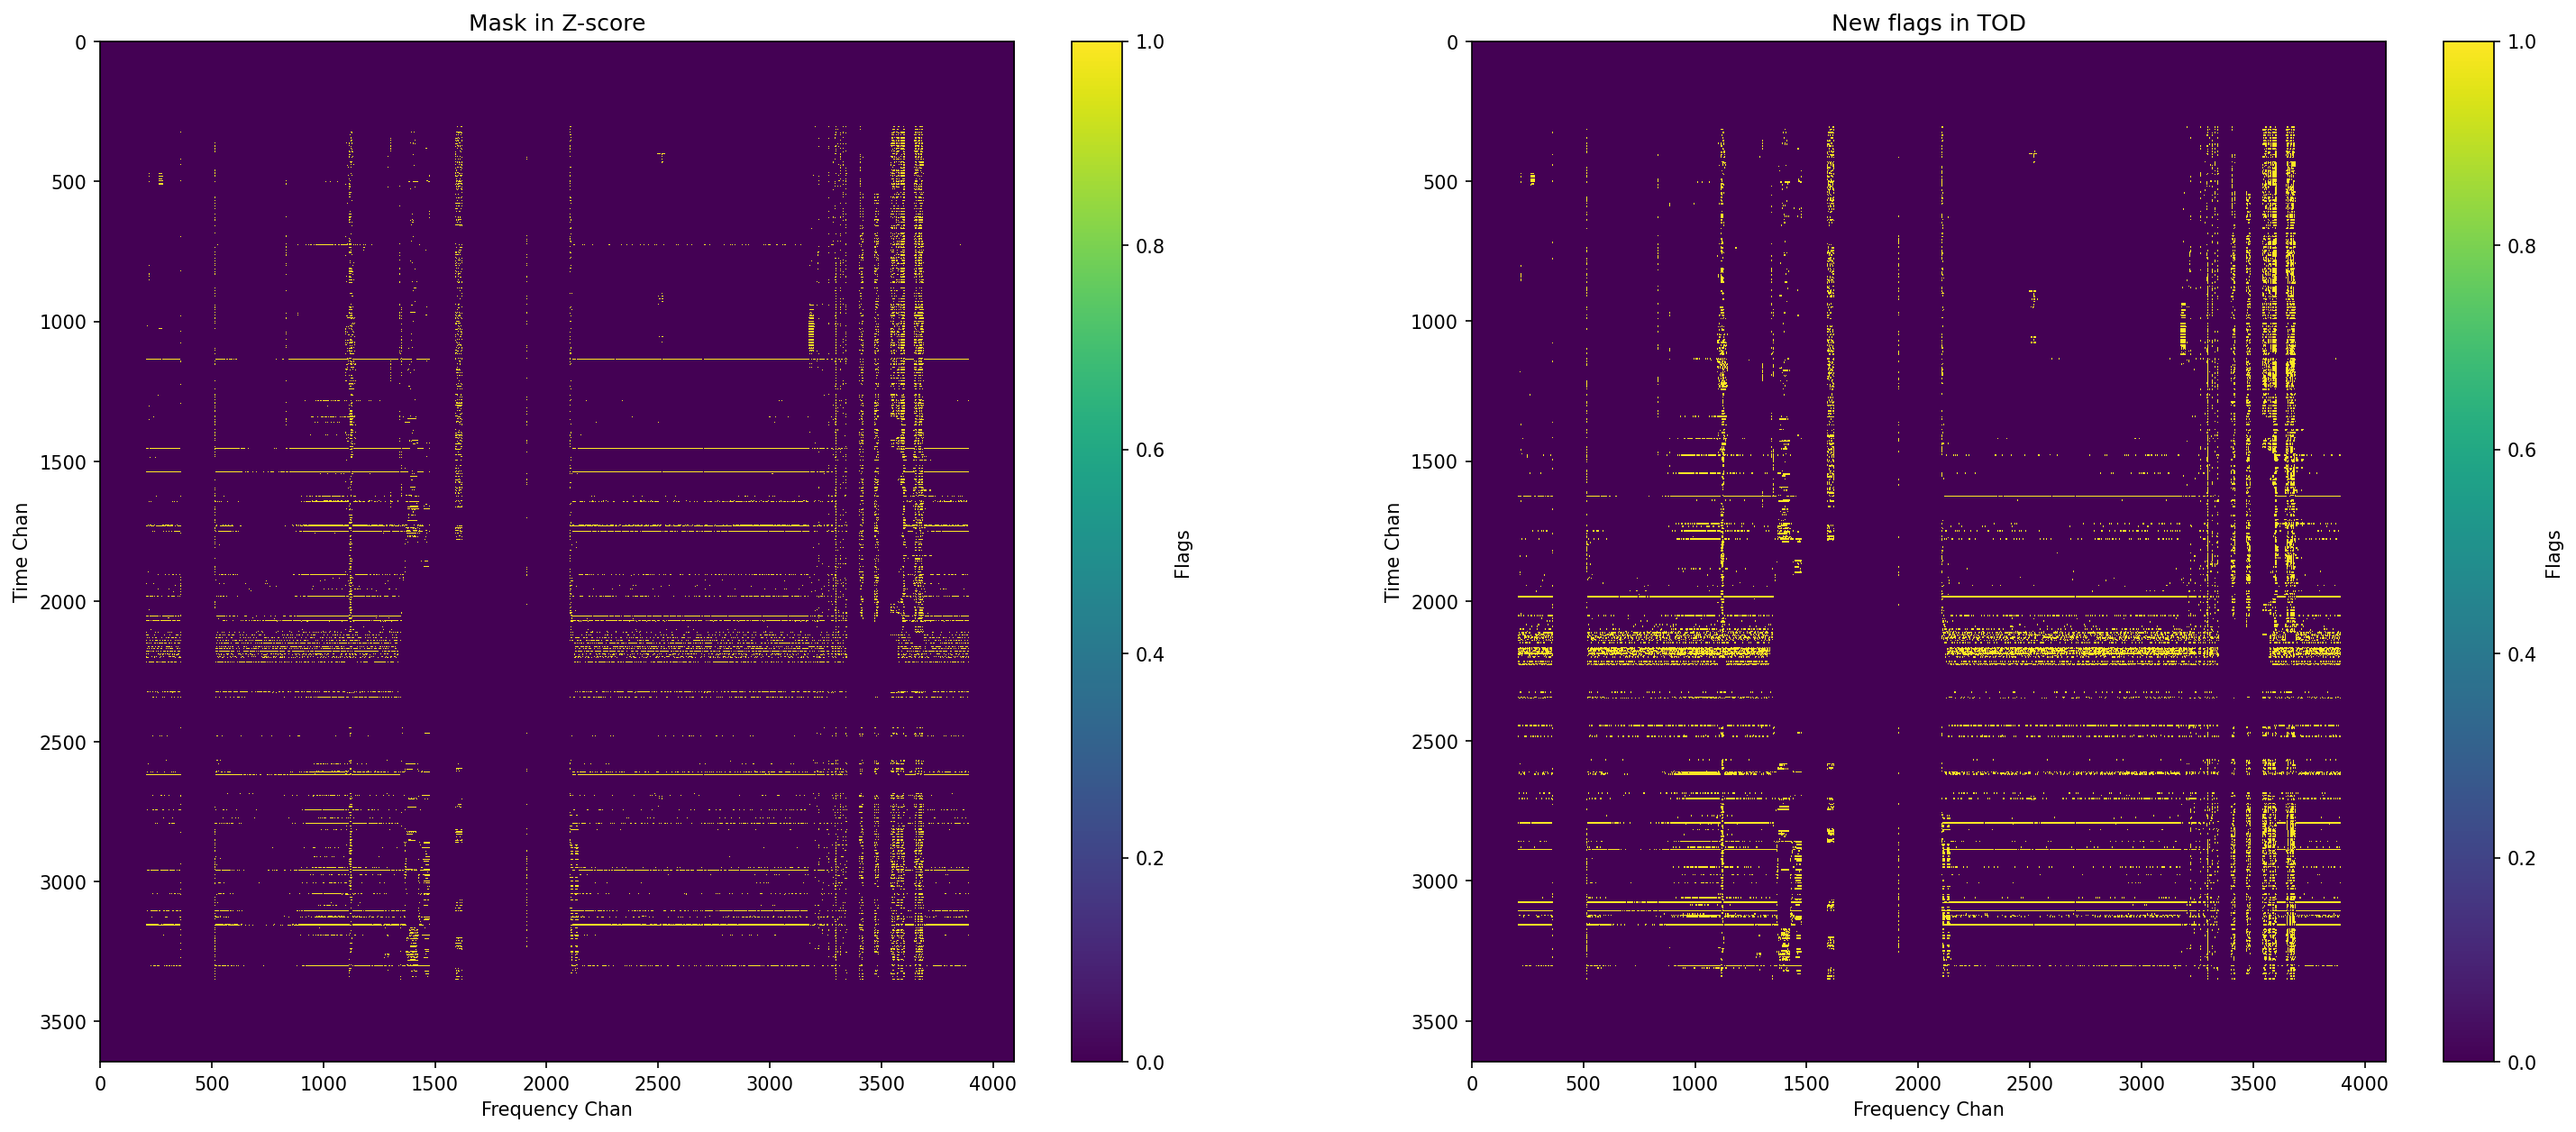

In [118]:

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150)

plot_waterfall(zscore_l1_mask, Title = 'Mask in Z-score', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[0]) 
plot_waterfall(flags_new, Title = 'New flags in TOD', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[1]) 

## SSINS Algorithm (L1)
## In this test the SSINS flags are made by using the L1 flags from the pipeline 

In [19]:
zscore_l1_mask = ((z_score_map_abba.astype(float) < -4.5) ^ (z_score_map_abba.astype(float) > 4.5) )

In [24]:
z_score_flags = mask_to_flags(zscore_l1_mask, nd_flags_dict, pipeline_flags=l1_flags_dict)

<AxesSubplot:title={'center':'Pipeline Level 1 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

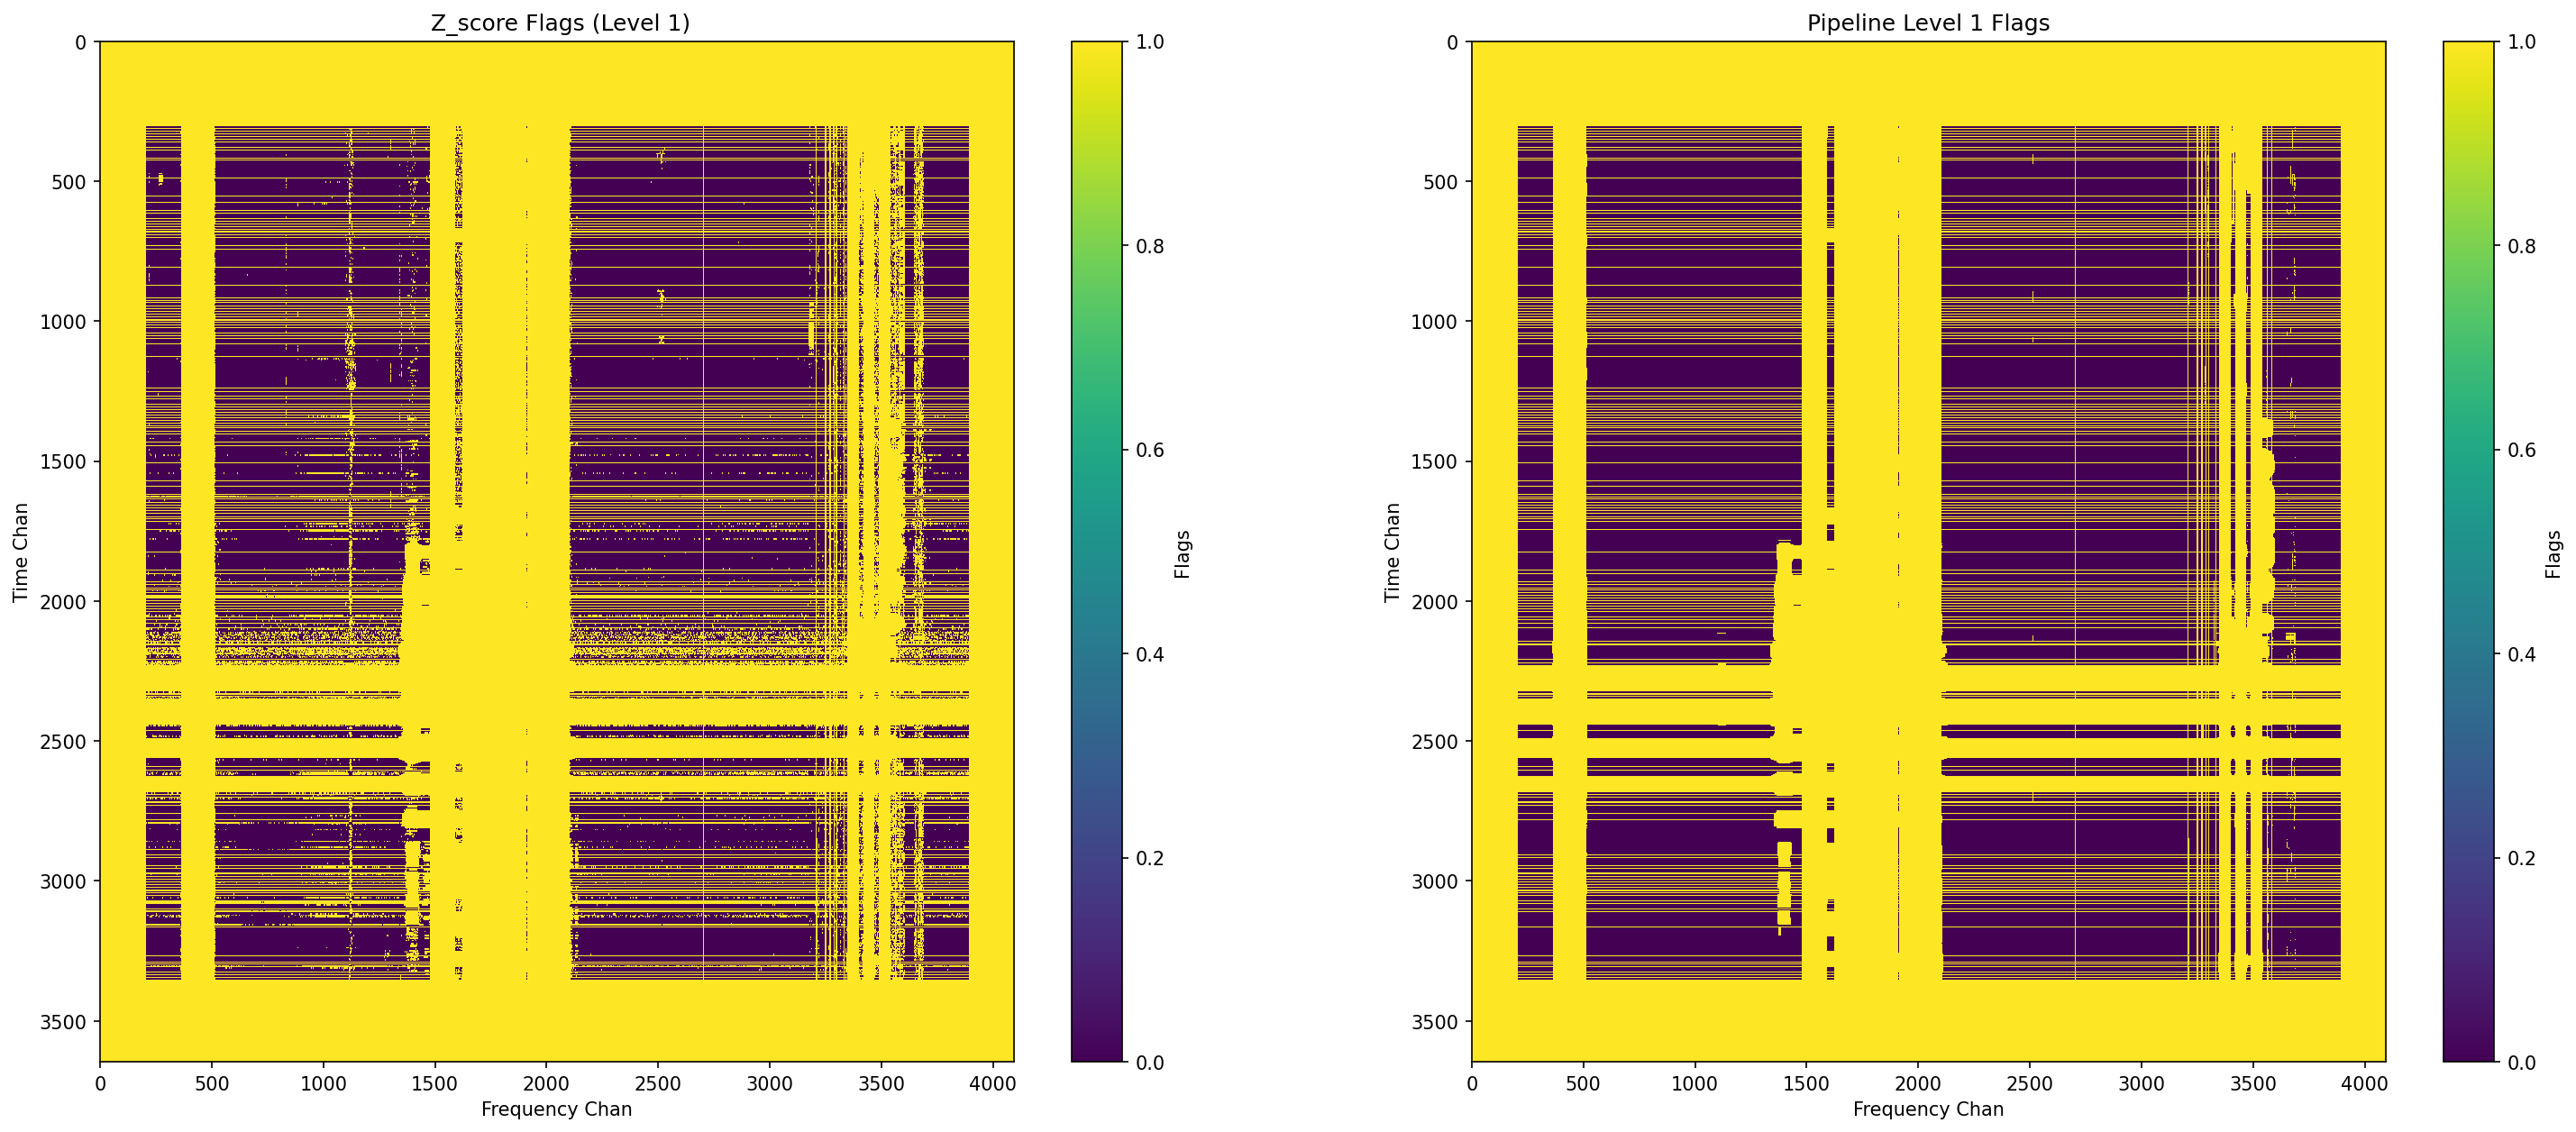

In [33]:

figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150) #correct stacked + summed receiver masks that matches the z-score
 
plot_waterfall(z_score_flags, Title = ' Z_score Flags (Level 1)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[0]) 
plot_waterfall(pipeline_flags(nd_flags_dict, l1_flags_dict), Title = 'Pipeline Level 1 Flags', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[1]) 

### Point Source Mask

In [149]:
p_radec=np.loadtxt('radio_source2021.txt')

In [312]:
import katcali 
ant='m001'
pol='v'
ch_ref=800
recv = ant+pol
data=kio.load_data(fname)
vis, flags =  kio.call_vis(fname,recv)
ra,dec,az,el=kio.load_coordinates(data)
target,c0,bad_ants,flux_model=kio.check_ants(fname)
ang_deg=kio.load_ang_deg(ra,dec,c0)
dp_tt,dp_ss,dp_f,dp_w, dp_t,dp_s,dp_slew,dp_stop=kl.cal_dp_label(data,flags,ant,pol,ch_ref,ang_deg)


# loaded data was saved in python2
['m001v' 'm001v']
calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


In [313]:
from astropy.coordinates import SkyCoord

from astropy import units as u

dp_sb=dp_ss[0]
dp_se=dp_ss[-1]

p = SkyCoord(data.ra*u.deg,  data.dec*u.deg, frame='icrs')
ang_lim=.5

dp_ptr_list=kl.cal_ptr_mask(p,p_radec,nd_s0, dp_sb,dp_se,ang_lim)


In [292]:
vis_l0_flags = np.ma.array(vis, mask=flags)

In [293]:
vis_clean2=vis_l0_flags.copy()
vis_clean2.mask[dp_ptr_list,:] = True

In [314]:

point_source_flags = np.ones_like(vis, dtype=bool)  # Empty mask, where all values are set to true. True is flagged data


point_source_flags[dp_ptr_list,:] = False  #false is unmasked data, True is flagged data 


In [315]:
point_source_flags_up = np.ma.array(vis, mask=~point_source_flags)
point_source_flags = ~point_source_flags

<AxesSubplot:title={'center':'Point Source Flags @ m001'}, xlabel='Frequency Chan', ylabel='Time Chan'>

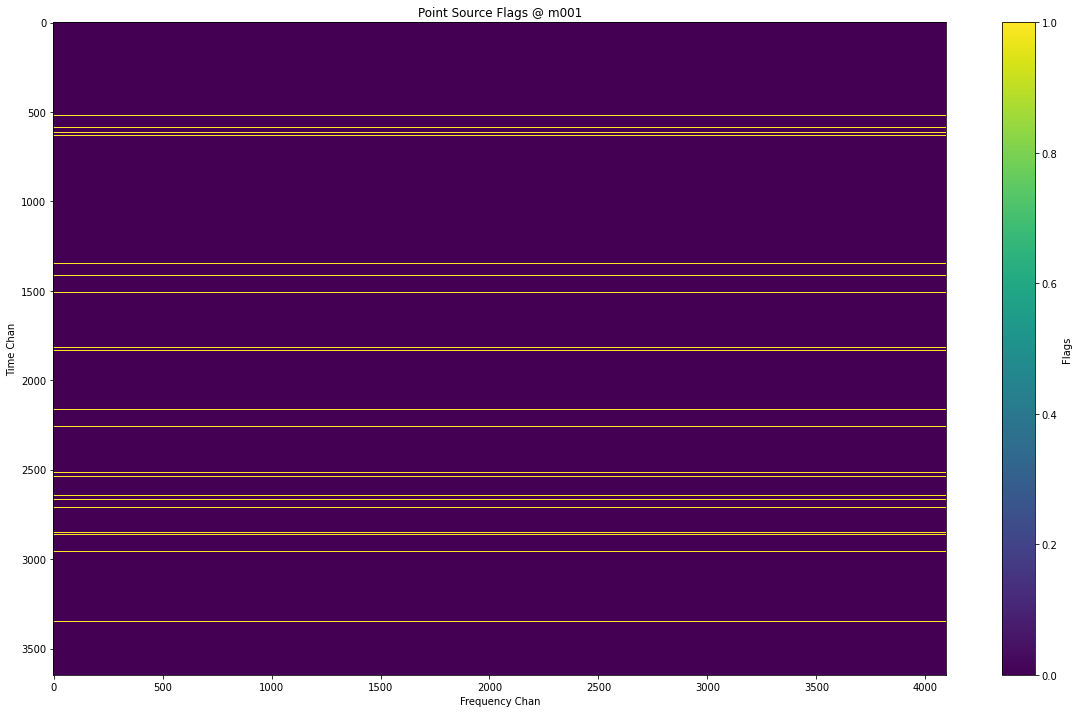

In [317]:

#figure, ax = plt.subplots(1, 3 , figsize=(24, 10), dpi=150) #point source flags aredata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACyoAAAToCAYAAABOjdWzAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAABcSAAAXEgFnn9JSAAEAAElEQVR4nOzdd7wkaV0v/s93GZYkAgoKIwKKgi4gAwYUJIk4GFBQVMwoxmu84NWfV0UU01VBvOYEqBgwIMhFHUUEAygiDOCSUYKO5LzAwu48vz+qek9vb/c53X069/s9r371dFfop6qrn6rz1KeeqtZaAAAAAAAAAAAAAAAW6YJ1FwAAAAAAAAAAAAAA2D2CygAAAAAAAAAAAADAwgkqAwAAAAAAAAAAAAALJ6gMAAAAAAAAAAAAACycoDIAAAAAAAAAAAAAsHCCygAAAAAAAAAAAADAwgkqAwAAAAAAAAAAAAALJ6gMAAAAAAAAAAAAACycoDIAAAAAAAAAAAAAsHCCygAAAAAAAAAAAADAwgkqAwAAAAAAAAAAAAALJ6gMAAAAAAAAAAAAACycoDIAAAAAAAAAAAAAsHCCygAAAAAAAAAAAADAwgkqA3CoqnpQVbWqevWC5nePfn5t0Z912PTzDmM3VNXj+u/4cesuyypV1b365f6LdZeF4xvUnVV1j3WX5Tiq6oKquriqPlBVt153eQAAAABgFlV1i6G2ulusuzxsnqr62qp6dlW9c2hb+a5+2F6erxjH+TkAgP0hqAzslap6+FCDwPDj0qo6V1Vnqurrq+rq6y7rcVTVtarqHf2y/cIM0911aJ184TLLuC36YPXDq+pB6y7LKlXVq4/TUFZVd6yqx1fVf/a/r/+uqj+tqs84ZrnG/X7HPR5+nM/ZBVV1QZJH9i9/aMI4VVVf3H83r6mq91bVu6vqVVX1D1X1qKq6f1V98JSf+YSh7+DHppxm3Pd3vm/AfWFV/WJVXTTdUidV9fFD83nPtGUfmv4OVfXoqnpBVb1laP/wN1X13VV1/VnmN2b+D5qwzOMetzjOZ22q1tr5JI9IciLJTy16/lV1tar67Kr6hao6W1Wv70PRb6+qf62qn6uqOy/6c5etqq7b749e1P9O31FV/1JVD62qC6eY/sOr6pFV9bL+t/7Wqvr7/rinDpnuxlX1JVX1k1X11/3vYidC8wAAAMD2q8nnfd7Xt0//Wd+2MbH9Y5NU1al+mb5rQfP7rKr6vap6ZVVd0rcLvbqq/qmqfqmqvqyqbrSIz6JTVQ9N8pgkn5rkWknemOQNSS5ZZ7no1MH5r3keD58wz2OdVzjkvMG7+/k8t6p+o6q+pqqus4z1AgCwbCfWXQCANXrD0P+vm+Qm/eOzknxTVX1Wa+1taynZMbXW3ltVv5/km5J8eVU9tLV26RSTfl3//KYkT+n//44kL0vyXwsq3nv6+S3DvGU9bLp7pAt5PjPJ445Rtr1RVV+f5JdzcJzxjiQfnuR+Se5XVT/cWnv4MT/mkiTvPmT4YcP2xdckuX2Sp7bWnjM6sG8Ye1KSuw+9fVm63+jNknx0krsk+Z9JvjZHbP9V9aHpvuMrPr+qHtZau3zK8g5/p1dL8qFJbtc/vqGqvrm19pgp5vPgof9fK8mXJfnVoyaqqmul226/OsngpMUH+nLdON3+4TOS/O+q+o7W2uOnKMtR3pzksPUz7brbRn+Y5AeTfH5V3a219neLmGlVfWmSH0lyq6G335/knUmun+SO/eM7quoZSb6xtfaKRXz2MlXVzZM8I8kt+rfek+QaST6pf3xFVd1r0nFLVX1ikjPpfldJ91u7bpJP7x8PqKrPb629f8zk35wJFzsAAAAAbJjh8z7XS/IR/eO+SR5UVfef8lzJUT6Qg/McH1jA/IadStcW85okj553JlV1jSS/k+SLh94+n+TtSU4muXmSOyX5liQ/nOTh834WV/G/+uf/m+S7W2uL3kZ2yaLPQU7jTUmuOeb9ayUZdHwyqe3+SueelnReYfizL0x3fu0mST4x3fmPX6iqn07y4621y6aYHwDARtCjMrC3Wms3HnpcJ12jzK/3gz8pXQPCNvvN/vkGuXJ4cKyq+qAcNFj9zqDhpLX2p621j2ut3WsRhWqtPaef38ctYn4j856rrItexlWqqmdsUq+WVfVpSX4lXUj5SUk+srV2/SQ3ykFY9Ieq6kuO+VE/M/IbHn38zDHnvwu+p3/+5QnDfztdSPnydD0v3yrJNVprH5quQe72Sb43yQum/LyvTNdo9udJXpXuBMDpGco7/J3eqC/D/ZK8LsnVk/xqVd36sBlU1xv+V/Uvf75/fvCE0Yenu3aSv00X7q4kv5vkk9Otjxsk+aAkD0jy4nR16u9U1UNmWLZJPvmI7fh1C/iMjdT3qjzY537PYeNOo7o7CfxOkj9Ity2fSfIVSW7eWhts19dIcssk35XkeekuRHlhVX3d2JluiKo6ke7ioVsk+e8k9+6PW66d5IFJ3pXkDknGNnJX1fWS/L90IeWXptvurpvkOkm+LV3D+elMPvHV0v0On5zkYUm+YQGLBQAAALBww21r6do+bpvkr/vBn53kRxf0Of81OM/RWltlwHIWP52Dcz6PSReAHrSTXTPJxyX59iT/kK79hwXoe6f+8P7lrwspH24d5+daa2Pb5ZN859Bok9rurzj3tMTzCsOf/SHpzrd9XLoOJV7Uz/eHk/x1f0ECAMBWEFQG6LXWXtta+8YkT+/f+pI+vLuVWmv/ku4P1uSgp+TDfEm6hrvkIOQMs/qpdL3hvijJl7TW/jNJWmtvaa19c7rwYJL8n6q62prKuPP64PrHpesZ4MyY4R+brheRJPmB1tp3t9Ze0YdH01q7rLX2wtbaT7XWTiV5whQfOwgE/3a6njqG35tZa+3S1tqT04VNk64x7muOmOy+ST4syUuSfF+63g0+uapue8R0v5Cu95Ak+ebW2le21p7bWmt9Wd7TWvuTdBexDE5s/PSmXCCwxX4/XVD+s6vqZvPOpKouTPKX6cLy/5Hkrq21+7TWfq+19trBeP12/e+ttZ9L911+Y5JLk/xGVX3lcRZkyb4mXc/iSfJFrbWnJV3Yu7X2hHR3T0iSz6mqcQ36352u9473Jvmc1tpz++nf31r7xRz0lvyNVXWrMdP/aGvtZq21+7XWHpHkaYtZLAAAAIDl6dtOLk7y+Ule2b/9Tf1F4Tutqq6bru0rSX61tfbg1toLBr2v9uvmZa21X2it3TVduz6Lce2h/7vz425byXmF1nlZa+1X03VY8ah+0D2y/Z1uAQB7RFAZ4Kr+sn++MMnHjg6sqhtX1bdX1ZOr6iVV9Y6qem9VvbKqfqOqbjNuplX1lL7n26v09FpVN+mHtap67oTpX9YPnyX4Nwgcf2ZVfeQR4w7CzP/UWnvx0Oc+qP/cV08o152q6ner6j+q6n1VdUlVvaaqnllVP1hVNx0Z/x6DZT2q8FV176r6i6p6U7+OL66qH6iqcbdkOrKsh3zOVaarqlv0ZRwEuO4+9B0NHg+qqhtU1Xv614f2ElxVj+jH+/eqqsPG3UZV9dFJPr1/+TMTegr4if75FknutopyHaX/Dh9cVX9YVS+qqrf22/Jrqur3qupTp5jH3frf+Jv7bfVlVfVjVfVBU/yGTlfVE6vqP6vq/VX1zn4b+auq+u6q+pA5FmvQ4+kftfG3/jo19P8nHzWz1tp7DxteVZ+cLkj5jn5+v52uF4779j1IHMc/pLtNWpKMrV+HXBGWbq1dkuRPRt6/iqq6XZKv7V8+rm/sG6tfD1+W5I3pjqM3pgG/qm5bVQ+vqqdX1av67fCdVfX8qvrRqrrhEdNfvaoeUlVn+3r8rdX12P6Afvig9/aHj5n2Wv22+uyqeltVfaCvt19cVb9VVV807jNba29Id3HQBTlGqD3JL6WrT/4uXW8T/3DUBH3j7q8n+cx02+3jqupTZv3gwb6if9yiqm5eVb9eVa/t65FX9ev/OkPT3LaqHl9Vr+vHeUW/b7v6hI8ZBPT/trX27DHD/yBdQDvpbjE4avDeH7TW/mPM8J9Pd9Lkajm4MOAKrbVxtzgEAAAA2Aqttfcl+aP+5XXTdfBwhaq6ZVX9ct9GM2hTe15VPayqPnjcPEfbhEaGXekcSFV9TFU9pm8LurRvB/71qvqIMfNtSR7bv7z5mHMSD59ysT8u3d3FkmO2//bL80dV9V99+d9cVX9TVV9bEzojqarH9eV93CHzndhuPjx9db6+qv6hqt7Sv/+gkfE/sqp+qm/bfEf/Pb6quvN4X12TzyndpW+ne03fTveOqnpOVX1vzdiR0eB7TzK8PP8x9N1dZTknzOcGtXvnKw4r62HbwcP7Yc/oX9+rqp5aXdvz+6o7R/tDk77fZao1nVdorV3eWntokqf2bz24xnc+AQCwcQSVAa5qOEA6rpHlJ9Ndofr5ST4myWXpevq8Zbqg1b/W+FDW3/bPnzFm2PB7d6iq61+pQF2D1eAPzadneo9P8v509f3Enkir6131Lv3Lx0w786r6miTPTvLl6YKnSbc+bpYuNPYj6UJgM6uq/5GuJ9j7pFu/J5JclOQRSZ5VVTeYZ74zuDzJG3IQkPxA/3r48d7W2tuS/GE/zjeOzmSgb7AbNFr8xuCK6h1z76H//+WEcf4hybv6/3/Wcoszte9M8hvpboP38UPv3yxd49Gzquo7Jk1cVd+e5BlJPi/Jh6brofUWSf53kuckuf4h0z4s3bq6f5KPSLedVZKPSrc+fzrJJ8yyMFVVSU73L/9+ikluevQoRxqETP+wtfa+Pgz590munuSrFjD/gYm9cPf15Okk59PVfUnyW/3zV1bX6+44/6N/Pp+uzjpUa+0tSX6xf/nJNUe4dUn+X7oLK+6Z5GSS96S7BdypJN+f5GxV3XrchNWFaJ+W5JFJbp+Dkxh3S/JHVfXjkz60ut5Znp1uW/3UJNdLF3q9frrf01f3853k7/rn+xyxfJM+/x7ptr//SHLf/vs5apprV3fR0YV978L3T7ef/MUjJj3KHZOcTfL16dbDiSQfnW79/0V1YfDPTfLP6QLB1013UdTHpNu3/c7oDKu7feBg//wX4z60358M6twr1av9dz7orXrS9O/OQV2xKfUyAAAAwCL959D/rwgfV9f5yMVJvjldG80H0rXX3CHJDyf5t6oabjOeSVXdM8nz050buF66NqiPSNd+9Jy6alj5DUne2f//fK56TmKeHnrnbv+tqkelO7f1gCQ3SdfmeP1057Qek+Sv+vbBZal0IfNfT/Jp/evzI2X8qiQvT/K/0rVtXjPdeZ2bpTuP91u5ajj9gqr6uXTnK76iH/cD6e46+snpzgM+t6puPkNZ35/uO3rz0HtvzsF396Yp57NT5ysWpar+V7peiT87Xbvrhem+14cn+fNa/R08131e4eH989XS3WkQAGDjCSoDXNUg4Ndy0EPhsFema/C4XZJrtdY+NF2o67ZJfrf//29V1cmR6QZB5duPueL4nv3zO9PVzfeYMPw1E3pDHKv/w/dJ/csH9QHGcQa9KV+SrmfGI/XhqZ9P10jx+CQf01q7ZmvteunCcZ+UrtHijdOWd8iNkjw6yR8nuVlr7QbpGg+/JV2jyh1y0Fv0UrTWXtdau3GSQQ/Yz2qt3Xjk8YR+2C/3z59RXa/C43xOuoadyzJDGHzL3LZ/fmNrbez33vfM+dL+5VG9467KuXSNzp+U5NqttQ9Jcq10AcOf68d5VFXdYXTCqrpzum210jWS3bq1dv10DZpfnOTDkzxs3If2jZyDHrsfleQjWmvXaa1dN11j4V3T9RT7rnHTH+KidA2QSdfwOM6/pKvjkuSRx7nivq8Lvqx/+dtDgwYh4a/L8dw13fpMkn8/ZLwHpWuU+9vW2uDEwzOSvCbJDZN8wYTpBheKPH+G+vWJQ/+/58SxVuuZ6dbBzVtrg33TNdNdLPKcdPXP702Y9pHpQsnnk3xvkuv3v4MPS3dhzvela+Qf5zv7YW9N8kXp9os3SLcv/Ih0QeW/OqTc/9w/33HWXkp6P55uW/7K1trgJE6q6sKq+r6qeml1Pb28vqp+p6o+Kl0j8n8nuXOStNaekW4/9klVddc5yjDwm0n+Nclt+n3hdZN8R7oLX+6ari743SRPSXKLvq744CQ/1k//pVU1enHPx+fgb7Z/O+SzB8NuPHKMcdsx4xw2/UWHjAMAAACwrW4x9P+3JklV3TFdm9A1kvxjkk9orX1wkmunC7j+d5KPTPKUOdutku6Ob09P8vH9vK+T5EvTtfmezMEdCJMk/TmJ7+xfvm7MOYmr3LFzgn9LFypOkh+q7o54M6mqb0vyP/uXv5bkZN/ud73+/cvSta3++qzznsEXpmvX/e4kN+jbLK+XrpOb9J0C/Fa6dtB/TNcGd63W2g3Treu79uV7/8h8fzhdu90bk3xrkg/t2+Wvla699/lJbp3kiVU1VZ6itfas/vsbXtefPPTdTfsd7Nr5ikW4fbrw+E8m+bB+O7x+DgLC98whnTUtyVrPK/QdcAzOw939OPMCAFgVQWWAXlXdrKp+LQd/XD5lXM+MrbUfba39TGvt31prl/XvnW+tXdxa+8p0t9u5Tq4azntBugawcUHkwWc+euT16PC/zewGgd5bZswfq/1VxoPbwv9Ra23aRobbpgthXZLka1trrxoMaK1d0lr719ba97TW/nyOMl87ybOSPLC19rp+nu9trf1KukajJLn/PI1ry9Ba++d0vWhWkm+YMNqgt+U/a629fhXlWoNBOP+/jhhvMHw0zD+L7+6Dh+Mejz168gOttV9rrT2832bf37/XWmv/0Vr7rnSNb1fLwbY37EfS/aZfnK4315f301/WWvvjdD1NTOr9+079tC9vrT20tXZuqEzvaK39Q2vtW1tr/zrL8vTzTZJ3tdbGBntba69O1ytD0l108dLqbmf4i1X1dVV120MubBj1gHRhy1e11v5h6P0/SvLeJLepqjuNnfIQVXWNqvqCHPSOnCSPmzBu5aDOHQSkBz3NDqa/SmC6qq6eg97qnz9D8V6cg8bt2x424hH+5ZDteKYehltrX9Na+63W2muH3nt/a+1vktwrXa8dd6yqTx+erqpuloN664daaz/V97Cb1tqbW2vfmW6dXn/CR9+5f/6Z1toTW2uX9tOeb62da639TmttYm/zOVjvJ3LlRvwjVdXHpOtJ5c9ba88aev9q6cLAP57uhMLV0p3A+Mr+88aFrgcnVO43SxlG/FeSz22tvTi5Yr/18zkIiP9AutD4l7XWXtOP8+7W2g/koEfjB47Mc7iePKxuHR52csL/p5n+g49x4g0AAABg41TVB6frNTfpztG8vP//j6W7I9wrk3xWa+1FyRXtWk9J8rnpwri3TNfj8jzOJrl/a+2l/bzf31r7w3R34EqSB1TViTnnPVFr7b05uDj+I9L13vySqvqNqvrmqvrEwz63qq6VLiybJL/fWvumwXmN/vzPo5M8pB/+pVX1iYteht4HJXlIa+2Rg04K+va0/+7LP+hM5x+SfEbfpn6+H+/9/etvHLTX9ct2i3QdM7w33ff+S621t/bTfKDv1ODu6XrhvmO60PrK7OD5ikW4fpJHtNb+d2vtzX2Z3tla+6EchH+/bNLEi7YB5xUGXtA/33IB8wIAWDpBZWBvjQTCLknX6+YgrPXSHNy2Z1ZP7Z+vFAbrG0ee2b+8IojcX6X8UUlekYPeSEeDyoMra+cJKj8tySC49rVjhp/OQZBplp5+394/X5iD3lsX6UcHDUojHpuD27SNBrrWadCr8oP6Roor9Ldv++z+5a+utFSrNbjF23sOHetg+HFuCXeddFf/j3tMamib19jfdN9r6eC3+tODgOaw1trf5iCAOOrt/fN1q+o6E8aZx+D3/OZDx+rquEeku9ig0vVU/j/SXdzwoiSvr6pHVdWHHzGfB/fPvzP8Zn/Rw5+OjHOY4fD5m9I1FD8pXa8lSfLdrbXnTZj2Hul6lHh3rtwrQXJQr35WVX3kyLDhnmevcmHKJH3d9Lb+5XHqvxtm8nZ8zWPM90r64PFg//PpI4O/KN3fBO9J8rMTZvGIQ2b/9v75JnMW7605uF3jrBcvfF7/PNpT9Lcn+ax0ZfvydPXFB6Xr9eONGX8rvH9KdyvD41wA87Pj6oH0Pbz0frIP0E8aZ/TWicP15GF16/Cw6074/zzTAwAAAGylqrp+Vd0rXY/Gg3ann2utna+q6+fg7po/3Vq7SrtJa+35OX4I8scnnOd4cv98rSQfO+e8D9Va+/F0vQa/tX/r49K10/5ykucmeXMfXB53l8h756Dt9OETPuKX0vU6nXRtcMvwtkw+p3LPdOfWkuR/DkK9U3hQuqDvX7bWXjBuhL5t+0n9y9PjxlmjbTtfsQiX5uDup6MGv6XRdtVlWvd5hYHBb3v0Lr4AABtJUBnYZ8OBsGsPvf/bSe7QWpvY82BV3b6qfqmqXlhV76yq81XVqqqla5xJkpuOmfTp/fNwEHnw/6e3rlfi16brgfTD+s/6qBzclmzmoHL/h+/j+pcPqKrRANKgl9GXt9YmNVCM86p0ge6rJ/nnqvreqjrV92R5XJdlQmNJvzzP6F9+0gI+a1F+L90tr26c5L4jw74uXcPXf6S73dZMqurnJvW6moPeTJ94yDi76IdbazXhcb9ZZ1ZVH11VP1NV/1pVb6+qy4d+04NewUd/03dIF/BNDkKg4zxjwvvPSRcmvkm639C3VdXHzdCT8SQ36p/fethIfS8KD0vXo8ZXpeth+QU5uKL/w9Ldwu/fqupTxs2j79H2rklaRoLKvUHvxg+sqmuPGT5sOHx+wxys27cluUtr7ZGHTDuox57YWrtkeEDfa8Sz0x33PuiIMqzaRx2yHT9p1plV1edV1ROq6t+r6pLBNtxvx1/Sjza6Hd+xf37u6Lob6PdNr5vwsf+vf/62qvr9qrpfVd1w2jL3dfo7+pc3OmzcMW7TPz975P1BDzff1Vr7/dbapa21y1vX4/cXpAskj5bjA+l+jx82YxmGPWfC+28Y+v+/HDHOoi+0AAAAANgbI+1hb0vXkcugt9/H56CX4TvmoP3xaYfMctCe/wmjHZRM6Z8nvH9u6P9LCxn2d/u6abqedH8xXdvUe/vB10sXXH5RVX3eyKSDcy+vG/TKO2bel+fgnNeyztX8yyEB5MG5kde31p47wzzv0j9/1iF3u3t9Djr+ufk8BT+OHTtfsQgXD+4COMbgtySsCwCw4QSVgb01CIOlqwtPpgs2vT3JVyf5tknTVdW3JXlekm9Jcrt0vTS+I13I6A1J3tmPOu6K40HQ+OOr6sb9/we9JT99ZJzPGBn+qtbapKDYUR6bLkh47Qz1QtyHyQah2ll6Ux40Qj0wXfj25kl+Mt0tjt5ZVX9dVd8yRTBxkjdP6JVyYBAiP06gbKH6RpLH9y+/cfB+VV2Qg95kf31CT5pHuV4m97o6aBy9wSHjrMq7+uejvvfB8HcdOtaKVNX9091y66HpGqivl65n3jem+00PrnAf/U0PhyrPZbKxFz201t6erieON6ULXP58kpckeVtV/VlVfeWcjd+DnngP+w0Nl+MdrbXHt9a+obV2Kt3y3zvJU/pRbpjkT6pqXA+/X5eu8fMfW2v/Pmb409It/3WTfPERRfnhoXr5Okk+pS/DDZI8rqrG9rZbVddL1ytwctB78qhBYPpBIw2rw2HuqXsw6H/Xg0Dp1D0mLEtVXVBVv5dufX1Jup5ELky37Q72Te/rR5+0HR+2DSeTt+PfS/Jz6fYxD0zXi/abquoVVfWLU972cXByZNZepAe9OF9R9v5inFsnuTzJ748p70syOSx8Yab83UwwqU67bOjzjxpn9Dc/PP5hdevwsHdN+P880wMAAABskzcMPV6b7lzObyb5jNbaV/XnNZIrn1uY2GlNDu7ueCJzBCEntQW11i4bejlPG/AsZXhva+1PWmvf1lr7lCQfnC6sO2gzvXaSPxg6Z5UcrJ/D1k1ysH6Wda7mjYcMG5T3NTPOc9DOfNhdGz88B+2o857nmssOnq9YhMPaKwe/pROrKEhvU84rDOqktZ+jAACYhqAysPda579ba7+a5P7pwlY/VVWfMTpuVX18kkenqz//KF2Q7pqttRu01m7cWrtxkocMRh/zWRfnoNfE4SByy0FAebTX5cHzzL0pD33uq5P8Tf/ya4cGfUW6YNblmRzwO2y+L0h3u7AvSvJrSf4t3a3KPjNdz9IvrarbzVvuLfTL/fO9q+oW/f8/K12Q+7J0gfGZtdYeNKnX1RxcGX/PQ8ZZlUHj10ccMd5g+FHByKWrqg9N1+P4NdL99u6R5Nqtteu11j68/00fFbBNut/wzFprT0sXKv3qdA3Dr0jX8HjfdD0UP7+qjlqfowaNUnP1zNpae19r7Wmttc/PQWP1TZPcZ3i8vvf0r+lffvpwbyVDvTtcnoPv+8GZUmvtPa21f0lyv3R118cm+d0JvTd8ebp6J0meNqEcv9IP/+gcXPwx6EX3Ff3LO2Z6t0lXdybJxTNMtywPTteIfHmSH0m3vq7RWvuQoX3TH/fjTqoT5tqGk6S19l3pwsH/O8lfpLvo52OS/I8kz62qRx8xi3kbVAfLMtxA/sGDeR3S28pVGuP7C3c+NN0JrE0yXE8eVhcMDzs34f/TTP/OQ3onAQAAANhog7aw/nHz1tontta+vrU29/mVXdPfae9ZrbUHpWtLTLrQ6wMnT7U2lx8ybN72zMFdQf/PIXe7G37cY87PmdmOnq/YORt0XuET+udXLWBeAABLJ6gMMKS19ox0f2xXkp/vg3jDHpCuEeMlSR7YWht326kb53DP6J8/o6pulS4A+G+ttTf170/qUXkQYJ7Xb/bPn1ZVH9f/fxBa/vPW2n/PM9PW2vtba09srX1Ta+126a7a/uZ0VxR/ZA6CjrO4YVVdeMjwQUPIYVfTr1xr7UVJnpVu/zoIZX5D//zk1trr11Kw1fm3/vnDqupG40bof1OD7W8TAp6fky7Y+LYk922tPbO19t6RcSb9pt809P+xvf32Dm24a61d0lr7nT6QPqgTvjddD7iDngtmMSjXIm519mtD/7/1yLDPzuHLPequVfWxs3x4a+18ut7rL0vXKDuusXzqAPSE8QcXcdyhqj5qynl84dD/j1s3L8JgvfxGa+2HWmuv7NfdsKO246O+y6O241e21n6itfY56QK/n5bkSf3g76yqzx83XVVdKwc9Kb9p3DiHGFz4M7xsb0/XEH+jft7jjLtd45f1z5vwfQ57SZLBd3nbQ8YbDHt9a224R49/GzPOYdO/eLbiAQAAAGyl4XMLNz1kvMGwy3LlXlR3xa8O/X+4/Xewfg5bN8PDR8/VDHq5PewOatc7Yt5HGZxvGdfWt4zpVmEXz1fsqrWeV6iqT8rBHVWfcZx5AQCsiqAywFX9SLqrtC/KQW+hAx/ZP79gTAhs4DOPmP9wEPkqIeTW2uuSvDLJLavq3jloUHjGkSU/3J/moCHt66rqE5Pcvn/9m+MnmV1r7S1979Tf2791h/4q8FmcSHLXcQP6HlXv3r987nylnMnge562Z+JBr8pf119Zft/+9a9NGH+X/PXQ/+8zYZy7JLlu//+/Wm5xpjL4Tb+stfaeCeNM+k0/Pwc9E9zjkM84bNhVtNb+q7X2U0ke2b9171mmz0HQ8EZV9UEzTjtquGfVS0eGDQK/f5ruOz3s8bx+3K+btQCttVck+d3+5Y9W1RW3cKuq2yf5xP7lJx9Rhgf0431hVV1/6CMGvS1XkocdVZ6+PvvW/uW/ttaeM+MiLcNgO37+uIH9dnCnCdMOvptPqqrR2wUOpv/ooc84UmvtfGvtn9Kt80EPxZO24+FG3JdM+xm9l/XPdxn67EvShXMrY7a3qrpjkk8aee+jk/xQknek67FkY/T10j/2L8fWq/1+8XT/crRefXkOvoNJ018nB/vcTaiXAQAAAJbteTlo+7/XIeMN2oZf0PeiugqznpM4jkntv4NzLzftO9y5ir5TksE5rn8ZGfy2/vmwNsVJ7ZXTelb/fOM+tDmtQVvbZ1bVYUHqddjF8xW7at3nFX6of748yeOPOS8AgJUQVAYY0Vp7VZIn9C9/sKqGbyn/jv75dn0w6Eqq6rNz9B/5g1DyR+WgR+PRK2cHYeZH9M8vnbfH44HW2qU5CPt9VQ56+n1DkqfOOr+qusYRowxf5T0p1H2Y76+qcfupr8lBY80TxgxftHf2z9efcvw/SvKWdAHz30ty9ST/kSuHeHdSa+3fk/xD//KhI7+dgf+vf35Nkr9bScEON/hN32pco2RVnUry5eMm7HstHfxWHzquF/Cqulsmh+6n/Q3N+vt5VrrGqQsyEsgc+uyPmtTAPGL4Yo1BoDVV9eFJPq9/+YTW2rsPe6T7XSTJ14zpqX4aP5luPXx0DurN5CAs/ZLW2nOPKMP/S/d9XzND32lr7QVJfrt/+aCq+qZJhei3kd9P13P8+ST/a45lWYbBdnz7CcN/MAcXCIx6YrpluU6S75wwzvdP+uDDtuPW2uVJBncdmLQdD05IvKG19rIJ40zyF/3zF428/0v9809X1XdV1U2r6gZV9QVJnpyDv4FuUFUPTvLsdL1Af2Nr7W3ZPIM7E9yzqsadwPnidL+N5GBbTpK01trQew+sqluMmf5bk3xQunrjd8cMBwAAANgprbW3JznTv/xfVXXt0XH6ThIG7U6/v6KiJbOfk7iKqrph31nNUca2/6Y7n/GW/v8PnzDtN+Wgo53R9fOC/vmTq+oqYeWq+vhcuXfZefxtkn/v//+zR9ylc9hj0vX4fMMkP3zYiFV14QI6A5nFLp6v2EnrOq9QVVerqkfm4PzMr7fWXjnv/AAAVklQGWC8n0h35fEtchCES5K/7J9vk+QXq+pDkq43wv6P0D/OQePNWH3voP/Zv7xTumDQM0dGe/rQ8OSgceG4Bj0n3zgHQeXfbq1dNmH8wzywqv6xqr6p740yyRV/JJ9OFyxMkmfPEfx6T5JPT/J7VXXTfr7XrKpvzEGPxU9eUU+m/9Y/36aq7nzUyH0g/HH9y7v1z7/eh8W20TX6Rs3DHsMNZt+bbpu+fZI/6HuVTlV9SFX9UpLP7sf7nj7EuG5/la5h6EOS/O5QeS+sqi/ph7/rkOl/KF1dcdskf1ZVH9tPf6KqvjDJn+Sg94hR31tVf1FVXzXYzvtpr9F/9qCxaqYLCVpr70ryr/3LSb1S3CbJS6rqqVX11cPhxaq6elXdoaoem+Qh/dvPyUEIPUm+Ol3P5+9NFwA+yh/2zzdJd/u6mbTWXpouUJskP9B/P9dI8hX9e380fsorzePSJH/Wv3zwyOD/kYNeQn6lqn6nqj5xcEFKVV2r/z6fm4MeI76vtbaouvm4Bvumb6iqbxw0QlfVjavqZ5N8Tybsm1prr8nBvuFHquq7B43vVfWhVfWodD0Tv33CZ/9zVf3fqrrHcI/MVXWyqn4+ycf0b/35hOkH2+jofvBIrbUXJrk4yeeN9Jryq+l+e9dK8rNJXpfujgJPStfDxS/24z0xyW8kuUaSL2mt/WE2028leVG6sv9JVd0rSarqgqr64iS/3o/3F621vxkz/c+ku6XltZM8dXCSqv8dfUsOLor6tdbay0cn7j/nijo/yQ2GBl9vZH9w1AkNAAAAgE3xA0k+kK796kxV3S65oi3kc9K1Z51I8qp07U2rMjgn8cF9O/E8bpzkuVX1zKr65qq69VBb59X61z+bru0s6ToW+ZPBxK219+YgoPxlVfUrfecVqaprV9V3JHl0P/wJrbVBe/TAU9L11nz1JH9YVbfup71635nA05JcMueyDcp4eZJvS9c+/+lJ/qaqPr36DnD6tq97VNXjq+qioelelYP2sO+pqt+uqtsOhvdt+6eq6mHp7n566jjlnNHOna/YcSs5r1Cdj+3PkT4vB+dt/iaTOx8BANg4gsoAY7TW/i0HgbbvHwRv+gDQH/Tvf0uSt1TV29Jd5fwr6W5b//ApPmL4j9Dntdbeccjwca/n0l/hO2gwGuwDHjPn7CrJndMt96uq6n1V9eZ0vWf+ZZKbJjmXLuA2qzcl+Z9JviTJ66rqrel6EfjVdL2hviBXDRouyzOSvCzJ1ZL8Y1W9tape3T8eMGGaX8nBLbYuS/LY5RdzaR6Y7vs47PHNg5Fba8/qX1+WrkeE/+x/I29O95tJkh/elEBgf+HAT/cvB+V9e7pG1Cf0z99xyPT/kINGodNJXt4v77vTNfq9PsmP9MPfNzL5BUnuk+6q+9dV1Xuq6i3pwr9PSHK9dHXKQzK7QQ8Wnz9h+Af6z/+cdCHI/6iqS/vPvzRdY9eD+nGfl+T+rbXhnhIGv+s/b60d2aDc97Y96JFjnjohSX68f75Zugst7p+uwTaZIqg8Mt4dq+sRZVC+S5LcPQe9yX5lusbDS/v655J03+dt0gV2H9Tf7m5TPDLJS9OdOPnVJO/tt8NzSb6rf++wQPlD0gXRr5bu9/D2frkHdfGPJnlhP+7odnz9JN+ebj/1rqp6W1W9O8l/pTtRkCQ/21o7MzJd+pMGn9u//L0pl3XU96fbH/36ICjdXxjyJUm+McnfJ3ltuv3Gz6S7iOJF6dbXU/vlu0VrbdptaOX6i4k+P8mrk3xEkqdV1SXptss/TPLB6W7t+BUTpn9Huh423pLkonQnqd6Zrp76pSQXpjvJ8T8nFOFmuXKdP9y7zpNGhn3ZfEsJAAAAsFqtteelu/vk+9MFXV9YVe9I1+by1HS9Bb8uyX37O7atqlyvTBdATJInVNU7h85JfNeUs7ks3TmKu6Xr/OWlSd4/1P770nTthldL1yvx54y287bWfiEHQeZvSvLffZvhO5L8XLoQ8t/moFOc4Wnf0c+/JfnUJC8dao96Urr2uodNuSwTtdb+Il079qXpvsO/T/Ke/lzVJX35viJd+9ewR/SPlm4beFHfPv/mdO2fz0/X2/JH5uBcz9Lt8PmKnbTE8wr/UlWv7x9vSXc+5+Xp2vk/IV1Y/QeS3Ke19v5D5gMAsFEElQEm+7H++abpGmEGviJdA8sL0zV+XC1d6On7ktwl3R/8RxkOHj99dGBr7Q1JXjx4mS4suyi/OfT/Z/U9lc7jz9L1qvrYdAGwd6RrqHhXut5XfzDJbeadf2vtF9M1pPxluivIz6drPHtYkk9rrR3ac/Wi9AGxe6XrdfM/klwnyc37x9hbfvUNiWf7l09urb1++SXdHK2130jXS+rvpQsrXjvJG9M1QN6rtfbwtRVujNba/5duW35Ouka3q6frKeHHk9whXdjzsOkfneQe6XrYeFu6MP2r04U7PzVdiDK5ao+0v5YuSPn76XrJeE+6wOHb0jWofleSO865/fxWuobGO1fVR40p85kkH5vuavs/StfAeGm60Ol7krwiXQDygUk+ubV2xTqoqrsk+bj+5SyB88G4nzfofWMWrbXn56BX3v+dg4sVXtJfXDKNMzm4fd6VLnZorb2ntfaVST4pyc+n+07ene53/oZ09fD3Jvno1tpvzVr+ZepvVXnndL2YvDpdr+aXpSvzl7XWvnnCpIPp352unvtf6fZt70+33T4zyRe21n4wB7eafPvI5A9M11PH36SrIy9M9xt6TboG7Hu11iY1Xt893T72vzJdz9zjyv7kJH+armeTP6iqa/Xvn2+t/Xpr7W6ttZu31k611v5Xa+0trbVfba19fGvt81prj+7X30Zrrb06XSP0j6TbNlu6Bup/TfLdST71sLsX9L3a3CbdyaVXpPuOLkkXUP+GJJ/d9zoOAAAAsDdaa09I12byq+l6Tr5Guna1s+navG7bWnvJGor2gHTtOC9P144zOCdx/Wkm7s/LfGS6c1uPT9fmd0m6cziXpmtD/LMkX5/kotbaiyfM5yFJPiNd2PIN6dpK35XuHNfXJbl3f4e/cdP+ZrpOCp6eriOaE/3y/H/p2gWP1aPy0Of8drr26kenO692Wbo7rb0m3TmJr0rX/j08TWutPSxde9sv9cMvT7d+3pbkWekCw3durf3jIso5rR09X7GzlnRe4YZJPrx/XDNdBxH/mu787tckuUlr7cfmvFsuAMDa1PbeiR4ANlNV3ThdTwsnkpxurf3VmovEGlXV7yb58iSPaa2tqifwVNVjknxtkh9qrf3IUePDJFX1Qel6470wyd1aa3+/oPkuZBvte1L+h3Rh5ecn+arW2sVTTPdFST7QWvuzo8YFAAAAANh26zpfAQAAelQGgMX75nQh5Vcm+es1l4U1qqpbpbtFW9L1Dr5KP5Kud4xv64OcMK+HpAspvzXJvyxihlX1kenuUPCmdL2dzK2/xd490/3G7pDuNp1PqKovqqoPHfrMC6rqNlX17VX1/CR/nOQXquq6x/l8AAAAAIBNt+bzFQAA7DlBZQBYoKr6pCQP7V8+qrl1wc6rqh+pqm+rqptV1QX9e9epqi9Ndwu8ayZ5abrbzK1Ma+3V6W41dqMk37rKz2a7VNV1q+oPquo+VXX9ofdvXlU/neTh/VuPbq29b0Ef+7/ThZ8f3lp753Fn1lp7e7pbSX57kjcm+ZJ0QeQ3V9X7quotSd6f7tZ7/zfdLT0fm+52hWNvTwkAAAAAsE029XwFAACU/BQAHF9VvTrJNZLcuH/r+Unu1Fr7wNoKxUpU1ZOSfEH/8gNJ3pXk+jm4IOy/ktyntfZvayjb9ZN8Z5I3t9Z+cdWfz3bot5O3Db01CO4O9zT8J0ke2Fq7bAGfd0GS7033G/k/i5jnyPyvne43+TlJPjFdvXydJG9O8pIkT0vyu6211y3ycwEAAAAA1mmTz1cAALDfBJUBYAGqarBDfX26W2b9f621N6yxSKxIVd09yZcmuXOSmyT5kCSXJHl5kv+X5Bdaa29dXwnhcFV1Isk3Jbl3ktum64X7WumCvc9N8ttJ/kQP8QCwelX1ien20Z/SPz4iSVprNef8bpDubgn3S3cxz+uT/Gm6uxy8/dgFBgAAYG2crwAAWD3t+NMRVF6SqrpWku9L8sAkN0vy1nTBtR9srf3XOssGAAAAwOYb6Q3rCvM0cFbVDZM8O8nHJPn3dBck3aZ/vDzJpzlhDewb7fgAAAAAHId2/OlccPQozKqqrpnk6Ul+MMkHJXlyktcl+dokz6+qj15j8QAAAADYDs9O8ogkn5+uN6xLjzGvR6dr3Hxiklu31r60tXbbJD+f5FZJHnW8ogJsF+34AAAAACyAdvwp6FF5CarqR5N8f7qN8LNaa+/u339IkkcmeWZr7R7rKyEAAAAA26aq3pfkGrP2xFBVN0nyn0kuS3Kz1tobhoZdI10w70OSnGytvXGBRQbYWNrxAQAAAFg07fjj6VF5warqwiTf1r/81kHjZpK01h6V5IVJ7l5Vn7iO8gEAAACwd+6Trh3w74cbN5OktXZpkqckuVqSz1lD2QBWTjs+AAAAABtmp9vxBZUX7y5JrpfkVa21548Z/sf9831XVyQAAAAA9tjt++fnTRg+eP8TVlAWgE2gHR8AAACATbLT7fiCyou30xsMAAAAAFvnZv3zf04YPnj/5isoC8Am0I4PAAAAwCbZ6Xb8E+suwA5a6AZTVRdPGHSrJO9N8rrpiwYAAABsiI9M8p7W2o3XXZB1qKo/S3LLdZdjyT4yE9ptWmu3WXFZPqh/fs+E4Zf0z9ddQVkANoF2fAAAAOAo2vG146/STrfjCyov3qo2mAuucWFd95a3uPpFx5zPRnjNy6+57iLM7ea3et/E8g+G3fxW77vivXHjjpvH8LTbvH6A4xnUH5tUDyy7Xlr0/NWnALMZri+POtZNrryPmvTe8DHxYXXxtHX1vHX66LINl+c4+4nj7mOWuY/a1f3f8N9Y2+pVr/5Arn717WxMWpBbXnhhXfQxt7j6usuxFK989Qfy/ve3S9ddDgAm0o4PAAAAHEo7vnZ8FkdQecNNSuZX1cW3vMXVL3rRM282bvDWOX3y1LqLMLczzzyb0ydP5cy5s1dZjiuGPfPsFe+NW9bBeGPfe0VyshZebGBLDOqPTaonx9VZmzz/4bp4k9YjwKa6Un15yLHouH3UpPeGj4kPq4unravnrdOHpxstz3H2E8fdxyxjH3XF3yf9d3jm3Nkkm3VMcRzDf2Ntq9vd/bXrLsLafcwtrp4XPXMr71B2pNvd/TV58cvf/6o19Lgwybv752tPGH6d/vldKygLwM7Zl3Z8AAAA2Cfa8bXjr9hOt+NfsO4C7KCd3mDoDE7yJwcn+nflhD/ArlFPAzBw2L5g1/YTo8tz+uSpnVtGYCaDFvWbThg+eP81KygLwCbQjg8AAADAJtnpdnxB5cXb6Q2GqxoOLQOwudTXABy2L1jVfmJd+yP7Qdh7L+if7zhh+OD9F66gLACbQDs+AAAAAJtkp9vxBZUXb6c3GK5qGbdoBmDx9CIJsF7q4c6q1sO4vyv8rQF77S+TnE9y16r6sOEBVXWNJPdNcnmSP19D2QDWQTs+AAAAAJtkp9vxBZUX7x+TvCPJLavq1JjhD+ifn7KyErE0Z86ddbIfgGOzLwH2gbqus6r1MC4QLSzO5mk5v6P/kraWNVpV31ZVL62qn7jSmm7tv5P8fpILk/xSVZ0YGvxTSW6U5PGttTeurrQAa6UdHwAAAOBI2vEXbV/b8QWVF6y19v4kv9C//MWqus5gWFU9JMknJHlma+1f11E+AGDzCI4B+2DT67pNLx+wn6rqc6vqnwaPdA2UGX6vqj53aJIbJrl1kpuMmd13JXlVki9K8tKq+oOqelGS70jyiiQPWeayAGwS7fgAAAAALIJ2/OmcOHoU5vCjST4zyZ2TvKKq/j7JzZPcKcmbknzdGssGAACwlw4LI585d1ZYGdhEN0rXnjTqTiPjHKm19uaq+pQkD09yvyT3T/KGJP83yQ+11t5+nIICbCHt+AAAAAAcl3b8KehReQlaa+9Lcs8kj0jynnQbzc2TPC7JHVtr/762wrFUbmcNAADbSUgZ2ESttce11uqIx+OGxn94/96DJszvra2172it3ay1do3++Tu3uXETYF7a8QEAAAA4Lu3409Gj8pK01t6b5GH9AwAAgA22qz0q7+pysRtaksvb+XUXYynaugsAwFS04wMAAABMph2fRanWrPJtVFUXX3SrCy960TNvtu6iAAAAADO63d1fmyS5+GWX1pqLshZVdfHH3+rqFz3/GTddd1GW4g73+M+85OUfeHFr7TbrLgsA66MdHwAAALaXdnzt+CyOHpXZCLvaw9eg97Iz585e8d64ZR3u5UyPZ8CwQf2xSfXCsusp9SDAek1bD48bb9x+a5Zj3eN89qzWtY9d135u1/avw39jAQAAAAAAAJvrgnUXAPbN4IS6E+sAq6G+BQAAAAAAAACA9dCjMgAAAMxpW3oq3oYysp/Op627CAAAAAAAwATa8VkEPSoDAACwF/SyDwAAAAAAALBagsoAwMZZZpBsV0Jqu7IcAKu0jF6Ft6WnYvsNAAAAAAAAYB0ElWGBpjn5PwgybEugAWDb7Wp9u6vLBbBttiUAbL8BAAAAAAAArIOgMiyQk/8AAAAAAAAAAAAAnRPrLgDskjPnzgorAyyAuhQAjm/475NBz8/2sWySluR8zq+7GEvR1l0AAAAAAAA4Ju34LIoelWGBnPQHWIxBmAoANt28fwOsYl83XLbTJ0/5ewUAAAAAAABYOUFlWCDBOgAAWL5NCtzO+zfAJi0DAAAAAAAAwLIIKsMCCRsALMYi61MXkQDsnl2o23dhGQAAAAAAAACOcmLdBYBdcubc2YWH64SfAY5HPQrAJrJ/giRpuby1dRdiSXZ1uQAAAAAA2B/a8VmMaju7Ie22qrr4oltdeNGLnnmzdRcFAAAAmNHt7v7aJMnFL7u01lyUtaiqiz/uVicu+ue/vcm6i7IUd7rnf+elL7/sxa2126y7LACsj3Z8AAAA2F7a8bXjszh6VGYj7FJvYsO9IA/+P3pb59HlnTTN8DOwnwb1xybVA8uulxa9zOpVgNlMW0+Oq68nvTd6rLuIz56nLh8ty2hZ5zFrWeyHFmP0bywAAAAAAABgM12w7gIAAIwS4AIAAAAAAAAAgO0nqAwrJnwHsNv08MiusU0DAAAAAAAAAPM6se4CwL5xq2eA3aaOB1g+dS3sjvNp6y4CAAAAAAAwgXZ8FkGPyrAmeicEALaBQCibaN5jadszAAAAAAAAwGoJKsOaTBuSEKYAAIDFWMbFgo7XAQAAAAAAACYTVIYVE2QAOJpe5wE4zLzH1I7FAQAAAAAAAFbrxLoLANvszLmzwg4AAAAwh5bk8rR1F2MpdnOpAAAAAADYJ9rxWRQ9KsOK6SUUYL1cYAKw/eY9pt6nY/F9WlYAAAAAAABgcwkqw4oJyAEcTV0JwDIsa/+yiaFg+1IAAAAAAABgEwgqAwAAsBc2MVAMAAAAAAAAsMuqtbbuMjCHqrr4oltdeNGLnnmzdRcFAAAAmNHt7v7aJMnFL7u01lyUtaiqi299qxMX/f3ffti6i7IUd73nG/Oyl1/24tbabdZdFgDWRzs+AAAAbC/t+NrxWZwT6y4AJLt7W+Iz587m9MlTV+q5bdyyDsYb9/9J0wD7YRPrgeF6ahvnD8Dhpq2Hx403br816Vh30Z89q9GyzjvPWaezn1sMvWMDAAAAAADAdrhg3QUAAAAAAAAAAAAAAHaPoDIAsHEW2UuiHhcBAAAAAAAAAGA9BJVhw7gNNIC6EAAAAAAAAAAAdsGJdRcAAGCZBqHnM+fOCkADAGyQluTy1tZdjKXYzaUCAAAAAGCfaMdnUfSoDADstDPnzibRSzMAAAAAAAAAAKyaoDIAsHEG4WIAAAAAAAAAAGB7CSoDABtH78cALMNhF8Lswr5n0vK5AAgAAAAAAABYlxPrLgAAAACwPLsQwmZ3nV93AQAAAAAAgIm047MIelQGAABgLxwW2NXrMAAAAAAAAMDiCSoDwAbTAyIALM5hYWT7XAAAAAAAAIDFq9bausvAHKrq4otudeFFL3rmzdZdFAAAAGBGt7v7a5MkF7/s0lpzUdaiqi6+1a1OXPS3T7/RuouyFPf8jDfl5S+/7MWttdusuywArI92fAAAANhe2vG147M4J9ZdAEh2p/eyM+fOXmlZBq8HPbdNWs7R6Uan3ZX1A8zuqPpjHZZdLy16/pPqZgAWb9x+a7jePaoOnraOnrcuHy3LcFkXMc9Zxp9lvcwy72SzjhuW5bDesQEAAAAAAIDNccG6CwAAdARuAGB69ptXtQ8BZXZLS3J52k4+3L8MAAAAAIBtpx2fRdGjMsxpOBghEAAsgroEAKa3KfvNTSnHwKaVBwAAAAAAANhvelSGOZ0+eeqKx/B7h9HrGwAAbKZ5A76O8QEAAAAAAAAmE1SGBRJSAACA/aIHYwAAAAAAAIDJTqy7AAAAALCtzpw7u5Fh5U0tF4y6vK27BAAAAAAAwCTa8VkEPSoDwIbQKzsAsGiOLwAAAAAAAIB1ElQGADaOUBXA5tvGunoZPQxvUq/F2/idAAAAAAAAALtNUBkWTDgA4Pg2KfQFwO5wrA4AAAAAAACwWoLKsECnT54SrgPmpv4AgOmcPnlK6HiMcccSji8AAAAAAACAdTqx7gIAAADALM6cOztXAFdoFzbP+XUXAAAAAAAAmEg7PotQrbV1l4E5VNXFF93qwote9MybrbsoAAAAwIxud/fXJkkuftmlteairEVVXfyxtzpx0V/+zQ3XXZSluM+93pxXvPyyF7fWbrPusgCwPtrxAQAAYHtpx9eOz+LoUZmNsKs9mw16ehvclnrSck7qEe6o6YDdt4n1wLy9WK5r/qPzW3b5V/UZAMsybR02bh816b3B66PmfZzPnsZoWeaZx3EN/40w7Xo5zufsqsH3BwAAAAAAAGy2C9ZdANglZ86dPfKEuRPqAKu1jpDWLgfDgN2nDtsNvkcAAAAAAABgE+hRGRZMIAAAANg0u97DMtupJbk8u3nHvLbuAgAAAAAAwDFpx2dR9KgMCzTNiX/hAAAAWA/H4gAAAAAAAACrJagMC3Tm3NmcOXd23cUAAADG2NRj9eMGqDd1uQAAAAAAAAAElQEAAGCNjhs0Hhd0HjdPgWYAAAAAAABg1QSVYYFOnzx1ZG9og3CAkAAwDbeo307qeGBf2E8txjJ6VB43T98XG6cl53f0kbbulQsAAAAAAMe0Ae3t2vF3g6AyrNggHCAkAExD4PX41rEO1fHAvrCfWsw6WEaPygAAAAAAAACb4MS6CwBclcAHAADbQEB2MaxHAAAAAAAAYFfpURkWaFEB49MnTwkrACyI+hSAZZp3PzM8nQsVAQAAAAAAgF0lqAwLNE1IYRBCOCyMcObcWWEFIImQ7SJMU+8CwLzm3b/YLwEAAAAAAAD7oFpr6y4Dc6iqiy+61YUXveiZN1t3UQAAAIAZ3e7ur02SXPyyS2vNRVmLqrr4lh974qI/+5sPW3dRluLz7/XGvOoVl724tXabdZcFgPXRjg8AAADbSzu+dnwW58S6CwDJdvYYeubc2auUe9Ar2uD9wTijvaWNm27cNMPPwH4arVc2wbLrpUXPf3R+6lWAw01bT05zPDw63lHznuWzRz9nVuvax447zl/FvmkTjymOQ4/UAAAAAAAAsB0uWHcBYF85sQ6wGrsSyAKA47JPBAAAAAAAAFZNUBkW6PTJU07+AyzAIi/mcGEIwG6a57jbPgEAAAAAAABgtU6suwAAAMvkAhKA3XTm3NmZ63j7BNg8l6fWXQQAAAAAAGAC7fgsgh6VYYFm6aFNSAJgMnUkAEexr5jN6ZOn9CgNAAAAAAAArJygMiyQsATAYghSAbAttmmf5e8VAAAAAAAAYNUElWGBpgkpCAcAHG2ZdaV6GIBF2qb9yjaFqgEAAAAAAIDdIKgMKyYcAHC0RdaVo/NSDwOwSNu0X9mmUDUAAAAAAACwG06suwCwb4QDAFZLvQvAwJlzZzdyv7CqMm3q8rO/WpLzrdZdjKVo6y4AAAAAAAAck3Z8FkWPygAAAOyFZYR0tyn4u01lBQAAAAAAAHaDoDIAAADM6cy5sxsxDwAAAAAAAIBNJKgMAAAAa7Sqno4FogEAAAAAAIBVq9bausvAHKrq4otudeFFL3rmzdZdFAAAAGBGt7v7a5MkF7/s0lpzUdaiqi7+6I89cdEfPe0m6y7KUnzxZ/53/v0Vl724tXabdZcFgPXRjg8AAADbSzu+dnwWR4/KAAAAAAAAAAAAAMDCCSoDAAAAAAAAAAAAAAsnqAwAAAAAAAAAAAAALJygMgAAAAAAAAAAAACwcCfWXQAAAAAA9k9L5fIdvYa+pdZdBAAAAAAAOBbt+CzKbm5FAAAAAAAAAAAAAMBaCSoDAAAAAAAAAAAAAAt3Yt0FgCQ5ffLUuouwFGfOnc3pk6dy5tzZK947alkH00x6DeyuSb/3ce+vs25Y9mcP6sxFfcaq69V55q+uZ5PZPvfPtN/5NPX1rNvPLOMfd9tc17a9qv36rv92h//GAgAAAAAAADaXoDIsyKKCALscJgAONymkPO24u2SRy7cN62obysj+sn2yy3Y5zLury8XuOd9q3UUAAAAAAAAm0I7PIlyw7gLArlhGD2jLmC/ANlhkL4mDeW1yz4ubXDawfTKr42wzs/SmvCk2qSwAAAAAAAAAm0ZQGTaMgDLAYm1DfboNZQSY1ibXafseKt735QcAAAAAAABWT1AZFuioE/+bHNoANtO+1hvLWO5Vrct9/c6A3bFP9dg6lnWd63efvlsAAAAAAABgMwgqwwIddeJ/1h7Mzpw7q9czYC8tsu5TjwLMZp/qzUUs6+mTp2aaz6rX7z59n2yfluTy1E4+2rpXLgAAAAAAHJN2fBZFUBkAmMm29ca4DeUVIgN2xVH12brru2XsE2ZdpnXul9a9/gEAAAAAAID9I6gMCzJN78fThBK2IVAHrM4mBoo2sUzbTt0P7Iqj6rNdre92dbkAAAAAAAAAjktQGRZkmnCCcB/A6ql7AVZnlXXuosPB85ZdSBkAAAAAAABgMkFl2ECDkMTpk6cEHwAA2Bqbfuy67xevbPr3AwAAAAAAAOyeE+suAGyzM+fOXulk/yJO/I/OE4DjUafC8fgNsUqzHAvPc9x82Pj7sK37W4NNdHlzDT0AAAAAAGwq7fgsgq0IjmH0JP9hPbTNGwjY917fAID1cizCLM6cO3ulbeb0yVNXer3u7Wm0bJOGzTvPTSekDAAAAAAAAKyaoDLMYRBGGA1dHHbif94AgzABMM42haL2me8J2HXTHKvOcjw77biOkQEAAAAAAAC2g6AyzGEQjBgOSIz2FgfAZhitm1cZbhOkA7bRLHXXuDp2ePpl9aa8iHktqjzbVNf7ewUAAAAAAABYNUFlWJBpTvpPCm0cNo4wATDONoWi5rHI5Vv1ulpWKA9gVRZZd41e2LfKz57VvPuLbanrj7oDDKxH5Xwu2MlHUuteuQAAAAAAcEza8VkMQWWYw7xhhOHpjgoJDIIEwgSw3/a1Dlhm6GuVgbJ9/f6A/TZaz25TkHce21LXb0s5AQAAAAAAgN0iqAxzOuo214uaLwAArNIuB1oPW7Z19qi8inXu7wwAAAAAAABgHQSVYYVmCSDsckAEYJ2WXb/OM3/hMWCTLLpOclx7tFXsB3wPAAAAAAAAwDoIKsOCTBMumGacQYBAaA1gMdSnAKt1nF6LhWkBAAAAAAAAdougMsxhOEAxCMAtKlSx6PkB22NcoFbI9vhWWZ/6voB9c1QdO1ovHlVPbmM9evrkqWOXexX7qm1ct+y+luTy1E4+2rpXLgAAAAAAHJN2fBZFUBnmtMwwwXCIQKAAYHscZ9+gvgc20S4Gi/eVCyEBAAAAAACAdRBUhjmcOXdWz8fAwqlPlmNbQnS+f2ATrbpuWvbnLWOfcObc2WOXe1v2VQAAAAAAAACzElSGFZomwHD65KkrjSe4BvtNHbB4wmAAh1tk6HbWeS27jrZfBQAAAAAAAFgtQWVYoWmCF4NxBOkAFmPVoTT1N8CVbVK9eFhZNqmcy7Dry8f2urxdsJMPAAAAAADYBetub9eOvxuscZjTaPDtzLmzTv4DbIFlB5eH5z/tfkEPn8Am2adj2kXcyWRb6vDTJ0/t1XcLAAAAAAAAbAZBZZjDMkMMg3EGQQJhAgAAtsnoMe8mBXnHXWy4TzbpuwAAAAAAAAD2g6AyLMjpk6eOPPE/TRBieJxp5gnstkn1xr4FqxbJugM43CKPP0fr3KPm7dgXAAAAAAAAYLcIKsMxCLsBbL511tUCd8A2mqXeHFfPjV54N898l2VS2UaHzTvPTWRfBAAAAAAAAKyToDIcwyzhhnkDApsefADWQ+hoetYVHI/fEIeZNdR81PirPPZd1Gf5jcD8WpLzqZ18tHWvXAAAAAAAOCbt+CyKoDIc02G9so0bT/AYYLep59k1tmlmdVgvypsW6t208gAAAAAAAADsGkFlmNMgdDEaxFh0mEd4AmC7qLcB5rfqOlQQHwAAAAAAAGC5BJVhTuNCFKdPnpo6XDEpFCHgBkxj14NV21wX7vp3A7DNDtu/bPO+BwAAAAAAAGBTCSrDAk0TTpslyLyMHpoBjkuQa/HU9cAu2bc6bdbl3bf1A4erXJ4LdvKR1LpXLgAAAAAAHJN2fBZDUBkWaJHhPUFA4DDrrCMErA4373djve423y/b5Dj7mDPnzh46/aJ+C5t2rOw3DgAAAAAAADCeoDKs2FEhBiEHYNimBbFWZZF14bbUq/v6XQOb5zj15umTpyZOf1SIeVudPnlqJ5cLAAAAAAAAYBEElWHFZgkxCDwA+2rfeqjfhjICTOu4PTIvcryjpltE/bstF8QAAAAAAAAArMOJdRcA9s2gJ7lpQhG72uscsN3USwAsy7L3MaPzHz7eduwNq9eSXN528xr6tu4CAAAAAADAMWnHZ1F2cyuCDXBUz2rTDBeUADbRcP21Db1IbkMZAXbJcerdVdfZw8fb8x57O2YHAAAAAAAAmExQGZZkEUGHM+fOCtjBntv0OkA4C4Bdsen73KNse/kBAAAAAACA3SSoDCs2CPVNCvcNAganT54SAIQ9I2C0HKuuS32PwL47rN7d5Dpy3v3FJi8TAAAAAAAAwLoJKgPAhhgXkHLBwvbxnQFsh12rr3dteQAAAAAAAIDdIKgMKzbocW1Sz2uDgIGe2QAWYxvq020oI/tL+JHjGN1+Nml7WlTduynLZF/CtjqfC3byAQAAAAAAu2Dd7e3a8XeDNQ4rNggyTAo0jAYMNiX4AKzHpoeONr186zTLulHXs8n8zpnVcbaZVdaHo5+17du6fQkAAAAAAACwiQSVYUPpWRn2zzb+3pcVilrkulh1cGtQdoExYF9tS/135tzZK+1v1rW/2NT5AQAAAAAAACyCoDIs0GHhgG0JbADro544sMh1serglu+RcWwXMJ1p6+xN+k1NU+ZV7Is2aZ0AAAAAAAAADAgqw4qMhhP0eAYwmToSYDsdt/6eNmy7bfuJccu17GDxtq0j9lNrlct39NFarXv1AgAAAADAsWjHZ1EEleGY5r1d9DTjChcAHN+qe5icp+5W3wO7ZN96D561LJtUdgAAAAAAAIBlE1SGYxoOGiwilCG4AExj14Ot6kIADrNp+8FNKw8AAAAAAADAphBUhgU5c+7sTL0kTxNmOH3ylLAeMJa6AYBNtMzj13nvZLIKm1AeYWkAAAAAAABgEwkqwzENAgGnT56aOnw8/DxpfgBsp3l62t+EgBvAPBZdfx1Wby7isw6b/6qPwx33AwAAAAAAAPtAUBnmNE+wYJ5whQADMI66Yb/5/oFlmuWYdZb6aJGh5k2qB+cti4tUoHN5LtjJBwAAAAAA7IJ1t7drx98N1jjMabRn5GkCCtOGGDYpeAFsJuGmzTVchy/re/L9A8t03GPR0emHXx81722s3+Yt86KP+bdx3QEAAAAAAAC7T1AZ5nTm3NmlhdGG5yVwALBdhuttF54Au26aY9VtObbdlMAxAAAAAAAAwC4RVIY5nT556iphtGnCDYMgg0ADcBy7XofsyvJtciAPYBHG1debXPcto2zzznPZ62mTvwcAAAAAAABgfwgqw4KcPnlqIcG6QaBg0GPzroT1gMUSPtot6npgl4zWacOvj6rvpq0Pl7Ef3LW6eNeWh911vl2wkw8AAAAAANgF625v146/G6xxmMO4k/6zhiomhSuG5zPaazMAu0ldD2ySbaiT5g3hLiO8KxAMAAAAAAAAMNleBZWr6hlV1Q553GfCdA+qqudU1bur6q1V9edVdecjPusu/Xhv7ad7TlV99XKWjFUb13vytKHiwXQCDQDrsewAnvodYLJNCkGPHr9vUtkWYdeWBwDYH9rxAQAAAGC37FVQecifJPmtMY//Gh2xqh6d5LFJbpvkaUmek+TeSf6uqu43buZV9UVJnpnkPklemOQvk3xskt+qqp9Z7KKwDmfOnZ3rxL+wAHAYAdflWtX6VdcD227R9eVwvbjufd1oWRZRnnEXMW6ibSgjAMAI7fgAAAAAsANOrLsAa/LdrbVXHzVSVX1mku9M8pYkn9Zae0X//qcleUaSx1bVM1prbx+a5kOSPCbJ1ZJ8UWvtif37H57kH5I8tKr+X2vtGYtcIFZvUlj5sBDzLOGAwTzmDUUDcGWbXJeq64Fdclh9tu667qhj9XnLt+7lOox9DJuspXL5jl5D31LrLgLALtCODwAAALBG2vFZlN3cihbnIf3zjw4aN5OktfbsJL+S5PpJHjwyzdcn+eAkTx40bvbTvCHJ9/QvH7qsArMak3qFW0YIQKgA4HhGLxJZdo+SeqwEdsmi67RdrCNnXaZlroPRv02G+bsCANhh2vEBAAAAYIMJKk9QVddK8hn9yz8eM8rgvfuOvP+5h0zz1CTvS/KZVXXNYxeStRk+6T98wn9bbvsMsM+WHdSaZ/7CY8Cm2rWL8EaP3ScNW1UZVjnvM+fO+lsFANg52vEBAAAAYPPta1D5wVX1S1X1C1X1HVV1szHj3DrJNZK8qbX2n2OGP69//oSR928/MvwKrbX3J/m3JNdMcqv5is6mmBQCOG7wYDC9EAHAYozWy3pUBliufasH1x2+BgDYYdrxAQAAAGAHnFh3AdbkB0Ze/0xVPaK19oih9waNnuMaN9Nau6Sq3p7kBlV13dbau6rqg5Nc77Dp+vc/KcnNk7zwqIJW1cUTBt3yqGlZnkHPycvoNXPe+QIwHXUswGoNjm8HAeZdq4e35fh9G8oIADBCOz4AAAAA7IB961H575J8VbrGwWun623h+5NcluRHquo7h8b9oP75PYfM75L++boj0xw23eg0bKFJvcRN03vcvvUwB0xPgGg11MMAh1vW/mgT9nPD+4DR/YH9A6zH5a128gHAsWjHBwAAANgQ625v146/G/YqqNxae1hr7fGttX9vrb23tfby1tqPJ7lfP8rDq+paayziVbTWbjPukeRV6y4bVzVN+GIwzqRxNyHAAayHgNSBfasLfffAJllmnbTu+v2wz1932QAA6GjHBwAAAIDdsldB5Ulaa3+V5LlJrp/kTv3b7+6fr33IpNfpn981Ms1h041OwxY6ffLUVYIM0wY6jhpvV2+JDRzN7/6A4O7hrB9gk43uzwav1V2rNe64wncAAGwz7fgAAAAAsJ0ElQ+8on++Sf/82v75puNGrqrrpGsQfVtr7V1J0lp7Z5J3HDbd0PuvOU5h2QzDJ/pPnzw104l/IQEA5iXUDmyKRddHy67flnEMPuvfAQAAHIt2fAAAAADYMoLKB27QP1/SP78syaVJblRVHzFm/Dv2zy8cef8FI8OvUFVXT3LbJO9L8vJjlZaNs6xwgtADwHaZJ2QneAzsijPnzm7t8eu2lnsW9jdsmpbkfC7YyUdb98oF2F3a8QEAAABWRDs+iyKonKSqbpTkrv3L5yVJa+29SZ7ev/fFYyZ7QP/8lJH3nzoyfNjnJblmkqe11t43d4HZGMMn+k+fPHXoif/B8ME4QgLAcexDmGpb+W6AfTJa5x11jHtUHbmNdeiZc2c3+th+k8sGADAL7fgAAAAAsJ1OrLsAq1JVd07yYUme0lq7fOj9WyR5fJLrJPmz1tp/Dk32qCSfneQHquqprbVX9NN8WpJvSvL2JL858lG/keT7k3xBVX1ha+2J/TQfluSn+nEeudilY52GgwmHhRSGQxeD20NPExoQLAD20a7UfZseXgM4rnF13FEX781r2jr1sPFGLzRcRDB6W+p5+yQAYBtox99s23w8eVg7/uD1uAsxJx1HO74Ghg3qj9F6YZ11xbI/e5fmr05nF9iO988i2svnHf+oXMxw/ZqM/ztilnJtSp29is/etd/yNnZOAyzP3gSVk9wqyWOTvL6qnpeucfLmST4xXe8IFyf5huEJWmtPq6qfS/KdSc5W1V8nuTDJvZNUkq9trb19ZJq3VtXXJfnDJH9cVc9I8pYkn5nk+kke1Vp7xlKWkLUYDTsscn4Ak0JUu15X7MIfYbP84bULywvsp0XXX/POaxHlWEWIeh02pREXAGBK2vE32LafZB4u/+iyjFu2wXuTlnvb1weweIfVJeuw7M/epfmr09kFtuP9M+13Puu2Mc34h40zzbH2tJ8zbtxd3reu6jMA1uGCdRdghf45yS8nOZfkk5N8SZLbJjmb5KFJPrm19sbRiVpr35Xka5O8JF3D5qcleVqSu7XWnjTug1prf5LkbknOJLlDks9J8sokD2qtPXSBy8SGWfQBw5lzZx2EwJ5TB2yfQQBMEAzYR6s6fh2tY+e5eHBR5ZynR4pVWvSFlQAAS6YdHwAAAAB2zN70qNxae0mS/zHntI9L8rgZp/nHdLebgysICQCLokfEzTfLd+S7BFi9RdW96nA4nsvbPl1DD8BRtOMDAAAAbBbt+CyCrQhWaLiHuWl6UhN6APbVNtd/g/p9m5cB2G/Hrb+WVf8tYr6jt4dbxO3i3P0AAAAAAAAAYDJBZViRQbDiqIDFIsISAMskgAuw245zDHrcfcSqj3/3aZ+2T8sKAAAAAAAAbA5BZViR0dDFNEEBYQLYL7OEs9ZZP2zbRRRCbwDbY9o6dN66fXj+o5+l/gYAAAAAAABYPEFlWKDhcMOk8MTg/W0L+gEAwDS25Tj3zLmzCymrgDPMr6VyfkcfLbXu1QsAAAAAAMeiHZ9FEVSGDbUtAQ8AAFgUx8AAAAAAAAAAu0VQGVZs0OPaUT2v6ZkN9s+2/O63pZwArMe27Ce2pZyLsqgepAEAAAAAAABmIagMS7JvwQcAANhmuxziHSybv1EAAAAAAACAVRNUhgVadLhhl8MSwPZadt20jyEq9T2wS4brtG2q33Z9/3P65Kmt+j4AAAAAAACA3SCoDAs0HG6YFAIYvD9p+PA8dj0sATDOtoeo5im/+h5gNouoN7d9fzOLQUjZ/oZNdHm7YCcfAAAAAACwC9bd3q4dfzdY47Big3DApJDAPgUmgCvz+98NQmAA85u2DrXPnJ39EwAAAAAAALAOgsqwQMOBiXFBAOEAYFEEtKan7gVYrePUu/Zvy2X9AgAAAAAAAKsmqAwLdFQo48y5s1eEA6YJCQgSwH4RqN0N6m6AzTV6YeG+7Xv3bXkBAAAAAACA9RNUhgWaJpw2CAdMCgkMvy9IADC/dQWGh+tuoWVgG62zR+TDPvuou5ccd/6rsgllgE3RklyeC3by0da9cgEAAAAA4Ji047MogsqwILOElBc5T2C3CTPNb13rTt3NrlEP7Z/j1mPrqAfn/cxtKisAAAAAAADANhJUhgWZ5tbRZ86dvSKYIKAAHIfg4Oby3bBrHLMwq2nuHHJch22Xm77NLms/senLDQAAAAAAAOwnQWVYoEWFAwbzmSb8DLCLtjlsNU/Zt3l5AYYdduy6zLpu+HOnPX4+c+7slcZdVV28rM+Z5qJJAAAAAAAAgFU7se4CwLYbDThMa9I0884P2E1CRdtNfQ7sukXXc4cdCy+jTl3Hsbd9AwxpyflW6y7FcrR1FwAAFm+bj2WHj/3HXbR4+uSpq7TDHXUh5javD2Cxhjsg2hTLrqeWvcyrKP+s81f3s8lsn/tn2u98mvEOO1Y+7mcnx9tXjM5jndv6Kj57137Lsg47Qjs+C6JHZTimaXtvG/SOPM8fvQBsj0VevAKwDrPUSeOOVQ87fnVsu17WPwAA+0o7PgDDtOMD2047/u6y/oFdpUdlOIZZrmYaPpgY9M7gD1pgG62i7lI/AqzPcY5TD+uBbFwPZaPW2RvBPux79mEZAQBYnl0+YT5YtlmWcXTcXV4/wHQ2rR5YRXmW+Rmbtj5h0/nNcJijwsqzHtse57h5HoeVdZVW9dl+z8Au0qMyHMPoif5lHCwIEwCbZtsbN5dtnrJv8/ICu+c4x5+jPY+NNh7u6rHtttTj21JOAAAAAAAAYHcIKsOCTHPSfzi4MW1PbsIEwD7a1SDbYdT3wKZYZH20abdLXsb+ZVMC2NP+PQIAAAAAAACwSoLKMIcz584eelvrw6ab5TOmnS+wuzaxDlhFmYR2AbbXaC/K6nRgssrluWAnH0mte+UCAAAAAMAxacdnMQSVYcMIcgCbTj11uE0MlwPMYpn12KL2IfOWcZ6LDQEAAAAAAACYn6AyzOH0yVNjQw2LDDoITcD+GRfeEgo+vlWvQ98ZsO0WWY9NOm4+LnXt0YSyAQAAAAAAgE0gqAxzmjccMe10whcAi7HqYJYgGLDvhuvBZYZlF13f7srx964sBwAAAAAAALAbTqy7ALCNhk/+nzl3dqaQxLTjCrrB/vG731++e2BbrbP+mvU4PLlqeYfnse118Wj5t3152A8tyfm2m9fQt3UXAACWYNuOMQft+KdPnjr074fBsOF2/6OWdZ6/R4DdNVzfbIpl11PLXmb1LMzGb2b/TPudTzPe8Dizjn/UeMnx9hWL2t8s4jeyyN/ZvvxmdayyG7Tjsyi7uRXBki3rFtYAALBJjtuItGnHzMvo4Xk00AAAAGwG7fgAAOwD7fhH044PsH56VIY5DF+1dVivbJOmneVAal+upAL83gHYPPZLR9u0/fci/xYBAIBh235i/7Dyjw6bZlm3fX0Ai7dp9cIqyrPMz9i09Qmbzm9m/4zeCXya8Wad7yLmOc+2Oe2yHWe+65h+WfMC2AZ6VIY5TTrBf9iJ/+FhDjoAdtO8f2zbLwDbaFzdtcgG0cMsOnC7D/WwkDIAAAAAAACwaoLKMId5bwsxz1VlwgSwP/zel2NQn+5DAA1gEy2r/l3EfIfnYT8MAAAAAAAAsHgn1l0A2Ebjbpm8qGCxgATAYg3q1U2vXze9fMD+WGZ9tO66bt2fD1zV5al1FwEAAAAAAJhAOz6LIKgMcxgXcJi2l+VZAnN6VQb21TbXe9tcdoBk/EV5sxidVr24OY773QIAsN925Vhy9Lh48HqeO664SwuQbOb5vGW3AWz7/OexiWWCAdvn/pn2O591HzXNfJf12cuax2A+mzCPTfqcVXDHY2CYoDIsyKIOFgbz2ZUDD2B6u/RHx3Ht27rYp2UFOMyy68N927+M2udlBwDg+HbpJPPoshz1ep55Avtn0+qBZZdn2+c/j00sEwzYPvfPLN/5osdd1mfvwzw26XMAVumCdRcAttHgoGDcwYEDBmBewkMHVhFUA+D4RuvrM+fObnQdu4z9y7zz3OT1BAAAAAAAALAogsowh0EYYVwwY9HhBwEGgMUTCgdYjNFj1XH16/A4Rx3bTnvsu4h6fN37gnV/PmyClsr5dsFOPlpq3asXAAAAAACORTs+iyKoDAty+uSphYUNhJOBTSZYtXjqfWCXjO4nhl9v0vHyuupedT4AAAAAAACwTwSV4ZhmDRoMxj9sumWEOQAWRcBq8dT1ANvLfhEAAAAAAABgMkFlOKZZw2WD8SdNJ6wGDFMnbC/BNXaFeohVWuX2tqjP8hsBAAAAAAAAmExQGRboqFDarCGGM+fOCrrBntuUOmBTyrFNBNfYFX7/zGKZx6+Lnu+Zc2fV1QAAAAAAAABLJqgMKzRNuEIYCJiGuuJo61pHvhtg221jeHe47p22Ht7G5YRddHlqJx8AAAAAALAL1t3erh1/NwgqwwYTngA2xTbWR9tYZthEfkv75zgXXKxrexn+3FnK4OISAAAAAAAAgOUSVIYVEfIBmN4igmPrCp+p79k1gpzM6jj14Ly9Ic+zndq2AQAAAAAAAJZPUBlWZN4ghMAb7I9Z6gl1w9GsI4D1WFaPzPMOAwAAAAAAAGB9Tqy7ALBLFhmQOHPurMAF7Bm/+QPWBQCH2aTekDfluH1TygGzOt9cQw8AAAAAAJtKOz6LYCuCDTMcLjhz7uxGhTCA5Zrl977OukEIavHU9cAuOc5+YpX14Wg5t70utn8GAAAAAAAANpGgMmyYQUDi9MlTwgawZ2b5za+zftj2INcmUt8DrMboPkz9CwAAAAAAALBcgsoAAMBEgpzsEtszAAAAAAAAwGoJKsOKDXpxm9Qj6SA8ocdSYFMJecF+cUzCItmelse6ZRu1JJe3C3by0da9cgEAAAAA4Ji047MogsqwYoOA36Sgn9tRw/7aloCRcgJwmMMuyDvq2HbVx772FQAAAAAAAADLJagMC7TIoIOAMgCwCRyTMKtpL8hbxmfMYlEXCPqNAAAAAAAAAEwmqAxrMm1QQy9vsD9mCTrtet2w68sH28TvkVU6bHsbHjY6nu0UAAAAAAAAYDMJKsOKDUIUel4DAGDXnDl39lihYb0aAwAAAAAAAOyWE+suAOybQYjizLmzRwYq9AwHTCKQdbR1raNp6nfYJrZnNoVtEXZR5Xxq3YVYkl1dLgAAAAAA9od2fBZDj8qwItMGKwQwgGH7Wids83Jvc9lhHBdOMQt1IAAAAAAAAADDBJVhgQ4LZgxCPrOEfU6fPCXsAbBlhDqBfbaPvcrPWu8va/3s23qHfVJV16qqH6mql1fV+6rqXFU9pqo+Yo553buqnlpVb6qqD1TVW6rqr6rq/ssoOwAAAAAA7Drt+EcTVIY5jQseTxNSGAQIJgUJ5gk0A7tLXbA4q1qXgmLAPlMHHs2+HZhFVV0zydOT/GCSD0ry5CSvS/K1SZ5fVR89w7y+K8lfJfnsJC9P8idJXprkM5M8sap+bKGFBwAAAACAHacdfzqCyjCncYHjo4IZp0+emiqYMNwTnSADwPEM6lHhOYDVOOz49ahj22089t30/cs2rlP2R0tyebtgJx9tcavpB5J8apJnJ7lVa+1LW2t3SvLQJDdK8phpZlJVN0ryk0k+kOSerbW7tNYe2Fq7S5J7JLk0yffN0mAKAAAAAMBu044/Fe34UxBUhgWaJXhx2LibHnYAVmcT64NNLNOmmTUUJkQG7Ipx9Zk6bjw9/QNHqaoLk3xb//JbW2vvHgxrrT0qyQuT3L2qPnGK2d0pyTWSPL219szhAa21v0tyJkkl+aRFlB0AAAAAAHaddvzpCSrDnM6cO3uVcMG0PSbPQrAA2DTbFjhbRz0662eq64FtNU39NesdSFZl9LO2bf8G7IW7JLlekle11p4/Zvgf98/3nWJel075mW+ZcjwAAAAAANh32vGnJKgMxzAcbhgEG4TNgEUSmto+vjNg281yPDvuwr1NPh6e9g4n885zGoP1s8nrCdgYt++fnzdh+OD9T5hiXs9J8vYkn1FVdx8eUFV3S3I6ySuS/P3sxQQAAAAAgL2kHX9KJ9ZdANhWo8GCQW/Kxw0cDKYfDjwIMQCbZNvqpEXUzbOY57Nc7AJskuPWm6PTD78+at6rrrMBluyWVXXxuAGttdtMMf3N+uf/nDB88P7Nj5pRa+0dVfXgJL+X5G+r6ln99DdNcuck/5jkq1tr75+iXADsqV05Vp/0N8ukOyge9TfM8PjAftrH9t1Ft+Ec1p60Kfbxe2Z7bOJvhuWa9jufVHcddUy8iHb8eevN0XMKw/OYd1tfxG/E72x2OvhiS2jHXxFBZZjDuAOQZexgHeQAm2jb/gjblrJuSzkBABamJedbrbsUy9EWMpcP6p/fM2H4Jf3zdaeZWWvtiVX12Un+MN3t6AbemeSvkvzXPIUEgE2lHR/YZ9rxl2NbygkAsDDa8Y+iHX9Kgsowh+GeFAbPi/rDdNsaDgBYPfsKAICt8Kope1xYiap6aJKfSvKkJA9P8u9JPjrJj/SPOyX5vDUVD4AtsI29YU0q8+j748YbvHfUcm/jegGWY9Pqg2WXZ9vnP49NLBMM2D73zyzf+WHHu+NeL/IYeJ5t8zhlW2Q5ljEPYONox1+RC9ZdANhWg4DYLEGx4XGPmm70VhYA+2SRdd8u1qNCysAyLbqO2eQ6a5EXGwIswbv752tPGH6d/vldR82oqu6R5GeSnE3yxa21F7XWLmmtvSjJA/r3P7fvqQEAAAAAADiadvwpCSrDnOa96mvWAPImBzuA5VMHALBqsxznjttPHbbv2tX92q4uF7B2r+2fbzph+OD910wxr6/qn/+0tXZ+eEBr7fIkT+xf3m2mEgIAAAAAwP7Sjj8lQWWY07jA8TShDr2tATCO/QOwjWYNNS+yrtvGcLC6Hq6sJbk8F+zkoy1mFb2gf77jhOGD9184xbwGjaHvmDB88P4NppgXAAAAAAB7QDv+kbTjT0lQGeZw5tzZK0IGwwGJRYcvANgf2xi4A5il7hq+u8gumWWZdnH5gaX6x3QNj7esqlNjhj+gf37KFPN6ff/8SROGf3L//OppCwcAAAAAAHtOO/6UBJVhDqdPnpoYMlhU+EDgGUjUBQBsn0n7rkWHdDdpH7lJZQF2R2vt/Ul+oX/5i1V1ncGwqnpIkk9I8szW2r8Ovf9tVfXSqvqJkdk9qX/+iqr6vOEBVfUFSb48yfkkf7rYpQAAAAAAgN2kHX96gsowh3mDCIcFnMeNC7Cv1IEA22Ga4+LBOMN3Jdklu9pTNLAxfjTJPye5c5JXVNUTquqfkjwyyZuSfN3I+DdMcuskNxl5/0lJ/ijJ1ZI8par+par+sKr+pR92QZIfbK29bFkLAgAAAAAAO0g7/hQElWGBjgpezBLM2MUQB8A6jAuPqWMBJtun0K39AbDpWmvvS3LPJI9I8p4k90ty8ySPS3LH1tq/TzmfluRLkzw4yd8l+Zgk909yiyR/nuSzW2s/vtjSAwAAAADAbtOOP50T6y4AbKPjhDeO6nFtdJge2gAWT70KMJnjT2B1KudbrbsQS7K45WqtvTfJw/rHUeM+PMnDJwxrSR7TPwAAAAAA4Aja8aehHf9oelSGBVlUoGPQq5twCMBi6C0TYLVGj2OHXzvGBQAAAAAAANgvgsqwIKdPnlpKGE6YA2D3qeuBTbLOOmkf6kMX0AAAAAAAAAD7RFAZ5jAIFwyHDEZ7VBZAABZhHwJbAGyWWY5jR/dTZ86dPXT6dR8jL6N3Z/tqAAAAAAAAgMkElWEOgzDCrEGHeUIM6w5zAOulDtg+q/rObBvAJhiti44b2j1OSPq4n7XrgeOjQuSwLudzwU4+AAAAAABgF6y7vV07/m6wxuGYRntVPmrccSHnw+x6YAJgnG0OUq2q3rZ/ADbBuLpoUv10+uSphdZd27yvWIdFr38AAAAAAACAaQgqwzHN2quyQAUwi30NFC1yubdhHdo3ANtqlvprmnG3oc4etS11+LaUEwAAAAAAANgtgsqwASaFBtyeGQAAWIRtDIEDAAAAAAAA2+/EugsAu2IQKD4qADDL7bEBXKxwfGfOnd34enbTywfsl+PUSdMeE6/LNuwTlmWfl53N1ZJc3mrdxViKtu4CAAAAAADAMWnHZ1H0qAwLMu1J/0F4Y1L4cHg+ggSwX4SSDyxyXahLAZhkeB9hPwwAAAAAAACweILKsECLCMMNBySEJWC/zFKHqB8AWJbj7GNOnzy1kB6Zl2X0osDhz3NhCwAAAAAAAMDiCSrDAh0VrBgObkwThBCWAJifMDfA9nH8CwAAAAAAALBbBJVhgY4KVpw5d/aK4JwAHXAcglzzOXPu7EauO/sEYJdMqtM2of7d57uXbML6BwAAAAAAAPaPoDKs2LQ9Ku9bcAKY7XevjjjapHrWugNYruPUv+po2D/nW+3kAwAAAAAAdsG629u14+8GQWXYUKdPnhLUADiGbapD9XIJ7JLDelRed928z/Xt8N1dAAAAAAAAAFZFUBk21JlzZ/c6SAGLJJSznybVoepWgOVSzwIAAAAAAAAwIKgMG2oTepyDXSEwtZ/G1aGbWrduYpkA5jWpTnMh3nqdPnnK+gcAAAAAAABW7sS6CwBc2SA8MAhyCK8B7D7BMWCXbHKP9sLSsGkq59uuXkNf6y4AAAAAAAAck3Z8FmNXtyJYu3kDEINgsgAFwHZygQmw7w7rUfkoqzwG3rfjbfsnAAAAAAAAYB0ElWGBjjr5v29hCGA26ogDi1gX61qfvkdg321yPThctn0M7u7jMgMAAAAAAADrJagMC3RUKGPWYIAgAbCJVhFAU/8B7KdV1v+bHKheln1cZgAAAAAAAGC9BJVhgRYRrBgODwgSwH7ZlnDutpRzYNXl3bb1AzDqOMegZ86dnVgPTjPfVR7/7mN9vY/LDAAAAAAAAKzXiXUXAHbFNCf9Zw1eCBIAk7iQYXP5boBtd+bcWXXZjvK9smlakstT6y7GUrR1FwAAAAAAAI5JOz6LokdlWJDTJ08deeJ/UvB4+H3hZNhf2xIe2pZyDmxbeQG22TTHxKyPvzUAAAAAAACAVRNUhg0wHOYY/b+gB7BpVhFyWmTdJ5QFwMDoPmF4f2N/AQAAAAAAALB4gspwTIvuDVlAAgCAbbHoi+pWfSy8T8feLoIEAAAAAAAA1kFQGY5pUm/IR417mEWHnwG2jboPYDuMq68Pq8PXXb8fdjwuxAvrcb7VTj4AAAAAAGAXrLu9XTv+bhBUhmM4LFB8VGjjsJCGkAQwsK/1wb4uN8C2Ga2vjxtEVv/Pb90hcAAAAAAAAIBxBJXhGEZ7U54lHDBtCENYA/ab0NHxqUcBZjNLvTm6nzp98pReiwEAAAAAAAC4gqAyLMiZc2eXErwQUoT9sS2/dyEzgN22zv3RtuwLh23TfnEb1y8AAAAAAACw3QSVYUFm7VH5sPkkQgTA5tq2+mnV5d229QOwaKP14PBrdeR6bVOoGgAAAAAAANgNgsowhzPnzo4NWQyf+J83BDDu9tkA+0aQDWB9HH/OZlP2WdN8b5tSVhhoLTnfLtjJR2vrXrsAAAAAAHA82vFZFEFlmNM8AY5ZphEQAdhO89TfgmPApllWvbTuY9xlXBQ46zzWuQ7Wvf4BAAAAAACA/SOoDHNYVG/JixoX2A3CQwBsgkUfh27L/m3e5XbcDgAAAAAAADCZoDLM4cy5sxMDCYsKKgwCHYIPwD5aRqhNfQqwGtsSTB61inIf9ncEAAAAAAAAwC4SVIY5nD55amyQ+My5swsPOGxr0APgOJYR4trk+nSTywbsp2XVS7sY0j198tRMy7XqOn8X1zm75XxqJx8AAAAAALAL1t3erh1/Nwgqw5wGJ/yHgwaCZgDbQWgL4HDLqid38Xh5k0PKw+z7AAAAAAAAgHUQVIY5zRMymGWaQZBAoAAAgFU6bph2H49fNzmAvcllAwAAAAAAAHafoDLM6agAxrjh84Q2BAtgf+xjsGtdNq1u9d0Dm2aR9eRwHbfu+m50udZRnlV/5rrXOQAAAAAAALDfTqy7ALCNzpw7OzHkMHj/9MlTQgEAc9q0IPGy7dvyAuySWevwVdf5w5837u8YWK/K5a3WXYgl2dXlAgAAAABgf2jHZzH0qAxzGHdyf1En/EeDBMLOsD8Eh3aDehvYdsetx0b3Z8Ov7evsJwAAAAAAAID9IqgMC7Ko3smGe2YePID9ILi0G9TbAPPbhzp0H5YRAAAAAAAAYEBQGY5hOFQocAAcl3oEdpcLEdhV4/Zdh23vfgvLWwfTzNexBgAAAAAAALBqgspwDMMn+s+cO7uU0IEwB+wPv3cANsW0+6TR8cZNN8v+zb5wfpNCyNYpAAAAAAAAsE4n1l0A2BXT9E42bQ9mZ86d1dsZ7CG/ewC2zei+6/TJU1cJxtq/rYa/IdhGLcn5tpvX0Ld1FwAAAAAAAI5JOz6LsptbEazAIIAxHMQ4qreyaXtdHg54CBvA/tiWHg/VSwC77zh1/WHTHjXfWT53U/ZHm7L/nrQ+NmU9AQAAAAAAAPtJUBnmNDjhP3ietgez4fGnnS+wH2YJEq2zbti2eklAC2B5Zt0nLHIfsm37o1WzfgAAAAAAAIBNIKgMCzLuNtejw2clXABMInw7PXUpwOyOU3duS727j/vSbfluAAAAAAAAgN0hqAwLdFjYYTQUMGlc4QHYX37/y2X9Akzn9MlTc4d4j6prNykcvOv7BXdoYVucb7WTDwAAAAAA2AXrbm/Xjr8bBJVhgWYJAUwz7iYFOQAG1E0ATHKckPOsn7MpNqksR9mmsgIAAAAAAAC7QVAZFuiwE/+jw4QEgONYZ++Iq/jsfev9cd+WF9hs27CPUW8ebbCO/N0BAAAAAAAArJOgMqzIPGEKAQzYL+OCRJPCRUJHu8X3CdDZxvpw04/Zh8u36WUFAAAAAAAAdo+gMmyYQTjjzLmzK7t1NrAZxoWHBIqOb1CPqk9hPn47+8n+Z3rz/kaWvY7H7f/8ngEAAAAAAIBVE1SGDSckAoyjbgBWRX3DIh21PS17e9uk7XnVoWEhZTbV+dROPgAAAAAAYBesu71dO/5uEFSGDTMITwgSABzPusNoZ86dXXsZ2Bz267AZNqF3YfUBAAAAAAAAsE9OrLsAAAC7SBAN2GbqMAAAAAAAAAAWQY/KsGGGQyF64gT21SICckJ2APNb1nHoJtXN6zrWHnzuqj7f3xQAAAAAAADAOulRGTbUmXNnNyrIAWwW9QMAy3Sc/cxxjmO3cf+26cftm1w2aEnOt1p3MZairbsAAAAAAABwTNrxWRQ9KsOGGfR4dvrkKb2fwZ4RJDqwyPpvG+rSbSgj+0vdxGHGbR/7ts3sUygbAAAAAAAAYFaCyrAi8wQRhJWBSdZZNwhWwX5xLMJhFr192N4AAAAAAAAAdougMqyI0AVwlG2pJ7alnJMIWgMsz5lzZ7d+PwEAAAAAAADA4pxYdwFgX505d/bIsJyQBzDJrodtl7l809S/q7Zp5YFhts/9c5zv/Lh3BLG9wb6pnG+7eg19rbsAAAAAAABwTNrxWYxd3YpgI00TvBDOgP3l978c1iscjwun9o/vfDbWFwAAAAAAAMBkgsqwINMEFIZvhT1taFnADhhHKAqATXXY8av9FwAAAAAAAMB+EVSGOQ1CFsPB42mCF0cFj4U3YH/N8vt3EcP01KsAyzPr/sj+CwAAAAAAAGC/CCrDnAYhi+GwxbRh5aMMz0PADtg0qwiZqfsAdtNR9bv6HwAAAAAAAGC3CCrDAp05d3bqAN9hIQw9zQGbbBUhMvUgwHYY3SecOXd27Hu7zD4LjqEl51vt5CNt3SsXAAAAAACOSTs+CyKoDMcw2vPxLCGFw8Ydnq/gA+yPWX7vux762vXlA9gVo/uucfuyRR0jH2dcAAAAAAAAANZja4PKVfWJVfX/VdUTq+o/q6pV1ZE596p6UFU9p6reXVVvrao/r6o7HzHNXfrx3tpP95yq+uojprlpVT22qs5V1fuq6uVV9cNVdc1Zl5XNtaxwhNAF7KdtCeeuoo5SDwJsh3H7rsPq8EXW79uy3wQA2Ffa8AEAAACAZIuDykl+MMlPJLl/ko+YZoKqenSSxya5bZKnJXlOknsn+buqut+Eab4oyTOT3CfJC5P8ZZKPTfJbVfUzE6b5mCTPT/KgJG9J8uQkV0vysCRPq6prTFNetsvpk6cWEpYYhDcGt80WwADGWWeQV70EwGGOs5+YZVoXtQAAbDxt+AAAAADAVgeVn53kEUk+P8lNklx62MhV9ZlJvjNdo+PtW2v3a63dJ8ndklye5LFVdf2RaT4kyWPSNVA+oLV2j9baA5J8XJJXJnloVd1jzMc9LskNk/zf1trtWmtfmuTWSf40yV2SfN8cy8sGGRegWHRw7/TJU1c8AEYJCx+P9Qcw2aKPP4frXPUvMKwlOZ/ayceR3YUC7Adt+AAAAABbTDs+i7K1QeXW2v9prT2stfaU1trrp5jkIf3zj7bWXjE0n2cn+ZUk10/y4JFpvj7JByd5cmvtiUPTvCHJ9/QvHzo8QVV9SrqGzDcOjZPW2mVJviXJB5J8R1WdmKLMbJFFhYoH4Q0hDuAwu34RgzoQgKMcd1+xqH2pfRYAwHja8AEAAACAZIuDyrOoqmsl+Yz+5R+PGWXw3n1H3v/cQ6Z5apL3JfnMqrrmmGme0lq7Ug8RfePo3ye5QZJPn670bKJdDwgC6zFL3SIUtbl8N8C2W8adQjaR+hoAYHNowwcAAACA3bUXQeV0t2y7RpI3tdb+c8zw5/XPnzDy/u1Hhl+htfb+JP+W5JpJbjXNNEd8FltkmlDDonp4E6CA/TYp3LWpoS98NwCH1YNH1ZGrrEMX9Vmzzsd+AgBgLG34AAAAALCj9iWofLP+eVwDZ1prlyR5e5IbVNV1k6SqPjjJ9Q6bbuj9m0/7WROmmaiqLh73SHLLaaZnuc6cO3tFkHj0eV3BB2C37OvFCuo+gN101H5tnfu9eT971un2dd8OAHCErW3D78uiHR8AAAAAJjix7gKsyAf1z+85ZJxLklw/yXWTvGtomsOmu6R/vu4MnzVuGrbYIEwnVAfAvM6cO2s/AmylXepNeN6ybfIywTY432rdRQBgM2jDBwAAANhA2vFZhH3pUXlrtdZuM+6R5FXrLts+OyycvKiggp7WgGR/w0/7Vgfu6/cMbL9trq8XVfZtXgcAACyGdnwAAAAAmGxfgsrv7p+vfcg41+mf3zUyzWHTjU4zzWeNmwauQmgN9s+4oJPwEwCrdtzj0NF91/DrTdqvOd4GANgo2vABAAAAYEftS1D5tf3zTccNrKrrpLtl3Ntaa+9KktbaO5O847Dpht5/zbSfNWEatsyZc2eXHrIYzH+TwhzA5tj1umHZ4THhNIDp7Pr+Zpf57gCALaMNHwAAAAB21L4ElV+W5NIkN6qqjxgz/I798wtH3n/ByPArVNXVk9w2yfuSvHyaaY74LKawKSfbJwXcpinfUQHk0XkL0wHj7HrdsCn1PbD79Q2HO+r7n2b72NRtyL4GNsP5Vjv5AGBm2vABAAAANtC629u14++GvQgqt9bem+Tp/csvHjPKA/rnp4y8/9SR4cM+L8k1kzyttfa+MdPct6quMTxBVX14krsmeVuSf5yu9AzbpJDDaFnOnDu7kKDGIDBx+uSplfTcDGwndQOwKuqb/TPLdz467lHTbtLx/KLs4jIBAKyaNnwAAAAA2F17EVTuPap//oGq+tjBm1X1aUm+Kcnbk/zmyDS/keSdSb6gqr5waJoPS/JT/ctHDk/QWntOugbMD0vyf4amOZHkl5JcPcn/ba194PiLxCaZNqAwS/Dj9MlTgg/AXlL3AazPcerg4x6/qv8BAPaaNnwAAAAA2EFbG1Suqs+tqn8aPJJc2L//T0OPzx2M31p7WpKfS/KhSc5W1ZOq6s+T/F2SE0m+trX29uHPaK29NcnXJTmf5I+r6ulV9UfpbkP3MUke1Vp7xpjifW2StyT5zqp6YVX9QT/NFyZ5VpKfWNyaYFOM9n48KZA8CF8IYQCj1AvLYb3C8fgN7Z9ZL6ybZfpd7KF7F5cJAGARtOEDAAAAAMkWB5WT3CjJnYYe1b8//N6NhidorX1XugbIlyS5d5JPS/K0JHdrrT1p3Ie01v4kyd2SnElyhySfk+SVSR7UWnvohGle0Y/7uL4M90/XUPqIJPdqrV06++Ky6RYZ4pkm8AzsHr/3A9YFbA6/Rw6z6O1jG7c3YX4AgIm04QMAAAAAObHuAsyrtfa4dI2IS5+utfaPST57xmlel65BlT0yTUjhzLmzR443PFzwAfj/2fvzaOm6uj70/c6XJ4DSBWITtgaIYBOIsO0SuwgKyY4o9mcYc2IE9cQYGeHcSLzxRh0aPYmaK0e9ifEkNmhMKyExNnEn0aCIGBNlo6IR0CjitgVRmtAo8/6xd70U9VazqmrVaj+fMWrUs6tWM9eqXb+59ny+NWudqdeGqR8fwFSsq9fbavgU63uT6/s5tQP2UVPy1lp2LzhCNdM8LoB9GMMHAAAAGDfj+LRlzDMqwyg1DTOPcTY5AADGb5+wa9vXrIK2h3PuAAAAAAAAgCESVIYWHRrUWF3v4uw8F2fnAsswM30GwwBg4dg+Zm59lP4bAAAAAAAAYDNBZWhJk9DBphCD2c+AfakbAAzRmIK4bfalTY/7lP13kzaM6fUBAAAAAAAApkFQGVqyGjpYF0LYNxggiAjzIjwEwBAccw069OvX5b728vpq8O1t29yOl3F4ay2TvAEAAAAAwBT0Pd5uHH8aBJWhRW3/x7/QIrCJ+gDAqfTZx5x636vX623sb46BZwAAAAAAAICmBJVhwAQeYF685wGYgrn1Z/seb1fnZ26vAwAAAAAAADBMgsowcAIGwDpqA9AV9YYu+X073OLc+dYFAAAAAAAAYEgElaFjTYMDi+UEDQAOo35CO7yX2Ne235ldv09d/r6thqIP3ffQ3iPC3ozNW1MmeQMAAAAAgCnoe7zdOP40CCpDx5oGBy7OzgcXegBOa5/3fJ/1YSwBqHXtVFfpi989YEE9AAAAAAAAAOak1Fr7bgMHKKW85NHvde9H//QPPazvpgAAAAB7et/HvyJJ8pKff9MsP7ZfSnnJ/R/xkEd/+Lf9pb6bchI/8hnfkdf90qt/ttb6mL7bAkB/jOMDAADAeBnHN45Pe+703QBIxjM7574ur6/uMTPyrmNdrLP4d5N1gGlYfv8vP5YMqw6sa+dYtt/1+Tz1uWI8xvy7MOa2c5imr/mmmrpt/V3bPnbf+2rj93vfbWzq74dwLGNiZmoAAAAAAAAYh7v6bgDw9pZDynMKGgB0oeu6qo4DczTW2tdV8PVU52es5x0AAAAAAACYNkFl6MmmIMTq7HACBzAf3u8ATMG2wO+uvq7PvvDQfeu/4XA1yVtrmeSt9n1yAQAAAADgSMbxaYugMnTMVxQDbeizlowtkKXuAnRrLP1EW/2DfgYAAAAAAABgM0FlOJHVwMIhgQ2hB2CI1CbY31iCm9A3fQwAAAAAAADAtAgqQ4uWgxWrgaTFc4vHmwSWLs7OhTWAtYQega6oN/Nz7Gt+zPVrl79vbe3LewQAAAAAAABgM0Fl6NC+IQYhZYBxUr+ZEr/P83PMa97V78vF2fnR31jSZlv32Zb3FCypyVtrmeQtte+TCwAAAAAARzKOT0sElaFDQglAW9STYTO7JjBXXdW/y+urg/pC9RkAAAAAAACgW4LK0KI2gg/L2zh0pjgAxkXwHJiSOV6/zvGYAQAAAAAAAJoQVIYWtfFV0sJqMF/e/6cxhvDYGNoIcKh9+jd9IQAAAAAAAMC0CCrDiawLnR0SRBPWgPkQVn2bNmufOgrQrW11d4o1eYrHBAAAAAAAANCWO303AKaiSUBhscyuMOLl9ZXAIsAJqbMAp3FsaFdthvl5ay19NwEAAAAAANjAOD5tMKMytGTfUMW2EMfytoQ1ANqntgKcxq5vFZli/Z3iMQEAAAAAAAC0RVAZWrI6O6evgAY43NxCX/oMYEqOqeFN6+Hc+gkAAAAAAACAsRJUhpZcnJ03ClbsClUsnhdaA7YR0DqOGgtwOqs1dvnntuqvOg4AAAAAAAAwDoLKcIBFMOKQgMSudYQugCbUiuMMLeg9tPYALOhvgFOqKXlrneatpvR9egEAAAAA4CjG8WmLoDIcYTVYtjyr8qbQ2eJxoTSgiV21ZKpOHYwTvANoZur9DQAAAAAAAACnJagMBzgmsHHMbMwAC2oIAGOxfO3cZvBZiBoAAAAAAABg+ASV4QBdhI0XwQthRJi3TTVAOGu41G1g7sbSR12cnY+mrQAAAAAAAABjJagMB1gONCwH0vYJpzUJRVxeXwlPAIyMug3w9g69Xu5C1+0Z2vEDAAAAAAAAnJqgMhxhdRa2TQHmdZqEFC7OzoUZAAAYtU3Xy33r4zp7SMcPQ1FrmeQNAAAAAACmoO/xduP40yCoDAO1CE4IM8C8qQEAjI0P2gEAAAAAAACwIKgMB9gWvtgVKhQ6BDZZV1s21Zs+Q2Bd1DG1EmA6lvusNvsvgWgAAAAAAACA4RNUhpZcXl8JSwBH2Sec22eQdwq1ThAaoJmh1nx1/DBDfT0BAAAAAACA6RJUhgOsC0bsG5bYtPzy48LPwFzNrfbN7XiB8WgjEHyKUPHQ6uZQ2rOrHQLeDNFbUyZ5AwAAAACAKeh7vN04/jTc6bsBMBWX11et/Mf/YjtCBADzoeYDU7Ktpu2qd2Oth0Np91DaAQAAAAAAALBgRmVoycXZ+WBmUgOmT71pbl1oy/kDOJ251di5HS8AAAAAAADAPgSVoSVtBhSWtyX4AHCcdXXUjJMAp7Gu5p7i2nZIdXxIbdnF3xYAAAAAAABA1+703QCYiiYBhaYhhjGFHQBOQR0EGKd13zKyXNN31ffL66tGfYDA7WH0rwxNTfLWWvpuxknUvhsAAAAAAABHMo5PW8yoDEfaZ4a4fQIVi2WFCYB11AYAhmpufZTQNAAAAAAAAMBmgspwpEUQo+nsb/tuF4DpE3IDpmrf+nbqa+Bt7emqFvd5na+/AQAAAAAAALomqAwtWfc119s0Wfby+kqYAFhLbWhuDB/8GEMbAZoY8/XrHGrxHI4RAAAAAAAAGBZBZeiJkAAAAEM05evU5WNbPc6xBqwBAAAAAAAAhkxQGTq2CEA0CUJMOSQC0BXBM4D9zLVuzuHae66vLcNWa5nkDQAAAAAApqDv8Xbj+NMgqAwdWQQfVu8BAGAqLs7Oj7rOPXWQdnn7l9dXrVyT77uNPsPC/gYBAAAAAAAAuiaoDC3a9h//Zi8DAIDtug7StnGN7jofAAAAAAAAYDNBZRg4s54B66gNh2lr9kwANhtLcHe1Pzi03foVAAAAAAAAgM0ElWFgFkGHy+uru28AtOPi7Lyzuqp+A3N1zLeMNK2dbYSDV/d16Db3rfeCzbCkJm+tZZK31L5PLgAAAAAAHMk4Pi0RVIaBWQQdLs7OhRhgZsYSbFWbmtnnPI3ltQcAAAAAAAAAgH0IKgMAexGqbZ/wNwAAAAAAAAAAUySoDAOzCKtdXl8JAwIAMDpDvoad+wdDhvzaAAAAAAAAANMkqAwdW4QDNoUElh+/ODuffZgC5sT7vRvOM0B/dtXgpjX60MDtKYK6+/YrfYaF9YEAAAAAAABA1wSVYaAuzs7NeAZspD4czrkDOK2xhmG76B/0QbCqpNZp3pLS98kFAAAAAIAj9T/ebhx/GgSV4UQ2BTT2CW4IKwMcb6yBOYA5mvpsw133Sf6WAAAAAAAAAPomqAwnsikUsE9YQLAA5sV7fhq8jsDcqYMAAAAAAAAALAgqw4mYwRPYl7pxGl0H5ryOwNj1Wce63vfy/g7tL/ZdTz8BAAAAAAAAzImgMrSoSUhhVzBBcAFg3MwkCozdMXVMDQT2UZO8tZZJ3mrfJxcAAAAAAI5kHJ+2CCpDSy6vrxrNyGbGNYD+nTJIp24Dc3Zxdj7oOrjatuX+4NB277ueMDcAAAAAAAAwJ4LK0JKLs/NWgg6X11d334Yc8gD6pT4cZ2jnT2gNoBvb6q1aDAAAAAAAANA+QWXoybaQ3NBnogM4tTbDYmOop2NoI8A6bdevLsPCfdXervbrg48AAAAAAADAEAgqQ0+ahjDM7AasozY051wBnM5qjV18M8jC6reO9F2Tl4O7q23pMkAMAAAAAAAAMBeCynCARbhgNXSxGsRog1nQAAAYqibXqvtcz47x2nc1nA3sp9Zp3gAAAAAAYAr6Hm83jj8NgspwgEWAYl2QYle4Ytu6AE2pIQCcyj59zLpZiYcwa3HXpnpcAAAAAAAAAMcSVIaWtDWb8iLksJiZzexsMB9jeb8LYwFM2zH90er16759xlj6wmVD7ReH2i4AAAAAAABgXgSV4QBdBShWZ6QDpm0s7/cxhsiWtfXBkjYNrT0Ah9rVl6l3AAAAAAAAAPMiqAwtaiP8JrwB87XP+1+taG41NHd5fTW4UPjQ2gPMW9s16RR9lroJ0/HWlEneAAAAAABgCvoebzeOPw2CynCAQ4MRh6wnjAjzIXR1Gqt1dIgzKgNM2Sn6N3V8N+cIAAAAAAAAGAJBZWjJahBgXTDgkLCA4CKwTp+1Yex1aYgzKgMMybEB1201Vv3tjnMNAAAAAAAADIGgMhxgEd64vL66+99tBwEECwDaoZ4C9KfJh/kOcWhtXzfL/qbnDt3mUAy1XQAAAAAAAMC8CCrDAYTegDkbW/CprRnuARgOs+Pv5vwwFrWWSd4AAAAAAGAK+h5vN44/DYLKcISLs/O7AwDbZmc7hBAdAABT03d4dnX/y9fch7at72PaxN8TAAAAAAAAwBAIKsMB1v2n/yKgsC2osE+IYaiBB2AYhI8AOJU2P3C3LRjMafl7AgAAAAAAABgCQWXo0D7BDCEOYJs+w0djCz6Nrb0AQ9LGNemprmsP2e4cr7HneMwAAAAAAADAcAgqw8AI1AFD10Xgqc1auNpedRZgu20zIh/iFHX30G3OsQ+Y4zEDAAAAAAAAwyGoDAc45j/7F8GPTUG/xeOLfZgBDRiasQee1FWA/rTVh7RRy1fbcug2u14PpqQmeWstk7zVvk8uAAAAAAAcyTg+bRFUhhY1CRssAhFNQxpjDwQCHEJ4C6A/x15/HrN+n9e+Xc/S7DofAAAAAAAAmANBZWjJ5fVVo7DBrhmVAYZO/QKYtn3q/LpZibetP6Q+pK+2CCgDAAAAAAAAcyKoDC25ODs/yYzKQwpzAADAstVr1XXXuPtcz4712nes7QYAAAAAAAA4NUFlaNEpZkcz4xowR3OrfQJuwFitq9fLjzX91pGx8yFEOFBN6kRvqX2fXAAAAAAAONIAxtuN40+DoDK0qEnwoOkyQgwAp3Fxdj640NzQ2gPQ1L7XrLvq3VjrYdPzMNbjAwAAAAAAADiUoDK0aJ/gwXKYYd1XZl+cnQssA7RgdWZPAObrVP3AoX8HAAAAAAAAAEydoDK0aFfoYHkWz+Uww6Z/A3C81dosIAZwOrs+aDfkGjzktgEAAAAAAACMlaAytGhXyLhJ+EFAAuB0fBgEYLdjauWudadYh12/AwAAAAAAAGwmqAwtWg4pbAosLB4XaACOoYYcxnkD2O3YWnnMt4XMoU73Fdaew7llnGotk7wBAAAAAMAU9D3ebhx/GgSVoWOLYEKTgMIUZ5wDxk9tAuBUuu5j5tSnzelYAQAAAAAAgOEQVIYWNfnP/31nVBYoAGiPmgr7875hyuY0y/CcjhUAAAAAAAAYDkFl6Mmu0I8gATBU6hPMi/c8+zrmd8bv2+n40AEAAAAAAADQhzt9NwDmZldAYPn5RVBDqADm4fL6qvH7XV04nHMHcFrb6uw+fR0wByW1lr4bcSJTPS4AAAAAAObDOD7tKLXWvtvAAUopL3n0e9370T/9Qw/ruykAAADAnt738a9Ikrzk5980y5GwUspL7vPH3vnR7/kPPrfvppzEy57+j/KmX/mtn621PqbvtgDQH+P4AAAAMF7G8Y3j0x4zKjMIU5lVbXmGuOXZkFe/wnrx2Lrj3rQNYPrW1YUh1oFTz4bZ9vbN3gnH8R6an6av+aY+atv6u7Z97L6brLf6DSbL1959/a63se+5vVdX/8YCAAAAAAAAhumuvhsAU9JGMGAIQQmgH/u854VzABiqsVzDttWX6pMBAAAAAAAANhNUhp5sm2Vu+fmxBD2A+Rh7XRIog/2M/T1P97bV2V2/T37f2rPuddAHMkRvrWWSNwAAAAAAmIK+x9uN40+DoDJ07JCvpwagPUJwsB/XIjAOq/3buv5OHwgAAAAAAAB0TVAZOrIIBSzCPk1CP4JBwBB1UZtOtY/L6yu1FeDEjgnDqtHtWfd3h/MLAAAAAAAAdE1QGU5kNaDRNBSwvJ4Zz4BNpl4fpn58MCbej/PT52t+6n1v2/6h+x7qe2TRLn9fAAAAAAAAAH0SVIYWtTFDmRnPAOZHvWfI/H6yjznOXL/v8XZ1fsyoDAAAAAAAAAyBoDK0qMkMZetmNgOgO0Osv0NsEzBfx4RZh17PThHUHfoxw5DVJLVO9Nb3yQUAAAAAgCMZx6ctd/puAEzN5fXV1rDCrud9NTOw7OLs3OyHQK9cj8zPsa/5WH5nhtTHnuKc+YAkAABtm9K15fI4/eLfq38fTOl4gdPb9f9/XTt1e9re/rq6DMDxFte4fdTVQ/e92g/00S/02RdNqR8cyv/BAMNgRmVo2bEXDOu+ohlglRoBdEW9mZ8+X/NT73t1cHMoumrLVAY3AQDgWMbxgS6oEUBX1Jv5MY7fPeP4AMcxozJ0aJ8LCp8aBpLNf/D0WRfUJAC22TbbQVvXtkOaDXnfY9KPAgAwVkO5Bj+Fdce263iFlYFVh9SSUzr1vtve/vL21FbYn/fN/Ozzmp+yZnex7z5+v4fWrwOMnRmVoUNNL1pc3AAAMEbHXscK8bbH3xSMRa1lkjcAAAAAAJiCvsfbjeNPg6AydKzJLAvLAQ1hDWBoxh58ury+Gv0xAAzF6rXqxdn52sc2LX+oQ+v4Ker/PrM7d9kH+TsCAAAAAAAAGAJBZWhJ08DBIjAgOACsGkt4dmz1a1tgDoDjtP3VZ6fuC0/VB+yz3b76obFcZwAAAAAAAADTIqgMLWkaONgVEFhsZzHbmkABzMdYArRjq0vL7fVhEYB2Namny3V4bH1I2/aZffkU+wYAAAAAAADomqAyHGDTzHH7BIs3LbcaqBMogPnYJ7jUZ9Br7HXJh0AAmttVL9XT/ThfAAAAAAAAwNzc6bsBMBXLMyE3WW7sQT+gfWP42vjkps6NpYatq8ljaTtAX5brpJq5W9N+UUgZ1qhJraXvVpxG7bsBAAAAAABwJOP4tMSMynCAbUGEXSGFRUBBUAHg9ATsAPbX9nWq4PMN35YCAAAAAAAAzJGgMrSsrWBH0xmaAbo2ppCVGgpwnKbfFrLrsSmb2/ECAAAAAAAA7ENQGY5weX31duGNfQJxTb8eWvAB5mOfGtJnAHdM4d91s1eu1m4ANmv6bSFNDbn+nrpty/3PkM8DAAAAAAAAQJvu9N0AGKNFgHg1uLH8cxvhg4uzc2FlmJGxvNfH0s7kbbV4uc1jaj/A0O1bU4dcg0/dtuVvTBnyeYCu1b4bAAAAAAAAbGQcnzaYURkOcEywoOm668J1AENgFkgAFtb1CXPrJ4Z8vENuGwAAAAAAADAPgspwAP/hD/TNhxgAOJW2+5jla+e2rqPH2A9eXl/5OwIAAAAAAACYHUFlOMJq0GD55zGGJwAAYAxh2iG1sel1v78PAAAAAAAAgDkSVIYDLEIGpwgbLG/TrGswL/u839WGZi7Ozu9Rq9VWANbpqm8QWAYAAAAAAADmRFAZWnJ5fdUodLAIQGwKQiweX4TrBBmAddSG5lbrrXMHcFqrdXb557nX4C6P34dyGItayyRvAAAAAAAwBX2PtxvHnwZBZWjJvl/5PPeQBnBP6sJprM5UD0B71vVd22rtrjrcZ1946L59IwIAAAAAAADAZoLK0JLL66tGwYNdMyqvPifMAKyjNjS3fK4uzs6dO4AW7XP9OwSnaMs+Aecug9g+AAUAAAAAAAAMgaAytOTi7HxnGGB5mW3LChUAu4xxxsm+jK29AHPWNEg8pNq+b/i5y+D26nkaUmgcAAAAAAAAmIc7fTcA5mQRDFjM6LktYLF4fkghDGA4dtUQ3mb1XDlvAO1ZV1NXHxtSDT7F/vs+pm30gYxC7bsBAEBTU72eXFw3r36wb9s4/vI6Uz0vQHPL//+3+vhUa0TbxzblcwVd8B6an6av+Sl+N/bZ5rH739THntq6dp/qfTbl96/JUybEOD4tEFSGFrV5kTTVCxGgHWoEAEPQ9gDaGPu3IQ8iDrVdAACM05T/k3ndsS0e23Tcu54H5mdbLZmito9tyucKuuA9ND9NX/NT/G7ss8029t/H73eX/br3LzAHd/XdAJiSJjMg7xMWuLy+ckECMzKW9/tY2rmO/0ACOL0uauyh+1her69vL+lyn/o7AAAAAAAAoG+CytAxYQFgE7Ment7iHDvXAJu18TVsY7D6ocAxtb0p/R0AAAAAAADQN0FlOJE2gg6CBQDtm2IQDaBNc6qTy9fbU7z2ntNryXjVWiZ5AwAAAACAKeh7vN04/jQIKsOJtBF0ECwANlEfDjfFIBrAUFycnY92RuZD9z3kfmXIbQMAAAAAAADmQVAZetI0NCBcANCey+srIW+AEzumznZ97Tv1PmH1+KZ+vAAAAAAAAMDwCCpDT3aFBC6vr4SUAVqmrgLQtiGHf1f7Pf0gjFMp5R1KKX+nlPLSUsobSynXpZRvKaW824Hbe0Qp5RtLKf+zlPKmUspvl1JeWEr5m223HQAAAAAAps44/m6CyjAwq+GBIQcfgP4IGh3OuQM4rW11tsmH9bo09Rmc/S0B41dKuW+SH0zyxUnun+S7kvxKkqcleVEp5T323N5HJ3lJkr+S5FVJnpvkJ5M8IsnntNZwAAAAAACYAeP4zdzpuwHA21vMpHxxdi5YAADA6Izpm0HG1NZDTPnYmIaapNa+W3EaLR7WFyX54CQvTPLnaq2vS5JSyt9I8jVJviXJE5psqJTyPrkZ0Hxtkj9ba/3RpefuSvL+7TUbAAAAAICxM47fiHH8BsyoDAMmWAAM0alrk9oHMG7q+GbODbCPUsq9kzz99sfPWwxuJkmt9VlJfirJ40spH9Bwk89Kct8kT10e3Lzd3ltrrf+9hWYDAAAAAMAsGMdvTlAZBmYRXri8vjKjMjBIp65NY99+V/sAmLO2Ar9dB4f1D8CePizJg5L8Qq31RWuef87t/VN2baiU8seSXCT5xVrr97XXRAAAAAAAmC3j+A3d6bsBwNtbDi+YcQ1gnNRvYM4ur6821sFd9bFp/Rxr4PeU/cO28w6M1uNu739yw/OLxx/bYFtPyM2EBT9aSrmT5JNyM4B6ryQ/k+Rf1Vp/5/CmAgAAAADA7BjHb0hQGQZoeVZlYQNgHfUBgKGaW/80lOMdSjtgPyW1lr4bcSKtHNfDbu9fueH5xeMPb7CtR9/evy7J85N88Mrz/1cp5VNqrf9lvyYCAAAAADBdxvF3MI7f0F19NwDmZhEgaBIkuDg7H+1sccBpCSMBwDC4Xge2eGQp5SXrbg3Xv//t/Rs2PP/62/sHNNjWg2/vPzvJ+yT5i0kekuS9k3zH7b//bSnl3Rq2DQAAAAAAxs44fkcElaFjiyBDk0CD0AMAAJxOG9fbPjwEjMRiDPBOks+ptf6LWuvv1FpfWmv99CT/LcmDkvy13loIAAAAAADzNelx/Dt9NwAAYNXl9dXJgl8CZQDbHVsnT1nDAUbmF2qtjzli/dfd3r/jhufvd3v/2j229bok37nm+W9N8kFJHt+4dQAAAAAAMG7G8TtiRmVo0a4Z2S7OzneGNoQ6gKHrok6phQD9mdO3eiz3N4f2PUM5X0NpB9CqV9zev/uG5xeP/3KDbS2WeUWtta55/pdu79+lWdMAAAAAAGD2jOM3JKgMLdoVbri8vlobIFh+TMAAGLqx1anV2rypFgPQjjF92GQo1+FtnLMxnXe4W01Sy0RvrZyhF9/ev/+G5xeP/1SDbb3o9v7BG55/yO396zY8DwAAAADA3BjH38U4fkOCyjAAm0J0TWZgBuZp7GGqLq2eqy7aLwgNMA5tzKg8BvolGK0XJPndJI8spZyvef5Tbu+/u8G2fjTJq5L80VLKe695fvFVcS9a8xwAAAAAAHBPxvEbGm1QuZTyAaWUv1VKeW4p5ZWllFpK2ZhzL6V86WKZDbev3LLuh5VSvq+U8upSyutKKT9eSvnLO9r37qWUby2lXJdS3lhKeWkp5ctKKfc95rgZv0UAYlsQYjmgLFQArDPlMFUXTn3+vD4Ah9nn2veQWrvuA4JdavINK8dsexP9EoxTrfXNSf7B7Y//sJRyv8VzpZS/keSxSX6o1voTS48/vZTyP0opf29lW7+f5FlJyu22Hri0zpOSPDU380f8Pyc6HGCGjOEDAAAAMGXG8Zu703cDjvDFST7+gPVekOTlax7/iTWPpZTyyUn+VW5C3T+c5LeTPDHJt5VSHltrfeaadR6V5IVJ3inJzyR5fpIPTPIlSZ5YSnlirfVNB7SdCVjMlLy4B+B0fNgDoFuLurt8nbt83dvmNfCUrqenchzASXxFkicl+dAkLyulPD/Jw5P86SS/leQzV5Z/pyTvneSha7b195N85O32XlpK+bHb5T84yb2S/O1a64+f4iCA2TKGDwAAAMDUGcdvYLQzKudmEPHLk3xcbl60poOG31Rrfeqa23euLlhKeUiSb8nNi/wptdYn1Fo/Jcn75Gag9PNLKU9Ys49n5+YX5Otrre9ba/3U3Pxy/dskH5bkC/c4TkaiaRhu3xCC0AIwNGMK/6qhAKfVpM7uU4vHWLfbOL42+tYxnjtIklqneWvv/NQ35mZQ8suTvCHJJ+RmgPPZSd6/1vqLe2zrLUmenOT/nZsQ30WS903yQ0meUmv9u+21HCCJMXwAAACA0et7vN04/jTG8UcbVK61flWt9Utqrd9da/31E+3ms5M8MMl31Vqfu7Tv30jyBbc/fv7yCqWUP5WbgczfXFpmMTX35yZ5S5K/XkoZ82zWrLGYJXmXMQX8ANYZUxBKzQXY3z51frXOXpydb11/TH1IU037msvrq7uXXXfeumiHfhHGqdb6v27HwB5Va71PrfWhtdan1VpfuWbZL621llrrUzds6y211q+utf7JWus71FofVGt9Yq31e05+IMDsGMMHAAAAYA6M4+822qByRz7m9v45a5773iRvTPKkUsp916zz3atfDXc7OPr8JA9O8uEtt5WerX71dFshAGECYJ2p14apHx/AkB1bg49Zf4z1v2nIeHm51XW6Ou4pBsUBgNkzhg8AAAAAAzfHoPJHlVK+tpTyjaWULyqlfMCWZR93e/+Tq0/UWt+c5GeS3DfJezVZZ+Xxx+7RZgZmXZBgdUblY0MAi20JEwDr9FkbxhgiA6A/y/2GPuR0fbi/GwCACTGGDwAAAAATMseg8qcneUaSz0ny5Un+eynlOaWU+y8vVEp5YJIH3f54jym4Vx5/+NJjDztgHUbqmK9sFiQAjtFn0Ev9ap/gHjAkY6jzQ2pj0xq+WO7y+uqovyOObQcAwAgYwwcAAACACZlTUPnlSZ6Z5DFJ7p/kjyX535P8apJPTvJPV5ZfHvR8w4Ztvv72/gFr1ttnnY1KKS9Zd0vyyCbrc1r7Bgouzs7vXmdXkKDpcsA8TX1G5abH11Zb+q61QwrcAfRdE7vSde1d7G/5b4KFNs65voTRqhO9AXCIUY7hJ8bxAQAAgAnre7zdOP4kzCaoXGv9jlrr19Raf7bW+vpa6ytrrf88yQcleVWSTyilfHDPzWQktoUAtoUM1s2etms7AgfA0KhLAGyz2k8s/9xmH3LItpavxfsKZM8lCA4AsC9j+AAAAAAwTXf6bkDfaq2/Vkr51tzM1PDnk/zY7VOvW1rsHZP83prV73d7/9qlxxbrveOGXa5bZ1v7HrPu8dvZGB7dZBu07/L6Khdn5weFiZdnUmuyHACnp+YCHKav+nnoh/qm/I0Ei79Rjl0GAGBohj6Gf9vGWYzjj+1acts4/vK18epyq8tu2zZAMs/Jh/apg7uWneP5g7a5Npmfpq/5KX439tl3clx9b6uP2LfN6/bZxrmc2zi+iVuAZbOZUXmHl93eP3TxQK3195L87u2P775hvcXjv7z02CsOWIcR2zZj3Do6YqANfdYSdQyAvl2cnR89UDekgb422tJkG0M6ZgCAPRnD5yjG8YE+GMcHYM6M4x+2jSEdM0CbZj+j8q0H396/fuXxFyf5iCTvn+Rnl58opfyhJH8yyRuTvHRlnY+/XWedxeM/dUR76dm6WZFXP9W0awCgyaeHXYAAm/RZH6ZYm9RcgMP0VT8P3e/qrGltbLMp1/6wXq2l7yYAMA7G8AdgjKG3RZubjNc3eWyf54H5OaSWnFIX3+7U5rLqKhzHe2h+mr7mp/jd6Pr3rY397bsN7yl4G+P4tGH2MyqXUkqST7z98SdXnv7e2/tPWbPqxya5b5L/XGt945p1nlJKuc/Kvt41yZ9J8jtJXnBMuxmeJjMyLH9ibJ+vQwIAgLHYdv3a1rXt6tcy77PeIc8BANAfY/gAAAAAMG6zCCqXUt65lPJ5pZQHrDx+/yT/KMmfTvLrSZ67suo3Jfm9JB9fSvmkpfXeJclX3/74Ncsr1Fp/PDcDmO+S5KuW1rmT5BuS/KEkX19rfUsLh0ZPmoQvNn1qet9AhcAEMDRT/ACFWgvwNm3XxCnM1rDNPufrkL8H2jSk8wYAsMwYPgAAAABM12iDyqWUjyml/NjiluTet4//2NLtY24Xv1+Sf5DkupTyg6WUf1ZK+Y9JfinJ5yR5TZJPqbW+YXkftdZXJ/nMJG9N8pzbdb8zyc8neVSSZ9Van7emeU9L8qokzyil/FQp5V/ervNJSX40yd9r70wwJMtf2bwpsLDpq6ZXnwfYZupBo6bHt6tmqqkA+5t6H9OX5fO6eo6P7a/a6jcBANpkDB8AAAAASEYcVE7yzrmZRWFxK7ePLz/2zrePvSo3MyP8RJL3SvLJST4sNzMwfE2SP1lrXfs1brXWf5PkI5JcJnm/JE9O8vIkT621fv6GdV52u+yzb9vwibkZKP3yJE+stb7pwGNmINb9B/+pZooTFAE4nBoK0L9ThGOHFLjdJyS86UONx/ZXQzofsLc60RsAiTF8AAAAgPHre7zdOP4k3Om7AYeqtT47N4OITZZ9bZK/dcS+XpDko/dc51dyMysDM9E0HLA86/K254UNYH7W1YeLs/O14aU+a0QX+1YDAfpzbA3etn5bM+EP6YMo+5wv36oCAMyJMXwAAAAAIBn3jMowKIvQwZBCE8D4qSnHGUvwy+sMDMk+NWndzMDb1p9ivWvjmKZ4XgAAAAAAAAASQWVozaavcT50uQWhBZiPsYRqx2QsNdRrD4xVkzq7Ty0+dd0+xfbbuK7XDwAAAAAAAABTJagMLeoz+ADAPW2qoWMJMAOMzcXZ+T1q7/LPc762XXduFvRLAAAAAAAAwFQJKkOLmgQvFiGEXV+JLawAcLxNtXRoQTk1H+DGqevzttB0F7W4yd8Cp9wvDFGtZZI3AAAAAACYgr7H243jT4OgMvRkORixHBxYzLR2cXYusAwMkrrUvqEFpwGmarkPW+3PjqnF+/aNXdd9/QwAAAAAAADQF0Fl6NgiJLAaTgagfYsPfgDQnTF9oGXThweP2U6bywIAAAAAAACMnaAydGxXAGJMwQ6AMVBXAfYz1yDtocetnwEAAAAAAADYTFAZANjL2AJsq+0VKAPYbq51sovjHlsfCidXJ34DAAAAAIAx63uc3Tj+ZAgqQ8d8LTQwdmMLsK22V20FOK1j6mzXfczY+jQAAAAAAACAsRFUho7tE4a4vL4SqAMAYDa6vPZ1nQ0AAAAAAABweoLKMFBCygCncerZMw/Zvhk9gSkZS03rq53r9uu6HwAAAAAAAJgqQWUYmOWQwuX11WiCHsDxvN+7ceow2CHbF1ADpmRbTdvV13XdF06p/rqOAAAAAAAAAIZIUBlO5NCgwGK9i7PzSQUnAOZCUAxgXoZ+zb7cL+mjGKYy0RsAAAAAAExB3+PtxvGnQFAZTmTogQUATkP9B6APm/qf5cf1UQAAAAAAAEDXBJVhYBbhgcvrKzOeAQDACbVxve2aHQAAAAAAAGAzQWUYmEXQ4eLs/O4bMA/e7904ZaBMWA1gey3c1deNsS8cY5sBAAAAAAAAuiKoDC3aJ6Am0ACM1djr1ynbf+i2BZwBxmvfGj72fhRaVyd6AwAAAACAKeh7vN04/iQIKkNHVgMJTQINl9dXwmsAMyC0BkzJMTWt62vfruvvpuNzzQ8AAAAAAABMlaAytGhb0OGQ8IHgGgAAY3NM6LbP4HCf196u+wEAAAAAAICpElSGFrU9E5qZ1WBexvKeH0s7ATjMmGZEbtNq27s8ljb2NeZzDwAAAAAAAEyXoDJ0bF3wQ6gASMYzm+JY2gnAYcY0I/IxVtu66+e2nOraf0znHgAAAAAAAJgPQWVoyeX1VaNwwK5gwvI2Ls7OBQ5g5oZYA8b04YoxtRVgKobYd62zev1+6j5DnwQb1IneAAAAAABgCvoebzeOPwmCynCkReDg4uz84PDBuoCEIAOQqAXHGktYDoAbXfd7beyvaV+jTwIAAAAAAADmSFAZjrQ6A/KuZRfLbFt2eXY3IUVgaMYUtOqrhqrdwJgdW+e31cA262Pb/dGY+jcAAAAAAACAsRBUhg5dXl+ZMRnYSF1oX1+hM2E3YMyO6Y+O7cv2qZ+H7OsU9bnLWZlP3Q4AAAAAAACAtt3puwHAPe0zSzNA15ZnfR86oS2Abo2lf+jDcp80pr4UTq6WvlsAAAAAAABsYhyfFphRGU5EOA7Y11gCS0Nqp1oLMC67+pAx1vUh9YsAAAAAAAAAQyOoDCeyKbCweHzX85fXV3ffAFapDQAM1bY+Sv8FAAAAAAAAMC+CynCAYwIWi3U3bWP58YuzczO0AYMzpJCZGgnQvuXa2kbNH1K/saytPmSoxwcAAAAAAAAwBILKcCKbAgtCdUAb+qwl6lj7hNyAoZpyzW+r9jY9R8sfQlxdp422TPm1YtpqneYNAAAAAACmoO/xduP40yCoDAc4NARwcXa+dwhBeA1g+oTLgCFp+/pzuca1Ve/GWDcvr682frvKGI8HAAAAAAAAoAlBZejQPqEPYQUgUQuO5fwBnNa6OttF7b28vjpoP9uux0/9AcFtge029u0DjgAAAAAAAMAQlWoe61Eqpbzk0e9170f/9A89rO+mAAAAAHt638e/Iknykp9/U+m5Kb0opbzkD529y6Mf+uWf33dTTuLXvvhr8pbr3/zZWutj+m4LAP0xjg8AAADjZRzfOD7tudN3AyCZ7oyXi5ne1n2186ZZ4FYfP3S2OGB81r3fF/VjTnWg7bqnjsJxvIfmp+lrfsjvxq51Trnv1fVW+9guftfn2K+fihmkAQAAAAAAYBzu6rsBwHpCDDA/697vQ6wBYwoGjamtAGO0rs5uq71t9WvrPgzYdL1Nbemzz22zv9L3MTp1ojcAAAAAAJiCvsfbjeNPgqAydGyIoUNguIYYNlLHAKat7Tq/3Je11a+1sZ2u+9ht50HfCgAAAAAAAEyVoDIcoEmoYdMyQwwdAgDA3LQVDm56fX9xdn73Plf33ebfCNuOy98iAAAAAAAAQNcEleEAm/7zf/k//g8NPpwytABMR5+1oYt9t7UPM1QC7G+fGjy2a9dTtK9pX3N5fXX3/vuaUVm/CAAAAAAAAHTtTtsbLKU8IclHJHlokvtsWKzWWj+r7X1D39r4j//L66uts60B83Jxdr42VNVnbehi3/uEvswcCdCf1Tq8ribver5Lfe8fWFHLzW2KpnpcwGQYxwcAAABgJ+P4tKS1oHIp5UFJvivJn0my61WsSQxwAsAI7QoHAzAf+/YHu/qQPvsX/RsAMAfG8QEAAACArt3V4ra+KjczMPxCkmcm+bgkH7nh9lEt7hcmZ3kGULOBwrypAdsNNVDmdQPmYl29W31sSDXxFNfZQzo+AIAGjOMDAAAAAJ1qbUblJB+f5DeSfHCt9dUtbhcmo+nXXg81eAeQqFFNOEfAmLVdw/bZ3qlnNXYNDgBgHB8AAAAA6FabMyo/KMkLDG7CZpfXV3vPuCYwAXA4NRRgf8fOEDzkMPC2Yzv1zMjbPrRoVmYAoEPG8QEAAACATrUZVH5Zkvu1uD2YtE1fO913eAMYhz4DTWMKU42prQDM41p43THO4bhhk1KneQMYMOP4AAAAADTW93i7cfxpaDOo/P9L8oRSyqNa3CbMzmqAWcgOWGfKgaYpHxvA1I3t+nVbn3Oq4xjT+QEAJsk4PgAAAADQqdaCyrXWb0ry9Ul+qJTytFLKu7e1bZiKTUEIoTxgTE5ds9oMcKmvAPuba+1cPe6m52Gu5wsAGCfj+AAAAABA11oLKpdS/iDJM5M8NMk3JfnlUsofbLj9flv7hTHZN3wn9AAM0ZhmghxLW8fSTmAe5lSTVr/NpKt99WUIbQAA+mUcHwAAAADo2p0Wt/UrSWqL24NJuTg73zsYIEgADFEXH6K4vL5qZT+H1N4++GAKMBXH1rO26v8QDaFPmuq5ZeSMJAF0zTg+AAAAAM0ZSaIFrQWVa62PaGtbMAWrIYTVn5uEBIYQZgBYNaYQmRoKMC6n7l+2bf/QfY+pXwQAMI4PAAAAAHTtrr4bAHOzb4hB6AGYo7ZqXx81VDgamLsh18Ehtw0AAAAAAABgigSVoWOLcMSmkMQiVLdrOYC++ADFds4PMHfb6uCua9s+r31ddwMAAAAAAAC0784pNlpKeUyS90zygCRl3TK11m8/xb5h7BZfHX1xdi4sATATi9oPQLe6rr1qPQAwJMbxAQAAAIAutBpULqU8Kck3JHnktsWS1CQGOJmlRTihSUhBWBkYIqFaAKaky35NHwpr1LW5OABOyDg+AAAAAI0Zx6cFd7W1oVLKByb53iQPS/LPk/z07VNfmeQ7k/zO7c/fmuTvtLVfGJtF8LjJ114LKQNDJGDVPucUmJKxXcN2WYP7rvdje20AgPYZxwcAAAAAutZaUDnJF+Zmhuan1Fo/PcmLkqTW+rdrrX8hyaOSPCfJxyb5lhb3C5OzCBD0HWQAWEfICWDaTnkNOrTr22192in6u74/jDi08w8A9MI4PgAAAADQqTaDyh+a5EW11v+07sla62uS/OUkb03yFS3uFybn4uxciACgBULVAPsTpAUAmDTj+AAAAABAp9oMKj8kycuWfn5zkpRS7rd4oNb6piTPT/JnW9wvjMZyAFkIAxgr9QuAbY7pJ4b0AZNT9Hf6UFijTvQGMFzG8QEAAABoru/xduP4k9BmUPm3kjxw5eckeY+V5d4hyYNa3C+MxvJXPTcJYQwpqAGw0EVtamsfAmEA3Tumhnddt5f3d+i+91nP9T0AMADG8QEAAACATrUZVH55kj++9POPJylJPmfxQCnlUUk+KskvtrhfGIzl4IFwHMDh2qqhAmEA+5vKjMj7OrTtYz5mAGCWjOMDAAAAAJ1qM6j8fUneu5TyJ25//v4kv5zkc0sp/7WU8m+S/Lck903yzS3uFwZjV6jj4uxcgBnYSNAJALrVxgcNXd8DACNjHB8AAAAA6FSbQeVvT/LXFtustb45yccleWmSD0ryiUkekOSbknxdi/uF0bi8vlobRBROBJLxBJ3G0s5kc1uHVneH1h5g3vapSWPqE3bpckZldR+W1IneAIbLOD4AAAAAzfU93m4cfxLutLWhWuuvJ/l/Vh776SR/opTyPkkenOTltdbfamufMBWrAY9FcGFKwQ9gOi6vr0ZTnzYFwYbW/qG1B6Cp1T5hbPVsW3v36e+aLCucDAAMgXF8AAAAAKBrbc6ovFGt9X/UWl9ocBPeZluQ4eLs/O7nBRqAoRlbCA2A8ej62ret/ekbAYApMI4PAAAAAJxCJ0FlmIvloMO60MNygGFbKEI4GVgQfJoHdR+Yisvrq86uc4/tI3etP8U+WH8DAAAAAAAAdO1Omxsrpdwnyacl+YgkD01ynw2L1lrrE9vcN/Stza97nmIoApiOJvVuKC7OztfW3qEdw5DaArCPtuvXPts7tpZ3Hdpd9El91nz9DQCQGMcHAAAAALrVWlC5lPJuSX4gyXsmKTsWr23tF4bkFMEDYQJgaMZUlzaF0MZ0DABDtnr9O/RZirft/9RtW/RJi/suz0XfAWnYqGa6I0RTPS5g9IzjAwAAANCYcXxacleL2/r7Sd4ryQuTfEqSxyb54xtu79HifmFSFgGCxddm+3pmmDc14DibQllDO69Daw/Aqeyqd6euh33W230C3afcNwAwe8bxAQAAAIBOtRlUvkjyiiRPqrU+t9b6M7XWX950a3G/MAgXZ+cnmU1ZqADmbYg1YEyh2rG0dYivM8ChVmvvKWrxKepmlyHprvunsfSHAEAnjOMDAAAAAJ1qM6h8nyT/tdb6xha3CYN0yv/oFyIAhm5MoVof+ADY31zqZp+zGptRGZiyUso7llIeVkq538rjDy6lfGUp5XtKKd9QSnlkX22EmTOODwAAAAAz1dcYfptB5Z9O8k4tbg8mSUgAGLsxfaDi8vpqbXvVYgBW+4cu+oa++p8x9d3MUC3TvM3bFyf5n0neZ/FAKeU+SX4syd9M8uQkfzXJC0spD+2lhTBvxvEBAAAAaK7v8Xbj+G3rZQy/zaDyVyX5iFLKn2pxmzBIxwQM9g0JCBUAQzOmkO+6tm4KL7dpsX01HBijY2vXau3dZybhqc80vOncnqq/0A8BPfmoJL9Qa/2Jpcf+UpL3TPJfklwk+frcBCX/X903D2bPOD4AAAAAzFcvY/gHB5Vvp3+++5bkJ5M8K8kPlFK+rJTy4aWUR6wut7Q8sMUiNDGmQCAwD2MPPXU5Y6YaDkxd23WuaR9zir6oi/5t0/k6VX+hHwJ68rAkL1t57OOS1CRPq7X+p1rr/5nkpUk+uuO2wewYxwcAAAAAlvQyhn/niHV/KTeNW1WSfNHtbZN65L5hMC6vrwQAgFlR8wA41NCunbtuz7YZlYd0XgCO9OAkr1n8UEopST48yU/VWn9labkX52ZmBuC0finG8QEAAACAG72M4R8zyPjDWT/ACbOyGihoO2QgtADzNsTZi9WlZpwngHtqqy5enJ230kd2Xafbaveh9E1AR349yR9f+vkDcjPw+U9XljOuCN0wjg8AAAAALPQyhn9wULnW+oQW2wGTse0//vcJJggRAInZi8fMaweM1T71a90169SvY485vk1/C3R1vqb8ujBeRXRuiq6SfGwp5ROS/ECSL87NgOb3rCz3nkmuO20ZzJBxfAAAAACOYRx/cq7Swxj+XW1tCObk0FnQDllPmADm7fL6anCzKo+pLvUdCAPg7Wvx0Pq05fY07RuO6UMuzs576YP0e0DHvvr2/t/k5uvjnpKbr4j7wcUCpZR3TfK4JD/RdeMAAAAAAGDGehnDPyqoXEr5E6WUjyilPKzBsg+/XfZ9jtknTJ0QAbBMTTjOpvM3tKAcwJCMoUYOqY37zkDdR9uHdL6A6au1/miST0zyI0n+R5LvSPJxtda3Li32aUlem+T7u28hzI9xfAAAAAAg6W8M/86hK5ZS3inJC5O8IckHNFjlzUn+ZZJ7l1IeVWt9zaH7hr6tCyMs/vO/zVDhKbYJTMMxXzs/5n0DMHyrfcQp+oyLs/PBhG/36Rc3tfvUfat+G+harfW7k3z3lue/NsnXdtUemDPj+LRpCteVq2Puyz+vXqsvHtt23Id8SwswTevqxZTH8dve/tDOH4yN98v8NH3ND8mcNLkGbrq9Q343l9dpKzOzbzv0S+0Yyv/jAPfUxxj+wUHlJE9L8sAk/2et9dd2LVxr/bVSyt9K8uzbdf/vI/YNg9PWBcni4sYFDgAAfegzMLvP4GbbuvgPvE37cu3PrNW+GwAwecbxac2U/pN59Vg2faBw03NNtgnMz7Za0odT77vt7Q/t/MHYeL/Mzz6v+b6/H7uWP+W+163Txu93G+fA+4zZMo5PC+46Yt2PSfK7uZn6ual/luQ1ST7uiP3CIO07aAlwDIGmZjbVZOcPYLN9rmfXzSiwbf0pXis3nd1ZMBkA6IlxfAAAAACgV8cElR+T5Mdqrb/fdIVa6x8k+a+368KkNPkauENMMcwBNKcGADBkTfqpU8+sMAT7fMXe6r+7sCtADtCmUsofNLy9sZTyq6WU7yml/IW+2w0TZhwfAAAAAEjS3xj+MUHlByV51QHrvep2XZi1bWEGIQKYJ+99AMbu4uz8Hte5Y5lJ+Ji2NZ1Refm27/rHGPJ5BybpV5K8IklZuv3u7W35sV9P8pAkT07yz0opzy2lHDNWCaxnHB8AAAAAWOhlDP+Ywf/X3DZkXw9J8ntH7BcG5dBQwbb1lr8+WqgA5mMs7/extDMZV1sBOL0++4XFrMbrZjfWXwET86gkL8rNYOf/keSBtdaH1FofkuSBST47yS/fLvOgJB+a5GeSfHySz+mlxTBtr4lxfAAAAADgRi9j+McElV+e5E+XUu7VdIVSyp0kH5zkZUfsFwZlESq4vL46OGCwHFRYbENYAeB4fc1SbXZsgMOc+hp4W30+5gOIrt0B3s7fSvJnk/yZWus311pft3ii1vq6Wuu3JHlCkicl+Vu11h9L8olJ3pzk03toL0ydcXwAAAAAYKGXMfxjgsrfn+QPJ3n6Hus8PTcp6/9wxH5hkJqEE9Z9zfOmdTfNtgaQCMIuDPU8CKwBczbU2ryqrVo9lpo/lnYCk/AZSX6w1vqKTQvUWn85yQ/mdlCz1vqLSX4iyaM7aSHMi3F8AAAAAGChlzH8Y4LK/yDJ65J8dSnlL+1auJTy6Um+Oslrk/zDI/YLo7Vu5uRNywgSAOymVgK075jaOpaQctLeTMhjOmaAjrx7kjc1WO5Nt8suvCLJfU/SIpg34/gAAAAAwEIvY/gHB5Vrra/OTbr6Xkm+rZTyglLK00spH1pKec/b24fePvaCJM++3d9n3K4Ls7QIMgg0AE1sClAJ6AJwKsdcp+qfAEjy60k+spTygE0LlFIemOQjb5dd+CNJjBlCy4zjAwAAAABLehnDP2ZG5dRa/12SpyR5VZIPSfJ1SZ6f5H/c3p5/+9iHJPntJE+ptX7XMfuEsVqENvYJbwh6AD7UcJy+6qjXDZizuczIvK/l89JH/zTlc8u4lTrN28z9q9wMWF6WUj5k9clSygcn+Q9JHpLkX94+VpK8b5Kf77CdMBvG8QEAAAA4VN/j7cbxW9fLGP6dQ1dcqLX+h1LKI3IzK8OTk5zn5kCSm4HPqyTfm+Tba61vOHZ/MFbLMyk3DSYIEwCbtPV19VPXVx312gAcZkj1cyp97VSOAxiVv5Pk8Uk+OMmPlFJ+Pcmv3D73x5L80SQlyY8l+fLbxx+X5HeT/OtumwrzYRyfNkzxunIxdnRxdn6PcaTFY+uOe/nx5W0A87SpDkz5b/I2j00dheNNud6wXtPXvM8ae+i+V6+1l9ff9XOTbTZZNun2nC3aN7X3sswTDFYvY/hHB5WT5Hbg8h/d3oAj+YMc2EV9mJap/dEJjNux9WhMNW1bW8dyDABDU2t9Qynl8Um+IMnnJHm3JA9dWuRXk3xjkr9fa33z7TpXSf5Ex02F2TGOD+0yjg/soj5My5jGvIDpM45/YyzHADAkfY3htxJUBtqz/MkwA50Ax1k3G06Xmv6Rr84DQ3LsAOW2dXdtu+vB0SG1pQtTPCZgmG4HL78iyVeUUh6Wtw1y/lqt9RX9tQyAY0x5Nqx1x7b8LYn7rgvM09zqQdvHO4bzN4Y2Ml9+P9lm2/VuH/ved53lnw9t977rdf2eavr3B0Ab+hjDv+sUGwUOtxxOFiIAkvUhqkP/kBr6H2Bt8wckwPwMtQa3MZB6iMV1hL8vGKxapnnjbrXWV9Ra/+vtTUgZAAAAAGBM+h5vN45/Ul2N4QsqA8AI9RU0Gmr4CwAWhHEBAAAAAAAAhuNO3w0A3t4iWOFrmYGFNurB8myKh6y36eehuzg73/hVRqc4lkPPMwDtGep19HKf1GX7hno+gOkrpXx4ko9P8p5JHpBk3RQVtdb6xE4bBsDBpnhduXyNvjqGtHhs23EvnnfdDfPWx9/7fWu77q3bXle1VQ1nCvwez0/T1/yQPqrpNfAx+962jeXnVpfb9fOxbd7V7lOZ6nvYJGgwbF2P4Qsqw8CsXoBM8WIEoCub/vjpqraq4cAYHVu7tg2o7dp2G3WzrQFXNRzgMKWUkuSbk3xG3jawWfP2g5yLn2u3rQOAdhjHB2iPcXyA/RnHb68tAHPT1xi+oDL0pOnF3VQ/OQUcR21oZtOMygBsdmwfM6b+aUxtbYPrB6AjfzXJU5P89yRfmORzk3xikvdO8h5JPjXJpyd5VpJv6KeJABxiymMsm76Ra9NzTZ4H5mdu9aDt453b+YO2eQ+xzbbr3T72ve86yz8f2u591+v6PeU9DHSolzH8u9raEPD2VgMAi5+XA8gAhxIyakatBRiXKdftNgZS29o/DEad+G2+nprk9Uk+utb6A0lemyS11pfVWi9rrZ+Z5NOSPDPJeV+NBAAAAABgh77H2Y3jn8JT08MY/smCyqWU+5RSHlpKecip9gFjcsjsCsIEwBANqTYNqS0AHM8HcQAm4U8k+dFa66tuf65JUkq512KBWutzkvxEbgY6gR4ZxwcAAACAWellDL/1oHIp5a+UUl6Um9T1K5P8f5ee+6RSynNLKY9qe78wBAJzwBwMKUQ2pLYATMUxtfXy+mp218RD74uWv9ll6G0FJuOuJK9a+vkNt/cPXlnuZUnet5MWAfdgHB8AAAAAZqmXMfzWgsqllHuVUv5tkn+Um9T1zyUpK4u9OMknJPnUtvYLQ3Lof/zPLcwBNDfXUFFbdXHTuTt13VXXgTHbp4at1ll91vAc8s0uAEf61SRnSz//8u39+60s915Jfr+TFgF3M44PAAAAALPWyxh+mzMqPz3Jxyf5D0keXmu9R5q61voLSV6e5KNb3C8M0qFBgOVwx1wDisDbzHFmyqS9oNumcze02jrH1xiYhnX1a1uN7bverbaty/YsX9v31Q/1ff5hrTrR27z9ZJJHL31N3H/MTQjyq0sp71NKeUAp5W8m+YAkL+qrkTBjxvEBAAAAaK7v8Xbj+G3rZQy/zaDyU5P8RpJPrbX+xpblfjbJw1vcL4zeclDBjGcA47dvAG1owWmAvvQ54/2pa/FcP3wEzNK/T/JOST4mSWqtL07yL5M8LslLkrwmyVfmZiaGv91PE2HWnhrj+AAAAAAwV72M4bcZVH7vJP+11vr6Hcu9Psk7t7hfGI2ms6hdXl/d/bwwA8ybAOtxNp0/tRXgdMZaY0/d7nUfTuySb2sBulJr/RdJ3iHJ9y49/BlJ/j9J/ltuZmn9viRPrLX+ePcthNkzjg8AAAAAM9XXGP6dtjaU5C1J7ttguYcleW2L+4VBWIQNmnzV9cXZ+duFkQE2GWLYS/0CYJNj+61T9y/btn/ovvdZr+/+Ux8OdKXW+qaVn9+SmxkYvrKfFgFLjOMDAAAAwIz1MYbf5ozKL0nyAaWUB2xaoJTyLknOk1y1uF8YhDZnKFvejiABwOE2BebUVoB2rNbTodfXU3wAaJ9t9v0BpKG/PgBAJ4zjAwAAAACdajOo/E+T/JEk31hKuffqk6WUeyX5h0neMcm3tbhfGCUhAWCsxlS/NrW176AYwJDtU+fX1dNTzFrcBX0D9KPUad4ABsw4PgAAAACN9T3ebhx/Gu60uK1/nOR/S/JpST60lHJ5+/jjSilfl+Rjk/zxJP8xyT9rcb8wGPt8lfKmZRePLQclhhzoAE7r4ux8cMEpXxvfjPMEjNWx9Wt1/eWfd2176rVz2wdoTn3ci+uJKZ9foB+llF88YvVaa31ka40BmjCOz8Gmci25+jdKsn4MbvHYrr9hlpcH5mtoYxqnbk/b21+3va7GS4b0usGh/C7PT9PXfNO4cBfj+IeOSW+6Xt9n39u2eahTvs8W257aOP7Qcg4wV0MZw28tqFxr/YNSypOTfE2Sz07yV26fer/b2x8k+SdJnlFrlUln1Db9sdz2tqdy8QEcbogX72OrTX21d2znCWBB/ZomrytwQo/ouwFAc8bxmRPj+EBXjOMfzzg+wH7Ur2nyugIn8oi+G5C0O6Nyaq1vTPJ5pZQvTfKE3BzkXUlemeS/1Fqv29wf9GXbTMiHrAuwyRBnVB4bnyIHYJ3VPraLvkKfBExRrfWuvtsA7Mc4Poca4xjVpjavPr5uucVju7YxxvMCnMbc6kEXxzu3cwrH8H5hm23Xu+t+3vX7tM/v2yG/m8e0rc12nGIbfWwbmLehjOG3GlReqLX+VpLvPMW2Yez2DScIMwBqwHHGcP7UemDKluvbkGrduoHOU7ev7+PX3zBI5uoE6I1xfAAAAAB2Mo5PCwaRlgbuSYAAGKqxfZpzDO1V84Eh2aduHvNNI02316Yh1FszLgAAAAAAAABz0vqMyqWUxyd5fJKHJrnPhsVqrfWz2t439OGUs5KZ8QxYBI7UguMtauoQQ1zqPTBWbX9byKnr4er2+5jt+ZT70ZcAfSil/GCS76+1fvWa5x6W5HW11ld33zJgG+P4AAAAADB9QxnDby2oXEp5SJJ/m+TDk5Qdi9ckBjiZhNUwQJvhikWgTuAA5muIwdqx1aRFe5fvh3hO1XtgjPatW0Ouc13V4a7rfR9hbGB2npDklzY89z+TPDvGAWEwjOMDAAAAwKw8IQMYw7+rxW3930n+TJKfTfKMJE9J8pEbbh/V4n5hUNr6z/+hheiA/g2lLgylHU310d599znk2Z4Btmm7bs0hSNv1MepbGLw60RsLJbuDkEC3jOMDAAAA0Fzf4+3G8U+pszH81mZUzs2A5iuTfEit9XUtbhcmZXVmz6bLAwylHgylHU310d5DZxgd27kFpunYWrRtxuBdswl3Odvw6mz2U63BUz0uAOBgxvEBAAAAgE61OaPyvZK80OAmc3DMrGRmNAPolroL0K8h1eHl0O5Q2wUAcGLG8QEAAACATrUZVP6JJH+0xe3BYLURJNgUjFjd9pACFADJ+OqS8BfAfpbr/L41f+h9xLb2Db3tAAAtMY4PAAAAAHSqzaDyVyT5kFLKn29xmzAabQUbFtsRrAOGamz1SfAMoDsXZ+f36CeG2m/00a7L6yv9EgDQN+P4AAAAAECn7rS1oVrrD5ZS/mKSby+lfF+S/5TkV5O8dcPyP9zWvmEI2g46XF5frQ16AADAKS1ff3Z9Ldrl/voIDLu2h3sqte8W0JLPKKV8xprH65bnkqTWWlsbnwR2M44PAAAAwD6M409C72P4bf9HwP2TvCXJp9/etrlXy/uGyViElAE2mXqdGPvxjb39wLwdU8Pm8O0gzg/AWqXj9YDjGMcHAAAAgPnofQy/taByKeWpSb45N417UZJfTPK6trYPU3DI7HTCbsA6U68LbR1fH7NlJtN/fYBp26eGrS57cXZ+VO0dw7Xv0NsH0LVa6119twFozjg+AAAAAMzHUMbw25xR+QuSvCnJk2utz2txuzBK60IayzOobQthLD8vCAHz1lfQdiqODcx1ZQzBPGA+9qlJ65YdUz3ruq1jOjcAwGQZxwcAAAAAOtVmUPkRSX7I4CbsbzXgIbAG0I5NIeWh1dihtQfgVHbVu6nXw+UPLgJJapLa2reGDUvtuwEAGz0ixvEBAAAAaMI4Pi1pc1rnX03yhha3B6O2Kxy3LZyweO7y+moUM4ECp7OpVqgNzTh/AN3adf266Tl1GQCgM8bxAQAAAIBOtRlU/vYkH1lKeUiL24RJWZ01ed3jZlcDmphyrWjz2MYyozLAkBxTIw+dMXkIdfnQNgyh7QAAezCODwAAAAB0qs2g8t9N8l+S/JdSyhNKKROd8xsO12SGZLPJwXyte//PsSaM+ZjH3HaAhWNq2aHr9lk/F/tebUPTNu3bdsFmAKBnxvEBAAAAgE7daXFbL7u9f3iSH0jyllLKryd565pla631kS3uGyZLkAHmY8izTI7Vxdl5p+G3xWt1eX3ldQNmaYy1r6s2Lweix3ieAIDJMI4PAAAAAHSqzaDyI1Z+vneSh7W4fRi95UBCk3DCImAnyABwmL5m6FS3AcbvlLW8r2t8f1swSLXvBgDMziNWfjaODwAAAMBmxvFpwV1tbajWetc+t7b2C2NyeX218aulAdjfkGrpco0HYL0u6mRb+9i0nSHX+tW2rf4spAwAGMcHAAAAALrW5ozKQAsWsygD0J02ZpgU/gI43pDq8abtHLr9beuZ6RgAAAAAAACYKjMiwMAsQgqCCkDiwwtdOVXN9doBc7St9rUd/h2bTefm1OHqXfsHAAAAAAAAOJWDg8qllIfd3u618nOjW3uHANM1l8AGcGMs4aGxtLMPi3OzuFfHgTnaNXPwPo9PUZfnYPW10C8xNCVJqRO99X1yAW4ZxwcAAADgUMbxacudI9b9pSRvTfLoJC+9/bk2XLceuW8YvGNnQZ1TWAO4sS48NMRaMMWQ02I2+2MttjHFcwTQ1LaaOvcZlbcd51zOAQDQuV+KcXwAAAAAoEfHDDL+cG4GKt+w8jPQkmPDzsA0CC6dnnMM8DZNa+Kma9VdMypv+mBOF7V4CEHhdcfa1fEDALNkHB8AAAAA6NXBQeVa6xO2/Qxzd2zAWFABaJMAVDecZ2AK+qxlh+53uc3b2r8tJLz6XNuh6uW/D1a3oe8AAE7FOD4AAAAA0Le7Dl2xlPKLpZSvarMxMAeLEIIwAtCHqc3SvquWqrUAw7KrLm/rp6bUh+mfAICuGMcHAAAAAPp2cFA5ySOSvHNL7YDZWAQsmgQtphTGAPo11w9JqKMA47Ktn2r63L593abl93380P2ckn6QUagTvQEMxyNiHB8AAACAQ/U93m4cfxKOCSoDW8wtDAgM21yDSl3XYrUfYFx9TtczOF+cnXfaV6zua0yvDQAAAAAAADANgsrQoSbBBCE3YNnF2XkroaK51pZN505QC+A0xlZfD53B+VCX11edn6Pl/c31egAAAAAAAADozyiDyqWUdyylfEIp5ZtLKT9fSnljKeX1pZQXl1K+pJRy/y3rPrWU8uOllNeVUl5dSvm+UsqH7tjfh90u9+rb9X68lPKXd6zz7qWUby2lXN+276WllC8rpdz30ONm/DYFE5YfG1u4A2DIug5k9RFAA+jTap3d9cE8NdJs/wDAfBjHBwAAAACS5M6R65+XUr7kkBVrrX/niP3+xST/5PbfP5fk3yd5YJIPTfJlST6tlPL4WutvLq9USvnaJM9I8r+S/Mck903yZ5P8uVLKp9Ra/93qjkopn5zkX+Um1P3DSX47yROTfFsp5bG11meuWedRSV6Y5J2S/EyS5yf5wCRfkuSJpZQn1lrfdMTxM3GX11edfy00QBOL+jQWmwJxpzyGMZ0fgGMNsV8YYpsW+m7XkM8N81Vq3y0AmAXj+MbxAQAAAA5iHJ82HBtUftztbR8lSU1yzADnW5L84yRfW2v9ubs3XMpDk3xvkvdL8rW5GQhdPPek3AxuvirJh9RaX3b7+IckeV6Sby2lPK/W+pqldR6S5FuS3CvJJ9dan3v7+Lsm+ZEkn19K+Z5a6/NW2vfs3Axufn2t9Rm369xJ8q+TfGKSL0zypUccPxOzbiY6gGR4M0+OrT5dnJ1vnMn+FMcytvMD0LVddbKN+nzqWnxMG/sOCuunAGC2jOMbxwcAAACA3hwbVP6FJC9ooyH7qLV+W5JvW/P4r5VSPi/Jjyb5pFLKvWutb759+m/c3n/FYnDzdp0XllK+MclfT/JZSb5maZOfnZsZHr5rMbh5u85vlFK+IMlzk3x+bgZIkySllD+V5MOS/GaSL1ha5/dLKZ+b5GOT/PVSylfUWn//0HPAOG0KzK1aDjD0HWYAAIB9bLt+ncK17THtH/uxAwCjZRzfOD4AAAAA9ObYoPKP1Fo/s5WWtOfFt/f3SfJHkvxaKeUdknzU7ePPWbPOc3IzwPmUvP0A58dsWed7k7wxyZNKKfettb5xZZ3vXv1auNuB0efftuXDszQwyvg1CV0cMjOqMAPM2xBrwBRCZgCcxrHfBNB1/6JPAwBmwji+cXwAAAAA6M1dfTfgBN7j9v4tSV59++/3zs2A52/VWl+5Zp2fvL1/7Mrjj1t5/m63Mzz8TJL7JnmvJuvs2Bcj12bAQVgCWHZs6KttahQAm1ycnW/tJ4bWhxzSnmP75aH169C7OtEbALsYxwcAAAAYg77H243jT8IUg8rPuL3//qWZEB52e79ucDO11tcneU2SB5dSHpAkpZQHJnnQtvWWHn/40mNb97VhnY1KKS9Zd0vyyCbrM36CDADH67qWqt0A6w2tPi63p2loeWhhawCAkTKODwAAAAAzMamgcinlyUk+KzezMHzx0lP3v71/w5bVX397/4CVdbatt7pOk32tW4cJOjSEsQg+DC3EATBWu2b3PNU+AeZq9Tp2n+varq+Bl+t1V/vWRwAAc2ccHwAAAADmZTJB5VLK+yT5jiQlyd+stb645ya1otb6mHW3JL/Qd9vm7JQhhtVtCzLAfKyrLT60AEDX+rj+PGSfrpP357oCAOibcXwAAAAAmJ+Dg8q11rtqrZ/ZZmMOVUp5tyTfn+TBSZ5Va/26lUVed3v/jls2c7/b+9eurLNtvdV1muxr3TqMzKGhiOVZPXdtw8zKMD8CV6ehjgL0a7l/29TXDaFW99kPm80ZADgV4/hr12myL+P4AAAAANCS0c+oXEp5SJL/mOThSb41yTPXLPaK2/t337CN+yX5w0l+p9b62iSptf5ekt/dtt7S47/cdF8b1mEmLq+v7g4hbAsjLC8nTAAMTRdhqiEE1gDmap8a3Pa16j7bO6SvWN3+UPob1/zMVp34DYC7GccHAAAAGKG+x9mN40/GqIPKpZT7J/kPSR6d5LlJ/o9a67pfoZ9P8qYk73w7a8Oq97+9/6mVx1+88vzyvv9Qkj+Z5I1JXtpknR37Yma2hRGWZ14eSngCYEGYCoBtjuknxnjtO6Z+cYznFwAYP+P4AAAAADBvow0ql1Luk+S7kvypJJdJPq3W+gfrlq21/q8kP3j74/+2ZpFPub3/7pXHv3fl+WUfm+S+Sf5zrfWNa9Z5ym0bl9v8rkn+TJLfSfKCdW1lfFb/s3/Xf/6PKcgADJegUXMXZ+fOF8BA9F2Pd32rydT5WwQA6JpxfAAAAABglEHlUsq9kvyLJB+V5PlJPqnW+uYdqz3r9v6LSinvubStD0nyOUlek+SbV9b5piS/l+TjSymftLTOuyT56tsfv2Z5hVrrj+dm8PJdknzV0jp3knxDkj+U5OtrrW/ZeaCMwup/9u/6z/85BCCA0+szaDS2OnZ5fSWYBTAQu+pxn/X60H2PrV8EAOiKcXwAAAAAIEnu9N2AAz09ySfe/vu3k3xDKWXdcs+stf52ktRa/3Mp5euSPCPJVSnlPyW5d5I/m6QkeVqt9TXLK9daX11K+cwk/zrJc0opz0vyqiRPSvKHkzyr1vq8Nft9WpIXJnlGKeWjkvxskg9K8h5JfjTJ3zvoqBmFbYG4fcIPgnXAnKl/AON1zHVs19fAy/vq8/rbtT9zVmrfLQDghIzjAwAAAIyccXzaMMoZlZM8eOnfn5jkMzbc7r+8Uq31/8zN4OPP5WZg80OS/OckH1Fr/XfrdlRr/TdJPiI3X0v3fkmenOTlSZ5aa/38Deu87HbZZyd559s2vjXJlyd5Yq31TfsdLmOyLWBwyGxrAgswH2OZkVFdApi2fT9ct88ybfZ1bfdHh26vjXboWwGAiTKODwAAAACMM6hca/3SWmtpcPulNes+u9b6gbXW+9VaH1xr/eha64/u2N8Lbpd78O16H1Rr/bYd6/xKrfVptdaH1lrvU2t9z1rrl9Ra33jk4TMA6wIWYwkYAsxNl+EvfQEwBacKFret7bYdur191xvyOQUAaJNxfAAAAAAgGWlQGfq2KfTWRuhg9eunBRlgPsYym+LY69Kp2z/28wNwDDUQAAAAAAAAgGWCytCSi7PzVkKGi3DHYntjCS4CpzHEGjDENu3jlO1Xt4EpWK5j+9a0dXWwyfYWj3ddQ5eD1V3tu89+QpAcAAAAAAAA6JqgMrRk8Z/+/vMfYFj6qsv6A2Csjq1f29bf9FybNXOfba1+m0mT7Yy5vvswDQAAAAAAANA1QWVoycXZeS6vr1qdVfny+mrUQQiAOdunP1DrgalYV8+6rnFt1d9dsz8DAAAAAAAAsJugMrRoV2jhkK/OBmA8Dg3jqffAVKyrZ6f44Ma2bbYVjD7FjMo+mAIAAAAAAADMjaAydGh5huRds7cJMQBJWpupnW54rQCOq4VN1z1kJuR9lz3FjMr6CQAAAAAAAGBuBJVhANYFLYQYgDY1+ZDEPtthvbbOMwD7Wa67+9bgfWdOVuOhZXWiNwAAAAAAmIK+x9uN40+CoDJ0bBFAXg4ib/q3EATQN3XocM4dMFdtzXa8j7F8yE/fAAAAAAAAAMyNoDK0qI3ggfACsGxT8KqrWjGW4BcA7Tmm9g/hWnbIfdeQ2wYAAAAAAABwCoLK0KK2gweCDMAQAl8AzMvc+p5N19z7Pt7E5fXV7M4vAAAAAAAAMG+CygDARmMPU21qfxcfBPFhE2COLs7ORzUj89j7OQAAAAAAAIChE1SGAROcADYRgh02rw8wZ8dcw3ZdP7ftb9NxuEaHdpU6zRsAAAAAAExB3+PtxvGnQVAZBury+uroGekAFha1ZN+asrq8mgQwfXOq9dtCx5vOw5zODwAAAAAAAMCxBJVhwC6vr8zYBgyKmgQwfaes9bu23ca+99lGXzMq608BAAAAAACAuRBUhoEymzKQ3NSCIYWZ1KXtnB+A7bWwizq57z727WcPPYYh9ecAAAAAAAAAXRFUBgAmS3AYYByGWK9P2aYhHi/0pk70BgAAAAAAU9D3eLtx/EkQVIaBury+MusakMvrq1bCTG3Vk7HVpa7bO7bzA3AK22rhpufarJ+n7vPa2L7+AgAAAAAAAJgLQWUYsIuzc7OtwcxdnJ23EmZqq5aMrSZtaq+AGMBmfc4k3Ma+99nGIR8IOrSNy9f2q9s4db+k3wMAAAAAAAD6IqgMA7UIJwoVwLy1NaPyXG2qoac6p14rYArmdP257QNBp6jpXfdLXW0fAAAAAAAAYBNBZejIIeEAgQJgk31DZIvlD13v0P32resZlQ89zwBTMqZr2EM+EKTGQ8vqRG8AAAAAADAFfY+3G8efBEFl6IhAA3CIvsNefe8fAE5lVx93qtmP9a0AAAAAAADAnAgqw4AJNwOX11et1IJFKEo4CoBdjukr2uq3jtF0/320Uz8MAAAAAAAAzI2gMnSoSTBhsUzfAQ9gONbVjr6CTgJWzanjwFgdU79O2U9sa9ehbT6kvaeo7/oMAAAAAAAAYKoElaFDmwIIy48v/i0MCCwILwEwJtuuY0/Vp4392nns7QcAAAAAAADYRFAZBmBdMOHy+ioXZ+dCCzBzQ6sBQtPNDe21AxiDbf1M07p66vqrvkOLalImekvt++QCAAAAAMCRBjDebhx/GgSVYYAWIeXFvwGO1VYtEc4CYNlQ+oV131ByyLqnWL4vq+28vL4aTdsBAAAAAACA6RBUhhb5j3+gbcsfXBiCMda5IZ0/gKlZ1y+cqq8YYx/Up9X+T38IAAAAAAAA9EFQGVqyCBMuAhTHBAGW1xUogHlrqwbMuZZ0GWxbnOc5n2+AY2yrn02f26cGb/tA0L6PAwAAAAAAAHBPgsrQMsEFoE1Dmz1SjYPDDO29DNscW+sPDRu3pa3326bteD9Dy+pEbwAAAAAAMAV9j7cbx58EQWVoyfJsysduJ7kJQCxuwLwNrQ4MrT0AtOvYOr9t/V3bbvN6+thlxzij8jHnHgAAAAAAAOAUBJXhAKf8T/7lbV+cnQ86CAG0aywBorHVpS7bO5bXEGCbtoK+C13XxjnOqLxo09j6aAAAAAAAAGD6BJWhRYIBwDHW1ZChfWBhiOGsXbps85BeK4AutFVj26yf+8ySvPohwSbbGXKtXz6eMfbZAAAAAAAAwPQIKsMBDg0nHDI7nYABMKQ6MORw1jZDOofrDL19wLy0XZOW+45N/UhXdXDbfobQhkMtzmuTcw0AAAAAAADQJUFlaNkQwg/AdIzpa+c5nDAZMCXH1LRT18Mh1NshtAGGpNRp3gAAAAAAYAr6Hm83jj8NgspwhMvrq7vDgkKDwFyMvd4Nsf1DbBPtEkyEG7vq3anr4ZTr7fLfJgAAAAAAAABDIagMB1gOAKz7mmWAKRt7vRti+4fYJoBTGFq9G1p7jnFxdr71eHY9DwAAAAAAAHAKgspwgG3h5Lb+899saECyuab0GTRSn3ZzjoA5O6YGdtm/Ce0CAAAAAAAAnJ6gMhygywCaAAUwNOrSdpfXV84RMGpt17Dla+dd19Gnvs5ePrbL66u135QCdKxO9AYAAAAAAFPQ93i7cfxJEFSGFplBE2ibujIui5Cy1w2Yiq7qWVch4dXjWQ0ub1t21+MAAAAAAAAA3NOdvhsAY3TKIMXqts3MCQytBoyxLnXV3sV+xnZ+AJYt1/ld9aytejemvmUs7QQAgLZN5Vp49e+PdR88b3qsy+tO5fwA+xtiDTh1m9re/rrtDfG8wlB5v8zPsa/5pmvibdve99p3cX29bzu3tWXXz022SXdM/AIsM6MytKStC5vlizWdNjDEWjC2P+LG1l6AMVnXR63W3X3q8Bhq9tD6ZQAAoDnj+MApDLEWjGGMZdnY2gswJsbxARgCMypDS9qeNcEnuoCk3f88GdJ2psr5Aaagy28P2ce2GttktgeAsSqlvEOSL0zyF5I8LMmrk3x/ki+utf7qEdt9zyQ/leS+SX6g1vqkFpoLwIRN5T/71x3H6mNNjvWQdYBpm1sd6OJ453ZO4RjeL/Ozz2u+7+/HpuUP+T07dp1d191N2+o9ApyScfzdzKgMLVn39XBtbMvFEtBGHWgrsDXG4FcfdVTtBsbsmBq26/r1mG1v64OWn2vaV+26dt+0nTH2hTBodaK3lpRS7pvkB5N8cZL7J/muJL+S5GlJXlRKeY8jNv+Pk9zn6EYCAAAAADBdfY+3G8efxDi+oDK0ZBFYaBqg2GebQD+GEjZt8+sojz2mbZ9epVlfADB0x9SwXevuev7QkPMh/dOuDxq2OWPEEIy13UC+KMkHJ3lhkveqtX5qrfVPJ/n8JO+c5FsO2Wgp5bOSPCHJP2mpnQAAAAAAMEfG8RsQVIYONQ0HCLjBNAwlEDSUdsxBW4FwgD4dW8Ncy94YWl/gdYHxKaXcO8nTb3/8vFrr6xbP1VqflZuve3t8KeUD9tzuuyb5+0n+U5J/0VJzAQAAAABgVozjNyeoDC06NIywut6ur8wG6MrQatEh7dk3mNXGMW+bobPLdgAMza7adui3kwwxhDu0NulXYJQ+LMmDkvxCrfVFa55/zu39U/bc7tcleYckf+2ItgEAAAAAwNwZx29IUBla1FYY4eLsvJWQG0ByuqBUHwGsQ/a5by1t47gur6+O3s7QAm4AnE4X1/36FYaoJCl1ord2TtHjbu9/csPzi8cf23SDpZQnJ/nUJH+31vryI9oGAAAAAMDEGcffyTh+Q3f6bgDMyaZwgNAADNOUgqaLtuzbptXlh3RMQ3ToeQYYkmNr2LYPa6iP6zkvMFmPLKW8ZN0TtdbHNFj/Ybf3r9zw/OLxhzdpTCnlfkm+IcnPJ/mqJusAAAAAAMCEGcfviBmVoUN9zOoJjNvQZlcfUluGaHF+nCdgzMZew479UM6hjzfV5/kd+2sLM3T/2/s3bHj+9bf3D2i4va/IzWDoX621vvmYhgEAAAAAAMbxmzKjMpxIGyEAQQJgUx3YNlsl/fPaALBJl33E6vWC/gk69wsNZ1w4uVLKByb560m+vdb6vJ6bAwAAAAAAQ2AcvyNmVIYBEyQANumrPoyxLvXR5svrKx82AWZrbH1Fl/X61P3D6raH9s0McA914rfjve72/h03PH+/2/vXbttIKeVOkn+S5DVJntlKywAAAAAAmL6+x9mN40+GGZUBYODGFvgami5nn17sx2sGzEHfs/63sY822rrP+n0Eh5fb5xsZYHRecXv/7hueXzz+yzu28+5JzpP8epLvLKUsP/eHb+8/oJTyvCSptT5hv2YCAAAAAMAsGcdvyIzKMEBm4gSWqQftO1VIy2sFTEGXwd1V+9TRbUHppg5p6+r29639XQaFV/+uEFKG0Xnx7f37b3h+8fhPNdzeH03y+JXb426f+8NLjwEAAAAAALsZx29IUBkG6OLs3Nc0A4M0xrrUZShLAAyYgmNr/SHrH1I/N61z6lrcVRD7EKtt0y/B6L0gye8meWQp5XzN859ye//d2zZSa/2lWmtZd0vykbeL/cDSYwAAAAAAwG7G8Ru603cDIBln8K2pQ2ZcO3aWNmB6hlQHumjLkI4X8J6co2NnNj7md6bpuofuY3m9tq6725gJ+pS8h2Gcaq1vLqX8gyR/O8k/LKX8uVrr65OklPI3kjw2yQ/VWn9isU4p5elJnp7k39Zav7CPdgMAAAAAwBwYx29OUJlBmOJMX4swwOrMyLuO9fL66u5llrcBzNMc68ByHQT65z05P01f81P0Uafe9+q19uJaffn+kLY0bUcf76d1xzwFwtcTUvtuwOB9RZInJfnQJC8rpTw/ycOT/Okkv5XkM1eWf6ck753koV02EgAAAACAiTKOv4tx/Abu6rsBwHpTChEA9Mks9QDD12dt3nTNfYpr8U3b1DcBm9Ra35ibr3X78iRvSPIJuRngfHaS96+1/mJvjQMAAAAAgJkzjt+MoDIMlJAywGmsznTfJkEzgONq4dSvgS+vr9aen1Mc97pZp6d+fmGqaq3/q9b6JbXWR9Va71NrfWit9Wm11leuWfZLa62l1vrUhtt+3u3yT2q94QAAAAAAMAPG8XcTVIaBEnYDFoSKjtPl+VvelzoOzJV+a7O++qQFfRMAAAAAAADQNUFlOJHVYMC+oYRTzvgJjItacJwuz5/XCoAhEyJniEqd5g0AAAAAAKag7/F24/jTIKgMHRFeAw7VRqiorRqkljUnDAbM1dT7iqkfHwAAAAAAAECbBJWhQ0JrwL7aml29rfqjjgFM39xq/b797JjPj5A1AAAAAAAA0DVBZejQ5fXV3eGA5ZCAwAAM0xDem5fXV63OqLzvMa0uP4RzMmRjDq8BLOxT69fVvW218FT9yCmurTdt55jtt9WvH0o/BQAAAAAAAHRNUBl60iQkIEgA47X8wYS+DaUdTfURcOt6H00MpR0A2wylVi33HfteQ29aft/Hm+5rKOcMAAAAAAAAoAuCytCxprPOLQIMwsoA7ZtabR1SMB5gm131d1sta/rcsd8esM/jh9TeqfVBcLQ60RsAAAAAAExB3+PtxvEnQVAZWrQrqNA0lLD4SmjBMxgvIaTh2PZhEADad2jY+JDlhubYEDMAAAAAAADA1AgqQ4t2fZVz07DCIlQn6AhwvDkExfQXwFAcW3PHdh282s7ln8dyDAAAAAAAAACnJKgMLVrMhNzWtgDmSP07jEAcMAQXZ+db69ExtepUdU79BAAAAAAAADgdQWVoSZsh5URgAqZgKO/jobSjDV0cyzH7WISs2whbT+l1A8alj/rTZJ+n+iBLm9td3tYQP3gzxDZBqdO8AQAAAADAFPQ93m4cfxru9N0AGKvVYHJbgY7FdtoOPgP7G8J78OLsvJV6sFh/3+0M4RwcawrHANClpv3OpmVW11/+edO2F49v23fTmZr3qfuH7O8U7ejKENsEAMB4jPF6ssnfN8t/jyw0PdYmf8sA8zCkOtBFW8a8D7WbKfL7PD/HvuanGsdfXT7Z/++I1bYsb+PQ4/Ye6YfJU4BlgspwgKaDm21s28USzFvffzT1vf82HPpH8DHGfs6AedvnP+T3Wf7YfW7rk5oMom7a765B133acYwp9LkAAEzbWP+TuUm7V5fZ51jb/IYtYNyGVAe6aMuY96F2M0V+n+fn2Nd82zXwpm0fUj8PaechbTtFOwBoz119NwCmSsgAaMO2QFYf+1fbtnN+gCloY8Bv2T4zKxy6nTZmVG7a5x07S8Um+hAAAAAAAABgigSV4QBthS2a8KkuYB1hpmEyCwMwNV33N23sb58avPz1zk1nUFPjoWV1ojcAAAAAAJiCvsfbjeNPgqAytKytr8AWQgSSm5qyLhAlJDVMm2blBBirQ/qbpjMft7W/ffexur99Z04+psYv1tWPAwAAAAAAAHMhqAxHWg0ZHBJcEFQAAGCIdl3b7nvtO7Tr3m3tP2VbV/c7tPMCAAAAAAAA0BZBZThSGyEDM28Cm6gP7XAeAU5j32vftoPPp3TKtrTxYUcAAAAAAACAMRBUhpYd81XXy8yqBiTbv5Ke5rqqqWo3wPZaqE7e0LcDAAAAAAAAcyGoDAc4NGBhtmWgLX3VhrEGzNRSgOaWa2bXdf/QkPPyc/u2edPy+z5+zL5Oaax9NzNRJ34DAAAAAIAx63uc3Tj+ZAgqQ4uOCUgsCNPBcAw52DPktgEwHW1cm+qzAAAAAAAAAOZLUBkOsCmw0XbI+PL6SrADRuyU79996s1yLWlrlsm+tNWebefvmH202Q8M7dwD89F2/ZnrB/HWnce5ngsAAAAAAABgvgSVYWAWgYaLs/O7bwAcbg511AdbgDYdWze3rb/rA3+L+7HUtNV2Lv88h/4HAAAAAAAAYBdBZTjAtplJd4UqxhK6AI7jvT4cc3gtfLAFaFMfdXPbPk/Rni6+YWAO/Q+0oUz0BgAAAAAAU9D3eLtx/GkQVIYDrM74lrxtNstdQbEmQbLlUIOAA0D71FaA0+k6dAwAAAAAAADAcAkqQ0vMZgnMySmDZm3X0nXbm1q9XnxYBqBr+9TTJh/q66qWTa0fAAAAAAAAABgqQWU40inCFBdn5wJnMHKnDkD1XSP6Cni1td++z18T+xyrD8sAfVlXT9uoR8vbWPdtJqfYZ9P2bHt8XbuHZAz9HwAAAAAAADAtgspwpDYCCKcKeADHOfZ9eMr38aEh1n3btC2AdSqnCFHts031F+B0dtXjQ2vwmAK4Y2orAAAAAAAAwLEElWHAhBiAtsy5nlxeX3UWPp7zeQZY2FYLm85MvK9DZzLe1kd00dau+TAOg1QnegMAAAAAgCnoe7zdOP4kCCrDAAgMANu0EX5VZ7rhPANTcEwtG9sHNtqo22o/AAAAAAAAwGaCyjBgQg/A0OrA2AJofXGegDGbUw1r41jHdL7G1FYAAAAAAABgGgSVoSNDCxsC4zC0QJFa1ozzBMzVxdn5qGrgclsPbfdYjxcAAAAAAACgC4LK0JGhhQ2B8RhSqEgtA2BKlvu1Q/u4uc3KDG0rdZo3AAAAAACYgr7H243jT4OgMgzUIqwwpIAi0A/hpfadsrZ6vYCxO7ZGjrUOHjOj8rHH7JofAAAAAAAAmCpBZRiwy+ur0QY9gGkSpNrNOQLG7pSh213bPvW173Lb2qrXl9dXsw13AwAAAAAAAOwiqAwDdXF2LuwGDNLYw1Rjbz/AmPV9fbvcB7QRMD5m/33oe/8AAAAAAADA/AgqAwCzI6gFwMXZ+ez6g76D4gAAAAAAAMD8CCpDxxZhiE2hiEV44PL6anbBCWAcxh5yMmM9QH/aur49tI73Xf/73r+/LxikOtEbAAAAAABMQd/j7cbxJ0FQGTq2CCdsCiksB5SF6YChmUrAaSrHATBE2z6Qt+vatum176F1fNt6h25zTNfrY2orAAAAAAAAMA2CyjBAixCHWZUB2qeuApzWtg/kDclqe/oM8Xa176G9BgAAAAAAAMD0CSrDgJnxDBhaHRhaewAYj7b7kEO2d4p+rI3wb1cBYv04AAAAAAAA0DVBZRgwM54B6kD7hLQATmfbN4I06dP26fcO6SNPMYvy4ptQjt1GF1xXMEh1ojcAAAAAAJiCvsfbjeNPgqAyAAzY0EK1Ak4A09dn39N03221sa3ZkIfQXy+OZdsxDaGdAAAAAAAAwLwIKsMALIcJhAeAIVOjthPkBqbgmFo25n6iixrexT5WX4Pln/VTAAAAAAAAQNcElWFghJaBZW3N0jjnYFKXtXSxrzmfb2A+NtXXfR8/xFjrbN/X933vHwAAAAAAAJgfQWUYgHWBgbGGL4BhmnMwqct6urovtRyYq3X1b4g1cQ794xDPOywrdZo3AAAAAACYgr7H243jT4OgMgzUHEITMHTHBntOGQzad9uL5Q9d79D9DkEf9XSxT7UcmLq2Z0/e1s80fe7Yvm6fxw/pJ/vsS8fYjwMAAAAAAADjJqgMACcwpCDQKdpyyuPbFm5ra7+n2kebweQh/Q4BbLJp5uR1Yd6Ls/PJ17Ym/cCpPsTS574BAAAAAAAANhFUhpacKnQhTADz1vZMlcfqYr9t19NNIbpTOHTm6nXUf2CsVuvX4ufL66udtW3ste+YmZ0BAAAAAAAApkhQGVoy9lAFcE9TeV9fnJ3ffSz7HtOpgtKrs222ue0mTj2bZRvb3yfgtu18Auyrzw+lrPvAx7pll/u2Q/e1T83eVGf3acepNelX9RUAAAAAAABA1wSVYWCWZ5wTPIPxGlJwif0M5XUbSjuA+Tn2+nPTzMmb6toQr3dP0aYhHKe+hcGpE78BAAAAAMCY9T3Obhx/MgSVYWCWAwxzDDoOIcABbfBhAwDmoOlsxKv/Xl5viNe7Q2xTE647AAAAAAAAgKERVIYDCACczlhDIUxTG+/1Y7+Wvg3Lgemh1K8uP4ix736Gco72acccP9gCnM4+9aRJrVr+xpBD2rCuPft8GGjXTM5Nj+HYGaFPXafHNGM1AAAAAAAAMB+CytChQ8IJggUwTvu+34caLlrdfxftmco+ujS14wH6dcqaMvUPVfQ9U/TUzy8AAAAAAAAwPoLKcIBDAwCHziIHwI0uauMx+2hz5up92qHPAIbk4uz84Do41Hq26Xi2faBnKB8iGeo5hSQpSUqd6K3vkwsAAAAAAEcyjk9bBJXhSG3MNjqUEAPw9o4N9rQVDFpXI/b94MOiLcfO9DzGsFOXNXaM5wdgm7Zr6K7tbXt+W409ZibjTctv2ua2ffU5o3KTc+vvDgAAAAAAAKBrgspwpCmE+IBhW1dX1JrmnCuAw7VZQ9XjzboIEC9/cAkAAAAAAACgK4LKMACrgYHl2c6ECaA/x4aGhjJr4XJN2bdNbcwav69tda+L/bexjzZq91B+fwDacnl9tbM+HtoHLD93bF+3z+Nt1eo2+o0m29C3AAAAAAAAAF0TVIYDHPof/E0DCMuznQkTwDi1FZLq+8MKp5w1Xn0DmKZNgeSLs/Odtf/QD9b0Zd0HDtf9eyj6vq4AAAAAAAAA5kdQGTq0T1jBjMrQv2Pef/t+vfop3+vLbRlKTekyvLVuX9vOw1DO0T7tWJ41G+BYbc8Kv/zvQz6Mt6mON23nrg8DNZ2J+NgPFZ26TusHGK060RsAAAAAAExB3+PtxvEnQVAZBmYoATkYG+Gccdk3yL28Hvd06PkEWGefPnVT7Vl+fFd9aqMPP8UHUPY5hn2X6+u6xfUSAAAAAAAA0DVBZTjAugDCKWazNEMmNCekyZzpL4C+TLX2rNbVpsfZ5/loEgh3vQQAAAAAAAB0TVAZWtLWf/qvfjW2MAH059iwURthpba2sdjOvttbXb6LAFbf+zjmHB16no+lvwCG5OLsfGcd3DRb8T4zEh8SJF63/rp1D23HNoccZ5v0EwAAAAAAAEAfBJWhRU3+879piE2QAMZtqjNMdmFb/WvrvLZZY9cFz9rYvt8hYIx2BXePCfVuq6371t1Dlm+yzq4wshnw4Z5KneYNAAAAAACmoO/xduP40yCoDC1anQ15nX1DbIIMME5DmuF2uS3HBrm6OKZtde8Us9efah/HGko7APaxKZzb1KEh5zFdM/dZ38d0ngAAAAAAAIBpEFSGFgmVwbRM6T3dVjBJwGm75VnznStgrlY/rNNWf9p0RuV99nd5fbXzA4Zt7euQ5dvW9/4BAAAAAACA+RFUho6tC66tPibcBixroyZ0ERIbqi7bvDxz9RjPFUBbDu27xlg7x9hmAAAAAAAAgK4IKkPHmgQZFssILAMcTy0FGI6+Q72rsyG30Z4x9TNjaisAAAAAAAAwDXf6bgDMyT5fHy1EAAzV5fVV70EzAIZpTNewi7bq06Bnte8GAAAAAAAAGxnHpwVmVIYONQluCEwAQ6c+AUzblOv8mILUAAAAAAAAAFMgqAwDJUQBAEAfjr0OHVPQeShtbePa398PAAAAAAAAwBAJKsNAXZydDyY4ATAlQwxyDbFNAIcY2/Xr1Orv8vGsO7axvT4AAAAAAADA+AkqA8CACRSdxtDO69DaAzBHh9biodTwJh90nFowm4moE70BAAAAAMAU9D3ebhx/EgSVoWOLcMC2kMDl9dXdzw8l+AAwJacKai3Xb4C56qoODuU6ed/j7bOfGMo5AwAAAAAAAOZDUBk6tggHbAoJLM+EJvAGDI2atF2T2SzXcV6BKTkmDLtPPWyjdi63dQ61eA7HCAAAAAAAAAyLoDIMzPJMymY8A4ZuDIGnPmrpvudFvQfmYmj9xtDa0yZ9CwAAAAAAADAEd/puALDZlIMTwDQIQa3nvACs11Z9vDg7b31GZaAHNSm170acyFSPCwAAAACA+TCOT0vMqAwdWwQqtgUrLq+vcnl9JTgBDM4Y65IPfQAMx5Br8hj7uG2GfK4BAAAAAACA+RBUho4tAhDbghDLz00tMAEAwLRtC8juurZteu3bVgi3rVmZxxIK9rcFAAAAAAAA0DVBZRioReBhLKEH4DTUgNMQ1AJo5pB+aKw19pg+d59jHuv5AQAAAAAAADjEKIPKpZR3LKV8Qinlm0spP19KeWMp5fWllBeXUr6klHL/Net8aSmlbrl95Zb9fVgp5ftKKa8upbyulPLjpZS/vKON715K+dZSyvVt+15aSvmyUsp92zgHjNciACF8CNAfNRigma5DtWOsz23NygwAMDXG8QEAAACAJLnTdwMO9BeT/JPbf/9ckn+f5IFJPjTJlyX5tFLK42utv7lm3Rckefmax39i3Y5KKZ+c5F/lJtT9w0l+O8kTk3xbKeWxtdZnrlnnUUlemOSdkvxMkucn+cAkX5LkiaWUJ9Za39TwWJmxMX2NNHC8y+srQaUOqK0Ap3NsfZ1rP+gagFmrfTcAgBMyjg8AAAAwdsbxacFYg8pvSfKPk3xtrfXnFg+WUh6a5HuTvF+Sr83NQOiqb6q1PrvJTkopD0nyLUnuleSTa63PvX38XZP8SJLPL6V8T631eSurPjs3g5tfX2t9xu06d5L86ySfmOQLk3xpkzYwb4J0MC8CSvMloAYMyZzq0ZSPdcrHBgCMhnF8AAAAACB39d2AQ9Rav63W+jnLg5u3j/9aks+7/fGTSin3PnJXn52bGR6+azG4ebuf30jyBbc/fv7yCqWUP5Xkw5L85tIyqbX+fpLPzc3g7F+/HfCEJALJwGabQkbqxrQIkwFDsk8fM/b61UZ/2sY5ONV5dL0AAPTJOD4AAAAAkIw0qLzDi2/v75Pkjxy5rY+5vX/Omue+N8kbkzyplHLfNet89+rXwt0OjD4/yYOTfPiRbWPCFoGCsQc/gP2sCxNtChipD9MiSAaM1Wr9ujg739pHTbHe7XNMfR9/3/sHAFhiHB8AAAAAZmKKQeX3uL1/S5JXr3n+o0opX1tK+cZSyheVUj5gy7Yed3v/k6tP1FrfnORnktw3yXs1WWfl8cdu2S8zsxrmuDg7FyKAGRpb+Fidas/YXnuAXTbVtV31ruu+Zer1d93fGTA0pdZJ3gDYyTg+AAAAwAj0Pd5uHH8aphhUfsbt/fevzoRw69Nvl/mcJF+e5L+XUp5TSrn/8kKllAcmedDtj6/csK/F4w9feuxhB6yzUSnlJetuSR7ZZH2GZXmGuV0zzQkRwPyMLfirTt3Toa/h2F57gGRz7bq8vtr63JBMPRg9tPMNALDEOD4AAAAAzMSkgsqllCcn+azczMLwxStPvzzJM5M8Jsn9k/yxJP97kl9N8slJ/unK8ssDnm/YsMvX394/YM16+6zDTCyHNpqEBgQLYF4OnX2yibbqibp0GkLfwFQc208MqR5Ooc8b0vkEAFgwjg8AAAAA8zKZoHIp5X2SfEeSkuRv1lpfvPx8rfU7aq1fU2v92Vrr62utr6y1/vMkH5TkVUk+oZTywd23fLta62PW3ZL8Qt9t43SWZ10WLoB5uzg7byUoNeda0sexTyHcBnCIXTX3mJq8rbYuP7dPDT6knx1TjR9TWwGAeTCODwAAAADzM4mgcinl3ZJ8f5IHJ3lWrfXrmq5ba/21JN96++OfX3rqdUv/fscNq9/v9v61a9bbZx14O4cGLYB2HfP+2/a19/tu59ig7b6zua+u27Vtx3tIe7o85uUPmhxL/QfG6lQfENm23eXn9t3/lD/MM+VjAwDGxzg+APz/2/vzsNnSsj70/z7NZuxGaQUJWwTC0MZuGrfiQATFIJ5NUCKTGpKjosaTQRMS0UwOIZJE41EPjjG/o4BDnCUSgnEbYkBAjiSNm6GJ0KCC5MWBmW7oZujn90dVNdXVVfXWsKrW9Plc17pqv1VreNZate5n1b3vegoAAGCcel+oXEr5hCS/meS+mSQqv2WH1Vw3fbzX7Ila6/uSvHf6571XLDd7/i1zz711h2UYiKZGPZ2N7KZIDfprKCOid2004l3a09eCta60g2bo0xmqZbFq8Us223wJb9kXa5Y9t9jPrtvGsm1u+8XAdffmu+4rMFUHOgFwK/L4AAAAAD3Vdr5dHn8QzrTdgH2UUi5L8l+SXJnkeUm+oda6y9vo8unjDQvPvzrJFyT5zCSvX9j27ZM8OMmNSd64sMyXTZdZZvb8a3ZoJx2xbITTJkY9XVyPIjVoVxM/T7/vddxEHNhnlMl169rHuuNz2ojK27Zh2TJNb6NtTb3fALa1KmZ2KZauakdfv8gCANA38vjD0bd74k3z+LPnFr9sOHtu3WeeLn32AbYnr7rersenqTx+09tom/db9/XxfTXT57azm03P+arYs/j8/PpOW/eye+FN7o833cY261+1zibawf4M6ALM6+2IyqWUOyZ5fpLPSXIhyVNqrR/dYT0lyROmf75q4eUXTh+fvGTRL01ypyQvqrXeuGSZx03bOL+teyb5/CTvTvLybdtKt2168+ImBw6jaze5QxlR+VB2PT5jGlF5G95vQNes+pLMfPJv5rQ+fJMv8W17L76sTeu+1LLpl37WzWe0ZQBgjOTx6Rp5fGhX1z4Py6uuJ4/fLO83oGvk8eXxAY6plyMql1Jul+TnkzwqyUuTPLHW+qE1898jyVck+ela6/vnnr8syfcl+dwkf5LJaA7zfiLJtyX5slLKE2utz5su90lJvnc6z/fPL1BrfWUp5eVJHp7k3yb5h9NlziT5sSS3T/JDtdYPb7/ndEUTH7BPG9nNB1XYjmsG4DDE1/HZ9z/u237PtL39TfShjQAA+5LHH54+/kf9pm1enG+TAoXZ8308LtAm1wzQZX2OUX1uO7vZ5pwvm3eT5VfdFzdxL9zV96xiZYDD6OuIyt+Uj42e8I4kP1ZKee6S6e7TeS5N8iNJTkopv1VK+Q+llN9M8kdJ/naS9yR5cq31A/MbqbW+K8nXJbk5ya9Ml/3lJG9I8sAkP1BrffGS9n1tkncmeVop5TWllF+YLvPEJL+T5LubOQy0ZZebkQsnF7e+0dt1WzBG214rri2AzYiX47PNf+Sf9h/2bejDe7atNvbh2DA+pQ5zAiCJPD4AAABA77Wdb5fHH4a+FipfPvfvJyT5mhXTZdN53pnJqAjXJLkiyZMyGSnhTzIZSeHBtdalP+FWa/3VJF+Qyc/SfUaSxyZ5U5Kn1lqfvmKZ66bzPjfJPaZtvDnJM5N8Ua31ph32mQ6ZHwHNf/ZDPxnJcDzGEKc3/TIMQNOO0Z9uMjLDpq9tM9+qv5vY1jHNt8P9DwBwZPL4AAAAAEDOtN2AXdRan5HkGVvM//4k/3SP7b08yV/dcpk/zmREBgZo9p/958+e85/9DbtwctExZSfbvm+818ZjDOd5DPvYd84RfbLp+3XdfE2+52fr2nR7i/Ote+2Y62hLV9oBAIyPPD4AAAAAkPR3RGVo1S4FytsWfHRlBLZjU0jBsXivAWxGvITmua4AAAAAAACAsejliMrQR5sWHi+O8qqIAWA/Yxg9e36kf2jaGK4hdrMq9iy+Z057D532/potv249869tOt9pry2uc9bWJtpxLPoHAACaNNT7yvnPHDNNfE4BYHNjiKfyNBzSGK4hdrNPHn/V+2rZvfBQ8vhtXEtD7h/GOkAjsJwRlWEHOlMYhy5c60204cLJxVvWs+36Fuc/xjFpehurPkAfwvxxPub7Z5eR/gFW2SZ+bRt72ki4LdufffrGXYnTsEId6AQAtK4LuT3g8Lpwrcvj708eH2A78viHIU7DCm3n2+XxB8GIyrCDfW5OthlRbsjfnIKhc/0exjG+xbrPNmbLNdFG334H+uBQsWrZL4ysu09e94sky9o3P1raqvZv+isn88fAL6MAADBkXSgG3NY2v3S47XLHLpoAVuvCddhUG8ZcrHzMbcyvtwvvH2iC9/L47Hqvu+r5bWLjsv5qkz5s3TZWvba43tP6vH3b0ZautAPgUIyoDC057WZw9q1aBQ7Qnn2uv6au36bWsWsBGBlCEwAAbfhJREFU7SbFXsd0jO23vY8zXWkHMD77xp91fcdp6z6tIHiT1/b9j7xd19P08ofQxTYBAAAAAAAAw6ZQGY5s02JBRQRA0vwoDF1ZzzEds819PD4Ai7oayzb9VZJtCq0POXp9F79w0sU2AQAAAAAAAMOmUBmObNOfmZgVEXS1UAQ4jvmfpt93PU3oY4FTH9sM0FcXTi5uPPLxIdvQhFX9R5/7FZ8t6JyalIFOqW0fXAAAAAAA2FMH8u3y+MOgUBmO6PzZcxuPqAyQKChqwjGPodgOjN2+cbBLX84BAAAAAAAAYH8KlWFP88UUTY0gNz+CqkILAAD6ZN39q3vb45s/5o4/AAAAAAAAcGwKlWFPi//xf9p//i8rVl723Gw9RlMFukZcAmBXp/Uhhy6kPUTRbhPrOWTfqt8GAAAAAAAA2qRQGY7stEKG+dcVFcC49OWaNxrjan05hwCHctovjLTdhyz+GkrT69zVIY/L/Bcg9VN0Uh3oBAAAAAAAQ9B2vl0efxAUKkMHLCtOVkQA49N28dZYHDK+OofAEIhlx3eMEZU3+fUXAAAAAAAAgKYpVIaOUkQA49OXLyj0pZ0A7KYvcb6v98ttHd++nFcAAAAAAABgWBQqw5H0tZACYNEQ4tkh90EhGDBmRu0FAAAAAAAAYJ5CZTiSbQvXLpxcVOQBI+OaP55DFhM7jwDdtS5G7xq/z5891+kvqczvV5fbCQAAAAAAAAyTQmXoOAVvQNf0rchJHAU4rr71E/vq+hcM589Hl9vJOJUkpQ50avvgAgAAAADAnuTxaYpCZTiyWaHAJgUcF04ujq7QA+i+vhU59SGO9qGNAE04Ld5tEw+7Ejub6BcP2bf2rd8GAAAAAAAAhkWhMnTU+bPnFBUAHEAXY2sX2wSwq3UxbYjxroni6mMUXZ8/e64zxd0AAAAAAADAeChUhpYMsUgDGIe+Fzn1vf0AfdZUDD7EKMbHKhY+tvlfdPEZBAAAAAAAADg2hcrQkk1+9loxHdDFgqIutgmA7jjGPWwT21hcx1D7t6HuFwNSBzoBAAAAAMAQtJ1vl8cfhDNtNwBYTVEB4AsL+xNLAbrjtJi8TczuSnzvSjsAAAAAAAAAusiIytBR58+eM6oyQAP6EEf70EaATSnc7RZ9DAAAAAAAANAmhcpwZLPCjU0KOBR5AIyDeA8AAAAAAAAAwBApVIYjm41otsnIZkY/g3FxzQMwdofuC/W1AAAAAAAAAMelUBkA2IoiL4Bh23eU9336iTZHmB9q/2bUfrqu1GFOAAAAAAAwBG3n2+Xxh0GhMhzR+bPnTi0UmL0+1EIJYLW+FBL1pZ0zfWsvQNsOeR/a5Lq7cr/clXYAAAAAAAAAdJFCZTiiCycXlxYyzD83+7fCOhifbQqdFEXtTnwFaE+XYvBiW47VtmXbaXLb7hEAAAAAAACALlGoDB2wWJgwK2juUiEHwIwCKADW6cs97GJ/Nob+bQz7CAAAAAAAAHSLQmU4slnhxmkFHH0p8ACas81132aMEJ8A2NVphbLbFNLu0h/NL9NUf3b+7LlOFQCv2y99OJ1U6zAnAAAAAAAYgrbz7fL4g6BQGTpIAQEwIx4A0DfHGql4l/XOL9NUu7rySyib7E+XCqoBAAAAAACAcVCoDEc2Kw7YtEigC0UPAPP6VuTUt/YC9NmymNuXXwwYA8cXAAAAAAAAODaFynBks+KA04oEFNYBM10rKupae05zzPaK3cAQ7BM3z589t3b5vvUhfbLJsdVPAQAAAAAAAMd2pu0GAMudP3vulkICBR0AANC8Id1nXzi5OKj9YSRqUmrbjTiQoe4XAAAAAADjIY9PQxQqww4OWQQwW69CAyBpLhbM1rPv+voYm/rYZoA2bRM3l823uPz836etu4mYve06Vs2/7fNt62KbAAAYlr7dc2567z6fN5vZdF+7+vkAOK4x5vGb3say9R1qP8Ruhsj7eny2vdc97flD5PHXDcy3bh3L2rKqj9xl/7pmcX+T/n32WsWvPALzLmm7AdBXh+pQddTAvKY+hMzWs+/6+vih6JhtXvzAC9BH2xb5DtWq49DHvhAAAMZKHh84Bnn8/cnjA2xHHn9CHh+gP4yoDDva5cZmm2WMrAzt68KoBU2M5jj/zct9R5nsa0w6Vrvnt9PH4wSQNB8z59d1qH71EHF+1QgSy0Y3OG2ZY7R3k/XqmwAA2EdfCxw2afeye/tNl+nrcQHY1zHi31C2Acfgvcw6y94f6+6BT3s/bfN+WzXvunUsa8u+999dvkZ2+TwC0DdGVIYd7Pof/E3crAHH0+VRC8ZaaNRUbDzt54oOsd5t6QeAvtonFna1f9t0VIamirJ3sUvxBQAAAAAAAMChKVSGHaz7ptYxiuiA49jner5wcrGReNB2LFhXgHWsbR5b29uf6Uo7ANY5xCjG84+L/256O/vOv8+IE/u0ZxV9B71UBzoBAAAAAMAQtJ1vl8cfBIXKsINZAcCyQgDFAQCHI8YC0JZDjkasfwMAAAAAAACGSqEyNGTdKMv7rA/op6YKjtqOBetGijzWNru0/WPqSjsA1mk6Vi37QuC6LwkuznPafNvMvzjPurbt2o5D60IbAAAAAAAAgHFTqAwN2baAYtP1Af3Vleu4K+1owjEKwLtyvLrSDmB89o0/+xQv7/pllfnXtt3+qvk3eX7dF3ra6Gt8yQUAAAAAAADomjNtNwDG5MLJxY2LEmbzKlSD9nTh+mu6DduurwvHoE9msXtWKOb4Adz6Hnib++FFTY6ovMl6Nx1peb44eNN27HMcYGjKzW23AADY1FDvYRfzOcnp+zq/zFCPC3B8TcWUY8SmQ2xjcZ2H2g95fIbIPQmrrIp162Luae+nTd9vu8bZdW3Z9b2+y3KH6uuS1cdkaH2TwVWGQx6fJihUhh1sejO3i6HccADd0lRs6WuMOna7u/BBF2BX28QksWs3h/gcsWy9AADQpCH/J/O6X0s5bZkhHxfg+JqKKceITYfYxi7xeN/tiOMMhfcy6yx7f+z6i4GbvL7rvJu0Zdf3+r7taFKTxxegLy5puwHQR6tGOj7Et6ncgAAMn8IyoK+W3asuxrRtRjseazwc634DAAAAAAAAw6dQGTpm8eflFC0AvrDQH2I2MARjimXr+lj9LwAAAAAAAMD+FCpDR42pQARYTZFUP2173pxnoEv2iUmn/SJIn+Jd3+7Hz589t/L49um4AwAAAAAAAMOiUBk6aFZIcFqhBzB8XSySEpdO18XzBnAMy+LfNv3GNvOKtbe27tg5VnRaHegEAAAAAABD0Ha+XR5/EBQqQwfNCgkUFMC4LCsw6mJRcN9jk2NKG7r4voNDWYxp8383Ge92ua7WbX/Xtq0byfiYzp89t3IfLpxc1NcAAAAAAAAArVCoDEe2SRGDkZQBABijvhbTbtPuNr6Y1JViagAAAAAAAGB8FCpDS+YLBRaLBtaNhgYMl+seADa3b785tH53k0Lkoe0zAAAAAAAA0H0KleGI5guQV/0E9vy/jXoGMA7iPTAkY4xpXdjnVUXIs7YZVZmuKnWYEwAAAAAADEHb+XZ5/GFQqAxHdOHk4qnFAYoHAMbHCJcAx3GIe+0LJxc7Hce73DYAAAAAAABg+BQqw5EpFABgkS+pAEPS5fvdQ/x6SZf3d56+BgAAAAAAAGiDQmXosL4UPQDNUEB0GI4rAIfWxb6mi20CAAAAAAAAxkehMnSY4gIYF19OAACasnhf4T4DAAAAAAAAaMOZthsAY3Ph5GLOnz13y+Np8wEAQJ8c6z62K/fL2365sK02d+V4wa3UJLW23YrDGOhuATBuQ72fnM/Zz1uXx980zw+Mwyx+jCkeNB3/FtfXxWMq5g9fn89xn9vObjY956vi6THeM03E8qb6g6bacoxjNqRr2eCMAyGPT0OMqAwdduHkoo4b6BxxCYB1Tvsy3jqH7mMOtf5tEodt9aNDSm4CAECXyOMDXSQuAbCOPH47bTiNPD4wZEZUho6a3YBIJADsb2jfPgWgn1bd2+ujAADogyHnqpft2+y5Vfu9+PyQjw+wma7Fgb4Vkq2LxV3RtfbQvD6f4z63nd1sc863fX80Way8y3vzEPfaTRwD1xnA7oyoDEc2K0JQjABsQqxohuMIQJdJbgIAAAAAAABDZURlOLJNR/VUrAB0laJf2J7rhjHp8ij2bbfr/Nlz7vNhQalttwAA2FTb99OHMvsMs3ivftrPYS8uM9TjA2ymy/mQQ2h6fxfXN4uvXTqmYzvH9Iv35/hsW3eyOO+65U9b977b3kZT/cG218iy+V1n2/P/IcMhj08TFCpDS067iZm9puOGcetiDPAhDIBdndZ/6F8AAKC7upinasouP+t8iJ+jBvptbHGg6f3dJRYfW9faA/O8P8dnm3O+bYzd9l64qXm7tI4+9EsAfXJJ2w2AsZkVX5xWhOEGBwCAPjpWsXFXipq3bcey+Q+xL4omAAAAAAAAgC5QqAxHsksBg2ICgP2JpwD90cd4bRQGAAAAAAAAgNUUKkOD9vlpjGW6MkocwLw+xqaut7nr7QPYxj5Ft4eOh4coCO7qF2L0LfRGHegEAAAAAABD0Ha+XR5/EBQqQ4OaLgboYsED0A3iQ7c5P0Cf7XNP2/X4d6ji3S4WBRu5GQAAAAAAAOgChcrQAQoGAG6t73GxiwVrAJvaJgYvxrtjxr+u9BVdaceiZedC/wQAAAAAAAAcm0JlaMimBQqz+TaZXyEBjEtXC50WHaOd4h9APyzrE44Vw7vSV5w/e26v4m4AAAAAAACAIVOoDHuaFSXMChROK1KYFSbMFygsK1aYXy8wDttc72IDAEN06C/DdOFLQW21wb0DAAAAAAAA0AaFyrCnxYLjdQUAmxYHXDi5eMu8XSimAJin0Ol0YjcwZosxcP7vtuPjuj5sn7b1oW9s+9jDMiVJqQOd2j64AAAAAACwJ3l8mqJQGRqyyWjKigMAxqEPBWsAq+wTw/a9391m27tsa5tlNp13k88BAAAAAAAAAGOlUBka0mRR2vmz524pdlDsBuPWxRjQ92KsLh5TgC7ZJs4vxtRlvzCy+AskTTl0PN9m/fu2Rd8EAAAAAAAADJVCZWjIhZOLvSq8APqja/Gga+3ZRNeLq7vePmBcDj2qcVP6Gjvb7Ef7eswAAAAAAACA/lKoDA2ZHwV53/UkH/sJacUEMG7iwDj0sfgbGK75fmeXPmhxmW3Wt89ozvvadX27LNdW366/oZNqHeYEAAAAAABD0Ha+XR5/EBQqww5WFRY08R//8+te9tPZwHD1pSC5L+0EYH9Dvxed3799+jd9IwAAAAAAAMByCpVhB0Mv2ADasSy2dC3eXDi52Lk2dY1iNaDvDhnn2+5DFrffVMxue78AAAAAAAAAukqhMnScgjcYt64VBnepLV00O19iN9BnTcewbfqObebdpZ2Ly6yL2Zs+L+YDAAAAAAAArKZQGQ5k34IFxYAwPsvihqLXfpnFbucNGLN97mPbiJ3btndx/iZivj4DAAAAAAAAGKpSa227DeyglHLtlVfc4crXvuQ+bTcFAAAA2NLVj3xrkuTaN9xUWm5KK0op197lrve88qF/5eltN+Ugrvnv358PvP9PX19rvarttgDQHnl8AAAA6C95fHl8mnOm7QZAMqzRgy+cXLxlf2b/nh8h7bR9nV9+2d/A+IwtDhxif7seW7vWHpjn/Tk+m57z2T1uk++PQ2972b36tttuQhvX1dCuZaNQAwAAAAAAQD9c0nYDYGia+s9///EOJGJB3+x6voZUOAawT9/VpXi4aj8Wn9dXAwAAAAAAAKymUBka1nShQpeKNQBYT8wGuK1t7o+3mbeJmLtue6vWv/j84i+odJU+CgAAAAAAAGiDQmXYwS4FDYfYFjAsfbne+9LOPnFMgbEQ79rj2NNJdeATAAAAAAD0Wdt5dnn8wVCoDDtYVYzcxH/+G+kMxsv1P17OPdBVQy9uXRd/j7nvx9iWvgYAAAAAAABog0JlaMiFk4u3+s//XYsNZsvN1qWgAMajL8Vg4hLAsM3H+V1i/uIy26xvm+3t0m8utqWJX0pZ/Bywyfy7bgsAAAAAAACgbxQqQ0O2KWSYf9x0fmD4+lKk1Pe41Pf2AxzaNnFyWd/V5Tg737a22nn+7LnbHLdjtOXCycVOnxsAAAAAAABgmBQqQwcpIABoVteLwMV9oK8W49dp8azJeNf12L5KmzG/r8cMAAAAAAAA6C+FynBE86OnKRIANtHFWHGMNo2tcLeL5xlgF/uOsNzH+H/+7Lm9R6GGMSt1mBMAAAAAAAxB2/l2efxhUKgMR7RpAcN88YJCBhiPZTGiiwVbXWwTAN2xeP/a13vbQ/V3+lEAAAAAAABgTBQqQ0P2KThYt6xCBhiPPhVvHdrYjoVYDzCxTfxvOnauK7A+5HYAAAAAAAAAhkyhMjTkEAUHCteAVdqMDwqsAJhZ7BMunFw8Wh/Vlf7owsnFVgusAQAAAAAAALpMoTI0ZJ+Cg64UWQD9IW4AcCj7FN2OsX86f/bc3sXHYzxuMFGTmwc6pbZ9cAEAAAAAYE8dyLfL4w+CQmVoSBMFCgA0T2wG2M6Q4+ahCoK3XW8bx1gxNAAAAAAAANCGM203AIZk3X/+K2QGaMey2KxYC2B/q+5vjxVjL5xcbHRbu65v2+WWzdv0vgAAwCEM8Z519plm9vlm/vG05WbzzK8DGKcxxoFD5zK6mCvpYptgxvtzfLY55229P5roHxfXcaw8/qHWMTZqpIB5CpXhSHTAAN3hgyTAOIn/AACwuyHnuGf7tvi4yTKr/gbGZ2xx4ND728Xj2cU2wYz35/hsc87bfH80se35dey6vqbbAcB2Lmm7AcBqiiiAsfIhD4C+8MspsKc60AkAAAAAAIag7Xy7PP4gKFSGI9tkRIYLJxcVOwCddYz41PQXNebb3MUvgXSxTQC72qefaPMeeNdYbJRmAAAAAAAAgNXOtN0AGKt1xQyz1xQrAzRDARnA8ayLuW0X9Q65Pzjt2LZ97AEA6L8h3k/OcvDLfill0/vr+XUA49TFOHDoPMAx8gxyGbA518v4bHPOt31/NJVrbqJ/bKqPbeIaOcY6hnYtq3kC5ilUhiPb5qbCz0gDXdT3D0ddjKtD+9AJAAAADE8XcypNWbZvp+3v4utDPj7AZroWBw7dnmPsb9eOKXSZ62V8tjnn274/tr0XbnLbY1+HaxkYKoXKcGTbfrsMoGsU1TbP8QS6Zqixfqj7tYmx7jcAAM0Z4j3lviMqzy8zxOMDbMaIyodZf9KtYwpdNua851htEyf7NqLyIX69pC8jKg+NuidgnkJlOLJtb9h03ADN6mJsHduHUmDY1sW002Jdm7FQLIZ2lNp2CwCATXUtn9IkIyoDTehaHDCiMoyL62WcNj3vfRtR+RD32kNaBxybPD5NuKTtBgC3df7sOUUSQGcdIz75gAbQX2O7jx3b/gIAAAAAAABsQ6EyANA5ff5JOoAxEU8n9v2CzaGP46x9vggEAAAAAAAAHNuZthsArKaQAGAcFPoBfdW3L3+sa+uu+7HLMVhc5tDHcbbuPp0rAAC6Z4j3k7Mc/Pmz526Vjz9tX+fv4efXAYzTGOPAoXMZfcs5QdtcM+OzTd/T1vujif6xqT62K3n8sV2rap6AeQqVAQBaNrYPpcBwHfM/5nbZRhfi7bLE3DFGVG57v2GpmqTWtltxGAPdLQDGbcj/yby4b5vs6y7LAMM2tjhw6P0d2/GEfblmxmnT897m+6OJbbe1jkPc87tW6R15fBpySdsNgCE57YZim+IANyfAOmLE7hRqAQzDLn1hV/qAY7VjjCM6AQAAAAAAAN2iUBkatMnPwW36vGICGJ9tCq7EiN0p8gZozmJ/1PX+6RB9wOJPRO/iUH1T188HAAAAAAAAMHwKlaEDFgsIjHwG49SXa34Ihb5D2AeALmjzC3dNb6etvuGQ29XfAQAAAAAAAG1TqAwd1JdiRWCc+hijjl2opTAMGINDxLo24+eu/du+bT5Gv6pfAgAAAAAAANqiUBka1FQBwGw9CgqAPhYFd9Gxj6PzBvTZPjHswsnF29zDzv/d9v3tIeLz+bPnOhX32xzlGnZR6jAnAAAAAAAYgrbz7fL4w6BQGRpy4eTiRgUA2xQhKygA2i7oGoquH0fxHuiSpmPmNjHu0PFw3b7ts9/bLnuIfmnZsdO/AAAAAAAAAG1TqAwNOX/23FbFx+uKBhQUADNdG6URANY5rd/qU5/W9S+5rNKnYwwAAAAAAAAMn0JlaMghChn6WhwB7GbZNX/h5KJY0DAFXACHtc+oxV3q8zbtLzb9ZRUAAAAAAACAMVKoDA1pujhBwQOQdLOotktFZLvoYvu72CaApJn4dKgYd+jYeczY3MX+Ho6mDnRqUCnlzqWU7yqlvLGUcmMp5aSU8uxSyidvsY67lVL+Rinl50spf1hK+VAp5f2llN8tpTytlHL7ZlsNAAAAAMAgtJ1vl8cfRB5foTLsYFXRwiYFBtsWPChagPFYdr0rYN3f4jHsYlzdpU3eG8AxdDFm7mOb/Tnmvve1mBs4vFLKnZL8VpLvSHJZkucn+eMkX5vk90op999wVd+S5D8k+cok707yvCSvTPLpSZ6V5LdKKXdptPEAAAAAADBw8vibUagMO9inaGHTZYdWFAIMR9/iUx/au0shWR/2C6BrulC4uyx+NxHTu7BvwEF8e5KHJXlFkitqrV9Za/3cJE9Pco8kz95wPTck+d4k96u1fmat9a/XWr8oydVJ3prkEdNtAQAAAAAAm5PH34BCZeg4BQdA14hLAKyzWHQ7//dpBbl9/BLG+bPn9u4b9a3AMqWUOyT5pumf31hrvX72Wq31B5K8JskjSykPPW1dtdbvrrX+k1rrWxeevy7JP53++ZRmWg4AAAAAAMMnj785hcqwp8WiAkUGwND1vYjsGHF622308ZgCJM3Hr2PfS69r/6ZtuXByce/joB8AVnh4ko9P8uZa6+8tef1Xpo+P23M7r54+nt1zPQAAAAAAMCby+BtSqAwNU2QA0E2z+HyMOK0vAFiuT1/qO2Ys79NxgaaVWgc5NeTTp4+vWvH67PmH7Lmd+08f/2TP9QAAAAAAMDBt59vl8ZMMII+vUBn2pBgNGJsujkh8rHUdSh/aCLBM0yPIH/re+lDr3zeON9Eun0tgkO4zfXzbitdnz993z+08bfr4/D3XAwAAAAAAYyKPvyGFynBE2xQPKFoDxqzJYqvzZ8/dKqZ2Mb4qLgOGpItxduZQbRPHgRUeUEq5dtm04fKXTR8/sOL1G6aPd921gaWUv5Pk0Unek+R7dl0PAAAAAAD0kDz+kShUhh1cOLm4U5HDLssoegC6RlwCYBvbfFnk2EXObRRVd7mQGxiXUsrnJ/nBJDXJ19VaT1puEgAAAAAAMDWkPL5CZdjRskK9JooOFADCePWlcKkv7QRgf6fFfPeuzdC3Mmo3D3SaeHOt9apl04ZH5/rp411WvH7p9PH9G67vFqWUB2fyE3F3SPK0Wut/3HYdAAAAAACMQNv5dnn8QeTxFSrDDg5VpLxsnYoWgK5RlHY6sRsYitNifpvxron+qKl1bHMcZtucX0bfCqzw1unjvVe8Pnv+LdustJTyF5P8ZpLLkzyj1vrDuzUPAAAAAABGTR5/QwqVoUFNFBjMChbOnz13ywRAv4jdQN/tE8cWl53/+7T1brLdJouj2yi0nr/fb7IdviQDg/Tq6eNnrnh99vxrNl1hKeVeSf5rknsl+cFa67/cvXkAAAAAADBq8vgbUqgMAB3Rl+JWhVAAw7drrD/tF0Ga6EO61l9uu0+Hav+y9XbtWAFbe3mS9yZ5QCnl3JLXnzx9fMEmKyulXJ7kQpIHJHlOkn/UQBsBAAAAAGCs5PE3pFAZGrLtTz6vM1vPaYUewPApMGIV/QPQF9vEK7ENxqXUpNQ60Gn/41Nr/VCSH5n++aOllEtvOXalfHOShyR5Sa31mrnnv6mU8vullO++1bEu5S5JXpjk6iS/lOQbaq0NtBIAAAAAgKGSx19PHn9zZ9puAAxJ0wWFTRY/AzRF8XTzLpxc3Pq4Og9AF41xVN9t92+XmA+M2r9K8ugkn5fkulLKS5PcN8nnJvnzJF+3MP/dk3xqJj8JN+9fJ/nLST6a5CNJfrKUcpuN1Vqf2mDbAQAAAABg6OTxN6BQGTpI4QIw08UvKyiwOp1jBLBck7GxS1/y2KYt+gdgG7XWG0spfyXJP0vyN5I8Psm7kjw3yXfUWt+24aounz7ebrqeVZ66U0MBAAAAAGCE5PE3c0nbDQC6WYgIMFTHKBBThAaMxSF+UeSQ1t13txm79RvAOrXWD9Zav7PW+sBa6x1rrfeqtX7tsuRmrfUZtdayOKJCrfWp0+fXTkfbKQAAAAAAGAh5/NMpVIYjWlWAsOp5BcwAzTPaMUBzFu9XL5xcPNo9bNOxfNd2N7G/7vsBAAAAAACAoVKoDEekAAEYgj4W+faxzQBtGVPMbGJf+3S8fB6hk+pAJwAAAAAAGIK28+3y+INwpu0GwNjMRvI8bURPRQQAh7FJDAYYs33uQ48ZW5uI5V1Zx7H0pZ0AAHTTEO8nZ59/ZvmieetySPN5/vn5gXGajyVjcYx8SNdyLl1rD8zz/hyfTfueNvuoXbc9/35eXMeu7/Wx/V9AV6h7AuYpVIYGbXJjMnt90/l03MAYHfKDnrgKcFin/Uc+tz0WTRwXxxcAgEMbck5l2b7Nnlu134vPD/n4AJsZWxw4xv527Zh2rT0wz/tznDY9722+P3bZ9rp77V33pYlj4DoD2N0lbTcAhqTpwgA3OUAXiU0ArLPqnrjpe+Vd1tfVQt6m+tbTkrX6cAAAAAAAAODYFCrDkZ02CsPifF0tpgA4JLEPgENYdw9+rL7nkMXC+k96qdZhTgAAAAAAMARt59vl8QdBoTJ0zGJxgVHPAPbX9ViqsAwYgwsnFzf+st6hdCXeLrbjWO3qyv4DAAAAAAAA46FQGY5sVhywqkhgfiRlhQQAzRBPAdrXdCzuypdQmtivJvalreJnAAAAAAAAgHUUKgMAg9eVYjYAmqEI97b0dQAAAAAAAEAX9bZQuZTyzaWU55VSriulvLeUclMp5S2llJ8upVy9ZrmnllJeWUq5vpTyrlLKr5dSPu+UbT18Ot+7psu9spTy1acsc+9SynNKKSellBtLKW8spfzLUsqddt1nxmWTn8YGYDMK2gCO5xj3sBdOLnYmtm+7v8va3cS+bLIOny8AgGOTxwcAAAAAeluonOSfJ/mrSd6V5L8leWGSG5N8VZJrSilfurhAKeVZSZ6T5MFJXpTklUm+OMlvl1Iev2wjpZQnJXlJksckeU2S30jyoCQ/VUr5vhXLPDDJ7yV5apJ3Jnl+ktsl+c4kLyql3HGH/WWEzp8915kCDAAAxmHf+891y5+27j7e+27b5mVfSGyigHiTdfTx+DJ8pQ5zAuAW8vgAAAAAPdZ2vl0efxj6XKj8ZUkur7V+bq31idPpU5N8Y5LbJ/mJUsqZ2cyllEcneVomCcdPr7U+vtb6mCRfkOSjSZ5TSrnb/AZKKZ+Q5NmZJCefXGv9wlrrk5P8pSRvSvL0UsoXLmnbc5PcPckP1VqvrrV+ZZJPTfIfkzw8yT9r6BgwYOfPnjOqMtBJfSty6kMc7UMbgfEYa0w61n4f6suIRlQGADpKHh8AAAAARq63hcq11pfXWm9c8vyPJXlzknsmuXLupW+ePv6rWut1c/O/IsmPJ7lbkq9fWN3fSvJxSZ5fa33e3DJ/muQfT/98+vwCpZTPySSJ+Wdz86TW+pEkfzfJh5P8g/nkK8N0rJ9vBhiiJgupZl/86DLxHhiKdV+063os3tUuXy5cnP9Y/YD+BgA4Nnl8AAAAAKC3hcqn+PD08UNJUkq5c5JHTZ/7lSXzz5573MLzX7JmmdlP1D26lHKnJcu8oNZ60/wC08ToS5NcnuQRp+wDI2c0ZWDMmi6kWlxf1wq1xHtgDLoQew8Rb3fZr8VlmmiXvgQA6CF5fAAAAAAYgcEVKpdSviqTn2e7bjpl+vcdk/x5rfVtSxZ71fTxIQvPf/rC67eotX4oyeuS3CnJFZssc8q24Fa6UMgBMETHGGFZsRjQZ325D+1KrL1wcrE3xww6qdZhTgCsJY8PAAAA0BNt59vl8Qeh94XKpZRvLaU8t5Tyy6WU1yX56SRvT/KUWutHp7PdZ/q4LLmZWusNSd6T5PJSyl2n6/24JB+/brm55+8799zaba1YZqVSyrXLpiQP2GR5jmvXYomuFFkADNV8nD1GzFWwBvTZPnHytPjXZAw+9Oj72yznfh4AYD15fAAAAAAYr94XKic5n+Rrkjw5yVVJ3pJJcvOauXkumz5+YM16bpg+3nVhmXXLLS6zybaWLcNANFEsMb8OhW5AFynGAmBm8X51jKML6xcBADYijw8AAAAAI9X7QuVa66NrrSXJ5Um+IJOfiXtJKeXb2m1ZM2qtVy2bkry57bax3qqChWXPzxdzKHQAOKyxFdABHNLivetpMbbLMXjX+/Bd9mnb43aodgAAHIs8PgAAAACMV+8LlWdqre+ptb40yWOTXJPkmaWUz56+fP308S5rVnHp9PH9C8usW25xmU22tWwZRuL82XMbFRAoVgZmulh01MU2bUOMBTisxTg7//dpMfjQMXpdH9b3/g0AoA/k8QEAAABgfAZTqDxTa/1wkl9MUpI8bvr0W6eP9162TCnl0iR3S/LuWuv7p+t5X5L3rltu7vm3zD23dlsrlmFA1hVXbFt4oZgOEAfGQXEcMBT79luHjodd6VcX97Mr7YKjq0m5eZhTatsHF6Db5PEBAAAAekAen4YMrlB56h3Tx3tMH9+Q5KYk9yilfPKS+T9z+viahedfvfD6LUopt0/y4CQ3JnnjJsucsi24xaxwYdMRmAGOSTEVAKssu3edf67te9tDbP/CycWt1qsfBQC4hTw+AAAAAIzAUAuVHzl9fHOS1Fo/mOS3ps99+ZL5nzx9fMHC8y9ceH3elya5U5IX1VpvXLLM40opd5xfoJRyzySfn+TdSV5+yj7QM7OCg6aLHxQywHj05Xo/RpFZX44FALfVdjHyOk3++smuzp89p58DAJiQxwcAAACAEehloXIp5eGllMeUUi5ZeP72pZS/n+Srknwwk5+Om/mB6eO3l1IeNLfMX07yt5O8J8lPLmzqJ5K8L8mXlVKeOLfMJyX53umf3z+/QK31lZkkLz8pyb+dW+ZMkh9LcvskPzT9aTsGpKmCg1lhx4WTiwoYgE4Xex3S2PZbvAeGZDGmzf99Wrzrazzsa7sBAA5JHh8AAAAASJIzbTdgRw9K8pwk7yilXJPknUnunuTqJPfK5Gfcnlpr/ePZArXWF5VSfjDJ05JcLKX81yR3SPLFSUqSr621vmd+I7XWd5VSvi7JLyX5lVLKi6fbenSSuyX5gVrri5e072uTvCLJ00opj0ry+iSfneT+SX4nyXfvfwho06qfd26isG5+3WMr1IOxW3bNd7HwadufuO+Crre36+0DWGVI8Wuffdlm2WX96JCOI2ynJrW23YgDGep+AWxFHh8AAACg1+TxaUYvR1RO8pIk/ybJG5I8JJOfgXt4kncl+eEkV9daf2lxoVrrP8wk+fi/Mkls/uUkL0ryBbXWX1u2oVrrryb5giQXknxGkscmeVMmCdSnr1jmuum8z01yjyRPSHJzkmcm+aJa603b7zJdskkhgWIDYKjEt9N1scAcYFPbFt0Oxa77su0vqzT1SywAAD0gjw8AAAAA9HNE5VrrHyb5th2XfW4micdtlnl5kr+65TJ/nEkyFfbSx5FLAbpmcbT6QxeIidtAnzUdI+dj4mnxcd+Ribe1bvlN17/L8Vpcr3t+AGCI5PEBAAAAgKS/IyrD4ClUALqqr6NAztp9jPYPZRsAuzjWfeyht7PN+vcdhfpYx0zfAQAAAAAAABybQmXY02Lh2y7/+b+4jAICoMv69kWKWUydH1H50LbdRhOjcQL0wWnxro374FXb3Pb5Q7QBRqEOdAIAAAAAgCFoO98ujz8ICpVhT4uFb7sUji0uo/gM6LK+FVPNYuoxR1QGYLku3ueuatOmzzexT0MZhRoAAAAAAABgkUJl6CiFdECioKhJxxhRWTE0wH62idFdibUXTi7u3Zam9qWLI1YDAAAAAAAA46ZQGQDYSh+Lp8+fPXerIuJD7cOuxdB9PKYAqywWw87H3yYLaQ8dOzdtS5dGVD5tPfobAAAAAAAA4NgUKsMOjjkSmWICGLcujnzYxTZtYr6IuK/7ANBnXbyvXdcfbNpefQoAAAAAAADAagqVYQfHKrJo4mekAZrWxUKzbYirAMPQdDzfp3/bZtll8x6rb9IH0kWl1kFOAAAAAAAwBG3n2+Xxh0GhMjTkEIUSfS8GBLajeGi8nHugS/a9B11cfv7v09a9b8FvG7Ydqb/NmN+VYwYAAAAAAACMh0JlaJBCM2AMxDqAYRPnAQAAAAAAAGiKQmVoSJMjIM+KQxSJAF3Ux9EYux5PdzmmXd8nYJwunFy8TXya/7vt2HWIPuzCycWdRoJu+1gAAAAAAAAAHINCZWiQYgNgH30sAO6joRznoewHwLy+3k/v0u424nhfjy8DV+swJwAAAAAAGIK28+3y+IOgUBkadP7suUb+839WtKAIDUjEgqZtO/LlMWzbdyg0A7pq2a+MzP/ddvw9RPxsYp+OdVzaPv4AAAAAAADA+ChUhobt8p//634eG0BMaF7Xjum2fYdCM6CvTou/28S3pmP5ruvbZTn3/wAAAAAAAMBYKFSGDpoVaChYABgH8R7oq8XC4gsnF9fGtCa/aNGVL23s0o6utB0AAAAAAADg0BQqwxGtKkhQqAAAQB/1/YsWbdyH9/2YAQAAAAAAAGxDoTI06LSig9NGmFukgBmgGV2Pp11vH8Cmuh7Plo0Aveo14AhqkpsHOtUGjxMAAAAAALRBHp+GKFSGBq0rbpi9NnvcpGDZaGvAKuLDuDn/QJeNseB3jPsMAAAAAAAAsAmFynAki0VlmxQzKHgAVmkzPiiSbZ/+AeiyY/UTXeqPutSWVfrQRgAAAAAAAGB4FCoDQA8pNgKgq7r8ZYp1/efia8fsa7t8zAAAAAAAAAD2cabtBgC3NSuKULAArCI+bE5MBRimXeL6umUWX9tm/fv2MRdOLuqnGK1Sa9tNAAAAAAAAVpDHpwlGVIYOOn/2nEIFgIaIqQDdcdooxYcexfgQ6+/LrxzoCwEAAAAAAIA2KFQGAAbvmEVkfSlYA9jXqsLXscXBJkZTBgAAAAAAABgqhcoAwOAdcxRJI1YCY9enONhEW/ctNO7T8QIAAAAAAADY1pm2GwDcllHVAJp14eTi0QvB2tgmQNedFhcPHTcX199ErBbrYU+1tt0CAAAAAABgFXl8GmBEZeig82fPKXgAaFAbMVUcBzisLn25z6jKAAAAAAAAAMspVIYOU7AAdJHY1L4uFecBLBpjjNq3bzzGMRvjeQEAAAAAAADap1AZOkwxAaAomGW8L4AuE6O6yXkBAAAAAAAA2qBQGQA6zBcWAOiTCycXj9Z3danwVn8NAAAAAAAAsJxCZQCAlilwA/qoj7FrXZvbLLDuUtE1HF2tw5wAAAAAAGAI2s63y+MPgkJl6IA+FnkA9Ik4C3AYQyq6PWa7F/sl/RQAAAAAAAAwVAqV4cg2KUKY/WR2X4s8ANiOeA901Wn3rouvnxbPFOQCAAAAAAAAjItCZWjYacUXm4w6d/7suVueU7wGMHwK94CuavpetMlC5q7ETl8wBAAAAAAAAFhNoTI0bF2RwqYFDLOii9nIysB4KXw6DMcV4DCW3b/O/93kvW3TsbzN+279EqN280AnAAAAAAAYgrbz7fL4g6BQGRoyX1x82jynmR9NWdECjJsvKzRjPpaeP3vOcQU4om3uZ7eZtyuxvIl+5Vj70pVjBgAAAAAAAIyHQmVoyKxAoanCYqMpw/i45g/nUKN5NsWXUoChOO2Ldk3GO7Fze44ZAAAAAAAAcGwKlaEhTRYpJx8rIuhiQR1wGIqHABgC968AAAAAAAAAzChUhoYs/uTzrgUa8wXKihYBxmGXPkMhINAFm9yvbnOPfOjYdqzRngEAAAAAAACYUKgMO1hWQNFUYfHiuhVMAF2jQBaAGX3Cbtzjw1StKQOdUmvbRxcAAAAAAPbTgXy7PP4wKFSGHSwrLGi62GB+ZGWAsRlb7NulD1HkBrC9df3Lrn3PtsuNrY8DAAAAAAAAxk2hMnTQhZOLChiAJIpRm3L+7LnBxdWh7Q8wHIt91/zfp/Vr+j0AAAAAAACAYVGoDB10/uw5RRpAkvEWozYdA+eP46Hj67HOmX4CGKJj93tNxVIxGQAAAAAAAGA5hcrQAYsFGWMtTAQYq13ivr4C6KMmYlfX4t8uo/YfYx+6dpxgpVqHOQEAAAAAwBC0nW+Xxx8EhcrQAet+HhsYN/GgOV0+lru0rcv7A7BKE7GryfjXVOH0tm069P2/L0ICAAAAAAAAXaFQGRq2rghAURmwrbEWFh1yvw99TI8V68f63gC6b118Gmrs2ndE5UMcF589AAAAAAAAgC5QqAwNW1cQsE0BwmxeBQYALKN/AA7l0KP7dtWu+73LaMqHjuHnz5671XHXZwAAAAAAAABtUagMO1hWbHHh5GJvijAAuk5BFUB7trmnHVK8HtK9/IWTi4M6NwAAAAAAAEB/KVSGHWzyn/5NjMim+BlgHMR6oK/6Fr+6Urx76OPWlf2EjdQ6zAkAAAAAAIag7Xy7PP4gKFSGBjVREDArWpj9JLQiAxiPvhR7iUsArLPYT8z/fVofcug+Zl1fu+u2u9p/z7erq20EAAAAAAAAhk+hMuxg3X/0KwIAhk6cA2CV034RpMt9yK5ta6K4+hAF2r5YBAAAAAAAAHSBQmXYwbL/9J891+SoyqcVegDD0peCor60c52u7cMu7dE/AIfSdIzcJl4dat5DunBysXP9yqKutw8AAAAAAAAYLoXK0GEKCgD6Z5fCuV2W0UcAh7JPAfBpsanJ2NWVOHj+7Lm9i6a7UnQNrah1mBMAAAAAAAxB2/l2efxBUKgMDWqqwKCJYgeAQzlGfDr0Ng65/l0K57pSbAfQhMWYJsa1z2cLAAAAAAAAoC0KlaEh+/zk87LCAcXKQNLN4q4utqnvxHtgKE6LZ6e9vk0f09fR6Ffd+x9jOwAAAAAAAADHplAZGqKwGDiEscaVLhSSHdPY9hcYtnV9V5PxrunY2WYsPnR/r58BAAAAAAAA2nKm7QbAkOxaAKBwAAAAaJLPGPTGzW03AAAAAAAAWEkenwYYURka1PRIaIoLAABgubH+6sAqF04u3uqYzP697DkAAAAAAACAYzGiMjRIYTEAAGN2zPvhXbZ14eRiJ+7ZD9GGVeucf74L+w4AAAAAAACMixGVocOMeAZ0kdgEQF8dqmi3iwXAXWwTAAAAAAAAMD4KleFA9i3km432psAAAABuyxdnAAAAAAAAALrvTNsNgKE4xM9Iz4ovFCsD7EccBeiG0+6ZN72nFtdhGEpNSq1tN+MgyjB3CwAAAACAEZHHpylGVIaGnD97rtFR3YymDKwz9FEkh75/AOxHPwEAAAAAAADQDwqVAYDO8UUNAAAAAAAAAADoP4XK0KAmC+sunFw0UhywMq60WciriBiAIRjavfbQ9gcAAAAAAAAYBoXK0GHnz55TEAh0Th8LofrYZoA+Ou3Ldqfd225673v+7Lm9Y3tX7rMP1Ufp++iNWoc5AQAAAADAELSdb5fHHwSFytBRs+ILBQbtcw7g+Fx3AP10rC/aXTi52JlC430daj+GcnwAAAAAAACAflOoDA3aZ/S4ppahec4Dbepiwe4xrommt+E6BjiMpuPrNv3evn1kk33sPuvqYl8PAAAAAAAA0BSFynAkuxQgKFoAaIZ4CrCb0+Ln4uv7/iLIWL5YMn+MxrLPAAAAAAAAwDgpVIYGKTIAAGBI3N8Oiy/uAAAAAAAAAMemUBkatOt//BtRDegTRU4AdEGX7pv3bcux9qVLxwwmanLzQKfUtg8uAAAAAADsqQP5dnn8QVCoDA1q4j/+FS0DXde32DTEwuoh7hPQT4t9wvmz5zrdT6yLn/t86bAvcbkv7QQAAAAAAACGQ6EyNGjXIoUuF3NAl/SpEIjuWFZE13fnz55zLQAHs02cbDoWbbO+rsTBbYuzl83blX0BAAAAAAAAaJpCZWhQUyPIKVSA5bo+SiP9MJQY61oADmXfOHmsONulODiUvgUAAAAAAACgaQqVoUEKFIB9iCEf0+djsUvb+7y/wPDsUwC8LJ7NP9fleNelwucmzI51l485JElqHeYEAAAAAABD0Ha+XR5/EBQqQ0MunFzM+bPnGikEGFqRBLCZvlz7Cp7W68t5BFhlnzi/LAZuExcPHUO7EqO70g4AAAAAAACAQ1OoDA1ruuhAEQMwRmIfQHv2jcFdjuHrirCP/UWc+e11+ZgBAAAAAAAA7EOhMjSk6dGUL5xcvGUCYNgUqAFdsu/95+Ly26xvrPe+h/hVltnf88/rbwAAAAAAAIBjU6gMO1hWSNBUUcXiyGqKCQCGb5c+ZKzFfEC3LN6r9ik2tXmf3afjBAAAAAAAALAPhcqwo1lxwexRUTEAAEOwzT3tYsFtn+6HTysW3rSYeJei47aOkwJpOqnWYU4AAAAAADAEbefb5fEHQaEy7GC+KHmbIoNd5lVMANCMY8XTCycXj7Kt0/oU/Qewq6bjx3y8Oi12bXK/3GT7zp89t/f6di06brpYeZP96FMhOQAAAAAAADAMCpVhB+uK0NYVCCgaA2jHsQuzDr09xWhAl+0Tf5bFt0PfQ7cRL30uAAAAAAAAAMaiVMNY91Ip5dorr7jDla99yX3abgoAAACwpasf+dYkybVvuKm03JRWlFKuvewOn3jlI+7zdW035SBe9tZn5/oPvfP1tdar2m4LAO2RxwcAAID+kseXx6c5Z9puACT9G/VxNgLaunbPzzM/Ytpp+3rh5OKt5ln8GxiXTeLNsR06Lh1q/bP1HvqY7tL+bZfp4vuC4XIvMj6bxphDxKJl77dl98e7bnd+Xafdd2/z3t8ljrvn349RqQeiJhnqF+gHulsAAAAAAIyIPD4NuaTtBkAfnT977uBFev7jHUgUovaVGA6wm2X93qH7wjZi9qG+kAMAAAAAAADQNQqV4Yg2LUiYL4RWpAjj1sWioz7GpWMfx0Mfo03W38X3DjAO6+LPabFp2etDjWdN71cf+2cAAAAAAABg+BQqww5mRQXbFhdsM/9QCzKA/utrfDpmAVcXjpGCNeAYjvHFiUP/kslQ4uU+BeIAAAAAAAAAh3Km7QZAH20y2vH5s+d2KghYXOeQiicAuuKQcXWXdYvzAJvb9T57l+0AR3BzbbsFAAAAAADAKvL4NMCIytCQpoolZus5VgEGQBeNLf418cUWgKZsE1+Wxa/F5bdZ31hjWxP7PdZjBwAAAAAAAHSbQmVoSNOFxUZSBjicsRVCA2zjkDGyy/e3bbbtWP2S/g8AAAAAAAA4NoXK0JCmC4u7XMQBcGiHjIHiK8DhXDi5eJti2Pm/2y6U7UIfMP8LKsfWhf0HAAAAAAAAxkWhMjRkk//037QwoO0CDqAdfbn2FTkBcCiH7gvXrb8v/TAAAAAAAABAn5xpuwEwJKeNjrbpqMuKAAEA6KNl97F9ubc9Zjub/jWWrm8XVqtJvbntRhxIbbsBAAAAAACwJ3l8mmFEZWhYE//xPz+am0ICGA/X+3EcukhrlxE5nXtgLE6Ld23GwzGMqKy/AQAAAAAAAI5NoTI0aJP/+F9WALH43Gw9F04ujqJgAuDYxFaAZize/471/lUBMAAAAAAAAMByCpWhQZsUZfT557CBw+pLYVdf2jlPnAU4jFVfuOuLvrUXAAAAAAAAoG8UKkOHKZyAcenLNd+Xds7rY3E1QB/0sU+Y10T/0MQ6Dn0c+36eGLhahzkBAAAAAMAQtJ1vl8cfBIXK0KCmCwAU1gH0zy59gXgPDMWx4tn5s+d22ta6GL3rvXwTnwEOfdz0MwAAAAAAAEBbFCpDhxn5DFhFwREAXbDYHx3r/vXCycVOfTFEvwwAAAAAAACwnEJlAOiwVUVYvsiwuy4euy62CWBXYlr3zM6JgmoAAAAAAADg2M603QDgthQQADNdjAe7jmI5Fo4PwHH0Od621e6+Hi8AALphqPeTs88W83m40/Z1Wc5uqMcHON0sJnQpDhw6b3KI9S+u85D70Oe8EizjPT0+m/Y9bfZRu257/v3cZPu3uU6Wzes6214Xax2A9hhRGTro/NlzbnCAUTvkh5ZDfyDaJX77kAaMxWnxbpt4eIj/DBuqIe8bPVeT3FyHOdW2Dy4AcGjy+MDYyeMDDJM8fjuGvG/0nDw+DTGiMjRo329gLVocxQGAYfKfWsCQjG1UgV339xjHabaN+dEnxnRuAABo1pBz1Yv7tsm+7rIMMGxdiwPHaE/T2+h6bO1ae2Ce9+c4bXret31/NFWsvOv7cl1/sM97fZtll8176OvMdQwMWalVaXgflVKuvfKKO1z52pfcp+2mAAAAAFu6+pFvTZJc+4abSstNaUUp5drLznzClY+411e13ZSDeNnbfybXf+Rdr6+1XtV2WwBojzw+AAAA9Jc8vjw+zbmk7QYAAAAAAAAAAAAAAMNzpu0GAAAAADBSfukLAAAAAAC6Sx6fBhhRGQAAAAAAAAAAAABonEJlAAAAAAAAAAAAAKBxCpUBAAAAAAAAAAAAgMadabsBkCTnz55ruwk7uXBy8VZtv3ByMcnH9mf2+uz5+dfWrWdx2b4eH2A7q2JBctvY0WZsOPS2V+1zk+sXVwHW2zVWLovh8+s6bb2bbnef9m3alkNZd+/P5uY/YwEAAAAAAADdpVAZ9rBYTKC4AKAZfY6nis0Aumus8VnfRKfV2nYLAAAAAACAVeTxacAlbTcAhuTCyUUjewGMnEIwYCyGcN87hH0AAAAAAAAA6DKFygBA5ygcA+DQzp8919iXS7reb/kSDQAAAAAAANAWhcrQMEUAAAD02aZFt32/722yuLjvxwIAAAAAAADgUBQqQ4N2LVBQ2AAkYsE8xwKg+7o+ijAf41zRabUOcwIAAAAAgCFoO98ujz8ICpWhAxQOAIlYAMBwdaWPW2xHU+3qyv6t4gtAAAAAAAAAQFsUKkMHzBcOdL3IATgcRUQADFVX+7im2tXV/ZvxGQMAAAAAAABoi0Jl6ACFAwC3Nra4OLb9BcanK3HuUAXFXdk/AAAAAAAAgK5RqAzA4PWleKgv7TyGro9M2bSx7S9AWw7V13Y9jne9fYxZTW6+eZhTatsHFwAAAAAA9iSPTzMUKkODFBlCNynO6R/xFIBDGOs9gX4VAAAAAAAAaEupVWV4H5VSrr3yijtc+dqX3KftpgAAAABbuvqRb02SXPuGm0rLTWlFKeXay85cfuUj7v6UtptyEC97x8/n+o+8+/W11qvabgsA7ZHHBwAAgP6Sx5fHpzln2m4AJP0d2ezCycW1bZ+9Pj+C2bL559czv8z8IzB8y673WfxY9nxbseHQ2161z/usb35d4irAepvG4U37rWX3utusc5/5TltH0kx/s017Vh23Q/etQ+v7jBINAAAAAAAA/XBJ2w0AALY3tGKjRUPfPwD201Q/0bX1AAAAAAAAAAyNQmUAoHOMkgjAafQVMAA1Sa0Dndo+uAAAAAAAsCd5fBqiUBka1GSxhFHZgDETAwFY58LJxZ36inX360MufNavAgAAAAAAAG1RqAwNUgAAHMuQi6kA6I82+6Mmtt1U+/XLAAAAAAAAAMspVAYAAGCU5r9oOIYvHSqoBgAAAAAAAI5NoTJ0lCICAABYbZfC4jEUIy8z+2wx1v2n42od5gQAAAAAAEPQdr5dHn8QFCoDAIN27KIsXzQB6C4xGgAAAAAAAOC4FCpDQxQ9AHTTseOz0SoB+kG8BgAAAAAAADg8hcqwg2MUvSmcAACAZs3fYzd5T9/1e/eutw8AAAAAAAAYLoXK0BD/+Q/QnDEVjyVG5Qdow/mz524Vf/eJxV2P411vHwAAAAAAADBcpdbadhvYQSnl2iuvuMOVr33JfdpuCgAAALClqx/51iTJtW+4qbTclFaUUq697HaXX/mIy7+i7aYcxMve/Uu5/qPvfn2t9aq22wJAe+TxAQAAoL/k8eXxac6ZthsAST9Gu5x34eTi0jYvPj/7e34Es9OWm19m/hEYvmXX+yx+LHu+rdhw6G2v2ud91rcsNgOw3D5xeNmyy+511y2/yXabiOVN9jfbtGdVf3+MvmlIfaBRogEAAAAAAKAfLmm7ATAWQykIADgGMROg+xSKfkxf+q2+tBMAAAAAAAAYDoXKcCQKOfrLuYPjc90BcGjnz567zcjPu+p6v9X19gEAAAAAAADDdabtBgB0nZHn4PhcdwDd1/dYfeHk4q32oe/7s86Q941+q6mp9ea2m3EQNbXtJgAAAAAAwF7k8WmKEZUBAABgD10vBDaiMgAAAAAAANAWhcoAAACMTpPFxV0vBO56ITUAAAAAAAAwXAqVAQAAWKrrBbhN2mdfFQIDAAAAAAAALHem7QZAX104uaggAQCAQXO/CxxUTXJzbbsVhzHQ3QIAAAAAYETk8WlIb0dULqV8cynleaWU60op7y2l3FRKeUsp5adLKVcvmf8ZpZS6ZvqeNdt6eCnl10sp7yqlXF9KeWUp5atPad+9SynPKaWclFJuLKW8sZTyL0spd2pi/2nXrGBjTCPMAfSVIjsADs3nAgCA5eTxAQAAAIA+j6j8z5NcmuQ1SV47fe6qJF+V5K+XUp5Ya/3PS5Z7eZI3LXn+mmUbKaU8KckvZlLU/dtJ3pHki5L8VCnlIbXWb1myzAOTvCLJ3ZO8LslLk3xWku9M8kWllC+qtd606Y4CAADQrMVfSPHFFgCAg5DHBwAAAICR63Oh8pcluabWeuP8k6WUv5fkR5P8RCnl3rXWjyws9xO11udusoFSyickeXaS2yV5Uq31edPn75nkZUmeXkr5z7XWFy8s+txMkps/VGt92nSZM0l+KckTkvyzJM/YbDfpE8UNAADQH4vFygAANE4eHwAAAABG7pK2G7CrWuvLF5Ob0+d/LMmbk9wzyZV7buZvJfm4JM+fJTen2/jTJP94+ufT5xcopXxOkocn+bO5eTJNtP7dJB9O8g+mCU8AAIBOOX/2nOJdAAAaIY8PAAAAAPS2UPkUH54+fmjP9XzJ9PFXlrz2wiQ3Jnl0KeVOS5Z5weLPwk0Toy9NcnmSR+zZNlrWZAHHsvUoDgHorwsnF9tuAsDOLpxc3CiObTrfuuUBUuswJwA2IY8PAAAA0HVt59vl8QdhcIXKpZSvSvKpSa6bToseVUp5Vinlx0sp315Keeia1X369PFViy/UWj+U5HVJ7pTkik2WWXj+IWu2CwAA0IqxfGGuyf3swjHbtLgcAKAL5PEBAAAAYDx6/7NlpZRvTXJVkkuTfNr03ydJnlJr/eiSRb5q4e9nllJ+NclTa63Xz63345J8/PTPt63Y/NuSfFaS+yZ5zfS5+2ywTKbLnKqUcu2Klx6wyfIAwPF1oWANgPWGWLR74eTi2j5I/wQAtEUeHwAAAADGawgjKp9P8jVJnpxJcvMtmSQ3r1mY701JvmU6z2VJPiXJ30zyv5M8KcnPLMx/2dy/P7Bi2zdMH++6ZLltlqGHZoUN2xY4bDP/EIsnAACA45n/TOHzBQDQInl8AAAAABip3o+oXGt9dJKUUu6W5Ook35nkJaWUb6+1/uu5+X52YdEbkvxcKeW/J3ltkseXUh5Wa/3/jtPyzdRar1r2/HSEhiuP3BzmzEYjmx+V7LQRzBbnBwAAdrPJvfc2y+yyvq7pe/sZqZtvbrsFAByBPD4AAABAT8nj04AhjKicJKm1vqfW+tIkj01yTSY/BffZGyz39iTPmf75mLmXrp/7911WLH7p9PH9S5bbZhkGQmEAQDOM+AjAaXa5915cZv7vfe7lu9JvLWuHzygAQJfI4wMAAADA+AymUHmm1vrhJL+YpCR53IaLXTd9vNfcet6X5L3TP++9YrnZ82+Ze+6tOyxDD82KALpSlABAd+gbAPpnaLF7aPsDAAyLPD4AAAAAjMfgCpWn3jF9vMeG818+fbxh4flXTx8/c3GBUsrtkzw4yY1J3rjJMgvPv2bDtgEtU+QBbMvolQDdtO6+bgixe9k+uJcFADpMHh8AAAAARmCohcqPnD6++bQZSyklyROmf75q4eUXTh+fvGTRL01ypyQvqrXeuGSZx5VS7riwrXsm+fwk707y8tPaRrfNigAOWdAwhGKJIXAeAACGwX0dAECnyOMDAAAAwAj0slC5lPLwUspjSimXLDx/+1LK30/yVUk+mMlPx6WUco9SyjeWUu66MP9lSf5dks9N8idJnrewqZ9I8r4kX1ZKeeLccp+U5Hunf37//AK11ldmkrz8pCT/dm6ZM0l+LMntk/zQ9KftYC2jnwFjpZAMALa37PPDfJ+qf6WTah3mBIA8PgAAAMAQtJ1vl8cfhDNtN2BHD0rynCTvKKVck+SdSe6e5Ook98rkZ9yeWmv94+n8lyb5kSTfU0r5H0nensnPyX1mkk9M8p4kT661fmB+I7XWd5VSvi7JLyX5lVLKi6fbenSSuyX5gVrri5e072uTvCLJ00opj0ry+iSfneT+SX4nyXfvfQQAAABG7MLJxa0Lb3dZpo/mC5bn93ks+w8AdIY8PgAAAADQzxGVk7wkyb9J8oYkD0ny5UkenuRdSX44ydW11l+am/+dmYyKcE2SK5I8aTr/n2QyksKDa61Lf8Kt1vqrSb4gyYUkn5HksUnelEkC9ekrlrluOu9zM0mkPiHJzUmemeSLaq037bjfdJjRjwEA4Hh2KbgdS5Hu+bPnRrOvAECnyeMDAAAAACnVMNa9VEq59sor7nDla19yn7abAgAAAGzp6ke+NUly7RtuKi03pRWllGsvveRuVz7i0se33ZSDeNkNv5Ybbn7P62utV7XdFgDaI48PAAAA/SWPL49Pc8603QBI+jey2ewnk5f9jPKq52ZO29fFZfp2bIDdLfs59lWxoM2fbj/0tg8d//zsPcB6m8bhZfOtem7x/njx38vmPW3bu8Tydds/Vv9wqO2MrX/zizYDUWvqzTe33YrDMDAAAAAAAAB9J49PQy5puwHQR7MCgMUiZAAAoLtWfSFoX/uup4l2bFrgDQAAAAAAAHBMCpVhB7P/4D/0qGVjGhENYMwUjgFs71jFvcdwrHZ0ZX8BAAAAAACA8VCoDHtSXAaMzTGKnMZWSDW2/QVoi3t3AAAAAAAAgONSqAx7mhWXLT42tV6AMep7IVnf2w9A/+h7AAAAAAAAgC5SqAw7mC9KnhUENFUYoEAZoP/EcoBuWhef94nd+8Z9RcaMWq3DnAAAAAAAYAjazrfL4w+CQmXYU9MjKc8oVgDGTKEvADTD5woAAAAAAACgTQqVoaMU6QFjpqgKgEM4VP/ShX7L5wcAAAAAAACgixQqQ0d1odgBNnXh5KL3LACMjMLY/nG/BgAAAAAAABzbmbYbAH104eRizp89d8t/9C/+G8bG+56meU8BwH5mn1mg826ubbcAAAAAAABYRR6fBhhRGXYw+w//82fPLf03APsx4iMAxzCG/sZnFAAAAAAAAKBNpVYV731USrn2yivucOVrX3KftpsCAAAAbOnqR741SXLtG24qLTelFaWUay8tH3/lw+/4uLabchAvv+kFuaG+9/W11qvabgsA7ZHHBwAAgP6Sx5fHpzln2m4AJMMd5Wv2c8vzI7Wdtq/zP9Hs55phXJZd87P4sez5tuLDobfd9/UD9N2qvmfVvPPzLVt21f3tqn5v0+1u2sZV61/W9mP0D/vs97brXXx+SH3gGEbDBgAAAAAAgCG4pO0GwNDs8h/m/pMdAAD6a9/7+SaKh4dSgMwI1ZuHOQEAAAAAwBC0nW+Xxx8EhcpwRIoHADbjCxwA0DyfRwAAAAAAAIBjU6gMDZv/WWUAAKA7DlWou816l83rswMAAAAAAAAwVAqVoWGKDKB7XJcAwDJN3SPsux4jHQMAAAAAAABDpVAZGqbIALrHddk/zhkAhzDGLy/pUwEAAAAAAIA2nWm7ATA0F04uKgYAAICeGeo9vM8ndFqtqTfXtltxGHWg+wUAAAAAwHjI49MQIyoDAJ3T5xEv+9x2gLGZL+BtM34fctuKlAEAAAAAAIA2KVSGhikEAIZOnFvP8QHorq7G6EO2yxdoAAAAAAAAgDYpVAYAtqLgCYC+WuzDxtCndbU4GwAAAAAAABiHM203AABgkaIqAI5hvr/Zp+/Rb8Ee6s1ttwAAAAAAAFhFHp8GlFpr221gB6WUa6+84g5XvvYl92m7KQAAAMCWrn7kW5Mk177hptJyU1pRSrn20nzclZ935q+23ZSD+J2P/JfckPe9vtZ6VdttAaA98vgAAADQX/L48vg0x4jKdEIfRyCb/5noVe2/cHIx58+eO3Xe2XwAi2bxYzFGtBk3Dr3tvq//WNsA6ILFeLes35qfZ9W/V61v3XYXt7Nte3ddB90w/xkLAAAAAAAA6K5L2m4ADM2+/2G+uLz/gAfoH0VvAN20Lj7vet+97XLu7wEAAAAAAIAxUagMDdu3OG1xecVuwDJtxoZjbLvvRVx9bz/AGB2rb3V/DwAAAAAAAIyJQmU4EEVqwCG1GWOOse0mi7jaOFaK0AC6aV2fcKz+wucEuLV6cx3kBAAAAAAAQ9B2vl0efxgUKsMOLpxcXFmEpvAAAAD6wRdLgD4opdy5lPJdpZQ3llJuLKWclFKeXUr55B3WdXkp5QdLKW8ppdw0fXxWKeVuB2g6AAAAAAAMnjz+6RQqQ8codAb6RMxabtvj4jgCfSBWARxfKeVOSX4ryXckuSzJ85P8cZKvTfJ7pZT7b7Guuyd5ZZJ/kOQjSX4tyfuTPC3J75ZSPqHRxgMAAAAAwMDJ429GoTIAsLM+jETZhzYC9MEQ46nia6AHvj3Jw5K8IskVtdavrLV+bpKnJ7lHkmdvsa5nJXlgkucl+dTpuh6c5IeTXJHkB5psOAAAAAAAjIA8/gYUKgMAg9ZGEdq2xXxDLP4DhkdRL3AQ9eZhTg0opdwhyTdN//zGWuv1txy2Wn8gyWuSPLKU8tAN1nWvJE9J8qEkf6/W+pG5l781yZ8n+T9LKZ/USOMBAAAAABiGtvPt8vjJAPL4CpWhYxSrAZsQKzbXxrFSzAfAKvpwYAsPT/LxSd5ca/29Ja//yvTxcRus6zGZ5AFfWmv90/kXaq03JXlBktsleezuzQUAAAAAgFGRx9+QQmXoGMVtwCbECgDoJ304sIVPnz6+asXrs+cfcuR1AQAAAAAA8vgbO9N2A9jZp7z5jz6cqx/51rbb0Yi31D9ruwlbufqRN+Yt9c9y9SNvTHLr9i97bfbvxXkXl1n8N8CyODN7vq1Yceht9339SfJx90qS3zzoNgCObVn8XHxu3f3xun+v28aqtixuZ9t9WFzHrv3Dtsu532/G/GesvnrzH304t799261o1wdyfV5Rh3nP9IFcnyQPKKVcu+z1WutVG6zmPtPHt614ffb8fY+8LgA2N6g8PgAAAIyJPL48/garkcffkELl/rrzTR+qN7/+jR/6/bYb0owPtd2Arbz+jUnyoenj5N/rXvvYv2897+Iyi/+e84Dp45t3bTO94nyPy9rzvSzOfOz5dmLnobfd9/Wv4doeF+d7XEZxvpfFz8Xn1t0fr/v3um2sbstm865a/+I6tugfbnW+t+1X2uzDh+TWn7EO6pDX96fc9KF84ADr7Ys319ycG/K+tttxSJ+y5/KXTR9XvU9umD7e9cjrAmBzA8vjc4pRfDbkFs73eDjX4+J8j4vzPS7O97g43+Mij3848vink8ffkELl/npjsnHlPj03++aG8z0Ozve4ON/j4VyPi/M9Ls73uDjf4+J8H06t9a+13QYAOAJ5/BFx7zguzvd4ONfj4nyPi/M9Ls73uDjf4+J8H448Pk26pO0GAAAAAAC3cf308S4rXr90+vj+I68LAAAAAACQx9+YQmUAAAAA6J63Th/vveL12fNvOfK6AAAAAAAAefyNKVQGAAAAgO559fTxM1e8Pnv+NUdeFwAAAAAAII+/MYXKAAAAANA9L0/y3iQPKKWcW/L6k6ePL9hgXb+R5OYkn19K+aT5F0opd0zyuCQfTfLrO7cWAAAAAADGRR5/QwqVAQAAAKBjaq0fSvIj0z9/tJRy6ey1Uso3J3lIkpfUWq+Ze/6bSim/X0r57oV1vT3Jzye5Q5IfK6WcmXv5e5PcI8nP1lr/7DB7AwAAAAAAwyKPv7lSa227DQAAAADAglLKnZK8OMnnJnl7kpcmue/07z9P8rBa6x/Mzf+MJP8iyU/VWp+6sK67J/n/kjwgyZuT/M8kVyV5cJLrput610F3CAAAAAAABkQefzNGVAYAAACADqq13pjkryR5ZpIPJHl8JgnO5yb5zPnk5gbrekeSz0nyw5mMyPCEJB+f5IeSfE5fk5sAAAAAANAWefzNGFEZAAAAAAAAAAAAAGicEZUBAAAAAAAAAAAAgMYpVAYAAAAAAAAAAAAAGqdQGQAAAAAAAAAAAABonEJlAAAAAAAAAAAAAKBxCpUBAAAAAAAAAAAAgMYpVAYAAAAAAAAAAAAAGqdQuWdKKXcupXxXKeWNpZQbSyknpZRnl1I+ue22sVop5cWllLpmesyK5Z5aSnllKeX6Usq7Sim/Xkr5vFO29fDpfO+aLvfKUspXH2bPxquU8tBSyj8tpTyvlPK22bncYLmjnNNSyr1LKc+ZxogbpzHjX5ZS7rTtvo7dtue6lPKMU67371mzrHPdolLKXUopjy+l/GQp5Q3T43lDKeXVpZTvLKVctmZZ13bP7HK+Xd/9Vkr55mksv66U8t5Syk2llLeUUn66lHL1muVc3z207fl2fQ9HKeUTSyl/Nj1vbzplXtc3AHAQRR6/d4oc/uAUOfxR2fZ8ywP0V5HHH5Vdzrfru9+KPP6obHu+Xd/DUeTxYZRKrad+JqcjpsHvvyd5WJK3J3lpkvsl+Zwkf57kYbXWP2itgaxUSnlxkkcm+dUk1y+Z5ftrra9dWOZZSZ6W5INJfjPJnZJ8UZKS5Mm11l9bsp0nJfnFTL6E8NtJ3jFd5m7TbXxLE/tDUkr5tSRftvh8rbWsWeZZOcI5LaU8MMkrktw9yeuSvD7JZyW5f5KXJ/miWutNG+7q6G17rkspz0jyLzI51stuql9Ya/3lJcs51y0rpfytJP/v9M//lckx/bgkn5fkrkl+P8kja61/trDcs+La7p1dzrfru99KKe9IcmmS1yT539Onr0pyRZIPJ3lirfU/LyzzrLi+e2nb8+36Ho5SynOTfHUm1+mba60PXDHfs+L6BgAOQB6/n+Twh0cOf1zk8cdDHn9c5PHHRx5/XOTxx0seH0aq1mrqyZTkXyWpSX4nyWVzz3/z9PkXt91G08pz9+LpObrfhvM/ejr/O5I8aO75v5zkpiTvTnK3hWU+Icl7p8s9ce75eya5bvr8F7Z9LIYyJfknSb4ryeOS/IUkN05CavvnNMnLpq/94NxzZ5I8b/r8M9o+fn2adjjXz5ge56dusQ3nugNTkq9J8u+TfNrC8/dK8qrpMf25hddc2z2ddjzfru8eT0kenuROS57/e9Nj+idJzsw97/ru8bTD+XZ9D2DKJNlYp/G9JnnTivlc3yaTyWQymQ42RR6/l1Pk8Ac3RQ5/VNMO5/sZkQfo5RR5/FFNO55v13ePp8jjj2ra4Xy7vgcwRR7fZBrt1HoDTBueqOQOSd4zDYCfseT1V09fe2jbbTUtPX8vznZJzl+fzv8Pl7z2g9PXnr7w/D+ePv9rS5Z5wvS1F7R9LIY65fSk11HOaSYjs9Qkf5rkjguv3TPJh5K8a/6G3tT4ud7lA5Jz3fFp+oGnTs//Heaed20PcFpzvl3fA50y+eZ9TfKQuedc3wOdVpxv13fPpyR3np7ba5M8KOsTnK5vk8lkMplMB5kij9/bKXL4g58ihz+qaYPzLQ8wwCny+KOa1pxv1/dAp8jjj2pacb5d3z2fIo9vMo16uiT0xcOTfHwmQ97/3pLXf2X6+LjjNYlDKKXcOcmjpn/+ypJZVp3rL1mzzAsz+ZD26OlPD3JERz6ns2VeUBd+eqLW+qeZ/NTk5UkesVnrORLnuvtePX28Y5JPTFzbA3eb870H57sfPjx9/FDi+h6BW53vPTjf3fIvMvkZtr+Tj53j23B9AwAHJo8/AnL4w+NzAhtyvrtPHn9c5PHHRx5/XOTxh0keH0ZMoXJ/fPr08VUrXp89/5AjtIXdfX0p5cdKKT9SSvkHpZT7LJnnUzP5QPXntda3LXl91ble+R6ptX4oyeuS3CnJFbs1nT0c85yKFd3xqFLKs0opP15K+fZSykPXzOtcd9/9p48fzuQbk4lre8iWne95ru8BKaV8VSbX83XTKXF9D9aK8z3P9d1DpZSHJHl6kufUWl96yuyubwDgkPT//SeHP04+J4yXPMCwyOOPizz+iMjjj4s8/jDJ4wNn2m4AG5slw5YF4Pnn73uEtrC7b1/4+/tKKc+stT5z7rm157rWekMp5T1JLi+l3LXW+v5SysdlMlLHyuWmz39WJu+R1+zUenZ1zHMqVnTHVy38/cxSyq9m8lM018+edK5742nTx9+Y+yala3u4lp3vea7vHiulfGuSq5JcmuTTpv8+SfKUWutHp7O5vgdiw/M9z/XdM6WUS5L8RCY/sf6PN1jE9Q0AHJL+v//k8MfJ54TxkgcYFnn8cZHHHzB5/HGRxx8+eXwgMaJyn1w2ffzAitdvmD7e9QhtYXu/ncnN0gOS3CWTb/98W5KPJPmuUsrT5uY97Vwntz3fl8295j3SPcc8p2JF+96U5Fsy+QB1WZJPSfI3k/zvJE9K8jML8zvXHVdKeWySr8/kW/nfMfeSa3uA1pzvxPU9FOeTfE2SJ2dyLt+SSbLrmrl5XN/Dscn5Tlzfffb3k3x2km+ttb5zg/ld3wDAIen/+0sOf9x8ThgfeYCBkccfF3n8UZDHHxd5/OGTxwcUKsMx1Fq/s9b6s7XWP6i1frDW+sZa679J8vjpLM8opdy5xSYCDZle699fa319rfWGWuvbaq0/l8mN9zuTPL6U8rCWm8mGSil/KcnPJimZfHB6dctN4oBOO9+u72GotT661lqSXJ7kCzL52bCXlFK+rd2WcQibnm/Xdz9Nf4b7XyV5Sa31uS03BwCAHpPDh3GRBxgWefxxkccfB3n8cZHHHzZ5fGBGoXJ/zH6e4C4rXr90+vj+I7SFhtRafzPJ/0xytySfO336tHOd3PZ8Xz/3mvdI9xzznIoVHVVrfXuS50z/fMzcS851R5VSPjnJb2TyofgHaq0/uDCLa3tANjjfK7m++6nW+p5a60uTPDbJNZn8NNhnT192fQ/MKed73XKu72770SR3SPJ3tljG9Q0AHJL+f2Dk8EfD5wSSyAP0kTz+uMjjj488/rjI4w+WPD6QRKFyn7x1+njvFa/Pnn/LEdpCs66bPt5r+rj2XJdSLs0kKfruWuv7k6TW+r4k7123XLxH2nTMcypWdNvi9e5cd1Qp5ROS/GaS+2bywfZblszm2h6IDc/3aVzfPVVr/XCSX8xkBI7HTZ92fQ/UivN9Gtd3d31pJj/H9uOllBfPpiS/MH39k+ee/wvT51zfAMAh6f+HSQ5/+HxOYJ48QE/I44+LPP64yeOPizz+4MjjA0kUKvfJ7CdLPnPF67PnX3OEttCsy6ePN0wf35DkpiT3mH4rdNGqc73yPVJKuX2SBye5Mckb92otuzjmORUrum3xep9xrjuklHJZkv+S5Mokz0vyDbXWumRW1/YAbHG+T+P67rd3TB/vMX10fQ/b4vk+jeu72+6W5JEL02ykuzvNPXen6XOubwDgkPT/wySHP3w+JzBPHqAH5PHHRR6fKXn8cZHHH5a7RR4fRk+hcn+8PJNvfjyglHJuyetPnj6+4GgtYm+llHsk+fzpn69KklrrB5P81vS5L1+y2Kpz/cKF1+d9aSYd+otqrTfu3GB2cuRzOlvmcaWUO84vUEq5Zybvt3dnElM4olJKSfKE6Z+vWnjZue6I6bF8fpLPSXIhyVNqrR9dNq9ru/+2Od+nrMf13X+PnD6+OXF9j8Ctzvc6ru9uq7WWZVOSvzid5c1zz//RdBnXNwBwSPL4AyOHPw4+JzAjD9AP8vjjIo/PHHn8cZHHHwh5fOAWtVZTT6Yk/ypJzST4XTr3/DdPn39x2200LT1vn5fk8Ulut/D8/ZK8bHrunr/w2qOnz78jyYPmnv/LmXy7591J7rawzCdkkgSvSZ449/wnZfIzFzXJF7Z9PIY6Tc9LXfP60c7p3PvqWXPPnUnyq9Pnn9H28erztO5cZ/KNzm9McteF5y9L8uPT4//2JHdxrrs3JbldJt/Er0l+e/E8rVjGtd3Tadvz7fru95Tk4Ukek+SShedvn+TvJ/loJj879Slzr7m+ezpte75d38ObMvmsVZO8acXrrm+TyWQymUwHmyKP37spcvijmCKHP6pp3fmOPECvp8jjj2ra9ny7vvs9RR5/VNO259v1Pbwp8vgm0+imUmsN/VBKuVOSF2cy/P3bk7w0yX2nf/95kofVWv+gtQayVCnlqUmek+RPMvn21nsyOW8PzeTbOtcmeVSt9c8WlntWkqdlcvP1X5PcIckXJylJnlxr/bUl23pSkl+azvPiJO/MpPO+W5IfqLU+vdGdG7FSypck+Y65pz4nk+P+u3PPPbPW+sK5ZZ6VI5zTUsqDkrwiyScmeW2S1yf57CT3T/I7mbzfbtp6p0dqm3NdSrlfkj9Mcn2S/5FJrL5HJj8H8omZXP9fWmu9zbftnOv2lVKeluRZ0z//Y5L3rZj1W2qts58bcm331Lbn2/Xdb3P3Y+9Ick0m5+DuSa5Ocq9MEhpfU2v9pYXlnhXXd+9se75d38Mzd07fXGt94Ip5nhXXNwBwAPL4/SOHP0xy+OMijz8e8vjjIo8/LvL44yKPjzw+jFDbldKm7aYkd07yXUnelOSmTDrf5yS5d9ttM608Z5+W5Mcyubn6syQfzuQm6RWZjKJx5zXLPjXJ/0xyQybfBvovST7vlO09fDrfu6fL/Y9MbuBaPxZDmqbnpp4yPbWtc5rkU6ax4e3TWHHdNHbcqe1j17dpm3Od5K5JvieTG963ZfIB6oYkr0vyfUk+2bnu7pTkGRuc65rkfiveJ67tHk3bnm/Xd7+nTH4+6l9n8o3okyQfyiSZ9bokP5TkgWuWdX33bNr2fLu+hzfllJEY5uZzfZtMJpPJZDrIFHn8Xk2Rwx/kFDn8UU3bnO/IA/R6ijz+qKZtz7fru99T5PFHNW17vl3fw5sij28yjW4yojIAAAAAAAAAAAAA0LhL2m4AAAAAAAAAAAAAADA8CpUBAAAAAAAAAAAAgMYpVAYAAAAAAAAAAAAAGqdQGQAAAAAAAAAAAABonEJlAAAAAAAAAAAAAKBxCpUBAAAAAAAAAAAAgMYpVAYAAAAAAAAAAAAAGqdQGQAAAAAAAAAAAABonEJlAAAAAAAAAAAAAKBxCpUBAAAAAAAAAAAAgMYpVAYAAAAAAAAAAAAAGqdQGQBoXCmlnjK9uO02sp1SymNKKf+hlPKHpZQPTKc3llJ+qpTy6IV5v3B6np/bUnMBAAAAAFhDHn945PEBAOiqM203AAAYtJ9a8fzvH7UV7KyUctckP5/kS5LUJK9Jcs305SuSfHWSry6lPLvW+vXttBIAAAAAgB3J4/ecPD4AAF2nUBkAOJha61PbbgO7K6WcSfLrSR6R5HeTfH2t9dqFea5I8q+TPOD4LQQAAAAAYB/y+P0mjw8AQB8oVAYAYJV/lEly89okj6q1fmBxhlrrG5N8eSnlEcduHAAAAAAAjJw8PgAAnXdJ2w0AAMarlPLcUkotpXxhKeV8KeW/l1LeM33ubnPzPaaU8sJSyp+XUm4qpfxBKeUHSimfuGK9n1BK+ZFSykkp5cZSyutLKU8rE7WU8kcL8z9j+vxTV6zvj0opdcVrnzbdjz+etu1PSym/UEq5asm8T51u5xmllPuUUn5uuk8fLKX8z1LK49Ycq08rpfzktC03lVL+rJTy8lLKt0xHTEgp5XXT9X/qinV8Sinlo6WUPyyllFXbms57u0wSnEnyLcuSm/NqrS9bsZ5PKKX8u1LK26ftfl0p5etWzPslpZRnl1L+VynlfaWUG0opry6l/PNSyh2XzL/z8QQAAAAA4HTy+PL4C/PK4wMAsDWFygBAF/yNJP8lyaXTx/+RpCZJKeV7ps89OskbkvynJB/JJPn2u6WUe86vqJRyeZKXJfnGJCXJ85P87yTfl+SHmmx0KeXxSX4vydckece0bX+Y5CuSvLKU8gUrFr1fJvv4OUn+23QdD03ya6WU/2PJdr58Os/XJflAkv+Y5Jokn5Lk/05y2XTWfz99/Fsrtvt1mdz//UStdWnCds5nJLlXkncm+c1T5l3lbklekeSvJXlpkpcn+UtJfrKUsqyNP5nkSUnelck5f2km+/ivk/z6NOm6zP2yxfEEAAAAAGBr8vjy+Ik8PgAAO1CoDAB0wTckeUqt9XNqrbPH904Te/8kyeuSXFVrfUSt9cuTfGqS70rygCQ/uLCuf5Pk05L8RpIH1Fq/stb6xUkenuSpTTW4lHK/JD+b5MNJvrjW+hm11i+vtT4syWOT3D7Jz5ZS7rBk8a9J8jNJrqi1/vVa6+dlkrC9JMm3L2znQUl+OsntkvzNWuuV02X+apL7Jjmf5IPT2X86kwTo1yxut5RySSYJzo8mec4Gu3hu+nix1nrzBvMv82VJXpXk/rXWr6i1PirJk6evfceS+f92kr9Qa3349Lw9JpN9/M9JHpXkb67YzsbHEwAAAACAncjjy+Mn8vgAAOxAoTIAcDDTn/NaNt1vYdYX1lp/cckqvm36+JRa65tmT05HEXhGkotJnlxKuft0e5dmkuy6Ock3zf/MWa31lUl+tKFdS5J/mMnIEf+s1vqi+Rdqrb+R5N9lMorAlyxZ9g+T/POFxOGPJHl3koctJCf/UZI7ZTJ6ws8tbKfWWn+z1nrT9O/3JvmFJPfIJLk47/9Icp9MjvXJBvs3+zm+P99g3lXel8l5uGmuzb+WScL6Povvg1rr82utH1x47v352E/XLe7TzDbHEwAAAACAKXl8efzI4wMAcGBn2m4AADBoP7Xi+esX/v5PizOUUj4pyacnua7W+rrF12uttZTy8kxGDHhokgvTxzsneWWt9c1LtvvzmYzs0ITZT5E9b8XrL03yDzL5GbP/uPDai2utH5p/otb6kVLKHyb5zEySi2+fvvTo6eO/z2Z+PJMRF74hyS/PPf8N08f/34bracI1tdZ3Lnn+jUkenMlP0v3R/AvTkScem+SBmSSQL8nkp/+S5EErtrPN8QQAAAAA4GPk8eXx5fEBADgohcoAwMHUWp+64axvXfLc/aaPDyql1FOWv/v08ez08S0r5vujDduziftNH/93KWXdfHdf8tzbVsz7/unjHeee+5Tp47KE7W3UWv9HKeVVSR5dSvmLtdY/LKXcM8njptv9jU3Wk2SWmLzHhvMvs/F+lslB/L5MRl1YdUDvuu92AAAAAAD4GHn8JPL4y8jjAwDQGIXKAEAX3LjkuUumj3+SySgL66xKaDblkjXPrRptYuZ3lzx385LnmvTjmYy48PVJvj2Tn9G7fZJn11o/uuE6Lk4fz5VSyvRn+ra1zX5+ZZJvTvLHmSQ5X5Hkz2utH57+5NtNWZ34PPTxBAAAAAAYO3n8ZsnjAwAwGgqVAYCumn27/h1bjOgw+1mw+654fdXzs58bu2zxhVLK7ZL8hRXte0CSp6/4WbSm/HEmP5X2gHws6Xian8tkVIOvLaU8I8nfyiQJ+JNbbPf3Mjme90pyPpuP4LCrJ0wf/26t9YULr93/wNsGAAAAAGB78vgT8vjy+AAArLHsW4UAAK2rtb4tye8nubKUcsWGi12T5INJHlpKWZYU++srlpslRpdt569kMorBov86fXzCktea9KLp4/+16QK11huS/GwmP6H3vZkkSC/UWpf9NN+qdXw0yf8z/fP7Sil3WTd/KeXzNl33CpdPH5f9/NtX7LluAAAAAAAaJo9/C3l8eXwAANZQqAwAdNkzM7lf+dVSyrnFF0spn1hK+YbZ37XW65P8TJLbJfnhUsqd5+b9rCTftGI7vz19/D9LKfebW+YvJvmhFct8fybJ1O8rpTxxSdvuWEp5cinl3qt3byPPyuQn9b6hlPKVC9sopZQvLqXccclyPz59/EfTx/93h23/P0leluSqJP+tlHLl4gyllPuXUn4hyb/ZYf3z3jh9/L9KKbf8NFwp5fOTfOue6wYAAAAA4DDk8eXx5fEBAFhLoTIA0Fm11p/LJHH24CTXlFKuKaX8Uinll0spr0ryp0n+74XF/lmSNyR5bJI3l1J+oZRyIckrkvz0iu28efra5UkullL+UynlRUlem+R1Sd6yZJk3JXlKJqM0/Gop5brpcj9fSvntJO9M8stJ7r7nMXhjkq9NUpP8Qinl2uk2fn3art9Mcucly702ye9M//yTJC/YYdsfSfIlSX49ycOSvK6U8ntz5+Bikjcn+cp8LEG5qx9KckOSvzfdzuw4viQfS9YCAAAAANAh8vjy+JHHBwDgFAqVAYBOq7V+W5JHJvnVJH8hyeMz+Rm32yX5d0n+2sL870ry8OlrZTr/fZL80yR/f82mviHJ9yR5X5LzSe6X5LszSWKuatvzkzwkyY9lkoD84kwSgp+USULxK5K8ftN9XbOdX0jyWZn8DNzHJ3lSkocmeWuSpye5fsWivzV9fM40WbnLtt9Xa/2STBLGv5BJEvhxmeznXZL8VJJH1Vo3/km7Fdt5Yyb7+IJMksJ/LcllSf52rdVIDAAAAAAAHSWPL48vjw8AwDql1tp2GwAAjqaUUpO8pdZ6v7bbckjTn137X0muSPLAWusftNwkAAAAAAA4lTw+AAAMixGVAQCG6clJPjXJr0tuAgAAAABA58jjAwAwCmfabgAAAM0ppfxEkrsl+dIkH03yL1ptEAAAAAAAcAt5fAAAxkahMgDAsHx9ko8kuS7Jd9Zar2m5PQAAAAAAwMfI4wMAMCql1tp2GwAAAAAAAAAAAACAgbmk7QYAAAAAAAAAAAAAAMOjUBkAAAAAAAAAAAAAaJxCZQAAAAAAAAAAAACgcQqVAQAAAAAAAAAAAIDGKVQGAAAAAAAAAAAAABqnUBkAAAAAAAAAAAAAaJxCZQAAAAAAAAAAAACgcQqVAQAAAAAAAAAAAIDGKVQGAAAAAAAAAAAAABqnUBkAAAAAAAAAAAAAaJxCZQAAAAAAAAAAAACgcQqVAQAAAAAAAAAAAIDGKVQGAAAAAAAAAAAAABr3/wdGVFlWDi2ExAAAAABJRU5ErkJggg== true

#plot_waterfall(flags, Title = 'L0 Flags (SARAO Flags) @ m001' , figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[0]) 
plot_waterfall(point_source_flags, Title = 'Point Source Flags @ m001' , figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags') 
#plot_waterfall(np.logical_or(point_source_flags, flags), Title = 'Point Source flags + SARAO in TOD', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[2]) 

## Comparision of L4 Pipeline Flags and SSINS Flags + L4 Pipeline Flags (SSINS Flags have been processed with L1 only in this test not L4 Flags)

<AxesSubplot:title={'center':'Level 4 Pipeline Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

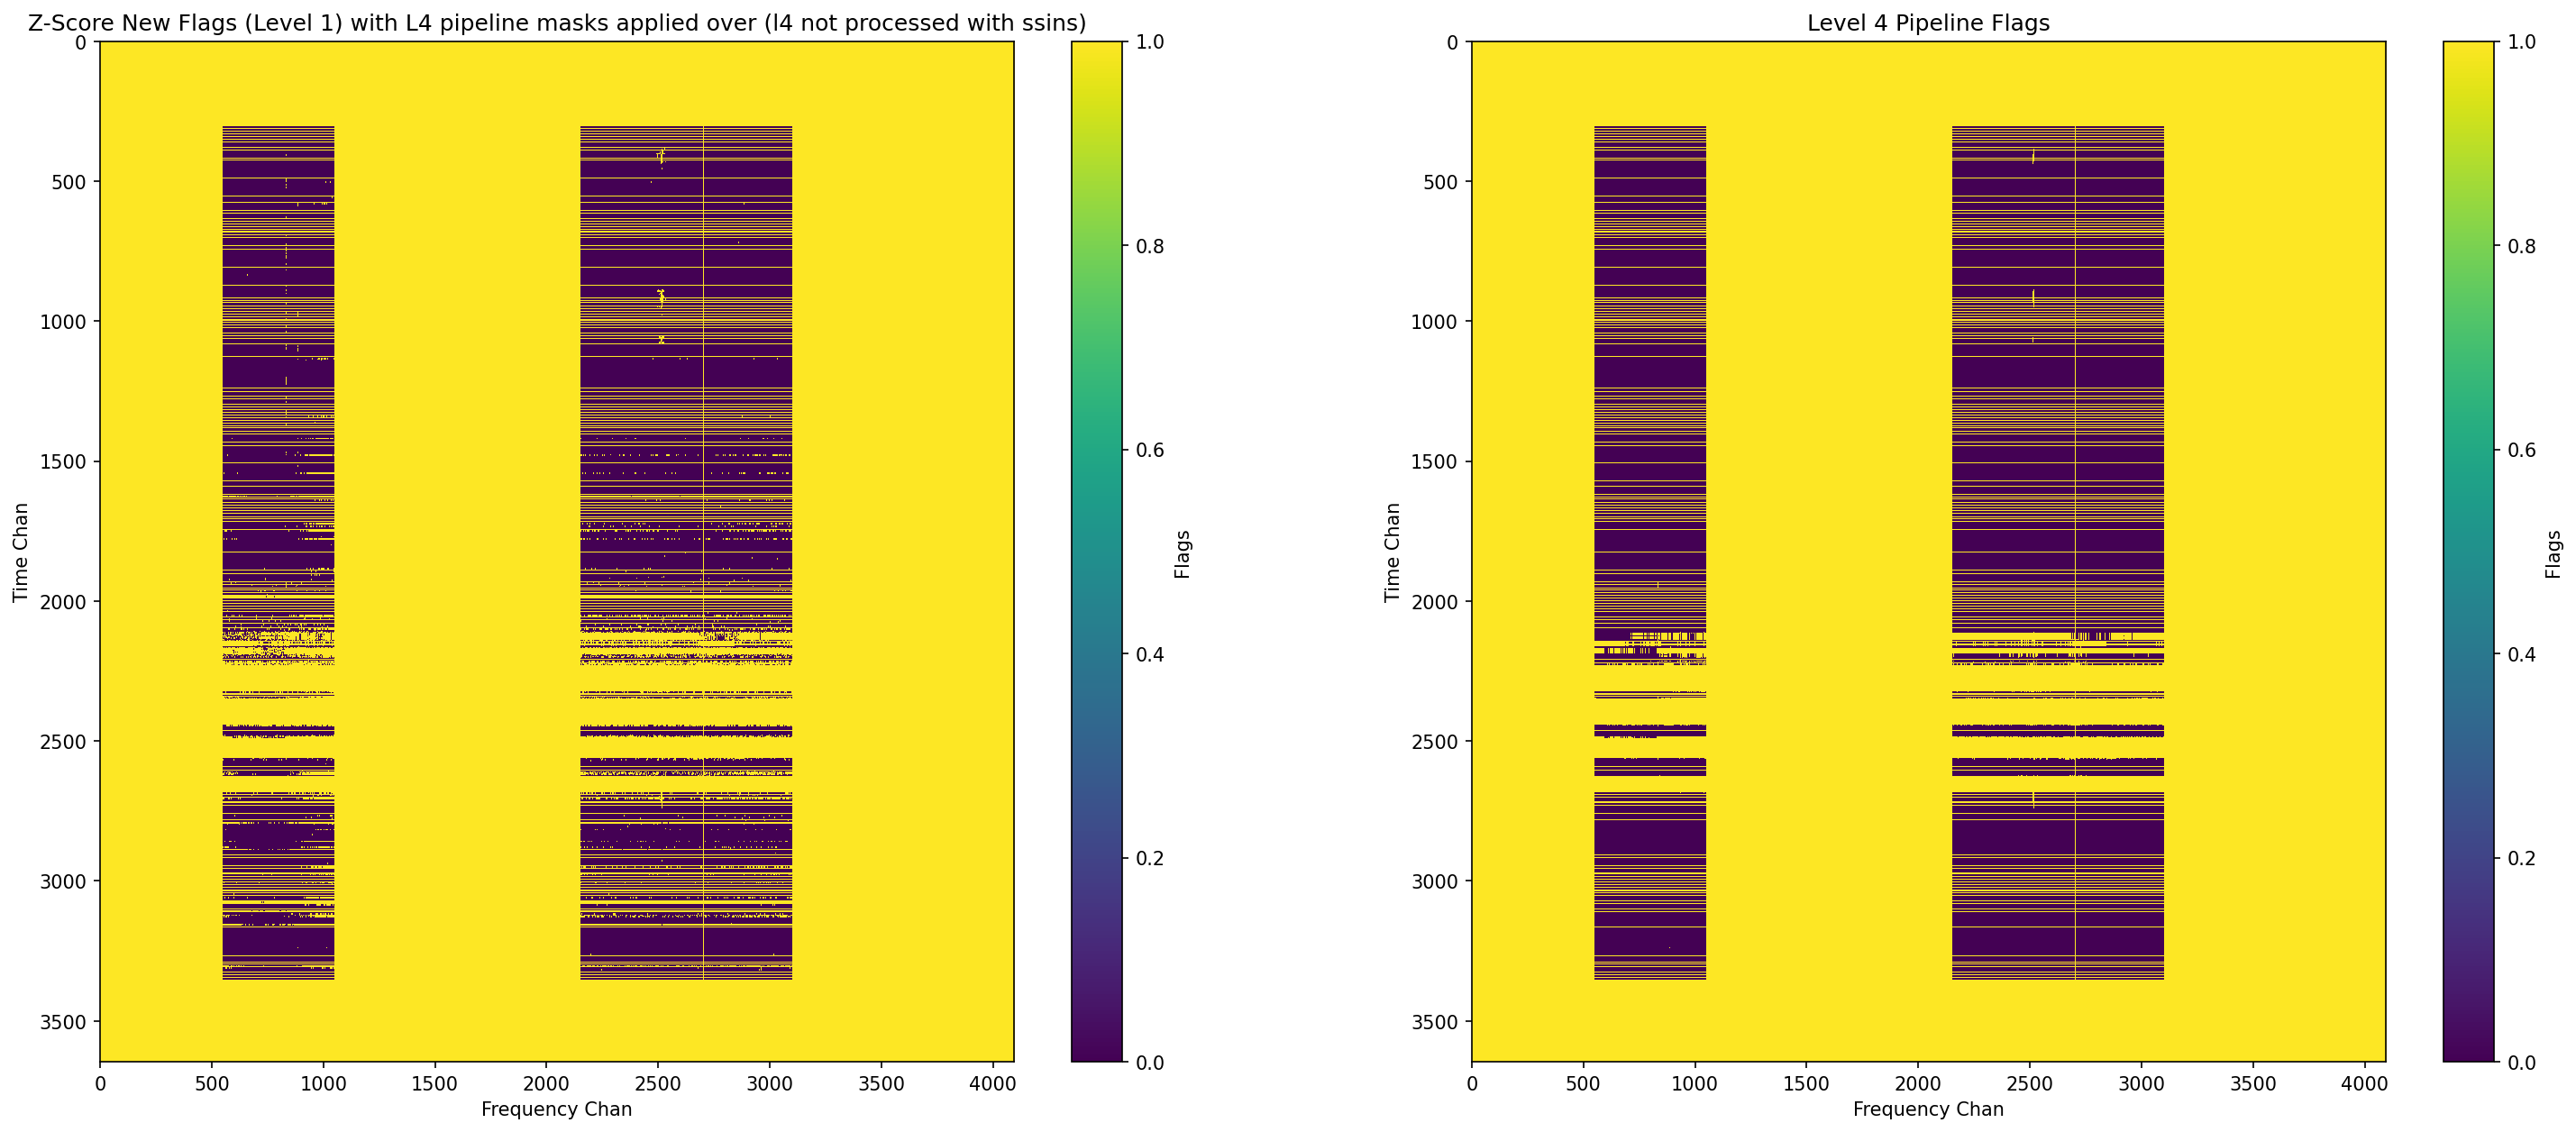

In [81]:
figure, ax = plt.subplots(1, 2 , figsize=(24, 10), dpi=150) #correct stacked + summed receiver masks that matches the z-score
 
plot_waterfall(np.logical_or(z_score_flags, masks_l4), Title = 'Z-Score Flags (Level 1) with L4 pipeline masks applied over (l4 not processed with ssins)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[0]) 
plot_waterfall(masks_l4, Title = 'Level 4 Pipeline Flags', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax[1]) 

## SSINS Algorithm (L4)
### In this test we will create the SSINS flags by using the L4 flags from the pipeline only 

In [36]:
from collections import defaultdict #stackexchange suggestion

d1 = l4_flags_dict
d2 = raw_vis_dict
d3 = nd_flags_dict

dd = defaultdict(list)

for d in (d1, d2, d3): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


defaultdict(<class 'list'>, {'m000': [array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), array([[366.29751587,  62.51673126,  62.47373581, ...,   0.        ,
          0.        ,   0.        ],
       [378.96554565,  73.60748291,  73.96704102, ...,  87.94789124,
         88.41603851,  89.15293884],
       [366.03469849,  62.4033699 ,  62.65620041, ...,  78.47024536,
         79.04814911,  79.82781982],
       ...,
       [645.43511963,  71.5569458 ,  71.52669525, ...,  57.27457047,
         57.42282486,  58.23122787],
       [652.61529541,  72.38539886,  72.42293549, ...,  57.50582886,
         57.67279053,  58.55394745],
       [646.29705811,  71.72380829,  71.87686157, ...,  57.16184235,
 

In [37]:
masked_vis_dict = {}

for dish, (mask_flags,
           
           
    vis , nd_s0) in dd.items():
    masked_vis = MaskedArrayVisibilityFlags(vis, mask_flags, nd_s0)
    masked_vis_dict[dish] = masked_vis

In [38]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

stacked_visSS_abba = np.stack(list(abba_ss_dict.values()), axis=0)

In [39]:
ss_l4 = stacked_visSS_abba

In [40]:
ssins_l4_zscore = cal_zscore(ss_l4) 

In [41]:
ssins_l4_zscore_mask = ((ssins_l4_zscore.astype(float) < -4.5) ^ (ssins_l4_zscore.astype(float) > 4.5) )

In [80]:
masks_l4 = stacked_flags(l4_flags_dict)

<AxesSubplot:title={'center':'Z-Score Flags (Level 4)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

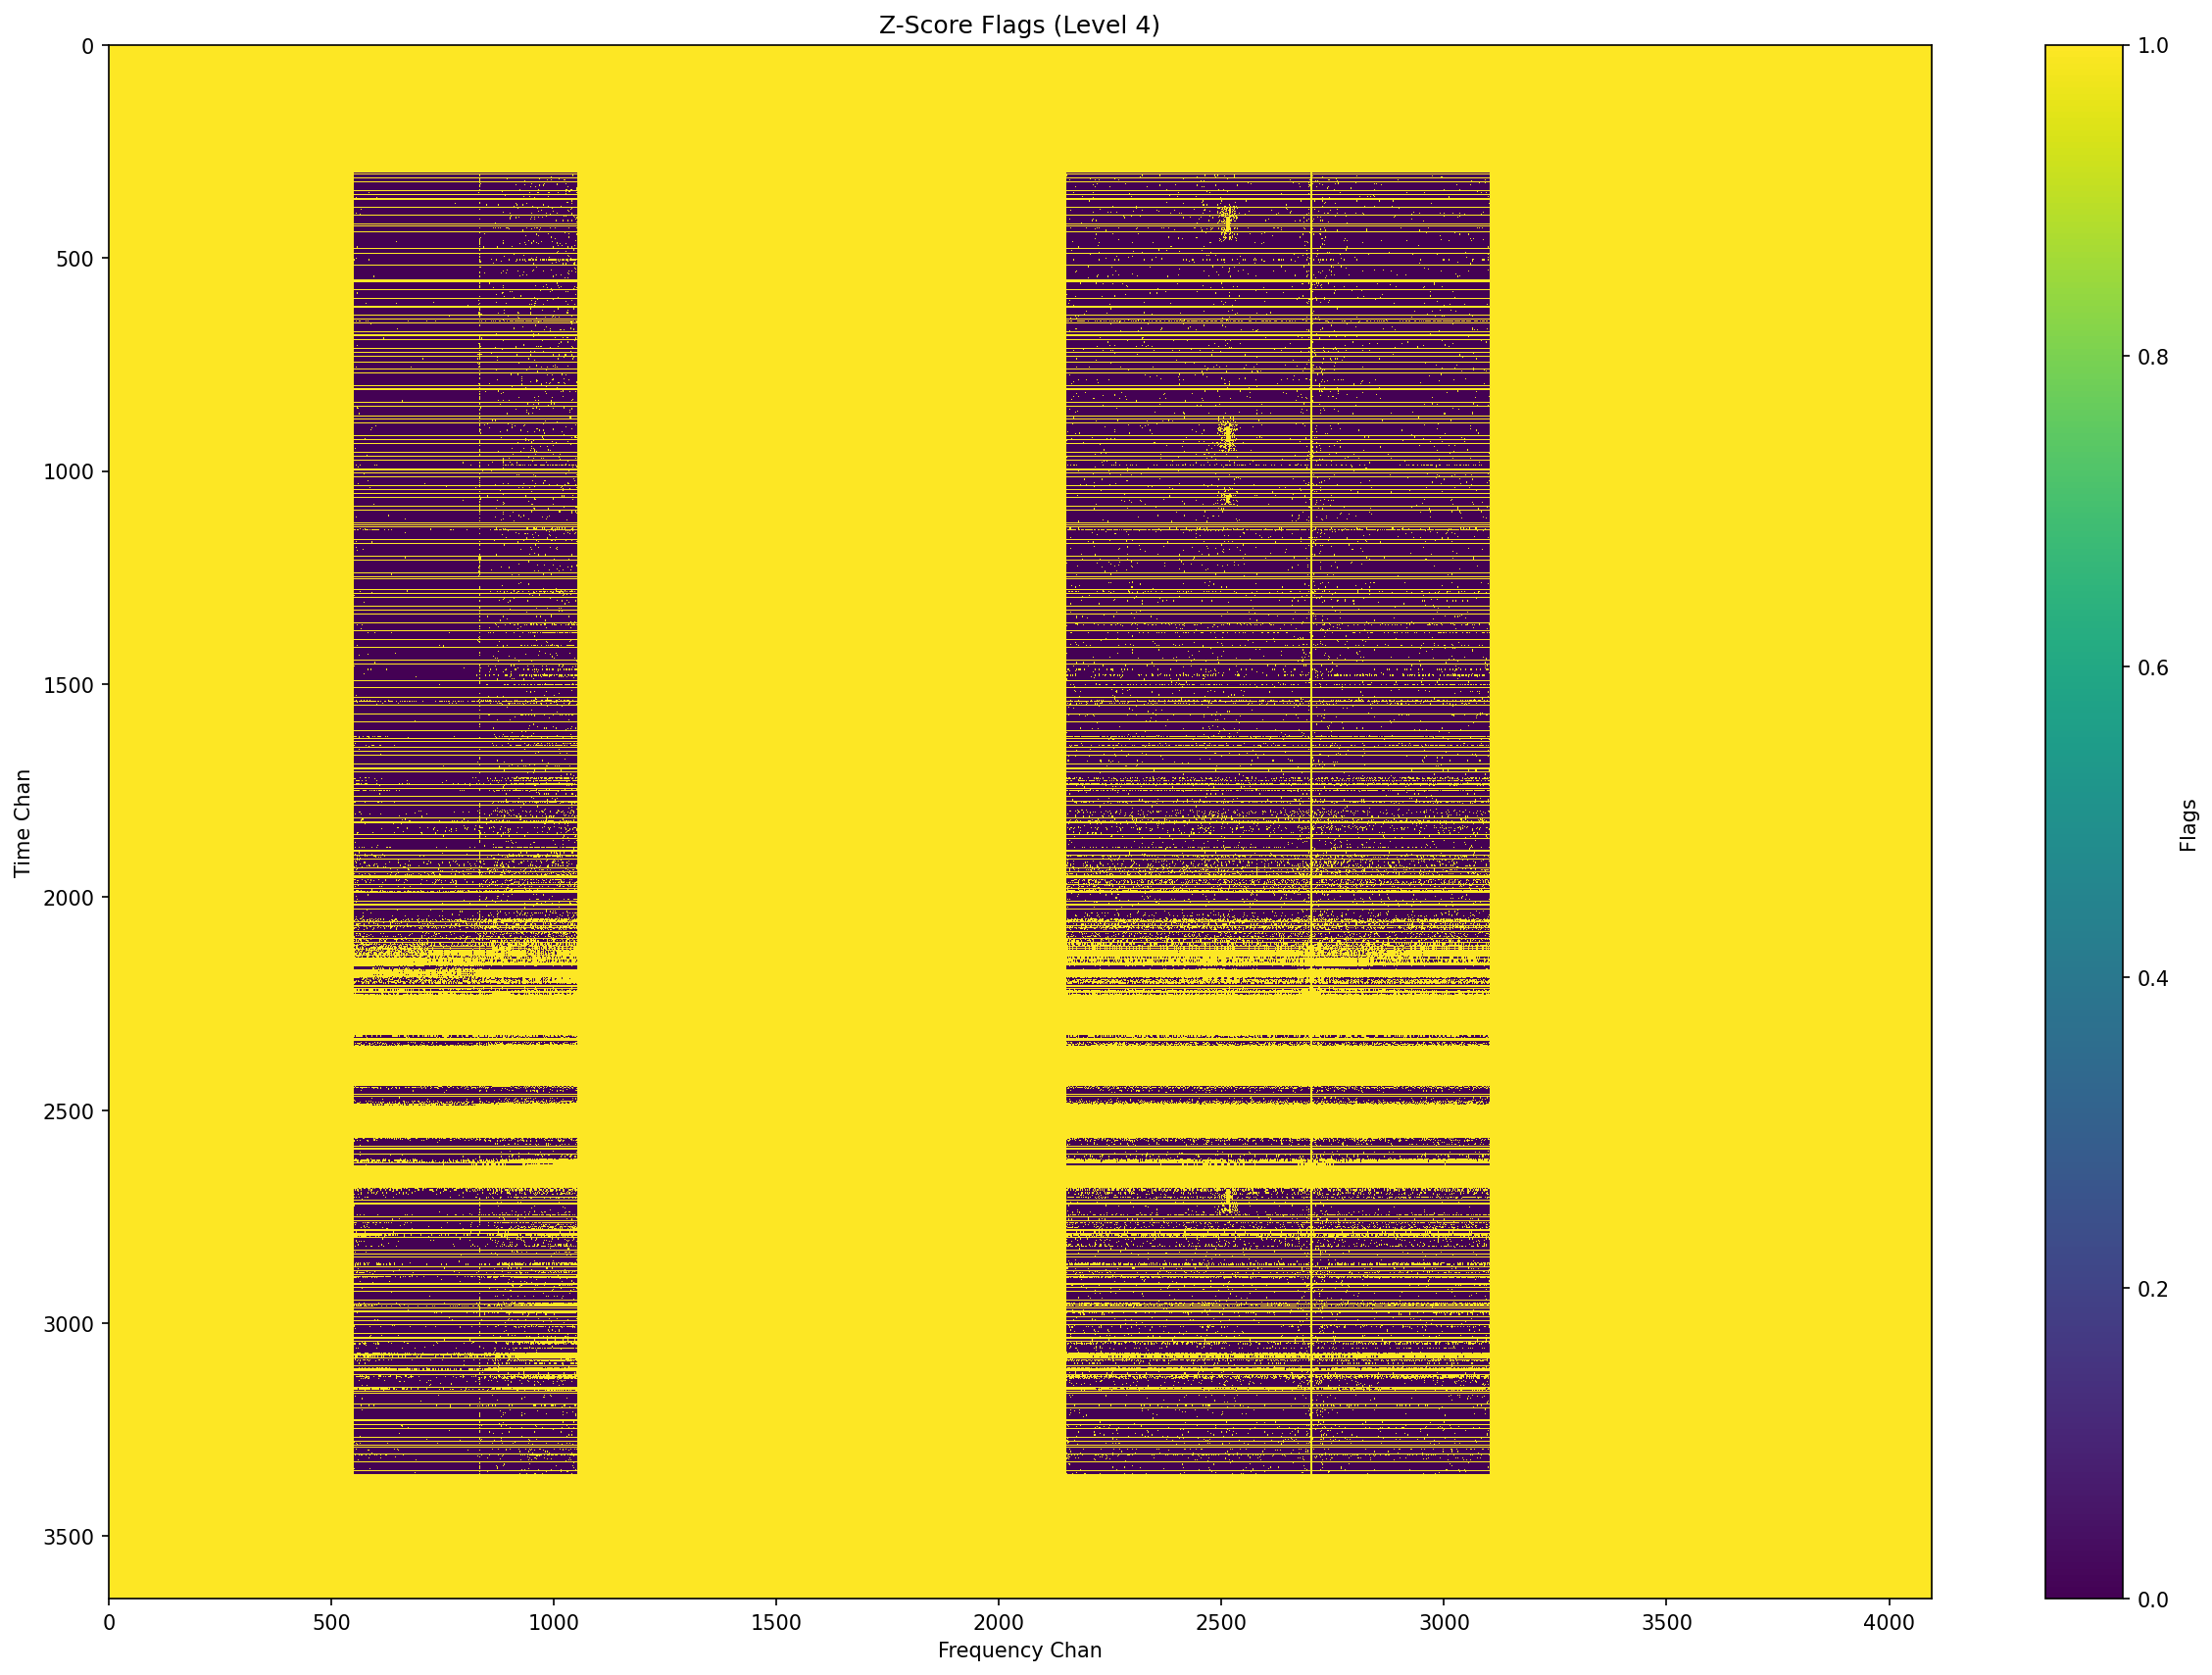

In [46]:
figure, ax = plt.subplots(1, 1 , figsize=(20, 14), dpi=150) #correct stacked + summed receiver masks that matches the z-score
 
plot_waterfall(mask_to_flags(ssins_l4_zscore_mask, pipeline_flags=l4_flags_dict, nd_flags=nd_flags_dict), Title = 'Z-Score Flags (Level 4)', figsize=(24,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Flags', ax=ax) 


In [ ]:
# In the above plot we see that level 1 SSINS picked up more possible RFI as compared to the level 4 pipeline flags

In [ ]:
#compare what ssins al finds that level 4 flags didnt pick up
# compare what ssins finds after l4
# compare what ssins finds after l1+l4